<a href="https://colab.research.google.com/github/shiz-107/Picture-Encryption/blob/main/Pic_encryption_Using_Substitution_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG-20221118-WA0089[1].jpg to IMG-20221118-WA0089[1].jpg


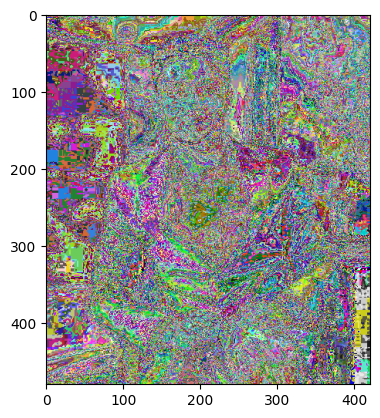

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

def encrypt_channel(channel, s_box):
    x, y = channel.shape
    enc_channel = np.zeros_like(channel, dtype=np.uint8)

    for m in range(x):
        for n in range(y):
            value = channel[m, n]
            value_bin = format(value, '08b')
            row = int(value_bin[:4], 2)
            col = int(value_bin[4:], 2)
            s_box_value = s_box[row][col]
            enc_value_bin = format(s_box_value, '08b')
            enc_channel[m, n] = int(enc_value_bin, 2)

    return enc_channel

def encrypt_image(image_path, s_box):
    img = np.array(Image.open(image_path))
    r_channel = img[:, :, 0]
    g_channel = img[:, :, 1]
    b_channel = img[:, :, 2]

    enc_r_channel = encrypt_channel(r_channel, s_box)
    enc_g_channel = encrypt_channel(g_channel, s_box)
    enc_b_channel = encrypt_channel(b_channel, s_box)

    enc_img = np.stack((enc_r_channel, enc_g_channel, enc_b_channel), axis=-1)

    return enc_img

# Load S-box from file
s_box = [
  [238, 117, 129, 181, 29, 21, 167, 113, 61, 187, 253, 6, 8, 233, 204, 91],
  [27, 66, 103, 130, 20, 121, 144, 217, 67, 49, 223, 70, 1, 186, 227, 245],
  [79, 2, 63, 3, 40, 77, 52, 221, 149, 216, 37, 191, 182, 132, 97, 96],
  [213, 198, 195, 246, 82, 102, 200, 139, 32, 127, 206, 58, 18, 208, 254, 170],
  [80, 126, 156, 46, 88, 145, 178, 115, 137, 210, 252, 230, 197, 163, 90, 231],
  [0, 55, 237, 24, 244, 4, 225, 99, 45, 125, 12, 13, 39, 196, 28, 15],
  [93, 161, 42, 123, 236, 43, 17, 57, 36, 154, 171, 150, 240, 128, 109, 243],
  [138, 59, 71, 78, 249, 19, 219, 35, 98, 14, 56, 60, 175, 155, 174, 84],
  [160, 234, 190, 111, 241, 180, 162, 185, 147, 85, 106, 141, 183, 62, 228, 214],
  [248, 105, 131, 100, 107, 157, 177, 153, 134, 151, 239, 222, 232, 11, 159, 119],
  [25, 38, 108, 83, 124, 176, 172, 158, 251, 112, 193, 188, 101, 44, 179, 92],
  [189, 247, 255, 76, 207, 212, 116, 48, 110, 136, 164, 250, 50, 30, 199, 89],
  [87, 203, 201, 72, 73, 205, 194, 184, 133, 5, 211, 135, 95, 142, 53, 218],
  [33, 209, 51, 148, 86, 114, 140, 75, 202, 168, 47, 26, 54, 16, 152, 69],
  [65, 165, 166, 81, 224, 122, 94, 192, 104, 229, 143, 118, 34, 226, 7, 9],
  [146, 242, 10, 120, 169, 23, 64, 235, 41, 68, 22, 31, 74, 173, 220, 215]
]

# Load and encrypt the image
encrypted_image = encrypt_image('IMG-20221118-WA0089[1].jpg', s_box)

# Display the encrypted image
plt.imshow(encrypted_image)
plt.show()


In [ ]:
import numpy as np

s_box_values = [238, 117, 129, 181, 29, 21, 167, 113, 61, 187, 253, 6, 8, 233, 204, 91, 27, 66, 103, 130, 20, 121, 144, 217, 67, 49, 223, 70, 1, 186, 227, 245, 79, 2, 63, 3, 40, 77, 52, 221, 149, 216, 37, 191, 182, 132, 97, 96, 213, 198, 195, 246, 82, 102, 200, 139, 32, 127, 206, 58, 18, 208, 254, 170, 80, 126, 156, 46, 88, 145, 178, 115, 137, 210, 252, 230, 197, 163, 90, 231, 0, 55, 237, 24, 244, 4, 225, 99, 45, 125, 12, 13, 39, 196, 28, 15, 93, 161, 42, 123, 236, 43, 17, 57, 36, 154, 171, 150, 240, 128, 109, 243, 138, 59, 71, 78, 249, 19, 219, 35, 98, 14, 56, 60, 175, 155, 174, 84, 160, 234, 190, 111, 241, 180, 162, 185, 147, 85, 106, 141, 183, 62, 228, 214, 248, 105, 131, 100, 107, 157, 177, 153, 134, 151, 239, 222, 232, 11, 159, 119, 25, 38, 108, 83, 124, 176, 172, 158, 251, 112, 193, 188, 101, 44, 179, 92, 189, 247, 255, 76, 207, 212, 116, 48, 110, 136, 164, 250, 50, 30, 199, 89, 87, 203, 201, 72, 73, 205, 194, 184, 133, 5, 211, 135, 95, 142, 53, 218, 33, 209, 51, 148, 86, 114, 140, 75, 202, 168, 47, 26, 54, 16, 152, 69, 65, 165, 166, 81, 224, 122, 94, 192, 104, 229, 143, 118, 34, 226, 7, 9, 146, 242, 10, 120, 169, 23, 64, 235, 41, 68, 22, 31, 74, 173, 220, 215]

# Reshape the list into a 16x16 array
s_box_array = np.array(s_box_values).reshape(16, 16)

# Print the resulting array
print(s_box_array)


[[238 117 129 181  29  21 167 113  61 187 253   6   8 233 204  91]
 [ 27  66 103 130  20 121 144 217  67  49 223  70   1 186 227 245]
 [ 79   2  63   3  40  77  52 221 149 216  37 191 182 132  97  96]
 [213 198 195 246  82 102 200 139  32 127 206  58  18 208 254 170]
 [ 80 126 156  46  88 145 178 115 137 210 252 230 197 163  90 231]
 [  0  55 237  24 244   4 225  99  45 125  12  13  39 196  28  15]
 [ 93 161  42 123 236  43  17  57  36 154 171 150 240 128 109 243]
 [138  59  71  78 249  19 219  35  98  14  56  60 175 155 174  84]
 [160 234 190 111 241 180 162 185 147  85 106 141 183  62 228 214]
 [248 105 131 100 107 157 177 153 134 151 239 222 232  11 159 119]
 [ 25  38 108  83 124 176 172 158 251 112 193 188 101  44 179  92]
 [189 247 255  76 207 212 116  48 110 136 164 250  50  30 199  89]
 [ 87 203 201  72  73 205 194 184 133   5 211 135  95 142  53 218]
 [ 33 209  51 148  86 114 140  75 202 168  47  26  54  16 152  69]
 [ 65 165 166  81 224 122  94 192 104 229 143 118  34 226   7 

In [ ]:
import numpy as np

s_box_values = [238, 117, 129, 181, 29, 21, 167, 113, 61, 187, 253, 6, 8, 233, 204, 91, 27, 66, 103, 130, 20, 121, 144, 217, 67, 49, 223, 70, 1, 186, 227, 245, 79, 2, 63, 3, 40, 77, 52, 221, 149, 216, 37, 191, 182, 132, 97, 96, 213, 198, 195, 246, 82, 102, 200, 139, 32, 127, 206, 58, 18, 208, 254, 170, 80, 126, 156, 46, 88, 145, 178, 115, 137, 210, 252, 230, 197, 163, 90, 231, 0, 55, 237, 24, 244, 4, 225, 99, 45, 125, 12, 13, 39, 196, 28, 15, 93, 161, 42, 123, 236, 43, 17, 57, 36, 154, 171, 150, 240, 128, 109, 243, 138, 59, 71, 78, 249, 19, 219, 35, 98, 14, 56, 60, 175, 155, 174, 84, 160, 234, 190, 111, 241, 180, 162, 185, 147, 85, 106, 141, 183, 62, 228, 214, 248, 105, 131, 100, 107, 157, 177, 153, 134, 151, 239, 222, 232, 11, 159, 119, 25, 38, 108, 83, 124, 176, 172, 158, 251, 112, 193, 188, 101, 44, 179, 92, 189, 247, 255, 76, 207, 212, 116, 48, 110, 136, 164, 250, 50, 30, 199, 89, 87, 203, 201, 72, 73, 205, 194, 184, 133, 5, 211, 135, 95, 142, 53, 218, 33, 209, 51, 148, 86, 114, 140, 75, 202, 168, 47, 26, 54, 16, 152, 69, 65, 165, 166, 81, 224, 122, 94, 192, 104, 229, 143, 118, 34, 226, 7, 9, 146, 242, 10, 120, 169, 23, 64, 235, 41, 68, 22, 31, 74, 173, 220, 215]

# Reshape the list into a 16x16 array
s_box_array = np.array(s_box_values).reshape(16, 16)

# Print the resulting array with commas between the values
print(np.array2string(s_box_array, separator=', '))


[[238, 117, 129, 181,  29,  21, 167, 113,  61, 187, 253,   6,   8, 233,
  204,  91],
 [ 27,  66, 103, 130,  20, 121, 144, 217,  67,  49, 223,  70,   1, 186,
  227, 245],
 [ 79,   2,  63,   3,  40,  77,  52, 221, 149, 216,  37, 191, 182, 132,
   97,  96],
 [213, 198, 195, 246,  82, 102, 200, 139,  32, 127, 206,  58,  18, 208,
  254, 170],
 [ 80, 126, 156,  46,  88, 145, 178, 115, 137, 210, 252, 230, 197, 163,
   90, 231],
 [  0,  55, 237,  24, 244,   4, 225,  99,  45, 125,  12,  13,  39, 196,
   28,  15],
 [ 93, 161,  42, 123, 236,  43,  17,  57,  36, 154, 171, 150, 240, 128,
  109, 243],
 [138,  59,  71,  78, 249,  19, 219,  35,  98,  14,  56,  60, 175, 155,
  174,  84],
 [160, 234, 190, 111, 241, 180, 162, 185, 147,  85, 106, 141, 183,  62,
  228, 214],
 [248, 105, 131, 100, 107, 157, 177, 153, 134, 151, 239, 222, 232,  11,
  159, 119],
 [ 25,  38, 108,  83, 124, 176, 172, 158, 251, 112, 193, 188, 101,  44,
  179,  92],
 [189, 247, 255,  76, 207, 212, 116,  48, 110, 136, 164, 250,  50

<function matplotlib.pyplot.show(close=None, block=None)>

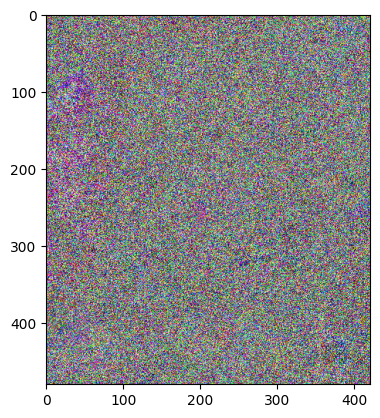

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import random
from math import gcd

def encrypt_channel(channel, s_boxes):
    x, y = channel.shape
    enc_channel = np.zeros_like(channel, dtype=np.uint8)

    for m in range(x):
        for n in range(y):
            value = channel[m, n]
            value_bin = format(value, '08b')
            row = int(value_bin[:4], 2)
            col = int(value_bin[4:], 2)
            s_box = random.choice(s_boxes)
            s_box_value = s_box[row][col]
            enc_value_bin = format(s_box_value, '08b')
            enc_channel[m, n] = int(enc_value_bin, 2)

    return enc_channel

def encrypt_image(image_path, s_boxes):
    img = np.array(Image.open(image_path))
    enc_channels = []

    for channel in range(3):
        enc_channel = encrypt_channel(img[:, :, channel], s_boxes)
        enc_channels.append(enc_channel)

    enc_img = np.stack(enc_channels, axis=-1)
    return enc_img

# Generate S-boxes
def generate_s_boxes():
    j = complex(0, 1)
    p = 263
    a = 48j
    b = 185 + 48j
    K = []
    S=  [0j, 59j, 156j, 38j, 23j, 99j, 175j, 208j, 110j, (227+0j), 192j, 24j, (262+0j), 155j, 214j, (185+0j), 53j, 162j, 73j, 207j, 255j, 181j, 220j, (212+0j), (147+0j), 172j, 60j, (21+0j), 129j, 85j, (101+0j), (31+0j), (100+0j), (27+0j), 127j, (165+0j), 167j, 164j, (60+0j), 68j, 88j, (242+0j), (197+0j), 102j, (102+0j), 112j, (126+0j), (25+0j), (85+0j), (256+0j), 206j, (176+0j), 54j, (196+0j), 253j, (246+0j), (12+0j), (244+0j), 27j, (22+0j), 1j, 262j, (9+0j), (179+0j), 250j, (46+0j), (14+0j), (213+0j), (259+0j), 259j, (125+0j), 163j, 170j, (93+0j), (202+0j), (164+0j), (178+0j), 131j, (223+0j), 234j, (222+0j), 39j, (153+0j), 118j, 148j, (156+0j), (231+0j), 224j, (218+0j), 126j, 251j, (5+0j), 104j, 115j, 248j, (38+0j), (59+0j), 21j, 43j, 66j, 238j, (75+0j), 92j, (29+0j), 103j, (158+0j), 149j, 205j, 108j, 247j, (187+0j), 125j, (157+0j), (11+0j), (112+0j), 222j, 116j, 81j, 166j, (168+0j), 36j, (35+0j), (192+0j), (34+0j), (77+0j), (181+0j), (69+0j), 107j, 122j, 182j, (215+0j), (72+0j), (4+0j), (41+0j), (37+0j), 198j, 260j, 9j, (45+0j), 34j, 168j, (1+0j), 16j, 120j, 171j, 56j, 200j, (99+0j), (189+0j), 7j, (220+0j), 190j, (129+0j), (200+0j), 30j, 211j, (193+0j), 41j, (39+0j), 64j, (66+0j), 173j, (116+0j), (76+0j), 89j, 236j, 97j, (73+0j), 174j, 86j, 141j, 186j, 65j, (245+0j), 33j, (186+0j), (232+0j), (204+0j), 79j, (98+0j), (159+0j), (195+0j), (107+0j), 77j, 242j, (61+0j), (96+0j), (58+0j), 51j, (151+0j), 119j, 237j, (90+0j), 2j, (70+0j), 48j, (24+0j), (64+0j), (209+0j), 25j, 58j, (97+0j), 75j, (194+0j), 245j, (118+0j), 165j, (94+0j), (141+0j), (133+0j), 11j, 13j, (51+0j), 20j, 226j, (142+0j), 22j, (17+0j), (208+0j), (238+0j), (124+0j), 228j, (57+0j), 178j, (83+0j), 3j, (198+0j), 187j, (89+0j), 204j, 221j, (210+0j), 45j, (229+0j), 159j, 239j, (248+0j), 18j, 243j, (49+0j), (139+0j), (54+0j), (117+0j), 146j, 78j, 252j, 195j, (127+0j), 80j, (1+188j), (1+229j), (1+77j), (132+1j), (215+1j), (246+1j), (1+146j), (1+189j), (61+1j), (8+1j), (116+1j), (1+15j), (1+102j), (1+181j), (65+1j), (91+1j), (238+1j), (29+1j), (1+46j), (59+1j), (1+150j), (25+1j), (1+100j), (95+1j), (52+1j), (112+1j), (1+45j), (1+70j), (108+1j), (1+64j), (69+1j), (1+248j), (93+1j), (103+1j), (47+1j), (1+123j), (1+97j), (1+136j), (113+1j), (1+254j), (63+1j), (1+39j), (210+1j), (1+177j), (1+30j), (1+235j), (148+1j), (201+1j), (1+96j), (1+243j), (42+1j), (85+1j), (1+78j), (82+1j), (240+1j), (198+1j), (205+1j), (253+1j), (1+165j), (2+1j), (75+1j), (193+1j), (216+1j), (143+1j), (156+1j), (41+1j), (24+1j), (1+258j), (203+1j), (1+260j), (204+1j), (1+23j), (161+1j), (236+1j), (71+1j), (169+1j), (1+113j), (1+191j), (55+1j), (149+1j), (1+75j), (11+1j), (115+1j), (151+1j), (191+1j), (32+1j), (1+134j), (102+1j), (1+58j), (1+155j), (130+1j), (235+1j), (1+29j), (1+251j), (123+1j), (1+6j), (1+129j), (1+53j), (153+1j), (1+69j), (1+135j), (160+1j), (140+1j), (67+1j), (1+168j), (51+1j), (111+1j), (172+1j), (1+20j), (179+1j), (1+198j), (1+94j), (105+1j), (1+153j), (1+59j), (1+21j), (1+205j), (227+1j), (1+163j), (1+74j), (1+159j), (73+1j), (174+1j), (1+85j), (1+89j), (1+60j), (57+1j), (230+1j), (241+1j), (1+1j), (117+1j), (1+25j), (1+210j), (173+1j), (212+1j), (1+244j), (155+1j), (1+241j), (101+1j), (1+222j), (245+1j), (256+1j), (1+216j), (1+232j), (72+1j), (1+121j), (56+1j), (1+87j), (1+128j), (1+56j), (1+12j), (1+240j), (78+1j), (1+3j), (1+57j), (30+1j), (60+1j), (131+1j), (1+40j), (1+184j), (127+1j), (1+133j), (36+1j), (1+48j), (1+80j), (48+1j), (1+206j), (142+1j), (1+81j), (1+86j), (94+1j), (1+36j), (1+149j), (1+249j), (157+1j), (1+106j), (1+185j), (1+61j), (39+1j), (20+1j), (200+1j), (1+82j), (122+1j), (118+1j), (1+124j), (225+1j), (1+259j), (1+7j), (184+1j), (1+52j), (1+151j), (1+137j), (189+1j), (223+1j), (7+1j), (244+1j), (1+93j), (1+103j), (214+1j), (1+162j), (1+14j), (1+152j), (18+1j), (1+187j), (1+224j), (208+1j), (1+10j), (1+63j), (1+139j), (13+1j), (1+5j), (1+76j), (1+120j), (1+186j), (74+1j), (1+28j), (1+44j), (1+104j), (90+1j), (199+1j), (1+2j), (104+1j), (99+1j), (1+132j), (187+1j), (1+111j), (258+1j), (1+173j), (114+1j), (196+1j), (1+90j), (1+213j), (80+1j), (170+1j), (202+1j), (206+1j), (1+79j), (211+1j), (234+1j), (1+88j), (70+1j), (79+1j), (1+68j), (186+1j), (1+71j), (1+161j), (1+126j), (33+1j), (40+1j), (162+1j), (209+1j), (250+1j), (185+1j), (195+1j), (231+1j), (260+1j), (164+1j), (1+65j), (1+253j), (1+110j), (19+1j), (2+123j), (2+142j), (73+2j), (2+22j), (72+2j), (127+2j), (2+47j), (2+117j), (2+122j), (2+97j), (108+2j), (117+2j), (166+2j), (20+2j), (2+86j), (47+2j), (169+2j), (224+2j), (43+2j), (2+165j), (2+120j), (66+2j), (172+2j), (2+240j), (2+218j), (2+83j), (2+116j), (2+259j), (21+2j), (2+242j), (140+2j), (6+2j), (2+68j), (92+2j), (2+79j), (2+112j), (2+145j), (2+235j), (2+11j), (2+52j), (175+2j), (109+2j), (2+236j), (116+2j), (202+2j), (2+127j), (2+139j), (2+24j), (185+2j), (2+59j), (2+222j), (177+2j), (2+2j), (114+2j), (2+121j), (119+2j), (181+2j), (2+20j), (60+2j), (250+2j), (101+2j), (99+2j), (2+144j), (50+2j), (179+2j), (2+205j), (151+2j), (2+15j), (2+102j), (67+2j), (207+2j), (2+5j), (107+2j), (161+2j), (2+57j), (154+2j), (167+2j), (2+38j), (2+89j), (2+254j), (2+159j), (36+2j), (35+2j), (96+2j), (156+2j), (68+2j), (33+2j), (89+2j), (2+147j), (2+245j), (2+197j), (2+163j), (241+2j), (2+154j), (2+173j), (255+2j), (52+2j), (2+213j), (2+16j), (2+231j), (254+2j), (214+2j), (71+2j), (2+229j), (234+2j), (2+237j), (171+2j), (2+225j), (11+2j), (142+2j), (94+2j), (2+221j), (32+2j), (2+76j), (2+134j), (2+138j), (2+179j), (2+48j), (2+140j), (29+2j), (38+2j), (42+2j), (144+2j), (2+131j), (2+176j), (137+2j), (2+219j), (2+110j), (5+2j), (2+136j), (13+2j), (2+81j), (2+168j), (2+151j), (17+2j), (131+2j), (2+51j), (2+183j), (2+194j), (198+2j), (248+2j), (159+2j), (2+40j), (2+232j), (70+2j), (261+2j), (2+56j), (2+215j), (2+227j), (65+2j), (2+207j), (51+2j), (88+2j), (183+2j), (218+2j), (2+13j), (100+2j), (180+2j), (2+185j), (102+2j), (3+2j), (61+2j), (188+2j), (231+2j), (249+2j), (203+2j), (260+2j), (18+2j), (14+2j), (2+70j), (2+130j), (2+74j), (2+99j), (2+137j), (84+2j), (113+2j), (158+2j), (2+30j), (26+2j), (2+220j), (2+244j), (79+2j), (164+2j), (53+2j), (2+96j), (2+190j), (75+2j), (217+2j), (2+45j), (2+49j), (69+2j), (145+2j), (2+162j), (39+2j), (2+63j), (83+2j), (211+2j), (22+2j), (10+2j), (2+177j), (2+208j), (135+2j), (193+2j), (2+191j), (2+211j), (12+2j), (2+128j), (30+2j), (149+2j), (194+2j), (235+2j), (2+172j), (2+82j), (2+217j), (2+101j), (28+2j), (2+28j), (252+2j), (59+2j), (2+37j), (147+2j), (121+2j), (2+158j), (239+2j), (2+233j), (240+2j), (54+2j), (221+2j), (2+84j), (63+2j), (93+3j), (89+3j), (3+96j), (3+225j), (72+3j), (123+3j), (3+32j), (7+3j), (200+3j), (190+3j), (3+78j), (3+117j), (56+3j), (253+3j), (119+3j), (213+3j), (135+3j), (3+10j), (35+3j), (144+3j), (3+197j), (25+3j), (168+3j), (261+3j), (3+81j), (24+3j), (84+3j), (3+56j), (3+189j), (3+108j), (245+3j), (241+3j), (15+3j), (29+3j), (207+3j), (215+3j), (3+53j), (3+58j), (3+252j), (3+89j), (36+3j), (21+3j), (141+3j), (3+253j), (3+24j), (3+137j), (67+3j), (69+3j), (234+3j), (23+3j), (164+3j), (3+260j), (3+133j), (3+148j), (255+3j), (3+45j), (3+175j), (3+212j), (90+3j), (142+3j), (3+42j), (3+235j), (116+3j), (3+167j), (48+3j), (3+208j), (3+14j), (3+116j), (3+228j), (5+3j), (140+3j), (3+31j), (3+214j), (3+164j), (3+6j), (3+120j), (251+3j), (3+99j), (50+3j), (188+3j), (108+3j), (156+3j), (178+3j), (3+217j), (260+3j), (3+140j), (3+206j), (3+238j), (3+169j), (3+179j), (3+198j), (133+3j), (179+3j), (198+3j), (3+60j), (3+91j), (53+3j), (3+65j), (41+3j), (3+70j), (75+3j), (3+97j), (3+8j), (17+3j), (109+3j), (86+3j), (31+3j), (3+199j), (3+38j), (104+3j), (3+84j), (81+3j), (97+3j), (99+3j), (77+3j), (3+156j), (19+3j), (10+3j), (149+3j), (3+87j), (209+3j), (227+3j), (3+220j), (3+258j), (57+3j), (226+3j), (223+3j), (171+3j), (185+3j), (3+40j), (3+26j), (3+95j), (40+3j), (3+153j), (16+3j), (45+3j), (106+3j), (3+158j), (3+142j), (225+3j), (3+127j), (159+3j), (247+3j), (28+3j), (3+63j), (3+93j), (229+3j), (3+34j), (3+66j), (3+255j), (70+3j), (80+3j), (3+144j), (3+19j), (3+195j), (12+3j), (3+69j), (3+123j), (3+98j), (3+83j), (8+3j), (3+129j), (3+180j), (121+3j), (233+3j), (3+185j), (258+3j), (22+3j), (3+124j), (232+3j), (3+202j), (3+139j), (64+3j), (126+3j), (3+73j), (3+170j), (3+109j), (3+136j), (244+3j), (3+3j), (3+47j), (30+3j), (3+184j), (170+3j), (3+237j), (3+57j), (26+3j), (3+119j), (3+80j), (3+187j), (3+256j), (3+35j), (125+3j), (3+200j), (124+3j), (3+154j), (87+3j), (112+3j), (44+3j), (194+3j), (3+72j), (3+115j), (3+245j), (3+232j), (129+3j), (157+3j), (103+3j), (146+3j), (3+37j), (3+213j), (231+3j), (3+229j), (3+82j), (3+230j), (4+3j), (158+3j), (197+3j), (3+77j), (3+201j), (206+3j), (3+221j), (3+248j), (3+29j), (3+138j), (51+3j), (243+3j), (3+20j), (39+3j), (139+3j), (3+126j), (3+226j), (262+3j), (3+177j), (9+3j), (160+3j), (128+3j), (33+3j), (3+166j), (3+74j), (3+22j), (3+55j), (131+3j), (52+3j), (132+3j), (3+7j), (3+18j), (3+165j), (3+125j), (18+3j), (3+176j), (238+3j), (250+3j), (175+3j), (3+141j), (3+161j), (60+3j), (246+3j), (145+3j), (114+3j), (163+3j), (6+3j), (14+3j), (201+3j), (3+36j), (3+178j), (249+3j), (167+3j), (162+3j), (4+27j), (4+166j), (4+24j), (4+169j), (38+4j), (4+115j), (92+4j), (141+4j), (4+224j), (71+4j), (250+4j), (116+4j), (253+4j), (4+14j), (118+4j), (142+4j), (143+4j), (4+65j), (259+4j), (200+4j), (4+142j), (187+4j), (219+4j), (4+209j), (70+4j), (4+18j), (4+85j), (132+4j), (4+131j), (198+4j), (4+9j), (90+4j), (214+4j), (4+127j), (4+234j), (124+4j), (4+219j), (4+178j), (4+195j), (64+4j), (4+44j), (4+75j), (139+4j), (165+4j), (232+4j), (189+4j), (260+4j), (12+4j), (4+6j), (4+197j), (4+220j), (22+4j), (123+4j), (4+64j), (4+124j), (86+4j), (20+4j), (117+4j), (235+4j), (4+151j), (4+232j), (242+4j), (4+67j), (184+4j), (4+54j), (152+4j), (4+22j), (4+43j), (4+95j), (4+168j), (228+4j), (4+76j), (183+4j), (18+4j), (224+4j), (4+103j), (58+4j), (217+4j), (4+205j), (128+4j), (113+4j), (4+206j), (4+55j), (196+4j), (254+4j), (4+235j), (182+4j), (4+135j), (4+249j), (4+82j), (4+35j), (72+4j), (4+80j), (221+4j), (4+36j), (78+4j), (4+113j), (4+129j), (75+4j), (4+42j), (84+4j), (158+4j), (65+4j), (4+29j), (7+4j), (4+229j), (77+4j), (4+158j), (4+181j), (4+193j), (137+4j), (4+121j), (4+145j), (199+4j), (49+4j), (4+244j), (175+4j), (4+120j), (4+212j), (4+58j), (4+186j), (4+159j), (4+8j), (23+4j), (4+173j), (35+4j), (4+128j), (148+4j), (255+4j), (4+11j), (176+4j), (4+200j), (4+226j), (61+4j), (138+4j), (180+4j), (4+176j), (4+78j), (4+164j), (179+4j), (4+114j), (136+4j), (234+4j), (4+94j), (110+4j), (4+45j), (4+210j), (36+4j), (4+88j), (108+4j), (55+4j), (4+52j), (4+96j), (4+253j), (4+155j), (4+149j), (4+233j), (4+118j), (96+4j), (4+7j), (244+4j), (60+4j), (209+4j), (4+188j), (4+63j), (101+4j), (4+239j), (85+4j), (4+221j), (34+4j), (4+152j), (4+179j), (4+227j), (4+203j), (181+4j), (4+111j), (4+41j), (252+4j), (39+4j), (4+25j), (69+4j), (76+4j), (4+77j), (48+4j), (4+26j), (4+140j), (204+4j), (4+68j), (4+122j), (4+217j), (238+4j), (32+4j), (164+4j), (4+143j), (186+4j), (4+137j), (4+51j), (135+4j), (4+240j), (14+4j), (4+59j), (43+4j), (4+100j), (4+216j), (147+4j), (4+191j), (157+4j), (4+153j), (203+4j), (222+4j), (4+97j), (4+146j), (4+109j), (213+4j), (68+4j), (174+4j), (15+4j), (4+86j), (4+182j), (256+4j), (4+93j), (4+108j), (41+4j), (4+38j), (4+83j), (149+4j), (4+172j), (233+4j), (4+84j), (89+4j), (161+4j), (215+4j), (218+4j), (4+126j), (100+4j), (192+4j), (4+243j), (4+138j), (4+213j), (4+99j), (146+4j), (9+4j), (127+4j), (153+4j), (261+4j), (168+4j), (4+71j), (4+87j), (151+4j), (4+237j), (5+4j), (236+4j), (4+231j), (52+4j), (47+4j), (171+4j), (57+4j), (237+4j), (4+156j), (4+47j), (4+161j), (140+4j), (79+4j), (4+28j), (245+4j), (4+16j), (142+5j), (229+5j), (5+72j), (26+5j), (5+133j), (23+5j), (39+5j), (5+69j), (5+88j), (245+5j), (129+5j), (5+47j), (231+5j), (5+235j), (5+86j), (5+92j), (196+5j), (5+46j), (5+95j), (87+5j), (239+5j), (17+5j), (103+5j), (114+5j), (104+5j), (5+247j), (96+5j), (88+5j), (89+5j), (5+229j), (101+5j), (5+17j), (5+135j), (5+12j), (79+5j), (5+254j), (31+5j), (37+5j), (243+5j), (5+101j), (5+239j), (5+242j), (5+41j), (136+5j), (219+5j), (160+5j), (5+209j), (206+5j), (5+105j), (5+147j), (22+5j), (176+5j), (5+6j), (5+211j), (5+182j), (5+206j), (30+5j), (5+7j), (5+93j), (44+5j), (145+5j), (235+5j), (5+210j), (5+27j), (5+73j), (5+107j), (5+115j), (5+123j), (5+189j), (60+5j), (139+5j), (5+252j), (232+5j), (5+43j), (5+186j), (5+51j), (5+151j), (204+5j), (5+122j), (16+5j), (5+25j), (5+134j), (184+5j), (5+195j), (55+5j), (78+5j), (5+124j), (135+5j), (5+20j), (5+131j), (5+13j), (207+5j), (5+76j), (175+5j), (216+5j), (5+111j), (12+5j), (180+5j), (5+68j), (189+5j), (5+201j), (5+59j), (5+217j), (50+5j), (84+5j), (5+194j), (5+221j), (56+5j), (5+9j), (5+100j), (5+97j), (5+99j), (5+113j), (165+5j), (213+5j), (167+5j), (5+137j), (5+130j), (6+5j), (125+5j), (5+215j), (211+5j), (5+66j), (186+5j), (128+5j), (20+5j), (5+262j), (5+233j), (45+5j), (198+5j), (5+138j), (5+225j), (52+5j), (5+155j), (74+5j), (5+98j), (5+253j), (240+5j), (5+238j), (43+5j), (77+5j), (201+5j), (54+5j), (208+5j), (5+234j), (92+5j), (76+5j), (5+21j), (5+185j), (5+224j), (183+5j), (138+5j), (194+5j), (5+118j), (82+5j), (94+5j), (122+5j), (5+172j), (5+184j), (47+5j), (5+162j), (5+220j), (250+5j), (5+177j), (149+5j), (179+5j), (5+31j), (111+5j), (5+140j), (5+213j), (5+82j), (81+5j), (5+62j), (119+5j), (5+198j), (5+212j), (53+5j), (99+5j), (260+5j), (15+5j), (27+5j), (5+84j), (261+5j), (5+197j), (5+260j), (109+5j), (191+5j), (5+108j), (5+245j), (146+5j), (203+5j), (166+5j), (10+5j), (123+5j), (249+5j), (168+5j), (163+5j), (5+42j), (5+170j), (5+173j), (5+171j), (238+5j), (80+5j), (9+5j), (177+5j), (5+164j), (5+251j), (48+5j), (58+5j), (5+167j), (137+5j), (220+5j), (164+5j), (5+32j), (5+258j), (106+5j), (5+192j), (153+5j), (5+218j), (5+223j), (126+5j), (5+227j), (35+5j), (187+5j), (144+5j), (217+5j), (262+5j), (247+5j), (5+165j), (5+5j), (5+24j), (5+152j), (110+5j), (5+261j), (34+5j), (5+87j), (5+156j), (64+5j), (107+5j), (5+36j), (5+83j), (124+5j), (251+5j), (205+5j), (5+56j), (212+5j), (5+204j), (5+136j), (5+166j), (218+5j), (5+181j), (5+89j), (5+222j), (6+106j), (6+114j), (59+6j), (254+6j), (6+40j), (6+195j), (162+6j), (195+6j), (6+59j), (6+253j), (20+6j), (87+6j), (206+6j), (55+6j), (133+6j), (6+181j), (6+42j), (6+49j), (28+6j), (6+167j), (6+102j), (169+6j), (153+6j), (146+6j), (6+243j), (220+6j), (224+6j), (6+159j), (6+37j), (156+6j), (6+116j), (115+6j), (249+6j), (186+6j), (6+245j), (6+204j), (60+6j), (50+6j), (6+90j), (103+6j), (174+6j), (96+6j), (6+129j), (6+32j), (6+178j), (6+207j), (188+6j), (6+197j), (6+160j), (170+6j), (152+6j), (88+6j), (251+6j), (73+6j), (6+18j), (65+6j), (157+6j), (6+219j), (6+182j), (6+39j), (6+227j), (36+6j), (6+136j), (6+105j), (6+173j), (145+6j), (106+6j), (43+6j), (45+6j), (48+6j), (6+189j), (67+6j), (147+6j), (6+251j), (10+6j), (63+6j), (6+258j), (148+6j), (6+82j), (6+152j), (261+6j), (6+16j), (137+6j), (167+6j), (94+6j), (6+71j), (6+6j), (247+6j), (62+6j), (118+6j), (6+81j), (191+6j), (113+6j), (6+151j), (204+6j), (6+10j), (6+45j), (90+6j), (179+6j), (82+6j), (6+177j), (6+238j), (6+108j), (6+240j), (244+6j), (155+6j), (6+235j), (158+6j), (6+26j), (172+6j), (6+261j), (221+6j), (111+6j), (71+6j), (11+6j), (6+83j), (6+180j), (6+142j), (120+6j), (245+6j), (6+99j), (21+6j), (131+6j), (194+6j), (259+6j), (6+112j), (56+6j), (6+12j), (6+130j), (80+6j), (6+123j), (6+184j), (6+205j), (15+6j), (72+6j), (6+72j), (144+6j), (6+58j), (6+150j), (6+86j), (95+6j), (196+6j), (6+237j), (6+85j), (171+6j), (6+28j), (6+68j), (6+140j), (6+169j), (185+6j), (6+103j), (108+6j), (177+6j), (6+256j), (105+6j), (6+52j), (14+6j), (248+6j), (6+91j), (136+6j), (122+6j), (243+6j), (6+30j), (6+84j), (6+63j), (6+190j), (241+6j), (6+252j), (6+75j), (104+6j), (6+67j), (78+6j), (150+6j), (166+6j), (6+132j), (110+6j), (187+6j), (6+147j), (33+6j), (6+143j), (6+50j), (6+111j), (216+6j), (6+155j), (236+6j), (116+6j), (225+6j), (257+6j), (6+22j), (6+98j), (38+6j), (85+6j), (6+74j), (6+191j), (6+44j), (6+154j), (49+6j), (6+113j), (182+6j), (239+6j), (159+6j), (6+247j), (176+6j), (149+6j), (6+65j), (6+239j), (30+6j), (6+128j), (6+249j), (6+110j), (6+73j), (234+6j), (6+25j), (250+6j), (32+6j), (6+34j), (6+225j), (66+6j), (81+6j), (6+122j), (6+216j), (6+9j), (6+97j), (6+232j), (237+6j), (6+220j), (6+124j), (25+6j), (184+6j), (6+117j), (6+231j), (6+96j), (6+146j), (6+250j), (6+119j), (6+149j), (86+6j), (6+95j), (142+6j), (6+198j), (217+6j), (6+126j), (227+6j), (231+6j), (39+6j), (98+6j), (6+80j), (6+166j), (9+6j), (6+242j), (6+131j), (6+226j), (226+6j), (19+6j), (262+6j), (6+133j), (6+260j), (107+6j), (238+6j), (6+88j), (6+201j), (6+13j), (214+7j), (7+121j), (7+227j), (7+66j), (229+7j), (7+211j), (168+7j), (7+26j), (7+194j), (7+110j), (115+7j), (124+7j), (211+7j), (7+11j), (40+7j), (110+7j), (7+189j), (252+7j), (7+141j), (152+7j), (25+7j), (7+207j), (108+7j), (119+7j), (7+182j), (174+7j), (7+242j), (29+7j), (11+7j), (7+222j), (112+7j), (243+7j), (7+216j), (140+7j), (7+254j), (7+101j), (7+243j), (83+7j), (259+7j), (7+69j), (7+186j), (241+7j), (7+201j), (230+7j), (7+124j), (7+202j), (7+170j), (49+7j), (102+7j), (158+7j), (7+85j), (7+95j), (7+165j), (7+246j), (7+258j), (31+7j), (139+7j), (7+225j), (95+7j), (7+63j), (60+7j), (7+78j), (7+119j), (87+7j), (7+27j), (24+7j), (164+7j), (7+29j), (257+7j), (7+131j), (185+7j), (76+7j), (48+7j), (100+7j), (98+7j), (114+7j), (7+79j), (7+115j), (7+64j), (7+19j), (7+55j), (7+132j), (7+157j), (12+7j), (7+247j), (7+219j), (20+7j), (37+7j), (130+7j), (7+257j), (134+7j), (146+7j), (7+203j), (7+65j), (54+7j), (7+253j), (7+56j), (7+93j), (7+152j), (7+233j), (7+241j), (121+7j), (7+88j), (177+7j), (226+7j), (7+61j), (7+204j), (7+245j), (254+7j), (84+7j), (91+7j), (7+83j), (62+7j), (7+137j), (151+7j), (233+7j), (262+7j), (236+7j), (7+169j), (7+196j), (204+7j), (188+7j), (244+7j), (55+7j), (235+7j), (7+71j), (7+210j), (162+7j), (43+7j), (7+154j), (7+28j), (89+7j), (133+7j), (125+7j), (7+178j), (7+249j), (39+7j), (94+7j), (99+7j), (7+183j), (7+256j), (23+7j), (7+46j), (109+7j), (245+7j), (42+7j), (182+7j), (150+7j), (7+159j), (186+7j), (206+7j), (7+206j), (7+105j), (7+76j), (7+98j), (105+7j), (217+7j), (7+74j), (131+7j), (7+18j), (7+143j), (148+7j), (7+252j), (192+7j), (167+7j), (197+7j), (132+7j), (15+7j), (69+7j), (7+107j), (106+7j), (159+7j), (7+176j), (36+7j), (73+7j), (93+7j), (142+7j), (7+181j), (7+248j), (7+92j), (147+7j), (7+220j), (26+7j), (7+205j), (7+145j), (136+7j), (238+7j), (7+162j), (7+231j), (169+7j), (193+7j), (246+7j), (247+7j), (137+7j), (207+7j), (191+7j), (7+146j), (7+199j), (7+51j), (7+60j), (7+75j), (7+139j), (202+7j), (198+7j), (209+7j), (7+259j), (127+7j), (80+7j), (7+223j), (156+7j), (7+113j), (7+195j), (41+7j), (166+7j), (165+7j), (7+118j), (7+261j), (155+7j), (51+7j), (7+229j), (258+7j), (154+7j), (223+7j), (7+106j), (16+7j), (7+86j), (7+218j), (7+20j), (7+163j), (7+16j), (7+23j), (7+134j), (7+185j), (7+33j), (7+180j), (7+108j), (96+7j), (7+53j), (7+238j), (7+97j), (7+198j), (101+7j), (7+10j), (7+37j), (180+7j), (7+12j), (38+7j), (7+103j), (65+7j), (261+7j), (7+153j), (81+7j), (7+177j), (7+87j), (45+7j), (212+7j), (120+7j), (7+47j), (7+200j), (138+7j), (7+36j), (7+191j), (107+7j), (46+7j), (107+8j), (8+117j), (75+8j), (86+8j), (8+70j), (8+39j), (8+133j), (29+8j), (8+108j), (27+8j), (8+132j), (8+200j), (193+8j), (8+88j), (8+199j), (8+112j), (8+223j), (104+8j), (42+8j), (165+8j), (8+64j), (144+8j), (8+23j), (8+237j), (131+8j), (8+173j), (207+8j), (8+141j), (8+93j), (8+177j), (242+8j), (8+27j), (8+96j), (8+121j), (8+166j), (26+8j), (8+119j), (8+136j), (150+8j), (63+8j), (92+8j), (8+162j), (67+8j), (8+201j), (236+8j), (123+8j), (66+8j), (171+8j), (65+8j), (203+8j), (8+184j), (8+216j), (8+210j), (128+8j), (8+81j), (8+31j), (8+62j), (8+21j), (11+8j), (237+8j), (8+67j), (18+8j), (167+8j), (8+257j), (8+213j), (8+235j), (8+137j), (8+102j), (120+8j), (256+8j), (261+8j), (155+8j), (8+58j), (8+98j), (8+105j), (255+8j), (68+8j), (45+8j), (8+125j), (8+203j), (40+8j), (179+8j), (259+8j), (8+253j), (8+259j), (175+8j), (222+8j), (8+168j), (8+240j), (8+29j), (8+233j), (17+8j), (235+8j), (8+246j), (8+145j), (8+171j), (8+107j), (8+197j), (247+8j), (8+215j), (8+229j), (8+49j), (8+118j), (8+218j), (8+242j), (147+8j), (8+191j), (8+220j), (243+8j), (184+8j), (138+8j), (224+8j), (8+73j), (59+8j), (8+140j), (19+8j), (89+8j), (164+8j), (154+8j), (109+8j), (216+8j), (103+8j), (8+46j), (8+174j), (205+8j), (73+8j), (145+8j), (225+8j), (8+101j), (55+8j), (61+8j), (200+8j), (60+8j), (8+72j), (111+8j), (8+126j), (8+151j), (56+8j), (135+8j), (223+8j), (8+238j), (162+8j), (8+35j), (37+8j), (8+225j), (20+8j), (198+8j), (177+8j), (28+8j), (54+8j), (168+8j), (8+130j), (8+75j), (70+8j), (83+8j), (8+182j), (254+8j), (8+45j), (143+8j), (8+164j), (8+175j), (8+179j), (204+8j), (8+153j), (8+219j), (195+8j), (121+8j), (233+8j), (159+8j), (8+95j), (8+255j), (182+8j), (8+16j), (8+78j), (8+66j), (8+127j), (8+172j), (212+8j), (93+8j), (8+8j), (8+222j), (122+8j), (8+20j), (8+57j), (178+8j), (209+8j), (99+8j), (8+14j), (8+224j), (58+8j), (81+8j), (85+8j), (219+8j), (8+128j), (246+8j), (8+60j), (8+32j), (8+193j), (8+188j), (8+230j), (50+8j), (62+8j), (8+195j), (8+17j), (232+8j), (250+8j), (124+8j), (8+134j), (8+181j), (8+170j), (8+48j), (32+8j), (166+8j), (240+8j), (8+159j), (14+8j), (160+8j), (248+8j), (74+8j), (202+8j), (8+227j), (8+262j), (8+208j), (141+8j), (64+8j), (47+8j), (258+8j), (8+25j), (41+8j), (151+8j), (8+258j), (249+8j), (30+8j), (174+8j), (95+8j), (8+69j), (180+8j), (8+36j), (8+146j), (84+8j), (23+8j), (101+8j), (8+103j), (8+18j), (211+8j), (8+40j), (8+226j), (87+8j), (172+8j), (82+8j), (78+8j), (192+8j), (217+8j), (9+106j), (9+251j), (71+9j), (9+74j), (9+67j), (9+124j), (9+161j), (9+229j), (164+9j), (9+206j), (41+9j), (9+179j), (70+9j), (9+180j), (9+210j), (66+9j), (162+9j), (9+157j), (45+9j), (75+9j), (9+110j), (9+207j), (9+18j), (61+9j), (104+9j), (240+9j), (259+9j), (156+9j), (9+138j), (9+96j), (9+147j), (254+9j), (9+212j), (88+9j), (248+9j), (130+9j), (9+100j), (9+153j), (9+240j), (9+254j), (9+197j), (9+109j), (186+9j), (9+252j), (13+9j), (9+103j), (260+9j), (91+9j), (9+137j), (9+160j), (39+9j), (60+9j), (9+49j), (9+97j), (101+9j), (9+168j), (9+25j), (128+9j), (152+9j), (74+9j), (163+9j), (183+9j), (9+58j), (9+190j), (9+133j), (205+9j), (9+178j), (9+95j), (9+233j), (9+218j), (9+188j), (221+9j), (29+9j), (35+9j), (9+47j), (200+9j), (9+115j), (129+9j), (9+186j), (9+203j), (9+119j), (9+20j), (93+9j), (151+9j), (215+9j), (9+46j), (57+9j), (36+9j), (9+12j), (9+156j), (9+219j), (194+9j), (9+108j), (95+9j), (193+9j), (9+66j), (9+83j), (9+261j), (9+61j), (44+9j), (233+9j), (14+9j), (9+36j), (9+93j), (142+9j), (223+9j), (9+91j), (9+201j), (9+114j), (170+9j), (242+9j), (9+176j), (9+193j), (9+173j), (111+9j), (9+9j), (9+132j), (136+9j), (9+92j), (174+9j), (175+9j), (9+195j), (191+9j), (9+73j), (9+208j), (16+9j), (9+113j), (9+209j), (9+70j), (9+177j), (9+158j), (113+9j), (9+260j), (9+247j), (87+9j), (9+121j), (9+249j), (9+243j), (28+9j), (235+9j), (9+187j), (168+9j), (9+170j), (9+98j), (9+48j), (9+148j), (24+9j), (99+9j), (246+9j), (255+9j), (53+9j), (155+9j), (9+135j), (9+69j), (9+214j), (21+9j), (9+149j), (79+9j), (160+9j), (209+9j), (149+9j), (140+9j), (118+9j), (189+9j), (157+9j), (181+9j), (100+9j), (23+9j), (178+9j), (84+9j), (9+51j), (20+9j), (165+9j), (9+122j), (9+50j), (9+89j), (15+9j), (9+223j), (115+9j), (9+128j), (9+237j), (22+9j), (9+152j), (42+9j), (185+9j), (123+9j), (201+9j), (9+32j), (9+215j), (203+9j), (220+9j), (9+14j), (9+189j), (12+9j), (9+169j), (9+11j), (9+194j), (261+9j), (9+159j), (9+53j), (40+9j), (230+9j), (9+262j), (9+42j), (9+65j), (124+9j), (9+255j), (114+9j), (204+9j), (9+57j), (213+9j), (9+253j), (10+9j), (167+9j), (9+87j), (9+34j), (9+117j), (9+196j), (64+9j), (9+23j), (9+85j), (106+9j), (9+154j), (9+171j), (9+37j), (27+9j), (81+9j), (97+9j), (238+9j), (9+230j), (9+235j), (9+245j), (9+78j), (244+9j), (217+9j), (9+104j), (9+191j), (9+232j), (9+21j), (9+94j), (9+217j), (9+44j), (46+9j), (9+64j), (34+9j), (56+9j), (9+13j), (9+226j), (109+9j), (72+9j), (249+9j), (9+184j), (9+141j), (77+9j), (9+22j), (9+24j), (107+9j), (9+143j), (10+109j), (10+103j), (10+127j), (114+10j), (10+220j), (10+100j), (136+10j), (68+10j), (10+235j), (216+10j), (10+20j), (10+201j), (10+21j), (10+10j), (19+10j), (10+199j), (23+10j), (100+10j), (101+10j), (10+30j), (27+10j), (98+10j), (219+10j), (203+10j), (10+149j), (106+10j), (10+192j), (10+198j), (10+230j), (10+58j), (96+10j), (20+10j), (10+259j), (163+10j), (175+10j), (10+165j), (172+10j), (10+161j), (211+10j), (10+150j), (190+10j), (10+157j), (10+87j), (29+10j), (10+188j), (10+195j), (10+37j), (154+10j), (91+10j), (178+10j), (18+10j), (41+10j), (176+10j), (16+10j), (10+92j), (10+207j), (10+190j), (10+218j), (230+10j), (254+10j), (53+10j), (74+10j), (169+10j), (262+10j), (10+86j), (10+81j), (10+46j), (10+69j), (112+10j), (235+10j), (10+219j), (47+10j), (111+10j), (198+10j), (10+119j), (182+10j), (107+10j), (127+10j), (147+10j), (10+78j), (10+257j), (185+10j), (10+15j), (10+31j), (81+10j), (206+10j), (10+196j), (204+10j), (10+111j), (10+70j), (50+10j), (109+10j), (10+64j), (10+82j), (83+10j), (165+10j), (239+10j), (34+10j), (139+10j), (10+162j), (215+10j), (10+130j), (10+254j), (189+10j), (10+74j), (161+10j), (76+10j), (133+10j), (10+167j), (51+10j), (99+10j), (244+10j), (10+178j), (97+10j), (180+10j), (158+10j), (10+44j), (10+212j), (116+10j), (60+10j), (10+228j), (102+10j), (58+10j), (10+105j), (10+52j), (24+10j), (232+10j), (10+223j), (10+16j), (10+231j), (179+10j), (226+10j), (10+90j), (140+10j), (10+39j), (10+168j), (10+158j), (79+10j), (222+10j), (246+10j), (10+202j), (122+10j), (10+19j), (10+116j), (10+213j), (10+55j), (10+114j), (171+10j), (10+13j), (48+10j), (95+10j), (10+131j), (129+10j), (156+10j), (205+10j), (10+17j), (10+224j), (10+261j), (25+10j), (10+113j), (10+197j), (10+11j), (10+140j), (225+10j), (10+247j), (56+10j), (82+10j), (10+250j), (10+143j), (45+10j), (255+10j), (89+10j), (10+77j), (10+35j), (103+10j), (120+10j), (10+106j), (10+153j), (69+10j), (104+10j), (220+10j), (10+155j), (10+175j), (260+10j), (63+10j), (151+10j), (10+179j), (240+10j), (10+125j), (105+10j), (10+206j), (84+10j), (10+233j), (10+249j), (15+10j), (46+10j), (10+129j), (10+242j), (10+164j), (210+10j), (10+183j), (10+248j), (64+10j), (10+126j), (10+262j), (10+226j), (247+10j), (10+172j), (40+10j), (149+10j), (173+10j), (194+10j), (135+10j), (233+10j), (10+84j), (10+27j), (10+194j), (155+10j), (10+177j), (10+193j), (10+151j), (212+10j), (10+68j), (153+10j), (223+10j), (10+83j), (10+256j), (152+10j), (10+118j), (167+10j), (10+65j), (22+10j), (177+10j), (67+10j), (145+10j), (218+10j), (10+25j), (28+10j), (174+10j), (131+10j), (10+186j), (117+10j), (72+10j), (166+10j), (10+88j), (195+10j), (238+10j), (10+258j), (160+10j), (202+10j), (10+51j), (38+10j), (10+67j), (10+36j), (10+98j), (248+10j), (10+23j), (10+122j), (11+125j), (11+256j), (212+11j), (205+11j), (49+11j), (64+11j), (134+11j), (156+11j), (149+11j), (11+251j), (11+257j), (11+54j), (11+134j), (11+241j), (228+11j), (11+86j), (122+11j), (11+188j), (11+220j), (215+11j), (11+183j), (11+178j), (84+11j), (11+129j), (77+11j), (11+63j), (175+11j), (233+11j), (38+11j), (11+71j), (26+11j), (11+126j), (223+11j), (104+11j), (211+11j), (11+143j), (172+11j), (236+11j), (11+30j), (16+11j), (112+11j), (184+11j), (11+123j), (11+231j), (161+11j), (241+11j), (11+106j), (11+221j), (171+11j), (11+212j), (11+18j), (11+94j), (11+116j), (27+11j), (11+172j), (11+197j), (11+247j), (186+11j), (11+42j), (221+11j), (11+62j), (11+117j), (11+146j), (11+225j), (43+11j), (138+11j), (11+132j), (226+11j), (11+55j), (41+11j), (11+33j), (98+11j), (11+192j), (11+87j), (61+11j), (100+11j), (11+161j), (114+11j), (159+11j), (11+51j), (11+107j), (31+11j), (11+173j), (11+207j), (11+232j), (40+11j), (90+11j), (248+11j), (11+130j), (11+108j), (75+11j), (220+11j), (11+58j), (21+11j), (11+67j), (190+11j), (66+11j), (102+11j), (11+78j), (34+11j), (11+34j), (11+190j), (46+11j), (11+80j), (11+203j), (11+92j), (11+37j), (240+11j), (11+112j), (103+11j), (166+11j), (258+11j), (48+11j), (132+11j), (87+11j), (237+11j), (261+11j), (11+135j), (11+252j), (11+185j), (11+229j), (11+141j), (11+209j), (53+11j), (11+160j), (51+11j), (11+198j), (181+11j), (11+22j), (11+243j), (11+159j), (120+11j), (11+46j), (130+11j), (11+234j), (116+11j), (11+40j), (111+11j), (11+204j), (11+155j), (11+176j), (11+82j), (133+11j), (136+11j), (11+165j), (203+11j), (257+11j), (11+96j), (60+11j), (11+121j), (110+11j), (11+50j), (11+215j), (250+11j), (11+73j), (11+214j), (11+150j), (11+101j), (28+11j), (242+11j), (11+17j), (11+239j), (246+11j), (157+11j), (11+177j), (252+11j), (11+182j), (168+11j), (227+11j), (125+11j), (11+170j), (105+11j), (11+244j), (32+11j), (12+11j), (58+11j), (11+97j), (11+249j), (78+11j), (193+11j), (11+104j), (11+167j), (11+153j), (253+11j), (29+11j), (11+211j), (11+254j), (70+11j), (11+136j), (11+41j), (197+11j), (11+261j), (167+11j), (11+128j), (11+81j), (11+258j), (11+52j), (163+11j), (11+38j), (11+44j), (11+169j), (89+11j), (135+11j), (11+118j), (11+206j), (80+11j), (85+11j), (144+11j), (208+11j), (11+158j), (45+11j), (146+11j), (247+11j), (108+11j), (251+11j), (11+76j), (36+11j), (11+218j), (25+11j), (11+255j), (11+139j), (24+11j), (106+11j), (11+111j), (37+11j), (11+114j), (11+157j), (11+196j), (176+11j), (11+222j), (11+248j), (96+11j), (11+201j), (83+11j), (11+26j), (11+194j), (11+16j), (11+208j), (81+11j), (164+11j), (188+11j), (11+32j), (11+133j), (11+179j), (245+11j), (11+200j), (13+11j), (118+11j), (82+11j), (11+226j), (11+242j), (123+11j), (180+11j), (11+75j), (187+11j), (222+11j), (11+127j), (15+11j), (12+45j), (12+71j), (81+12j), (12+87j), (13+12j), (61+12j), (146+12j), (149+12j), (35+12j), (91+12j), (139+12j), (162+12j), (232+12j), (12+70j), (56+12j), (191+12j), (12+91j), (12+77j), (12+139j), (242+12j), (16+12j), (74+12j), (119+12j), (233+12j), (12+43j), (12+256j), (12+190j), (42+12j), (224+12j), (70+12j), (12+153j), (206+12j), (12+171j), (12+204j), (12+83j), (27+12j), (12+162j), (197+12j), (12+173j), (12+32j), (72+12j), (198+12j), (69+12j), (12+42j), (12+183j), (12+90j), (12+34j), (80+12j), (249+12j), (12+184j), (109+12j), (123+12j), (47+12j), (241+12j), (12+158j), (12+62j), (12+211j), (92+12j), (12+22j), (12+174j), (170+12j), (179+12j), (192+12j), (247+12j), (12+21j), (12+213j), (30+12j), (23+12j), (12+12j), (44+12j), (12+96j), (12+24j), (145+12j), (202+12j), (77+12j), (12+212j), (234+12j), (12+30j), (24+12j), (245+12j), (12+159j), (237+12j), (12+68j), (12+191j), (12+57j), (34+12j), (85+12j), (12+47j), (14+12j), (12+51j), (154+12j), (12+246j), (66+12j), (171+12j), (82+12j), (12+75j), (53+12j), (12+16j), (12+74j), (240+12j), (261+12j), (12+117j), (75+12j), (180+12j), (28+12j), (12+210j), (12+39j), (71+12j), (12+134j), (222+12j), (12+73j), (12+225j), (12+69j), (12+229j), (12+108j), (12+226j), (194+12j), (12+27j), (12+41j), (12+143j), (129+12j), (190+12j), (12+220j), (12+151j), (235+12j), (12+147j), (12+145j), (12+199j), (55+12j), (96+12j), (12+119j), (167+12j), (12+234j), (126+12j), (134+12j), (12+55j), (12+106j), (12+116j), (172+12j), (246+12j), (12+222j), (12+31j), (177+12j), (12+94j), (15+12j), (217+12j), (12+178j), (12+169j), (155+12j), (12+193j), (12+218j), (12+82j), (165+12j), (95+12j), (248+12j), (12+202j), (12+132j), (184+12j), (12+126j), (163+12j), (213+12j), (151+12j), (176+12j), (12+95j), (12+104j), (12+98j), (182+12j), (102+12j), (12+13j), (12+76j), (243+12j), (12+160j), (12+79j), (262+12j), (46+12j), (12+224j), (12+232j), (12+37j), (12+28j), (51+12j), (12+235j), (174+12j), (106+12j), (12+127j), (196+12j), (12+114j), (12+206j), (12+186j), (12+254j), (12+64j), (12+101j), (12+217j), (127+12j), (168+12j), (12+36j), (12+179j), (12+118j), (12+240j), (45+12j), (99+12j), (60+12j), (159+12j), (214+12j), (12+86j), (12+215j), (12+46j), (12+60j), (208+12j), (12+50j), (12+102j), (230+12j), (12+105j), (12+112j), (12+156j), (12+172j), (12+208j), (136+12j), (97+12j), (12+137j), (256+12j), (57+12j), (12+133j), (141+12j), (158+12j), (257+12j), (12+52j), (79+12j), (73+12j), (67+12j), (12+18j), (117+12j), (12+185j), (221+12j), (121+12j), (12+161j), (160+12j), (12+121j), (12+196j), (84+12j), (12+44j), (254+12j), (12+56j), (94+12j), (204+12j), (12+259j), (101+12j), (131+12j), (226+12j), (12+260j), (112+12j), (216+12j), (12+99j), (12+144j), (223+12j), (12+19j), (12+197j), (13+113j), (13+41j), (145+13j), (13+15j), (54+13j), (13+20j), (13+83j), (13+245j), (13+211j), (13+99j), (13+228j), (107+13j), (13+192j), (109+13j), (13+114j), (13+167j), (98+13j), (142+13j), (13+14j), (13+43j), (13+246j), (13+191j), (13+13j), (13+207j), (13+237j), (130+13j), (53+13j), (159+13j), (207+13j), (13+61j), (13+110j), (13+223j), (201+13j), (191+13j), (13+262j), (93+13j), (250+13j), (13+189j), (13+100j), (154+13j), (13+232j), (76+13j), (13+239j), (18+13j), (87+13j), (13+154j), (23+13j), (13+49j), (13+105j), (13+16j), (13+75j), (13+88j), (69+13j), (80+13j), (235+13j), (153+13j), (141+13j), (178+13j), (75+13j), (158+13j), (13+112j), (211+13j), (200+13j), (82+13j), (13+254j), (123+13j), (13+215j), (96+13j), (117+13j), (128+13j), (13+46j), (13+159j), (13+165j), (13+103j), (13+248j), (13+128j), (13+78j), (89+13j), (13+116j), (150+13j), (183+13j), (114+13j), (13+201j), (13+253j), (39+13j), (247+13j), (13+151j), (13+197j), (13+142j), (13+143j), (101+13j), (13+29j), (37+13j), (149+13j), (34+13j), (172+13j), (144+13j), (134+13j), (224+13j), (92+13j), (148+13j), (13+60j), (139+13j), (214+13j), (90+13j), (164+13j), (173+13j), (13+74j), (221+13j), (13+45j), (13+155j), (95+13j), (13+89j), (13+220j), (119+13j), (138+13j), (13+109j), (13+17j), (13+185j), (127+13j), (13+59j), (13+170j), (186+13j), (13+260j), (13+93j), (13+94j), (13+261j), (13+255j), (67+13j), (44+13j), (13+242j), (13+95j), (13+252j), (74+13j), (13+204j), (13+231j), (13+173j), (218+13j), (13+140j), (35+13j), (189+13j), (13+193j), (120+13j), (168+13j), (257+13j), (66+13j), (42+13j), (251+13j), (254+13j), (13+236j), (84+13j), (237+13j), (162+13j), (13+182j), (13+55j), (13+132j), (241+13j), (13+243j), (38+13j), (77+13j), (126+13j), (14+13j), (13+69j), (13+247j), (13+147j), (13+84j), (261+13j), (182+13j), (13+35j), (13+156j), (13+176j), (13+230j), (212+13j), (13+190j), (97+13j), (116+13j), (167+13j), (13+21j), (13+56j), (13+166j), (13+124j), (13+227j), (13+102j), (13+187j), (13+238j), (13+123j), (13+144j), (13+219j), (30+13j), (88+13j), (216+13j), (230+13j), (13+80j), (238+13j), (13+68j), (181+13j), (58+13j), (13+67j), (13+97j), (13+111j), (13+121j), (81+13j), (13+249j), (13+52j), (94+13j), (13+137j), (13+32j), (13+205j), (13+214j), (13+138j), (243+13j), (13+164j), (83+13j), (13+135j), (13+163j), (13+96j), (13+107j), (13+82j), (228+13j), (222+13j), (13+85j), (240+13j), (13+44j), (33+13j), (85+13j), (13+199j), (48+13j), (13+125j), (174+13j), (13+150j), (13+206j), (13+216j), (13+117j), (13+217j), (13+134j), (68+13j), (13+118j), (118+13j), (13+50j), (13+66j), (227+13j), (13+146j), (13+174j), (13+184j), (46+13j), (73+13j), (131+13j), (163+13j), (185+13j), (13+221j), (202+13j), (13+57j), (13+235j), (179+14j), (231+14j), (14+260j), (14+82j), (116+14j), (14+39j), (14+45j), (188+14j), (62+14j), (98+14j), (14+52j), (251+14j), (19+14j), (35+14j), (14+215j), (163+14j), (258+14j), (192+14j), (14+88j), (205+14j), (14+92j), (15+14j), (259+14j), (151+14j), (21+14j), (14+23j), (14+127j), (131+14j), (14+72j), (130+14j), (158+14j), (133+14j), (64+14j), (214+14j), (238+14j), (170+14j), (197+14j), (14+178j), (195+14j), (14+259j), (31+14j), (14+239j), (14+70j), (36+14j), (14+123j), (114+14j), (199+14j), (53+14j), (193+14j), (227+14j), (14+53j), (212+14j), (14+235j), (34+14j), (105+14j), (14+209j), (203+14j), (81+14j), (92+14j), (14+203j), (14+249j), (234+14j), (132+14j), (14+133j), (225+14j), (14+35j), (14+213j), (14+225j), (14+262j), (14+119j), (27+14j), (228+14j), (14+20j), (14+186j), (180+14j), (181+14j), (235+14j), (14+155j), (160+14j), (14+111j), (14+221j), (14+230j), (159+14j), (14+244j), (174+14j), (14+108j), (198+14j), (14+62j), (14+104j), (14+84j), (14+177j), (14+63j), (14+66j), (219+14j), (24+14j), (123+14j), (14+117j), (56+14j), (14+26j), (14+41j), (14+87j), (14+240j), (60+14j), (14+21j), (14+257j), (14+164j), (14+130j), (14+74j), (14+120j), (42+14j), (146+14j), (14+86j), (14+136j), (246+14j), (14+55j), (14+118j), (14+79j), (79+14j), (14+126j), (14+252j), (208+14j), (237+14j), (122+14j), (173+14j), (14+204j), (14+205j), (14+224j), (54+14j), (126+14j), (14+90j), (23+14j), (14+121j), (14+103j), (32+14j), (80+14j), (242+14j), (14+69j), (14+132j), (14+24j), (14+94j), (14+16j), (168+14j), (14+156j), (211+14j), (14+261j), (67+14j), (161+14j), (14+167j), (14+247j), (14+83j), (14+96j), (221+14j), (97+14j), (78+14j), (96+14j), (14+174j), (14+110j), (14+159j), (73+14j), (217+14j), (14+34j), (14+102j), (149+14j), (112+14j), (14+255j), (232+14j), (111+14j), (207+14j), (14+218j), (201+14j), (14+28j), (58+14j), (61+14j), (167+14j), (14+160j), (89+14j), (253+14j), (14+246j), (14+125j), (14+187j), (222+14j), (191+14j), (14+202j), (14+54j), (37+14j), (39+14j), (14+93j), (69+14j), (99+14j), (100+14j), (14+131j), (14+245j), (52+14j), (14+141j), (143+14j), (14+250j), (94+14j), (20+14j), (14+73j), (125+14j), (14+98j), (119+14j), (14+85j), (14+40j), (14+243j), (128+14j), (14+31j), (14+211j), (95+14j), (14+56j), (14+135j), (14+124j), (14+142j), (14+212j), (28+14j), (14+61j), (14+194j), (14+248j), (148+14j), (14+181j), (17+14j), (33+14j), (71+14j), (14+43j), (142+14j), (140+14j), (14+58j), (14+228j), (14+71j), (44+14j), (14+64j), (14+254j), (30+14j), (14+176j), (14+144j), (14+192j), (162+14j), (14+80j), (14+236j), (139+14j), (147+14j), (14+189j), (14+76j), (14+256j), (248+14j), (14+33j), (14+162j), (14+166j), (14+179j), (118+14j), (14+17j), (14+173j), (14+195j), (14+68j), (14+200j), (14+216j), (14+151j), (14+208j), (46+14j), (14+100j), (244+14j), (15+174j), (149+15j), (224+15j), (15+146j), (70+15j), (84+15j), (103+15j), (232+15j), (201+15j), (204+15j), (210+15j), (15+67j), (15+114j), (60+15j), (65+15j), (15+236j), (176+15j), (15+52j), (219+15j), (180+15j), (42+15j), (99+15j), (139+15j), (15+91j), (15+143j), (15+219j), (15+44j), (15+43j), (132+15j), (134+15j), (15+87j), (15+98j), (15+173j), (119+15j), (15+153j), (61+15j), (15+41j), (15+142j), (53+15j), (15+109j), (214+15j), (15+253j), (120+15j), (15+82j), (249+15j), (15+64j), (200+15j), (251+15j), (15+27j), (27+15j), (189+15j), (33+15j), (15+177j), (15+258j), (153+15j), (164+15j), (52+15j), (63+15j), (15+86j), (15+110j), (72+15j), (212+15j), (15+188j), (124+15j), (15+122j), (46+15j), (161+15j), (133+15j), (15+66j), (15+259j), (116+15j), (15+139j), (15+148j), (190+15j), (15+247j), (15+96j), (246+15j), (15+140j), (15+168j), (15+230j), (15+21j), (15+34j), (15+75j), (15+223j), (107+15j), (145+15j), (15+42j), (51+15j), (15+28j), (125+15j), (240+15j), (15+29j), (22+15j), (15+170j), (68+15j), (241+15j), (64+15j), (15+128j), (15+31j), (15+126j), (15+95j), (156+15j), (15+36j), (257+15j), (140+15j), (193+15j), (108+15j), (15+72j), (82+15j), (15+120j), (181+15j), (15+33j), (15+121j), (15+200j), (15+254j), (15+59j), (15+79j), (15+156j), (15+261j), (186+15j), (15+113j), (15+161j), (32+15j), (15+16j), (15+180j), (50+15j), (75+15j), (199+15j), (15+244j), (15+61j), (15+206j), (261+15j), (15+48j), (100+15j), (15+90j), (15+207j), (15+246j), (229+15j), (15+38j), (18+15j), (15+45j), (15+155j), (121+15j), (15+203j), (57+15j), (226+15j), (15+228j), (15+15j), (15+20j), (15+19j), (131+15j), (15+169j), (247+15j), (173+15j), (234+15j), (15+116j), (207+15j), (15+117j), (106+15j), (102+15j), (209+15j), (15+80j), (15+195j), (37+15j), (159+15j), (15+100j), (15+192j), (48+15j), (15+35j), (168+15j), (15+210j), (260+15j), (15+201j), (15+182j), (15+262j), (83+15j), (15+129j), (205+15j), (15+50j), (15+217j), (15+144j), (91+15j), (15+53j), (19+15j), (15+250j), (88+15j), (67+15j), (163+15j), (15+101j), (256+15j), (195+15j), (15+151j), (15+112j), (15+166j), (15+136j), (15+245j), (141+15j), (15+69j), (15+115j), (20+15j), (92+15j), (185+15j), (198+15j), (15+198j), (17+15j), (79+15j), (142+15j), (196+15j), (15+83j), (26+15j), (15+225j), (15+232j), (15+175j), (15+152j), (15+239j), (39+15j), (126+15j), (222+15j), (115+15j), (15+211j), (23+15j), (206+15j), (15+185j), (160+15j), (69+15j), (15+57j), (15+255j), (40+15j), (220+15j), (15+63j), (239+15j), (15+94j), (15+202j), (130+15j), (230+15j), (16+189j), (16+228j), (71+16j), (218+16j), (188+16j), (16+107j), (17+16j), (16+109j), (72+16j), (84+16j), (233+16j), (62+16j), (16+175j), (16+225j), (16+61j), (95+16j), (206+16j), (16+72j), (16+120j), (16+123j), (16+163j), (16+81j), (16+54j), (16+257j), (16+22j), (16+47j), (23+16j), (16+167j), (16+181j), (16+211j), (198+16j), (16+76j), (184+16j), (64+16j), (253+16j), (136+16j), (145+16j), (16+50j), (16+58j), (16+122j), (16+258j), (16+29j), (26+16j), (77+16j), (132+16j), (249+16j), (234+16j), (159+16j), (16+147j), (16+40j), (124+16j), (16+24j), (16+49j), (16+248j), (16+77j), (16+104j), (16+231j), (118+16j), (16+183j), (150+16j), (16+99j), (16+28j), (16+251j), (16+17j), (16+116j), (16+156j), (255+16j), (143+16j), (16+94j), (16+125j), (167+16j), (16+155j), (16+227j), (190+16j), (16+134j), (44+16j), (28+16j), (30+16j), (16+89j), (16+162j), (16+44j), (128+16j), (70+16j), (178+16j), (16+114j), (223+16j), (16+196j), (105+16j), (219+16j), (65+16j), (96+16j), (262+16j), (22+16j), (16+102j), (106+16j), (16+182j), (102+16j), (16+186j), (258+16j), (16+143j), (16+171j), (16+97j), (16+56j), (94+16j), (16+87j), (16+203j), (16+80j), (16+213j), (16+224j), (16+149j), (16+214j), (230+16j), (92+16j), (16+127j), (79+16j), (57+16j), (208+16j), (16+207j), (16+260j), (16+158j), (16+180j), (155+16j), (16+124j), (16+170j), (16+140j), (238+16j), (248+16j), (16+165j), (191+16j), (59+16j), (16+65j), (32+16j), (247+16j), (16+146j), (35+16j), (63+16j), (123+16j), (240+16j), (16+221j), (16+209j), (182+16j), (236+16j), (16+238j), (153+16j), (254+16j), (16+111j), (16+136j), (16+68j), (16+239j), (112+16j), (116+16j), (16+240j), (40+16j), (51+16j), (16+96j), (49+16j), (135+16j), (148+16j), (228+16j), (16+128j), (151+16j), (16+86j), (16+174j), (152+16j), (225+16j), (235+16j), (16+30j), (195+16j), (161+16j), (16+63j), (16+82j), (86+16j), (154+16j), (179+16j), (170+16j), (205+16j), (183+16j), (16+137j), (16+253j), (203+16j), (16+52j), (127+16j), (16+25j), (16+144j), (36+16j), (78+16j), (16+235j), (162+16j), (215+16j), (246+16j), (16+243j), (37+16j), (16+83j), (90+16j), (16+64j), (16+67j), (45+16j), (16+90j), (82+16j), (16+230j), (68+16j), (142+16j), (16+36j), (16+152j), (99+16j), (231+16j), (16+215j), (16+151j), (16+126j), (16+176j), (242+16j), (16+101j), (16+23j), (16+59j), (16+115j), (222+16j), (16+145j), (43+16j), (16+208j), (117+16j), (16+259j), (16+262j), (192+16j), (250+16j), (42+16j), (107+16j), (16+16j), (16+98j), (16+60j), (16+135j), (243+16j), (16+79j), (16+71j), (16+168j), (257+16j), (158+16j), (196+16j), (16+74j), (17+68j), (17+150j), (242+17j), (231+17j), (184+17j), (17+229j), (136+17j), (262+17j), (17+260j), (255+17j), (260+17j), (47+17j), (17+74j), (17+247j), (17+38j), (20+17j), (194+17j), (17+56j), (17+179j), (98+17j), (17+137j), (17+207j), (76+17j), (225+17j), (17+71j), (17+212j), (17+106j), (210+17j), (17+253j), (139+17j), (254+17j), (118+17j), (17+99j), (17+147j), (50+17j), (78+17j), (17+131j), (213+17j), (240+17j), (17+237j), (17+250j), (68+17j), (120+17j), (17+92j), (17+243j), (17+231j), (72+17j), (17+91j), (49+17j), (33+17j), (249+17j), (17+183j), (17+96j), (133+17j), (224+17j), (250+17j), (185+17j), (38+17j), (17+184j), (17+203j), (183+17j), (17+51j), (17+139j), (17+162j), (247+17j), (219+17j), (17+205j), (135+17j), (163+17j), (17+226j), (17+107j), (53+17j), (92+17j), (144+17j), (169+17j), (220+17j), (103+17j), (17+143j), (17+134j), (17+127j), (17+255j), (17+60j), (17+195j), (60+17j), (17+167j), (17+175j), (191+17j), (246+17j), (69+17j), (17+40j), (17+182j), (17+208j), (21+17j), (28+17j), (17+39j), (17+81j), (17+178j), (121+17j), (17+32j), (93+17j), (17+95j), (17+202j), (166+17j), (197+17j), (17+214j), (17+114j), (17+122j), (17+164j), (17+103j), (157+17j), (195+17j), (41+17j), (181+17j), (160+17j), (115+17j), (17+169j), (82+17j), (17+166j), (17+219j), (55+17j), (258+17j), (17+170j), (111+17j), (39+17j), (124+17j), (261+17j), (17+93j), (89+17j), (239+17j), (77+17j), (71+17j), (189+17j), (104+17j), (172+17j), (17+190j), (17+246j), (30+17j), (17+233j), (17+120j), (17+121j), (17+57j), (148+17j), (134+17j), (229+17j), (35+17j), (202+17j), (17+90j), (200+17j), (17+235j), (17+261j), (132+17j), (51+17j), (158+17j), (17+67j), (17+232j), (159+17j), (17+23j), (17+242j), (17+262j), (216+17j), (17+72j), (83+17j), (112+17j), (17+222j), (199+17j), (17+251j), (17+160j), (17+199j), (256+17j), (154+17j), (17+125j), (17+44j), (17+17j), (17+218j), (140+17j), (17+142j), (63+17j), (243+17j), (29+17j), (182+17j), (145+17j), (61+17j), (17+116j), (211+17j), (259+17j), (44+17j), (193+17j), (34+17j), (201+17j), (79+17j), (105+17j), (17+239j), (17+130j), (17+47j), (24+17j), (167+17j), (151+17j), (17+133j), (234+17j), (17+172j), (17+206j), (146+17j), (150+17j), (17+115j), (17+168j), (17+55j), (17+117j), (138+17j), (17+119j), (17+200j), (17+241j), (46+17j), (17+22j), (17+54j), (75+17j), (17+59j), (17+110j), (17+26j), (207+17j), (17+238j), (17+249j), (125+17j), (190+17j), (248+17j), (17+113j), (58+17j), (208+17j), (17+191j), (113+17j), (40+17j), (241+17j), (17+189j), (17+66j), (17+144j), (17+85j), (17+158j), (17+46j), (17+161j), (17+174j), (17+252j), (91+17j), (228+17j), (67+17j), (17+187j), (17+223j), (131+17j), (139+18j), (167+18j), (42+18j), (18+37j), (18+178j), (18+188j), (118+18j), (239+18j), (222+18j), (179+18j), (18+259j), (39+18j), (18+88j), (18+245j), (18+43j), (258+18j), (18+91j), (18+97j), (18+98j), (18+111j), (18+185j), (24+18j), (18+161j), (191+18j), (18+83j), (235+18j), (93+18j), (26+18j), (128+18j), (18+35j), (18+233j), (18+62j), (18+184j), (18+213j), (18+256j), (33+18j), (183+18j), (18+29j), (74+18j), (18+46j), (90+18j), (18+26j), (92+18j), (262+18j), (174+18j), (18+203j), (18+227j), (18+128j), (18+230j), (18+144j), (18+231j), (64+18j), (18+28j), (18+171j), (18+80j), (170+18j), (186+18j), (18+146j), (62+18j), (230+18j), (259+18j), (221+18j), (18+59j), (20+18j), (72+18j), (18+252j), (117+18j), (50+18j), (137+18j), (61+18j), (18+148j), (213+18j), (18+75j), (18+224j), (123+18j), (59+18j), (18+102j), (18+180j), (18+101j), (18+48j), (130+18j), (18+157j), (181+18j), (18+54j), (97+18j), (122+18j), (164+18j), (18+107j), (18+208j), (18+103j), (18+177j), (140+18j), (108+18j), (18+121j), (18+175j), (21+18j), (251+18j), (18+120j), (176+18j), (18+19j), (18+53j), (18+241j), (31+18j), (193+18j), (70+18j), (18+223j), (18+145j), (169+18j), (100+18j), (18+211j), (18+228j), (86+18j), (18+164j), (18+122j), (18+220j), (18+110j), (96+18j), (105+18j), (18+108j), (44+18j), (158+18j), (151+18j), (215+18j), (18+36j), (18+183j), (66+18j), (18+113j), (217+18j), (131+18j), (18+226j), (57+18j), (18+193j), (208+18j), (18+150j), (23+18j), (192+18j), (18+18j), (18+30j), (227+18j), (238+18j), (141+18j), (18+142j), (18+56j), (36+18j), (18+57j), (18+212j), (249+18j), (163+18j), (65+18j), (18+205j), (18+134j), (124+18j), (210+18j), (18+58j), (246+18j), (18+253j), (121+18j), (18+154j), (18+209j), (18+34j), (18+70j), (18+166j), (182+18j), (99+18j), (159+18j), (194+18j), (18+174j), (18+250j), (135+18j), (241+18j), (40+18j), (226+18j), (71+18j), (207+18j), (189+18j), (224+18j), (18+202j), (18+90j), (18+169j), (53+18j), (119+18j), (55+18j), (18+251j), (231+18j), (18+82j), (18+229j), (112+18j), (18+131j), (18+105j), (18+196j), (18+194j), (143+18j), (81+18j), (18+156j), (18+195j), (160+18j), (28+18j), (18+112j), (18+218j), (132+18j), (18+115j), (18+158j), (247+18j), (107+18j), (18+206j), (115+18j), (236+18j), (82+18j), (18+78j), (18+198j), (190+18j), (51+18j), (94+18j), (110+18j), (18+23j), (18+40j), (18+116j), (18+125j), (18+151j), (60+18j), (18+207j), (229+18j), (18+216j), (180+18j), (18+41j), (18+247j), (18+243j), (95+18j), (18+249j), (148+18j), (18+163j), (18+262j), (18+232j), (18+68j), (18+72j), (161+18j), (233+18j), (18+74j), (18+219j), (187+18j), (18+130j), (261+18j), (18+44j), (120+18j), (240+18j), (19+18j), (19+111j), (19+222j), (84+19j), (19+181j), (19+114j), (90+19j), (221+19j), (19+260j), (19+94j), (19+171j), (19+259j), (218+19j), (43+19j), (177+19j), (19+126j), (103+19j), (19+194j), (19+242j), (19+208j), (19+70j), (19+153j), (101+19j), (226+19j), (19+243j), (92+19j), (19+156j), (115+19j), (29+19j), (19+56j), (19+57j), (19+61j), (19+97j), (19+136j), (35+19j), (19+67j), (19+170j), (19+45j), (22+19j), (54+19j), (236+19j), (19+120j), (19+169j), (19+256j), (19+192j), (34+19j), (19+55j), (19+241j), (19+262j), (19+197j), (193+19j), (195+19j), (262+19j), (19+39j), (19+155j), (19+25j), (19+42j), (19+85j), (19+190j), (67+19j), (223+19j), (19+101j), (19+223j), (117+19j), (181+19j), (19+84j), (19+159j), (89+19j), (19+87j), (19+258j), (19+47j), (19+172j), (19+30j), (81+19j), (198+19j), (19+206j), (19+160j), (128+19j), (19+201j), (208+19j), (176+19j), (59+19j), (191+19j), (136+19j), (159+19j), (96+19j), (149+19j), (19+69j), (174+19j), (19+177j), (155+19j), (19+212j), (19+129j), (119+19j), (19+49j), (73+19j), (145+19j), (19+236j), (19+72j), (19+144j), (124+19j), (214+19j), (213+19j), (19+198j), (244+19j), (217+19j), (19+123j), (70+19j), (106+19j), (19+237j), (215+19j), (19+238j), (118+19j), (211+19j), (140+19j), (19+234j), (80+19j), (154+19j), (161+19j), (95+19j), (83+19j), (19+193j), (19+195j), (82+19j), (231+19j), (143+19j), (19+113j), (19+138j), (229+19j), (19+142j), (19+74j), (19+253j), (19+220j), (93+19j), (19+78j), (64+19j), (204+19j), (19+137j), (142+19j), (19+60j), (19+149j), (19+68j), (53+19j), (19+44j), (19+158j), (158+19j), (247+19j), (19+107j), (219+19j), (239+19j), (19+91j), (19+63j), (180+19j), (65+19j), (19+76j), (19+104j), (19+150j), (88+19j), (37+19j), (209+19j), (19+58j), (169+19j), (19+128j), (19+79j), (19+99j), (19+64j), (178+19j), (19+151j), (21+19j), (19+93j), (33+19j), (192+19j), (19+231j), (19+23j), (186+19j), (19+41j), (19+122j), (19+141j), (19+196j), (122+19j), (19+239j), (58+19j), (19+167j), (19+166j), (202+19j), (19+81j), (68+19j), (19+66j), (19+127j), (19+224j), (135+19j), (19+116j), (19+202j), (30+19j), (238+19j), (19+24j), (40+19j), (151+19j), (245+19j), (19+216j), (167+19j), (19+218j), (156+19j), (234+19j), (19+204j), (109+19j), (19+233j), (19+255j), (162+19j), (19+254j), (44+19j), (19+73j), (19+40j), (19+139j), (19+133j), (141+19j), (25+19j), (19+121j), (94+19j), (112+19j), (19+43j), (19+180j), (38+19j), (71+19j), (258+19j), (100+19j), (131+19j), (130+19j), (220+19j), (19+219j), (19+176j), (19+191j), (41+19j), (19+209j), (148+19j), (19+221j), (173+19j), (194+19j), (235+19j), (19+88j), (19+36j), (139+19j), (225+19j), (19+86j), (19+215j), (189+19j), (105+19j), (19+124j), (19+157j), (98+19j), (114+19j), (137+19j), (255+19j), (20+154j), (107+20j), (196+20j), (108+20j), (20+211j), (260+20j), (20+153j), (247+20j), (21+20j), (233+20j), (20+182j), (20+81j), (20+205j), (112+20j), (20+85j), (110+20j), (20+124j), (231+20j), (20+93j), (246+20j), (244+20j), (73+20j), (20+90j), (20+140j), (20+36j), (130+20j), (134+20j), (230+20j), (20+61j), (20+97j), (20+129j), (20+259j), (20+146j), (20+180j), (20+53j), (168+20j), (20+235j), (20+88j), (20+181j), (20+40j), (20+171j), (20+184j), (26+20j), (20+232j), (234+20j), (20+230j), (20+206j), (20+249j), (20+173j), (20+212j), (232+20j), (155+20j), (45+20j), (87+20j), (93+20j), (176+20j), (20+65j), (20+223j), (90+20j), (154+20j), (20+151j), (20+78j), (20+221j), (77+20j), (101+20j), (20+38j), (201+20j), (20+122j), (20+48j), (156+20j), (28+20j), (20+143j), (38+20j), (192+20j), (20+131j), (223+20j), (59+20j), (105+20j), (60+20j), (20+25j), (20+215j), (20+208j), (126+20j), (20+231j), (199+20j), (20+252j), (67+20j), (141+20j), (68+20j), (20+50j), (220+20j), (97+20j), (174+20j), (236+20j), (20+32j), (20+113j), (253+20j), (20+194j), (20+262j), (20+101j), (34+20j), (20+51j), (20+188j), (44+20j), (189+20j), (20+96j), (20+112j), (20+241j), (20+237j), (20+160j), (20+168j), (204+20j), (24+20j), (42+20j), (20+114j), (20+199j), (20+95j), (142+20j), (20+108j), (203+20j), (20+246j), (20+254j), (181+20j), (20+169j), (20+172j), (49+20j), (100+20j), (140+20j), (186+20j), (50+20j), (20+76j), (20+49j), (20+132j), (222+20j), (248+20j), (20+183j), (259+20j), (20+22j), (31+20j), (20+233j), (47+20j), (62+20j), (20+77j), (20+69j), (94+20j), (243+20j), (46+20j), (64+20j), (20+106j), (20+109j), (212+20j), (138+20j), (92+20j), (20+105j), (242+20j), (20+161j), (20+147j), (147+20j), (159+20j), (57+20j), (20+239j), (20+193j), (20+84j), (76+20j), (213+20j), (143+20j), (20+117j), (20+149j), (20+64j), (182+20j), (20+148j), (20+45j), (86+20j), (158+20j), (178+20j), (20+44j), (198+20j), (240+20j), (20+28j), (20+103j), (20+158j), (20+207j), (228+20j), (63+20j), (173+20j), (20+186j), (20+121j), (20+209j), (20+253j), (20+73j), (53+20j), (20+26j), (183+20j), (78+20j), (20+133j), (61+20j), (20+31j), (20+195j), (226+20j), (20+102j), (20+126j), (167+20j), (20+226j), (164+20j), (20+135j), (83+20j), (20+75j), (104+20j), (124+20j), (20+46j), (207+20j), (254+20j), (23+20j), (20+91j), (151+20j), (148+20j), (115+20j), (35+20j), (20+136j), (70+20j), (152+20j), (20+203j), (256+20j), (20+86j), (127+20j), (54+20j), (139+20j), (85+20j), (229+20j), (237+20j), (20+138j), (20+185j), (123+20j), (20+89j), (20+92j), (20+99j), (114+20j), (20+176j), (51+20j), (22+20j), (80+20j), (165+20j), (27+20j), (40+20j), (29+20j), (20+62j), (20+29j), (20+187j), (113+20j), (21+83j), (125+21j), (21+64j), (50+21j), (156+21j), (21+40j), (206+21j), (135+21j), (167+21j), (21+22j), (21+75j), (21+194j), (122+21j), (21+246j), (79+21j), (21+113j), (21+148j), (140+21j), (180+21j), (21+88j), (21+160j), (21+25j), (65+21j), (21+201j), (32+21j), (78+21j), (124+21j), (191+21j), (21+66j), (72+21j), (171+21j), (21+149j), (21+107j), (121+21j), (153+21j), (218+21j), (21+186j), (49+21j), (226+21j), (21+92j), (21+136j), (21+126j), (21+137j), (87+21j), (211+21j), (234+21j), (58+21j), (117+21j), (247+21j), (21+190j), (23+21j), (21+216j), (92+21j), (219+21j), (21+65j), (35+21j), (26+21j), (21+196j), (165+21j), (21+30j), (21+61j), (233+21j), (21+27j), (21+207j), (21+44j), (21+80j), (21+175j), (21+104j), (21+52j), (150+21j), (238+21j), (21+54j), (222+21j), (21+199j), (99+21j), (187+21j), (137+21j), (21+45j), (102+21j), (21+217j), (154+21j), (230+21j), (21+168j), (21+250j), (128+21j), (241+21j), (21+257j), (56+21j), (21+28j), (57+21j), (21+172j), (85+21j), (67+21j), (170+21j), (59+21j), (109+21j), (21+166j), (21+81j), (21+71j), (21+134j), (21+141j), (188+21j), (21+31j), (21+244j), (21+219j), (22+21j), (39+21j), (21+24j), (106+21j), (21+155j), (155+21j), (166+21j), (186+21j), (21+167j), (21+123j), (55+21j), (21+117j), (21+144j), (21+82j), (21+185j), (259+21j), (21+47j), (70+21j), (114+21j), (21+21j), (45+21j), (208+21j), (21+178j), (21+259j), (151+21j), (47+21j), (198+21j), (101+21j), (21+240j), (46+21j), (21+130j), (82+21j), (21+127j), (21+63j), (21+105j), (21+213j), (185+21j), (21+87j), (229+21j), (116+21j), (21+121j), (21+159j), (193+21j), (21+158j), (134+21j), (52+21j), (194+21j), (217+21j), (21+53j), (173+21j), (21+62j), (69+21j), (141+21j), (21+256j), (21+33j), (242+21j), (129+21j), (105+21j), (54+21j), (130+21j), (21+38j), (21+112j), (197+21j), (64+21j), (21+102j), (21+227j), (21+192j), (21+253j), (21+100j), (21+128j), (115+21j), (21+101j), (212+21j), (162+21j), (21+243j), (192+21j), (183+21j), (243+21j), (21+90j), (21+86j), (21+182j), (223+21j), (21+187j), (21+247j), (21+147j), (21+79j), (21+164j), (24+21j), (255+21j), (21+183j), (21+200j), (111+21j), (21+165j), (44+21j), (205+21j), (21+163j), (21+236j), (21+96j), (21+230j), (235+21j), (21+26j), (21+212j), (21+231j), (202+21j), (126+21j), (21+179j), (257+21j), (60+21j), (21+252j), (21+55j), (21+209j), (138+21j), (142+21j), (21+145j), (21+106j), (184+21j), (21+37j), (21+214j), (221+21j), (21+197j), (88+21j), (201+21j), (21+233j), (174+21j), (118+21j), (25+21j), (74+21j), (95+21j), (220+21j), (21+161j), (21+174j), (84+21j), (21+238j), (224+21j), (21+69j), (21+120j), (21+154j), (21+221j), (83+21j), (22+170j), (156+22j), (124+22j), (67+22j), (227+22j), (22+182j), (248+22j), (22+84j), (143+22j), (42+22j), (176+22j), (22+43j), (22+169j), (56+22j), (222+22j), (22+71j), (22+149j), (73+22j), (82+22j), (123+22j), (89+22j), (184+22j), (22+120j), (22+66j), (108+22j), (22+72j), (22+199j), (262+22j), (228+22j), (133+22j), (195+22j), (22+231j), (246+22j), (22+206j), (30+22j), (22+95j), (22+130j), (68+22j), (183+22j), (229+22j), (22+237j), (242+22j), (22+35j), (22+228j), (22+261j), (154+22j), (235+22j), (155+22j), (214+22j), (22+105j), (22+239j), (22+257j), (26+22j), (53+22j), (225+22j), (22+86j), (22+106j), (22+241j), (114+22j), (106+22j), (22+89j), (175+22j), (22+198j), (22+183j), (22+229j), (194+22j), (22+44j), (22+154j), (22+121j), (203+22j), (22+188j), (79+22j), (74+22j), (241+22j), (240+22j), (22+97j), (142+22j), (22+129j), (22+74j), (22+140j), (205+22j), (22+176j), (22+93j), (163+22j), (22+148j), (221+22j), (237+22j), (22+75j), (179+22j), (52+22j), (66+22j), (41+22j), (71+22j), (22+141j), (22+192j), (107+22j), (22+211j), (122+22j), (210+22j), (22+109j), (72+22j), (22+142j), (25+22j), (22+146j), (22+178j), (34+22j), (36+22j), (22+45j), (22+52j), (160+22j), (22+118j), (128+22j), (22+29j), (51+22j), (60+22j), (188+22j), (37+22j), (191+22j), (22+244j), (137+22j), (22+46j), (164+22j), (181+22j), (22+114j), (22+161j), (22+24j), (22+94j), (94+22j), (158+22j), (22+54j), (22+196j), (88+22j), (259+22j), (111+22j), (177+22j), (22+249j), (254+22j), (166+22j), (215+22j), (22+157j), (22+225j), (141+22j), (22+181j), (22+36j), (22+53j), (22+227j), (151+22j), (87+22j), (204+22j), (22+81j), (22+83j), (22+254j), (22+153j), (132+22j), (22+104j), (22+256j), (131+22j), (22+42j), (200+22j), (220+22j), (22+171j), (98+22j), (22+102j), (22+232j), (135+22j), (22+144j), (231+22j), (22+151j), (109+22j), (22+202j), (245+22j), (22+220j), (165+22j), (120+22j), (63+22j), (216+22j), (22+113j), (206+22j), (22+132j), (22+216j), (22+230j), (22+180j), (22+250j), (22+27j), (22+223j), (22+222j), (99+22j), (22+108j), (22+238j), (22+79j), (22+64j), (256+22j), (22+215j), (22+91j), (161+22j), (22+92j), (85+22j), (230+22j), (22+128j), (146+22j), (174+22j), (101+22j), (22+226j), (22+224j), (47+22j), (22+255j), (121+22j), (149+22j), (22+34j), (173+22j), (22+26j), (22+168j), (243+22j), (22+88j), (255+22j), (61+22j), (22+240j), (22+191j), (208+22j), (22+76j), (252+22j), (129+22j), (150+22j), (138+22j), (190+22j), (22+30j), (22+37j), (22+50j), (23+22j), (86+22j), (22+200j), (185+22j), (22+40j), (105+22j), (136+22j), (22+58j), (22+138j), (45+22j), (22+159j), (224+22j), (22+65j), (117+22j), (90+22j), (80+22j), (93+22j), (113+22j), (97+22j), (22+69j), (22+209j), (24+22j), (23+241j), (81+23j), (23+169j), (48+23j), (216+23j), (246+23j), (23+85j), (220+23j), (226+23j), (23+166j), (250+23j), (23+149j), (66+23j), (185+23j), (23+100j), (23+175j), (214+23j), (62+23j), (105+23j), (23+98j), (23+203j), (101+23j), (23+78j), (135+23j), (23+184j), (23+50j), (23+60j), (243+23j), (23+30j), (63+23j), (23+237j), (61+23j), (262+23j), (248+23j), (23+143j), (23+177j), (144+23j), (166+23j), (23+94j), (133+23j), (142+23j), (239+23j), (23+116j), (23+111j), (42+23j), (225+23j), (49+23j), (93+23j), (23+24j), (23+227j), (177+23j), (23+46j), (23+224j), (86+23j), (174+23j), (23+45j), (23+122j), (23+142j), (23+204j), (54+23j), (200+23j), (23+140j), (23+84j), (23+174j), (103+23j), (23+56j), (37+23j), (114+23j), (23+183j), (149+23j), (154+23j), (23+129j), (23+83j), (249+23j), (23+43j), (23+139j), (23+206j), (189+23j), (125+23j), (23+160j), (23+261j), (85+23j), (23+229j), (75+23j), (23+101j), (23+251j), (161+23j), (23+57j), (155+23j), (23+123j), (205+23j), (207+23j), (151+23j), (218+23j), (23+131j), (23+200j), (118+23j), (45+23j), (84+23j), (23+182j), (222+23j), (124+23j), (23+168j), (89+23j), (116+23j), (184+23j), (23+181j), (113+23j), (58+23j), (208+23j), (23+252j), (229+23j), (23+134j), (23+165j), (123+23j), (171+23j), (183+23j), (23+58j), (23+23j), (67+23j), (23+187j), (255+23j), (241+23j), (23+214j), (23+190j), (187+23j), (82+23j), (120+23j), (136+23j), (23+133j), (53+23j), (153+23j), (167+23j), (182+23j), (198+23j), (234+23j), (23+59j), (181+23j), (247+23j), (23+61j), (23+37j), (92+23j), (23+51j), (23+239j), (195+23j), (146+23j), (147+23j), (23+53j), (23+38j), (23+164j), (23+253j), (47+23j), (90+23j), (33+23j), (145+23j), (71+23j), (23+121j), (180+23j), (23+226j), (23+29j), (158+23j), (23+228j), (98+23j), (23+70j), (73+23j), (23+193j), (40+23j), (23+25j), (23+162j), (23+119j), (23+73j), (23+155j), (87+23j), (122+23j), (59+23j), (23+67j), (164+23j), (129+23j), (23+106j), (23+246j), (65+23j), (159+23j), (23+64j), (23+150j), (107+23j), (139+23j), (23+41j), (23+124j), (46+23j), (64+23j), (23+136j), (23+40j), (23+89j), (163+23j), (170+23j), (217+23j), (237+23j), (256+23j), (23+62j), (23+153j), (131+23j), (150+23j), (109+23j), (121+23j), (72+23j), (23+82j), (23+256j), (23+260j), (228+23j), (23+198j), (23+132j), (31+23j), (23+194j), (23+72j), (197+23j), (23+234j), (68+23j), (57+23j), (23+163j), (23+99j), (23+154j), (23+188j), (141+23j), (252+23j), (97+23j), (115+23j), (223+23j), (203+23j), (24+231j), (24+204j), (50+24j), (24+118j), (24+66j), (24+185j), (55+24j), (110+24j), (24+40j), (104+24j), (205+24j), (24+25j), (24+226j), (249+24j), (24+179j), (162+24j), (84+24j), (24+59j), (157+24j), (185+24j), (24+161j), (24+110j), (177+24j), (24+149j), (24+261j), (24+64j), (77+24j), (24+158j), (221+24j), (24+24j), (24+91j), (149+24j), (24+239j), (24+106j), (24+240j), (156+24j), (261+24j), (24+45j), (24+147j), (24+234j), (24+56j), (24+114j), (24+238j), (26+24j), (235+24j), (60+24j), (213+24j), (247+24j), (129+24j), (24+174j), (24+54j), (230+24j), (24+34j), (24+82j), (83+24j), (24+133j), (44+24j), (128+24j), (24+124j), (24+214j), (103+24j), (24+102j), (165+24j), (178+24j), (24+141j), (147+24j), (198+24j), (24+196j), (24+220j), (24+51j), (24+232j), (24+237j), (179+24j), (250+24j), (24+119j), (24+121j), (87+24j), (28+24j), (35+24j), (24+156j), (69+24j), (24+85j), (24+43j), (75+24j), (180+24j), (183+24j), (24+259j), (24+31j), (24+250j), (24+251j), (140+24j), (24+57j), (24+152j), (208+24j), (88+24j), (219+24j), (24+201j), (187+24j), (24+187j), (115+24j), (78+24j), (90+24j), (24+242j), (24+30j), (257+24j), (151+24j), (24+194j), (93+24j), (24+241j), (105+24j), (24+212j), (38+24j), (227+24j), (24+224j), (146+24j), (24+227j), (31+24j), (232+24j), (24+168j), (24+173j), (24+199j), (24+97j), (24+182j), (210+24j), (24+205j), (118+24j), (24+116j), (71+24j), (74+24j), (24+38j), (176+24j), (24+128j), (215+24j), (223+24j), (89+24j), (24+79j), (24+225j), (94+24j), (188+24j), (24+36j), (245+24j), (24+175j), (153+24j), (24+26j), (53+24j), (225+24j), (32+24j), (24+151j), (24+171j), (134+24j), (24+137j), (24+253j), (92+24j), (24+172j), (24+202j), (76+24j), (24+150j), (24+37j), (24+73j), (96+24j), (259+24j), (67+24j), (234+24j), (24+126j), (24+260j), (116+24j), (24+213j), (24+230j), (145+24j), (114+24j), (126+24j), (24+160j), (218+24j), (24+123j), (24+104j), (24+92j), (173+24j), (24+67j), (24+76j), (24+60j), (254+24j), (24+145j), (200+24j), (24+146j), (24+117j), (43+24j), (24+144j), (37+24j), (24+105j), (24+136j), (229+24j), (24+103j), (119+24j), (24+167j), (100+24j), (121+24j), (24+48j), (24+162j), (24+96j), (99+24j), (24+80j), (24+207j), (66+24j), (113+24j), (135+24j), (160+24j), (122+24j), (258+24j), (209+24j), (24+112j), (24+189j), (24+256j), (24+262j), (24+42j), (24+216j), (24+100j), (24+78j), (203+24j), (24+109j), (24+62j), (82+24j), (138+24j), (107+24j), (24+244j), (161+24j), (241+24j), (24+46j), (24+223j), (175+24j), (52+24j), (24+47j), (117+24j), (24+122j), (159+24j), (24+50j), (24+166j), (123+24j), (24+29j), (192+24j), (34+24j), (228+24j), (24+243j), (191+24j), (150+24j), (24+254j), (24+63j), (24+115j), (24+127j), (24+198j), (217+24j), (24+197j), (220+24j), (132+24j), (25+24j), (203+25j), (220+25j), (25+228j), (213+25j), (193+25j), (246+25j), (46+25j), (110+25j), (194+25j), (25+207j), (25+239j), (119+25j), (229+25j), (25+30j), (25+39j), (25+81j), (25+56j), (25+121j), (96+25j), (167+25j), (115+25j), (184+25j), (25+35j), (255+25j), (25+178j), (131+25j), (210+25j), (25+145j), (35+25j), (125+25j), (25+149j), (25+179j), (181+25j), (25+163j), (25+180j), (238+25j), (25+140j), (34+25j), (228+25j), (25+78j), (25+72j), (261+25j), (25+80j), (219+25j), (25+33j), (25+249j), (149+25j), (25+160j), (25+63j), (25+233j), (25+106j), (25+70j), (25+93j), (25+42j), (25+166j), (25+135j), (25+184j), (25+137j), (39+25j), (161+25j), (164+25j), (25+36j), (136+25j), (25+134j), (253+25j), (25+132j), (122+25j), (63+25j), (64+25j), (25+162j), (25+169j), (25+219j), (25+176j), (185+25j), (205+25j), (117+25j), (25+211j), (25+44j), (67+25j), (25+57j), (254+25j), (25+60j), (101+25j), (25+110j), (25+153j), (38+25j), (25+65j), (204+25j), (25+54j), (25+124j), (65+25j), (25+50j), (25+250j), (25+259j), (218+25j), (25+164j), (225+25j), (25+136j), (82+25j), (25+226j), (121+25j), (150+25j), (25+139j), (25+214j), (237+25j), (25+37j), (25+200j), (25+107j), (148+25j), (25+59j), (25+94j), (25+161j), (105+25j), (165+25j), (25+108j), (25+188j), (25+221j), (72+25j), (74+25j), (25+90j), (25+98j), (168+25j), (188+25j), (222+25j), (25+27j), (189+25j), (216+25j), (251+25j), (106+25j), (250+25j), (25+251j), (51+25j), (25+255j), (79+25j), (200+25j), (98+25j), (25+76j), (25+222j), (25+32j), (97+25j), (227+25j), (25+48j), (221+25j), (25+152j), (88+25j), (248+25j), (144+25j), (187+25j), (50+25j), (25+92j), (25+47j), (25+199j), (59+25j), (25+102j), (25+170j), (25+120j), (84+25j), (75+25j), (25+193j), (25+257j), (243+25j), (25+231j), (26+25j), (54+25j), (56+25j), (25+119j), (124+25j), (25+45j), (25+158j), (25+29j), (25+43j), (25+247j), (71+25j), (25+253j), (25+82j), (25+91j), (25+197j), (83+25j), (25+88j), (90+25j), (25+130j), (47+25j), (86+25j), (260+25j), (25+95j), (25+195j), (25+71j), (66+25j), (143+25j), (25+248j), (128+25j), (25+123j), (99+25j), (60+25j), (25+46j), (25+186j), (245+25j), (25+205j), (133+25j), (25+173j), (61+25j), (62+25j), (25+201j), (25+85j), (25+258j), (25+38j), (25+240j), (31+25j), (153+25j), (257+25j), (25+101j), (25+167j), (159+25j), (25+129j), (252+25j), (25+55j), (25+126j), (241+25j), (25+97j), (25+209j), (25+100j), (256+25j), (127+25j), (186+25j), (162+25j), (25+109j), (25+243j), (183+25j), (176+25j), (154+25j), (142+25j), (89+26j), (113+26j), (26+92j), (26+73j), (26+122j), (220+26j), (120+26j), (66+26j), (26+120j), (28+26j), (257+26j), (26+256j), (123+26j), (26+26j), (26+174j), (144+26j), (206+26j), (26+137j), (26+165j), (79+26j), (26+151j), (98+26j), (26+197j), (118+26j), (135+26j), (222+26j), (26+253j), (32+26j), (26+77j), (124+26j), (131+26j), (26+156j), (260+26j), (26+36j), (129+26j), (26+97j), (26+162j), (26+249j), (39+26j), (67+26j), (99+26j), (26+80j), (26+183j), (26+254j), (26+128j), (26+220j), (26+225j), (94+26j), (164+26j), (201+26j), (26+81j), (137+26j), (26+60j), (239+26j), (26+211j), (81+26j), (26+44j), (112+26j), (26+218j), (26+64j), (86+26j), (148+26j), (240+26j), (78+26j), (235+26j), (26+175j), (36+26j), (26+104j), (138+26j), (26+215j), (103+26j), (73+26j), (242+26j), (114+26j), (26+181j), (26+231j), (46+26j), (26+82j), (76+26j), (26+233j), (26+228j), (26+239j), (211+26j), (26+107j), (185+26j), (26+154j), (125+26j), (187+26j), (26+202j), (26+95j), (26+123j), (26+207j), (26+242j), (26+246j), (228+26j), (74+26j), (243+26j), (26+116j), (26+129j), (26+159j), (26+252j), (26+221j), (219+26j), (246+26j), (192+26j), (26+84j), (31+26j), (167+26j), (26+214j), (141+26j), (160+26j), (236+26j), (196+26j), (106+26j), (26+205j), (63+26j), (26+115j), (26+76j), (26+50j), (43+26j), (26+196j), (26+209j), (198+26j), (26+191j), (26+161j), (126+26j), (200+26j), (26+71j), (205+26j), (26+46j), (26+259j), (26+236j), (49+26j), (77+26j), (26+63j), (26+194j), (165+26j), (26+103j), (26+234j), (26+186j), (181+26j), (175+26j), (26+37j), (26+72j), (26+251j), (26+255j), (26+56j), (26+164j), (214+26j), (26+158j), (26+184j), (122+26j), (26+168j), (33+26j), (52+26j), (26+47j), (41+26j), (176+26j), (95+26j), (183+26j), (170+26j), (37+26j), (26+257j), (157+26j), (224+26j), (102+26j), (26+237j), (26+132j), (26+230j), (184+26j), (26+190j), (202+26j), (26+188j), (57+26j), (26+212j), (58+26j), (26+248j), (26+135j), (54+26j), (256+26j), (26+124j), (26+94j), (194+26j), (26+42j), (26+210j), (221+26j), (26+133j), (59+26j), (26+53j), (85+26j), (110+26j), (231+26j), (26+126j), (26+142j), (101+26j), (70+26j), (217+26j), (26+260j), (26+106j), (26+113j), (26+219j), (26+55j), (26+206j), (251+26j), (149+26j), (241+26j), (26+198j), (83+26j), (26+69j), (26+144j), (168+26j), (171+26j), (42+26j), (26+147j), (207+26j), (26+41j), (26+180j), (60+26j), (26+155j), (26+98j), (26+173j), (26+59j), (26+43j), (253+26j), (26+75j), (180+26j), (26+153j), (27+195j), (27+132j), (27+235j), (42+27j), (27+116j), (47+27j), (27+243j), (50+27j), (27+104j), (27+144j), (27+133j), (41+27j), (80+27j), (223+27j), (241+27j), (45+27j), (142+27j), (230+27j), (235+27j), (27+219j), (236+27j), (244+27j), (254+27j), (27+183j), (162+27j), (27+58j), (27+199j), (134+27j), (78+27j), (225+27j), (27+176j), (27+229j), (94+27j), (187+27j), (27+241j), (77+27j), (127+27j), (141+27j), (117+27j), (171+27j), (27+37j), (27+46j), (27+125j), (40+27j), (124+27j), (133+27j), (27+40j), (27+165j), (27+92j), (154+27j), (27+180j), (27+198j), (27+121j), (202+27j), (173+27j), (29+27j), (27+164j), (27+124j), (239+27j), (27+32j), (81+27j), (161+27j), (172+27j), (44+27j), (165+27j), (27+87j), (27+197j), (253+27j), (27+247j), (27+256j), (27+137j), (155+27j), (190+27j), (84+27j), (27+100j), (27+171j), (198+27j), (27+52j), (27+228j), (27+79j), (27+246j), (242+27j), (75+27j), (224+27j), (27+234j), (167+27j), (111+27j), (27+80j), (92+27j), (39+27j), (229+27j), (27+145j), (34+27j), (90+27j), (158+27j), (27+57j), (27+262j), (120+27j), (148+27j), (27+153j), (27+84j), (27+215j), (27+43j), (27+161j), (53+27j), (261+27j), (36+27j), (130+27j), (27+166j), (119+27j), (193+27j), (27+217j), (208+27j), (247+27j), (27+70j), (27+178j), (248+27j), (27+120j), (33+27j), (27+95j), (27+160j), (151+27j), (27+71j), (164+27j), (177+27j), (250+27j), (27+112j), (143+27j), (156+27j), (27+175j), (91+27j), (27+91j), (251+27j), (105+27j), (27+148j), (181+27j), (27+113j), (152+27j), (27+102j), (27+177j), (27+50j), (27+230j), (52+27j), (27+110j), (27+90j), (27+163j), (27+218j), (27+225j), (46+27j), (27+126j), (123+27j), (228+27j), (112+27j), (27+151j), (192+27j), (115+27j), (27+89j), (27+136j), (27+33j), (27+73j), (27+201j), (27+237j), (169+27j), (262+27j), (27+221j), (27+213j), (206+27j), (180+27j), (27+88j), (219+27j), (27+103j), (82+27j), (27+96j), (27+62j), (72+27j), (27+190j), (159+27j), (199+27j), (222+27j), (27+242j), (27+135j), (188+27j), (27+45j), (27+152j), (27+66j), (27+67j), (27+76j), (27+78j), (27+227j), (71+27j), (157+27j), (73+27j), (122+27j), (27+115j), (89+27j), (160+27j), (27+72j), (27+149j), (137+27j), (27+128j), (27+39j), (27+184j), (27+220j), (27+31j), (27+131j), (66+27j), (55+27j), (27+233j), (136+27j), (27+141j), (27+226j), (64+27j), (27+238j), (146+27j), (214+27j), (259+27j), (203+27j), (27+140j), (246+27j), (245+27j), (27+182j), (27+47j), (86+27j), (216+27j), (27+129j), (27+194j), (88+27j), (210+27j), (65+27j), (27+93j), (27+204j), (67+27j), (97+27j), (27+181j), (125+27j), (101+28j), (48+28j), (28+64j), (28+210j), (104+28j), (28+79j), (76+28j), (174+28j), (28+134j), (30+28j), (28+81j), (28+149j), (28+140j), (126+28j), (259+28j), (28+160j), (28+36j), (235+28j), (28+88j), (28+196j), (75+28j), (62+28j), (196+28j), (28+155j), (234+28j), (28+42j), (220+28j), (28+137j), (28+114j), (28+213j), (28+259j), (241+28j), (28+221j), (246+28j), (28+184j), (100+28j), (28+123j), (28+176j), (28+178j), (108+28j), (70+28j), (202+28j), (49+28j), (216+28j), (252+28j), (28+231j), (86+28j), (91+28j), (132+28j), (240+28j), (94+28j), (177+28j), (211+28j), (28+102j), (222+28j), (195+28j), (28+56j), (28+225j), (28+260j), (28+252j), (28+212j), (74+28j), (28+110j), (28+258j), (238+28j), (28+129j), (28+253j), (28+34j), (28+91j), (28+152j), (28+242j), (28+205j), (28+47j), (28+240j), (28+55j), (28+173j), (107+28j), (73+28j), (28+39j), (28+165j), (28+128j), (251+28j), (28+230j), (99+28j), (198+28j), (249+28j), (124+28j), (140+28j), (190+28j), (218+28j), (28+50j), (28+116j), (28+254j), (28+63j), (28+143j), (28+169j), (72+28j), (28+181j), (219+28j), (28+68j), (146+28j), (168+28j), (28+246j), (161+28j), (96+28j), (212+28j), (28+130j), (28+67j), (28+93j), (28+219j), (141+28j), (28+241j), (120+28j), (163+28j), (28+154j), (261+28j), (28+97j), (28+151j), (115+28j), (181+28j), (224+28j), (28+203j), (155+28j), (28+150j), (28+62j), (41+28j), (28+235j), (28+51j), (28+66j), (28+245j), (129+28j), (43+28j), (237+28j), (239+28j), (145+28j), (28+52j), (28+218j), (28+224j), (44+28j), (28+78j), (28+226j), (38+28j), (114+28j), (28+65j), (61+28j), (166+28j), (169+28j), (28+170j), (28+180j), (28+35j), (28+90j), (95+28j), (197+28j), (28+44j), (85+28j), (164+28j), (28+112j), (28+139j), (28+164j), (28+75j), (221+28j), (217+28j), (187+28j), (59+28j), (28+215j), (28+209j), (136+28j), (28+122j), (28+194j), (184+28j), (207+28j), (227+28j), (28+256j), (53+28j), (33+28j), (116+28j), (230+28j), (28+32j), (236+28j), (28+94j), (28+229j), (179+28j), (28+132j), (142+28j), (223+28j), (28+207j), (144+28j), (182+28j), (233+28j), (29+28j), (105+28j), (47+28j), (68+28j), (122+28j), (206+28j), (28+76j), (42+28j), (165+28j), (242+28j), (28+121j), (167+28j), (253+28j), (28+223j), (66+28j), (133+28j), (28+188j), (79+28j), (112+28j), (215+28j), (28+206j), (28+217j), (28+73j), (160+28j), (93+28j), (208+28j), (28+89j), (248+28j), (255+28j), (28+118j), (98+28j), (148+28j), (29+123j), (123+29j), (130+29j), (87+29j), (140+29j), (29+166j), (29+245j), (117+29j), (29+62j), (29+204j), (72+29j), (29+147j), (29+179j), (209+29j), (29+117j), (29+160j), (29+249j), (74+29j), (29+253j), (212+29j), (232+29j), (90+29j), (261+29j), (29+141j), (91+29j), (29+130j), (29+183j), (248+29j), (29+185j), (237+29j), (187+29j), (231+29j), (29+120j), (81+29j), (241+29j), (115+29j), (29+72j), (66+29j), (29+111j), (29+192j), (29+193j), (52+29j), (76+29j), (71+29j), (29+52j), (258+29j), (29+220j), (217+29j), (126+29j), (29+129j), (63+29j), (145+29j), (49+29j), (191+29j), (29+60j), (29+77j), (29+81j), (29+116j), (29+159j), (178+29j), (29+70j), (183+29j), (29+102j), (85+29j), (29+112j), (171+29j), (29+64j), (29+67j), (29+261j), (29+118j), (29+145j), (29+84j), (166+29j), (29+80j), (29+110j), (245+29j), (29+79j), (54+29j), (29+54j), (29+90j), (29+98j), (236+29j), (131+29j), (228+29j), (29+115j), (175+29j), (42+29j), (83+29j), (29+165j), (29+164j), (48+29j), (29+132j), (29+248j), (184+29j), (29+68j), (29+157j), (29+95j), (139+29j), (69+29j), (168+29j), (118+29j), (244+29j), (29+113j), (41+29j), (29+34j), (29+89j), (29+140j), (29+175j), (84+29j), (106+29j), (194+29j), (185+29j), (200+29j), (225+29j), (61+29j), (29+107j), (29+199j), (229+29j), (29+177j), (29+180j), (29+114j), (29+223j), (29+229j), (103+29j), (29+187j), (37+29j), (255+29j), (29+218j), (156+29j), (29+206j), (147+29j), (29+105j), (29+225j), (55+29j), (29+158j), (29+240j), (29+86j), (29+167j), (101+29j), (29+47j), (29+71j), (29+169j), (254+29j), (29+171j), (32+29j), (161+29j), (29+93j), (29+202j), (29+259j), (29+59j), (29+74j), (29+209j), (29+136j), (251+29j), (29+138j), (29+134j), (29+148j), (93+29j), (155+29j), (29+85j), (105+29j), (29+208j), (29+256j), (173+29j), (221+29j), (240+29j), (121+29j), (29+224j), (252+29j), (29+254j), (29+56j), (109+29j), (29+226j), (80+29j), (242+29j), (29+161j), (193+29j), (215+29j), (29+255j), (157+29j), (29+128j), (35+29j), (195+29j), (29+88j), (243+29j), (249+29j), (95+29j), (259+29j), (260+29j), (160+29j), (169+29j), (29+41j), (33+29j), (119+29j), (29+73j), (68+29j), (102+29j), (86+29j), (94+29j), (29+260j), (29+36j), (29+194j), (29+156j), (98+29j), (29+83j), (222+29j), (56+29j), (29+237j), (29+228j), (89+29j), (29+122j), (50+29j), (136+29j), (100+29j), (29+146j), (39+29j), (148+29j), (29+142j), (111+29j), (158+29j), (30+203j), (141+30j), (259+30j), (30+82j), (112+30j), (73+30j), (122+30j), (30+167j), (42+30j), (212+30j), (30+190j), (45+30j), (53+30j), (30+153j), (260+30j), (252+30j), (164+30j), (68+30j), (119+30j), (30+136j), (176+30j), (72+30j), (87+30j), (136+30j), (30+110j), (30+178j), (30+228j), (174+30j), (97+30j), (261+30j), (78+30j), (200+30j), (30+129j), (30+107j), (30+261j), (30+161j), (110+30j), (128+30j), (30+79j), (30+77j), (166+30j), (30+238j), (121+30j), (30+34j), (173+30j), (188+30j), (43+30j), (30+233j), (50+30j), (30+81j), (30+146j), (30+245j), (107+30j), (184+30j), (71+30j), (170+30j), (233+30j), (30+158j), (94+30j), (201+30j), (205+30j), (30+104j), (34+30j), (67+30j), (127+30j), (221+30j), (47+30j), (202+30j), (30+166j), (168+30j), (206+30j), (30+48j), (129+30j), (30+100j), (38+30j), (30+168j), (63+30j), (251+30j), (30+62j), (30+198j), (30+237j), (155+30j), (30+74j), (30+207j), (105+30j), (30+78j), (30+181j), (106+30j), (126+30j), (30+38j), (30+119j), (30+251j), (30+132j), (30+217j), (70+30j), (30+188j), (30+50j), (30+58j), (30+144j), (30+112j), (30+239j), (93+30j), (140+30j), (30+44j), (91+30j), (30+173j), (239+30j), (104+30j), (30+212j), (85+30j), (123+30j), (30+37j), (30+53j), (30+149j), (214+30j), (44+30j), (187+30j), (195+30j), (225+30j), (30+186j), (241+30j), (30+210j), (209+30j), (147+30j), (30+91j), (30+242j), (30+85j), (120+30j), (144+30j), (254+30j), (186+30j), (30+152j), (137+30j), (242+30j), (30+138j), (30+177j), (179+30j), (247+30j), (262+30j), (30+254j), (30+162j), (30+56j), (30+40j), (30+232j), (30+160j), (218+30j), (30+187j), (54+30j), (30+72j), (65+30j), (134+30j), (30+134j), (30+175j), (161+30j), (30+116j), (30+249j), (249+30j), (30+33j), (30+174j), (30+84j), (30+185j), (30+208j), (30+133j), (30+147j), (114+30j), (30+234j), (80+30j), (178+30j), (208+30j), (222+30j), (30+115j), (220+30j), (243+30j), (182+30j), (30+71j), (30+201j), (30+252j), (30+47j), (237+30j), (227+30j), (30+120j), (39+30j), (244+30j), (89+30j), (30+73j), (30+150j), (30+191j), (30+54j), (30+109j), (30+154j), (32+30j), (88+30j), (154+30j), (172+30j), (30+111j), (30+260j), (30+103j), (30+216j), (226+30j), (30+98j), (56+30j), (30+247j), (30+121j), (138+30j), (30+246j), (30+90j), (30+92j), (30+226j), (210+30j), (30+59j), (98+30j), (230+30j), (30+155j), (55+30j), (231+30j), (30+31j), (30+220j), (69+30j), (46+30j), (149+30j), (204+30j), (30+189j), (30+230j), (30+194j), (30+248j), (162+30j), (30+243j), (90+30j), (30+169j), (30+209j), (30+108j), (132+30j), (30+122j), (30+231j), (30+118j), (195+31j), (31+143j), (31+102j), (31+135j), (240+31j), (31+140j), (100+31j), (34+31j), (149+31j), (31+164j), (31+245j), (31+221j), (31+198j), (31+42j), (31+77j), (31+222j), (201+31j), (31+92j), (31+136j), (31+259j), (52+31j), (40+31j), (69+31j), (175+31j), (31+51j), (55+31j), (31+68j), (260+31j), (140+31j), (31+225j), (45+31j), (118+31j), (31+97j), (154+31j), (239+31j), (243+31j), (31+156j), (31+227j), (31+199j), (31+229j), (66+31j), (31+240j), (120+31j), (242+31j), (31+105j), (31+218j), (128+31j), (31+197j), (31+38j), (31+246j), (209+31j), (31+253j), (110+31j), (31+152j), (31+133j), (224+31j), (210+31j), (97+31j), (83+31j), (104+31j), (218+31j), (31+101j), (31+174j), (31+195j), (91+31j), (228+31j), (31+31j), (31+71j), (170+31j), (31+241j), (31+146j), (31+149j), (31+171j), (31+260j), (31+261j), (31+47j), (31+180j), (232+31j), (74+31j), (31+181j), (31+205j), (31+72j), (46+31j), (98+31j), (31+43j), (31+192j), (54+31j), (31+244j), (31+161j), (31+63j), (121+31j), (31+65j), (31+237j), (245+31j), (31+138j), (31+226j), (58+31j), (31+78j), (56+31j), (222+31j), (258+31j), (31+165j), (31+255j), (151+31j), (31+154j), (31+248j), (191+31j), (204+31j), (31+183j), (113+31j), (31+194j), (44+31j), (68+31j), (133+31j), (31+239j), (31+115j), (176+31j), (216+31j), (31+32j), (31+86j), (90+31j), (31+131j), (174+31j), (167+31j), (84+31j), (31+33j), (31+141j), (103+31j), (31+39j), (31+200j), (31+70j), (31+104j), (31+91j), (196+31j), (230+31j), (31+79j), (37+31j), (31+129j), (31+113j), (94+31j), (31+74j), (244+31j), (257+31j), (31+202j), (246+31j), (31+185j), (31+219j), (70+31j), (31+172j), (262+31j), (31+134j), (31+159j), (31+212j), (31+182j), (135+31j), (136+31j), (38+31j), (161+31j), (250+31j), (31+179j), (31+230j), (63+31j), (123+31j), (142+31j), (31+87j), (36+31j), (57+31j), (73+31j), (237+31j), (153+31j), (31+191j), (31+124j), (131+31j), (41+31j), (92+31j), (31+122j), (48+31j), (190+31j), (248+31j), (31+69j), (31+84j), (31+83j), (31+147j), (42+31j), (31+252j), (31+80j), (31+41j), (31+258j), (261+31j), (31+256j), (139+31j), (31+150j), (208+31j), (31+57j), (31+175j), (198+31j), (31+119j), (31+238j), (31+110j), (31+90j), (31+187j), (126+31j), (220+31j), (31+54j), (221+31j), (96+31j), (159+31j), (189+31j), (227+31j), (31+251j), (31+142j), (31+162j), (31+73j), (31+228j), (31+123j), (158+31j), (31+204j), (31+111j), (31+223j), (31+107j), (31+76j), (223+31j), (235+31j), (51+31j), (71+31j), (86+31j), (150+31j), (31+145j), (155+31j), (31+158j), (251+31j), (31+40j), (148+31j), (35+31j), (156+31j), (101+31j), (179+31j), (32+127j), (32+146j), (32+205j), (112+32j), (199+32j), (32+52j), (32+174j), (122+32j), (127+32j), (49+32j), (32+168j), (32+248j), (32+198j), (32+160j), (176+32j), (116+32j), (206+32j), (32+62j), (157+32j), (32+69j), (32+97j), (32+157j), (32+208j), (142+32j), (32+261j), (68+32j), (32+250j), (32+252j), (156+32j), (259+32j), (32+143j), (32+260j), (32+141j), (32+217j), (190+32j), (33+32j), (63+32j), (83+32j), (32+212j), (32+123j), (60+32j), (193+32j), (32+152j), (254+32j), (32+163j), (141+32j), (32+162j), (99+32j), (179+32j), (32+57j), (32+139j), (78+32j), (194+32j), (212+32j), (32+55j), (101+32j), (257+32j), (89+32j), (91+32j), (32+51j), (88+32j), (197+32j), (189+32j), (32+100j), (32+262j), (214+32j), (32+215j), (32+177j), (253+32j), (32+84j), (32+82j), (135+32j), (87+32j), (172+32j), (32+32j), (32+36j), (32+79j), (224+32j), (32+247j), (71+32j), (32+74j), (139+32j), (248+32j), (242+32j), (32+44j), (180+32j), (191+32j), (32+126j), (168+32j), (173+32j), (32+204j), (32+211j), (104+32j), (32+187j), (43+32j), (32+144j), (32+165j), (32+49j), (32+118j), (80+32j), (32+88j), (32+186j), (75+32j), (147+32j), (32+64j), (32+101j), (32+158j), (159+32j), (223+32j), (32+258j), (105+32j), (32+70j), (32+150j), (93+32j), (231+32j), (32+134j), (32+203j), (69+32j), (32+85j), (32+91j), (47+32j), (218+32j), (252+32j), (113+32j), (32+182j), (119+32j), (240+32j), (32+83j), (32+37j), (74+32j), (256+32j), (32+106j), (233+32j), (32+244j), (100+32j), (150+32j), (32+90j), (195+32j), (40+32j), (38+32j), (188+32j), (32+169j), (121+32j), (32+200j), (238+32j), (32+120j), (115+32j), (140+32j), (32+183j), (32+246j), (32+102j), (32+116j), (32+117j), (177+32j), (32+46j), (97+32j), (77+32j), (205+32j), (32+53j), (137+32j), (32+185j), (32+239j), (45+32j), (162+32j), (255+32j), (32+249j), (158+32j), (235+32j), (70+32j), (32+42j), (241+32j), (32+108j), (32+138j), (72+32j), (202+32j), (32+196j), (106+32j), (258+32j), (229+32j), (32+68j), (32+172j), (32+191j), (164+32j), (222+32j), (32+45j), (76+32j), (226+32j), (204+32j), (32+159j), (32+237j), (32+115j), (32+229j), (103+32j), (32+66j), (32+76j), (32+132j), (81+32j), (230+32j), (32+63j), (171+32j), (32+107j), (210+32j), (32+92j), (245+32j), (32+220j), (32+60j), (32+93j), (32+95j), (111+32j), (32+228j), (79+32j), (247+32j), (32+175j), (44+32j), (48+32j), (261+32j), (32+94j), (32+224j), (66+32j), (32+170j), (167+32j), (201+32j), (32+113j), (131+32j), (32+245j), (184+32j), (32+202j), (32+223j), (32+148j), (85+32j), (32+222j), (32+242j), (32+33j), (32+119j), (46+32j), (133+32j), (203+32j), (33+248j), (40+33j), (108+33j), (33+132j), (180+33j), (175+33j), (33+134j), (33+191j), (198+33j), (262+33j), (33+119j), (159+33j), (33+42j), (33+69j), (33+227j), (203+33j), (212+33j), (145+33j), (33+262j), (94+33j), (204+33j), (33+124j), (33+228j), (155+33j), (93+33j), (59+33j), (33+75j), (152+33j), (88+33j), (33+92j), (33+157j), (181+33j), (162+33j), (33+47j), (33+194j), (33+46j), (33+239j), (33+51j), (57+33j), (33+73j), (69+33j), (74+33j), (81+33j), (33+251j), (34+33j), (38+33j), (33+192j), (33+38j), (33+53j), (87+33j), (33+112j), (33+232j), (142+33j), (139+33j), (199+33j), (33+113j), (99+33j), (205+33j), (244+33j), (33+34j), (33+49j), (44+33j), (253+33j), (125+33j), (214+33j), (251+33j), (33+116j), (222+33j), (33+35j), (101+33j), (126+33j), (50+33j), (156+33j), (33+181j), (245+33j), (33+125j), (33+150j), (261+33j), (169+33j), (43+33j), (97+33j), (33+83j), (33+40j), (33+255j), (111+33j), (193+33j), (33+173j), (33+220j), (79+33j), (33+246j), (231+33j), (33+144j), (189+33j), (42+33j), (200+33j), (33+98j), (33+229j), (129+33j), (163+33j), (172+33j), (33+158j), (33+62j), (33+238j), (92+33j), (56+33j), (151+33j), (33+131j), (33+57j), (33+189j), (70+33j), (33+133j), (33+61j), (33+168j), (179+33j), (60+33j), (33+39j), (33+205j), (122+33j), (96+33j), (230+33j), (135+33j), (33+41j), (217+33j), (33+71j), (78+33j), (33+94j), (207+33j), (248+33j), (85+33j), (33+142j), (33+145j), (33+162j), (33+91j), (33+139j), (174+33j), (75+33j), (33+201j), (238+33j), (249+33j), (33+90j), (201+33j), (225+33j), (100+33j), (119+33j), (46+33j), (33+74j), (98+33j), (33+222j), (33+233j), (33+174j), (144+33j), (33+154j), (116+33j), (133+33j), (33+241j), (33+166j), (247+33j), (33+155j), (33+208j), (164+33j), (33+50j), (33+151j), (33+182j), (33+221j), (229+33j), (58+33j), (33+225j), (67+33j), (45+33j), (232+33j), (33+216j), (53+33j), (89+33j), (95+33j), (121+33j), (33+79j), (33+130j), (147+33j), (161+33j), (47+33j), (71+33j), (239+33j), (109+33j), (33+169j), (208+33j), (33+261j), (216+33j), (33+207j), (33+101j), (33+140j), (33+185j), (33+199j), (33+200j), (33+152j), (91+33j), (33+167j), (33+209j), (143+33j), (227+33j), (37+33j), (241+33j), (33+129j), (33+76j), (33+250j), (228+33j), (33+163j), (210+33j), (213+33j), (33+137j), (131+33j), (33+260j), (33+115j), (176+33j), (136+34j), (34+45j), (233+34j), (34+54j), (99+34j), (236+34j), (254+34j), (34+91j), (85+34j), (34+261j), (34+246j), (34+145j), (34+64j), (196+34j), (34+166j), (34+176j), (34+85j), (34+167j), (34+186j), (34+254j), (67+34j), (34+231j), (49+34j), (34+48j), (57+34j), (156+34j), (34+51j), (34+198j), (180+34j), (34+249j), (34+164j), (64+34j), (144+34j), (34+93j), (248+34j), (234+34j), (34+88j), (139+34j), (34+90j), (34+162j), (34+133j), (126+34j), (34+230j), (58+34j), (94+34j), (34+153j), (34+141j), (205+34j), (34+188j), (181+34j), (34+128j), (34+243j), (70+34j), (118+34j), (34+219j), (129+34j), (34+113j), (34+210j), (88+34j), (74+34j), (171+34j), (34+116j), (34+121j), (34+134j), (151+34j), (208+34j), (34+131j), (243+34j), (34+180j), (34+260j), (245+34j), (34+37j), (34+151j), (34+161j), (34+34j), (34+213j), (75+34j), (219+34j), (93+34j), (116+34j), (34+195j), (34+258j), (48+34j), (125+34j), (34+140j), (61+34j), (147+34j), (169+34j), (203+34j), (34+169j), (34+79j), (34+224j), (82+34j), (185+34j), (34+96j), (34+104j), (43+34j), (34+126j), (34+227j), (34+229j), (72+34j), (34+190j), (34+174j), (104+34j), (34+248j), (195+34j), (34+239j), (34+163j), (41+34j), (34+43j), (153+34j), (166+34j), (199+34j), (164+34j), (34+225j), (68+34j), (111+34j), (34+234j), (34+39j), (128+34j), (221+34j), (92+34j), (162+34j), (186+34j), (34+65j), (34+123j), (228+34j), (34+232j), (34+87j), (34+175j), (242+34j), (34+149j), (34+67j), (163+34j), (250+34j), (34+40j), (96+34j), (262+34j), (45+34j), (253+34j), (34+129j), (34+50j), (218+34j), (34+144j), (34+115j), (34+202j), (46+34j), (201+34j), (34+41j), (143+34j), (44+34j), (124+34j), (119+34j), (40+34j), (34+111j), (55+34j), (235+34j), (178+34j), (34+56j), (34+59j), (34+208j), (52+34j), (34+242j), (34+127j), (34+148j), (34+42j), (150+34j), (174+34j), (34+253j), (34+58j), (238+34j), (71+34j), (170+34j), (34+92j), (34+200j), (53+34j), (65+34j), (34+84j), (34+86j), (190+34j), (154+34j), (34+217j), (34+82j), (34+165j), (34+173j), (198+34j), (34+78j), (175+34j), (159+34j), (34+257j), (34+194j), (34+222j), (112+34j), (202+34j), (34+250j), (232+34j), (34+252j), (157+34j), (35+34j), (34+68j), (207+34j), (34+97j), (34+187j), (210+34j), (81+34j), (172+34j), (188+34j), (47+34j), (173+34j), (56+34j), (155+34j), (239+34j), (34+147j), (76+34j), (34+205j), (108+34j), (184+34j), (34+49j), (34+158j), (224+34j), (34+154j), (34+136j), (34+215j), (51+34j), (240+34j), (97+34j), (145+34j), (34+178j), (34+212j), (215+34j), (34+66j), (34+238j), (121+34j), (167+34j), (34+184j), (134+34j), (168+34j), (212+34j), (225+34j), (130+34j), (34+61j), (35+190j), (72+35j), (149+35j), (106+35j), (141+35j), (52+35j), (108+35j), (35+210j), (97+35j), (35+72j), (35+171j), (96+35j), (35+83j), (44+35j), (35+138j), (35+215j), (107+35j), (130+35j), (35+182j), (109+35j), (89+35j), (35+105j), (77+35j), (35+247j), (60+35j), (35+216j), (35+254j), (35+142j), (35+196j), (172+35j), (35+158j), (35+170j), (35+200j), (252+35j), (232+35j), (50+35j), (223+35j), (135+35j), (249+35j), (35+188j), (35+259j), (69+35j), (35+180j), (35+117j), (48+35j), (79+35j), (255+35j), (238+35j), (257+35j), (41+35j), (56+35j), (35+237j), (35+113j), (84+35j), (35+178j), (35+249j), (35+99j), (35+149j), (35+92j), (121+35j), (35+110j), (35+134j), (35+150j), (35+153j), (35+141j), (85+35j), (35+46j), (228+35j), (113+35j), (179+35j), (191+35j), (73+35j), (35+125j), (58+35j), (64+35j), (35+226j), (57+35j), (35+54j), (35+39j), (35+213j), (82+35j), (185+35j), (204+35j), (214+35j), (233+35j), (239+35j), (35+114j), (98+35j), (35+77j), (35+218j), (35+73j), (35+85j), (35+209j), (225+35j), (35+100j), (35+246j), (65+35j), (35+181j), (35+176j), (35+241j), (136+35j), (46+35j), (112+35j), (53+35j), (35+189j), (164+35j), (35+164j), (150+35j), (49+35j), (167+35j), (114+35j), (118+35j), (35+43j), (35+229j), (67+35j), (122+35j), (35+89j), (35+184j), (92+35j), (35+222j), (35+66j), (35+146j), (35+101j), (35+75j), (35+91j), (35+204j), (183+35j), (170+35j), (35+238j), (143+35j), (35+260j), (248+35j), (35+64j), (126+35j), (35+50j), (35+231j), (119+35j), (35+173j), (125+35j), (55+35j), (207+35j), (35+69j), (193+35j), (152+35j), (195+35j), (180+35j), (182+35j), (230+35j), (35+36j), (110+35j), (35+255j), (123+35j), (35+121j), (35+56j), (35+90j), (35+108j), (35+166j), (35+191j), (144+35j), (162+35j), (218+35j), (163+35j), (35+86j), (35+93j), (35+199j), (35+136j), (120+35j), (35+42j), (62+35j), (235+35j), (35+168j), (184+35j), (105+35j), (35+127j), (178+35j), (35+45j), (240+35j), (189+35j), (35+205j), (35+197j), (237+35j), (35+162j), (35+239j), (102+35j), (42+35j), (59+35j), (115+35j), (168+35j), (35+172j), (35+244j), (35+71j), (35+245j), (99+35j), (188+35j), (35+152j), (254+35j), (35+60j), (116+35j), (155+35j), (221+35j), (35+35j), (196+35j), (35+102j), (35+235j), (35+242j), (35+47j), (158+35j), (35+55j), (35+145j), (40+35j), (35+151j), (154+35j), (35+225j), (129+35j), (35+224j), (68+35j), (246+35j), (86+35j), (35+65j), (45+35j), (35+104j), (211+35j), (35+192j), (35+195j), (35+208j), (35+252j), (161+35j), (253+35j), (35+74j), (54+35j), (35+49j), (174+35j), (35+261j), (87+35j), (35+88j), (227+35j), (36+116j), (36+36j), (246+36j), (36+97j), (36+125j), (36+166j), (178+36j), (36+44j), (36+82j), (112+36j), (36+175j), (36+37j), (36+140j), (216+36j), (36+110j), (36+52j), (43+36j), (36+158j), (193+36j), (234+36j), (36+107j), (56+36j), (116+36j), (36+169j), (124+36j), (36+160j), (153+36j), (240+36j), (36+207j), (36+230j), (36+85j), (36+94j), (104+36j), (233+36j), (68+36j), (85+36j), (142+36j), (172+36j), (36+255j), (36+195j), (36+235j), (62+36j), (230+36j), (36+223j), (36+144j), (36+238j), (121+36j), (36+101j), (57+36j), (36+150j), (36+233j), (36+206j), (36+219j), (254+36j), (36+127j), (36+146j), (195+36j), (36+81j), (36+40j), (64+36j), (96+36j), (189+36j), (36+143j), (93+36j), (83+36j), (170+36j), (144+36j), (58+36j), (36+100j), (36+99j), (36+108j), (36+129j), (36+260j), (182+36j), (225+36j), (36+179j), (36+78j), (252+36j), (36+259j), (66+36j), (101+36j), (137+36j), (103+36j), (260+36j), (203+36j), (161+36j), (89+36j), (36+79j), (36+253j), (162+36j), (36+38j), (36+141j), (231+36j), (36+156j), (209+36j), (36+159j), (36+58j), (36+84j), (36+133j), (186+36j), (166+36j), (36+240j), (98+36j), (55+36j), (257+36j), (36+168j), (41+36j), (217+36j), (36+123j), (36+161j), (65+36j), (228+36j), (36+142j), (100+36j), (205+36j), (36+154j), (155+36j), (242+36j), (113+36j), (198+36j), (201+36j), (36+181j), (152+36j), (168+36j), (236+36j), (173+36j), (36+77j), (36+205j), (159+36j), (36+59j), (128+36j), (149+36j), (245+36j), (36+111j), (202+36j), (154+36j), (36+112j), (67+36j), (36+217j), (36+50j), (111+36j), (36+183j), (110+36j), (160+36j), (118+36j), (36+88j), (36+193j), (190+36j), (157+36j), (211+36j), (36+103j), (36+106j), (36+122j), (36+128j), (36+189j), (36+96j), (49+36j), (77+36j), (36+61j), (36+163j), (181+36j), (135+36j), (36+95j), (42+36j), (36+184j), (36+216j), (36+120j), (97+36j), (212+36j), (36+185j), (36+194j), (36+180j), (165+36j), (196+36j), (36+174j), (88+36j), (215+36j), (243+36j), (261+36j), (232+36j), (184+36j), (123+36j), (36+131j), (36+48j), (36+105j), (36+113j), (188+36j), (36+74j), (52+36j), (219+36j), (76+36j), (139+36j), (36+187j), (91+36j), (36+229j), (36+258j), (36+242j), (92+36j), (148+36j), (69+36j), (36+42j), (37+36j), (36+49j), (36+232j), (235+36j), (59+36j), (108+36j), (36+149j), (197+36j), (36+231j), (133+36j), (36+199j), (171+36j), (140+36j), (87+36j), (36+252j), (36+218j), (127+36j), (36+228j), (36+56j), (36+102j), (36+64j), (36+69j), (78+37j), (261+37j), (37+213j), (98+37j), (37+255j), (255+37j), (37+203j), (37+222j), (37+118j), (201+37j), (223+37j), (37+192j), (37+53j), (37+165j), (37+221j), (251+37j), (37+72j), (37+195j), (37+244j), (47+37j), (37+236j), (37+106j), (37+140j), (37+243j), (150+37j), (173+37j), (37+64j), (37+39j), (37+186j), (37+52j), (37+173j), (73+37j), (166+37j), (37+136j), (37+49j), (37+159j), (104+37j), (138+37j), (37+44j), (37+55j), (145+37j), (189+37j), (172+37j), (37+85j), (119+37j), (37+63j), (37+181j), (89+37j), (66+37j), (247+37j), (57+37j), (204+37j), (37+96j), (37+103j), (37+247j), (37+229j), (208+37j), (37+82j), (99+37j), (37+237j), (38+37j), (37+204j), (37+114j), (37+238j), (181+37j), (195+37j), (220+37j), (120+37j), (161+37j), (142+37j), (37+90j), (84+37j), (217+37j), (221+37j), (37+98j), (40+37j), (69+37j), (103+37j), (146+37j), (37+188j), (122+37j), (37+41j), (184+37j), (37+129j), (37+57j), (143+37j), (37+38j), (37+164j), (37+183j), (200+37j), (182+37j), (37+185j), (37+81j), (188+37j), (71+37j), (37+130j), (229+37j), (42+37j), (169+37j), (37+77j), (238+37j), (37+59j), (232+37j), (37+149j), (115+37j), (37+261j), (37+79j), (37+240j), (37+156j), (203+37j), (197+37j), (257+37j), (224+37j), (37+80j), (37+127j), (105+37j), (37+75j), (37+180j), (37+224j), (82+37j), (37+241j), (37+45j), (37+58j), (37+43j), (37+100j), (160+37j), (39+37j), (93+37j), (226+37j), (228+37j), (258+37j), (37+142j), (95+37j), (214+37j), (37+112j), (37+76j), (79+37j), (75+37j), (37+143j), (37+226j), (248+37j), (37+135j), (37+259j), (164+37j), (125+37j), (140+37j), (243+37j), (147+37j), (37+61j), (37+262j), (43+37j), (37+88j), (37+256j), (37+206j), (191+37j), (51+37j), (96+37j), (37+62j), (85+37j), (37+239j), (55+37j), (37+145j), (107+37j), (37+131j), (37+161j), (194+37j), (59+37j), (253+37j), (37+254j), (175+37j), (233+37j), (37+191j), (37+158j), (106+37j), (151+37j), (111+37j), (127+37j), (37+182j), (37+51j), (37+176j), (162+37j), (37+66j), (37+134j), (118+37j), (128+37j), (37+111j), (177+37j), (37+187j), (102+37j), (37+200j), (37+223j), (123+37j), (134+37j), (37+160j), (72+37j), (37+163j), (61+37j), (83+37j), (156+37j), (259+37j), (37+50j), (37+116j), (187+37j), (37+68j), (53+37j), (163+37j), (37+147j), (37+167j), (135+37j), (207+37j), (37+56j), (37+214j), (162+38j), (148+38j), (38+182j), (191+38j), (38+216j), (164+38j), (38+116j), (74+38j), (38+179j), (38+46j), (78+38j), (38+174j), (38+241j), (49+38j), (163+38j), (38+57j), (38+130j), (38+157j), (59+38j), (38+205j), (82+38j), (85+38j), (38+254j), (38+137j), (181+38j), (218+38j), (38+123j), (38+45j), (204+38j), (38+146j), (216+38j), (175+38j), (38+93j), (38+175j), (145+38j), (38+39j), (38+156j), (38+168j), (188+38j), (38+211j), (171+38j), (38+88j), (38+89j), (214+38j), (38+67j), (179+38j), (38+160j), (248+38j), (231+38j), (38+233j), (102+38j), (38+142j), (38+248j), (38+203j), (38+49j), (38+161j), (38+173j), (99+38j), (143+38j), (38+242j), (88+38j), (66+38j), (121+38j), (146+38j), (38+192j), (213+38j), (122+38j), (258+38j), (70+38j), (38+126j), (38+226j), (210+38j), (104+38j), (38+138j), (38+258j), (38+227j), (38+250j), (129+38j), (38+141j), (38+240j), (192+38j), (93+38j), (118+38j), (38+221j), (38+208j), (38+105j), (38+107j), (38+195j), (38+92j), (38+133j), (38+78j), (38+99j), (38+189j), (195+38j), (128+38j), (260+38j), (208+38j), (38+51j), (153+38j), (38+96j), (38+235j), (235+38j), (38+171j), (244+38j), (38+72j), (38+74j), (38+185j), (38+68j), (41+38j), (38+75j), (38+82j), (38+129j), (237+38j), (38+163j), (256+38j), (48+38j), (87+38j), (110+38j), (38+239j), (38+261j), (71+38j), (77+38j), (80+38j), (38+262j), (38+159j), (38+111j), (38+41j), (38+83j), (38+79j), (38+212j), (94+38j), (38+102j), (38+170j), (165+38j), (38+120j), (158+38j), (236+38j), (247+38j), (38+180j), (38+151j), (262+38j), (38+191j), (220+38j), (86+38j), (44+38j), (243+38j), (38+97j), (38+165j), (38+181j), (51+38j), (38+162j), (209+38j), (38+220j), (109+38j), (38+183j), (199+38j), (67+38j), (130+38j), (38+77j), (38+91j), (169+38j), (241+38j), (38+207j), (83+38j), (215+38j), (38+229j), (75+38j), (252+38j), (38+131j), (38+166j), (187+38j), (38+225j), (38+201j), (96+38j), (38+60j), (38+118j), (38+206j), (84+38j), (38+184j), (38+61j), (90+38j), (38+71j), (52+38j), (38+218j), (133+38j), (38+76j), (127+38j), (154+38j), (205+38j), (38+260j), (38+64j), (206+38j), (100+38j), (184+38j), (141+38j), (38+103j), (50+38j), (234+38j), (240+38j), (226+38j), (246+38j), (38+213j), (38+38j), (196+38j), (211+38j), (38+119j), (38+66j), (40+38j), (38+253j), (190+38j), (38+73j), (185+38j), (38+42j), (38+95j), (38+113j), (62+38j), (144+38j), (178+38j), (239+38j), (38+187j), (182+38j), (38+115j), (194+38j), (39+66j), (182+39j), (39+79j), (47+39j), (126+39j), (194+39j), (131+39j), (215+39j), (205+39j), (208+39j), (133+39j), (39+207j), (75+39j), (258+39j), (39+239j), (210+39j), (39+107j), (39+84j), (39+91j), (39+249j), (136+39j), (59+39j), (88+39j), (39+195j), (82+39j), (39+49j), (129+39j), (78+39j), (39+89j), (198+39j), (39+136j), (214+39j), (102+39j), (163+39j), (46+39j), (213+39j), (202+39j), (94+39j), (124+39j), (242+39j), (256+39j), (170+39j), (99+39j), (238+39j), (39+193j), (39+52j), (39+121j), (39+234j), (174+39j), (39+248j), (257+39j), (39+45j), (68+39j), (39+178j), (185+39j), (39+261j), (39+46j), (39+158j), (96+39j), (39+112j), (137+39j), (39+74j), (98+39j), (39+148j), (179+39j), (97+39j), (39+54j), (39+102j), (123+39j), (39+77j), (39+154j), (67+39j), (161+39j), (39+245j), (153+39j), (244+39j), (39+262j), (229+39j), (201+39j), (39+187j), (39+138j), (39+150j), (195+39j), (115+39j), (114+39j), (39+223j), (39+62j), (39+73j), (134+39j), (39+101j), (39+124j), (39+212j), (93+39j), (246+39j), (65+39j), (66+39j), (39+161j), (83+39j), (200+39j), (236+39j), (184+39j), (85+39j), (188+39j), (73+39j), (172+39j), (39+125j), (90+39j), (231+39j), (166+39j), (39+69j), (39+217j), (116+39j), (39+216j), (39+179j), (143+39j), (39+219j), (39+143j), (108+39j), (39+80j), (39+186j), (39+119j), (39+215j), (39+96j), (146+39j), (39+191j), (39+229j), (39+41j), (39+78j), (183+39j), (39+206j), (118+39j), (233+39j), (39+157j), (39+175j), (105+39j), (144+39j), (216+39j), (39+72j), (39+203j), (39+172j), (39+235j), (39+108j), (243+39j), (39+110j), (103+39j), (160+39j), (39+95j), (128+39j), (39+242j), (87+39j), (190+39j), (193+39j), (254+39j), (39+200j), (139+39j), (39+164j), (39+115j), (39+237j), (223+39j), (39+156j), (261+39j), (39+40j), (127+39j), (255+39j), (39+70j), (62+39j), (43+39j), (100+39j), (121+39j), (135+39j), (39+204j), (39+226j), (221+39j), (39+81j), (39+225j), (237+39j), (57+39j), (104+39j), (152+39j), (39+90j), (86+39j), (39+65j), (39+139j), (39+169j), (39+109j), (89+39j), (196+39j), (39+211j), (48+39j), (232+39j), (39+92j), (197+39j), (207+39j), (39+63j), (39+153j), (39+97j), (39+177j), (39+243j), (155+39j), (39+58j), (39+61j), (187+39j), (39+194j), (39+233j), (158+39j), (39+75j), (39+132j), (119+39j), (148+39j), (39+114j), (39+256j), (176+39j), (39+181j), (39+188j), (167+39j), (39+104j), (39+128j), (39+231j), (71+39j), (39+43j), (39+56j), (45+39j), (39+227j), (225+39j), (39+167j), (39+202j), (39+255j), (120+39j), (228+39j), (39+253j), (69+39j), (39+85j), (157+39j), (100+40j), (231+40j), (178+40j), (40+206j), (40+112j), (40+221j), (202+40j), (139+40j), (68+40j), (144+40j), (157+40j), (184+40j), (53+40j), (129+40j), (90+40j), (224+40j), (40+260j), (223+40j), (40+126j), (40+152j), (40+216j), (40+64j), (40+158j), (40+250j), (220+40j), (40+41j), (40+151j), (102+40j), (40+231j), (40+244j), (192+40j), (85+40j), (174+40j), (40+67j), (206+40j), (40+240j), (240+40j), (42+40j), (140+40j), (109+40j), (40+53j), (61+40j), (40+109j), (40+145j), (218+40j), (46+40j), (166+40j), (40+171j), (40+252j), (115+40j), (126+40j), (40+181j), (40+186j), (40+81j), (245+40j), (40+149j), (40+99j), (40+218j), (40+130j), (40+196j), (170+40j), (179+40j), (83+40j), (249+40j), (40+183j), (40+157j), (40+160j), (40+122j), (40+47j), (40+155j), (40+190j), (40+185j), (117+40j), (40+164j), (175+40j), (40+144j), (40+45j), (156+40j), (45+40j), (134+40j), (72+40j), (133+40j), (93+40j), (116+40j), (91+40j), (40+61j), (40+119j), (40+197j), (60+40j), (40+72j), (40+102j), (40+203j), (40+253j), (86+40j), (40+217j), (40+133j), (160+40j), (251+40j), (40+80j), (40+174j), (74+40j), (198+40j), (215+40j), (40+142j), (40+62j), (40+97j), (40+153j), (92+40j), (40+159j), (136+40j), (40+84j), (204+40j), (40+211j), (40+239j), (40+207j), (132+40j), (196+40j), (40+215j), (125+40j), (219+40j), (40+200j), (236+40j), (44+40j), (96+40j), (254+40j), (40+166j), (40+209j), (40+111j), (40+147j), (40+175j), (177+40j), (40+249j), (172+40j), (40+246j), (176+40j), (40+261j), (40+87j), (189+40j), (187+40j), (239+40j), (40+184j), (171+40j), (43+40j), (40+204j), (113+40j), (40+135j), (40+229j), (244+40j), (40+223j), (40+73j), (40+92j), (105+40j), (226+40j), (147+40j), (40+95j), (40+205j), (40+227j), (40+137j), (212+40j), (247+40j), (40+76j), (40+230j), (205+40j), (40+180j), (54+40j), (227+40j), (40+189j), (52+40j), (124+40j), (40+123j), (40+51j), (40+128j), (40+161j), (183+40j), (40+140j), (127+40j), (40+187j), (250+40j), (40+68j), (104+40j), (55+40j), (185+40j), (40+222j), (151+40j), (242+40j), (40+85j), (40+91j), (40+116j), (40+57j), (40+262j), (40+182j), (40+93j), (40+58j), (40+248j), (119+40j), (110+40j), (40+94j), (40+163j), (40+77j), (40+96j), (40+143j), (158+40j), (197+40j), (40+220j), (40+238j), (40+131j), (40+56j), (221+40j), (40+236j), (103+40j), (40+82j), (40+234j), (79+40j), (163+40j), (40+110j), (108+40j), (238+40j), (159+40j), (40+202j), (98+40j), (40+120j), (190+40j), (40+156j), (149+40j), (40+105j), (128+40j), (233+40j), (255+40j), (40+177j), (115+41j), (158+41j), (70+41j), (41+153j), (41+205j), (41+212j), (77+41j), (41+136j), (141+41j), (75+41j), (153+41j), (41+195j), (211+41j), (41+128j), (41+149j), (143+41j), (41+122j), (84+41j), (119+41j), (41+206j), (41+210j), (41+219j), (55+41j), (41+188j), (130+41j), (41+59j), (83+41j), (59+41j), (41+137j), (41+127j), (41+183j), (41+193j), (41+259j), (41+262j), (190+41j), (41+150j), (168+41j), (41+211j), (48+41j), (41+101j), (41+203j), (41+124j), (41+237j), (41+163j), (184+41j), (41+79j), (41+139j), (187+41j), (128+41j), (227+41j), (41+186j), (68+41j), (260+41j), (201+41j), (232+41j), (147+41j), (41+169j), (222+41j), (41+77j), (206+41j), (41+138j), (78+41j), (41+55j), (41+107j), (41+168j), (92+41j), (41+142j), (58+41j), (194+41j), (41+214j), (101+41j), (41+52j), (41+129j), (41+93j), (41+164j), (88+41j), (225+41j), (41+48j), (41+123j), (41+236j), (41+170j), (41+250j), (41+257j), (149+41j), (41+199j), (41+217j), (41+61j), (71+41j), (152+41j), (41+191j), (41+223j), (41+229j), (41+121j), (41+176j), (41+204j), (251+41j), (72+41j), (243+41j), (197+41j), (41+84j), (189+41j), (47+41j), (122+41j), (41+95j), (41+42j), (50+41j), (89+41j), (41+113j), (41+75j), (41+143j), (94+41j), (165+41j), (235+41j), (91+41j), (121+41j), (41+243j), (214+41j), (41+51j), (41+159j), (41+89j), (41+97j), (41+120j), (212+41j), (41+178j), (127+41j), (41+255j), (41+261j), (253+41j), (163+41j), (41+160j), (61+41j), (41+86j), (41+208j), (41+232j), (41+246j), (64+41j), (102+41j), (209+41j), (41+70j), (41+238j), (66+41j), (202+41j), (41+74j), (41+87j), (41+41j), (41+112j), (41+151j), (220+41j), (67+41j), (42+41j), (120+41j), (41+91j), (241+41j), (41+222j), (200+41j), (226+41j), (95+41j), (213+41j), (41+154j), (133+41j), (41+82j), (41+221j), (73+41j), (195+41j), (41+57j), (56+41j), (233+41j), (146+41j), (155+41j), (41+43j), (108+41j), (41+220j), (41+227j), (179+41j), (248+41j), (41+226j), (45+41j), (134+41j), (41+251j), (244+41j), (41+66j), (41+116j), (41+241j), (41+185j), (41+157j), (245+41j), (198+41j), (99+41j), (41+234j), (62+41j), (41+146j), (41+171j), (239+41j), (41+239j), (183+41j), (205+41j), (41+54j), (166+41j), (41+166j), (41+96j), (176+41j), (172+41j), (136+41j), (138+41j), (41+109j), (41+134j), (41+62j), (104+41j), (41+173j), (41+145j), (41+155j), (167+41j), (113+41j), (203+41j), (41+218j), (247+41j), (228+41j), (41+106j), (42+211j), (120+42j), (115+42j), (42+239j), (64+42j), (42+61j), (42+107j), (121+42j), (253+42j), (42+155j), (42+207j), (42+181j), (42+187j), (42+126j), (42+201j), (42+131j), (66+42j), (113+42j), (212+42j), (159+42j), (168+42j), (209+42j), (42+117j), (52+42j), (42+208j), (219+42j), (101+42j), (42+118j), (136+42j), (42+136j), (42+133j), (162+42j), (106+42j), (42+138j), (58+42j), (252+42j), (181+42j), (183+42j), (42+93j), (67+42j), (42+262j), (90+42j), (260+42j), (57+42j), (42+236j), (227+42j), (42+154j), (42+240j), (42+68j), (114+42j), (42+233j), (42+80j), (239+42j), (70+42j), (218+42j), (230+42j), (42+125j), (255+42j), (42+43j), (56+42j), (42+67j), (118+42j), (42+105j), (42+243j), (42+121j), (172+42j), (234+42j), (258+42j), (42+242j), (193+42j), (42+157j), (175+42j), (42+94j), (42+170j), (42+249j), (59+42j), (143+42j), (42+69j), (42+166j), (150+42j), (119+42j), (42+241j), (42+66j), (95+42j), (156+42j), (87+42j), (42+214j), (42+196j), (173+42j), (42+100j), (139+42j), (250+42j), (42+53j), (42+198j), (42+143j), (42+222j), (42+123j), (42+141j), (74+42j), (42+203j), (210+42j), (44+42j), (78+42j), (167+42j), (42+49j), (226+42j), (42+113j), (42+95j), (54+42j), (217+42j), (223+42j), (42+191j), (42+251j), (117+42j), (245+42j), (221+42j), (42+197j), (46+42j), (62+42j), (180+42j), (229+42j), (42+212j), (42+257j), (203+42j), (42+153j), (42+244j), (261+42j), (69+42j), (42+52j), (48+42j), (42+42j), (42+253j), (157+42j), (42+260j), (42+158j), (196+42j), (42+64j), (128+42j), (116+42j), (224+42j), (124+42j), (237+42j), (129+42j), (42+60j), (42+150j), (63+42j), (42+139j), (42+159j), (84+42j), (42+115j), (42+120j), (42+109j), (75+42j), (251+42j), (61+42j), (201+42j), (42+256j), (42+165j), (42+160j), (135+42j), (179+42j), (207+42j), (42+164j), (254+42j), (42+44j), (42+188j), (42+88j), (42+145j), (42+235j), (42+84j), (155+42j), (89+42j), (42+46j), (42+82j), (194+42j), (42+172j), (53+42j), (244+42j), (42+85j), (140+42j), (42+232j), (222+42j), (197+42j), (142+42j), (43+42j), (42+70j), (160+42j), (42+204j), (92+42j), (182+42j), (42+206j), (220+42j), (42+99j), (42+50j), (184+42j), (42+132j), (42+261j), (204+42j), (42+169j), (42+259j), (42+215j), (72+42j), (42+106j), (42+59j), (45+42j), (134+42j), (42+124j), (126+42j), (42+78j), (42+57j), (191+42j), (42+90j), (42+205j), (42+248j), (206+42j), (211+42j), (42+81j), (42+225j), (132+42j), (42+247j), (42+189j), (42+229j), (93+42j), (125+42j), (42+127j), (42+96j), (178+42j), (43+142j), (43+69j), (43+98j), (234+43j), (43+68j), (236+43j), (252+43j), (43+170j), (231+43j), (43+92j), (43+206j), (43+215j), (43+96j), (43+235j), (43+50j), (125+43j), (58+43j), (43+72j), (43+100j), (75+43j), (126+43j), (43+224j), (156+43j), (43+229j), (128+43j), (200+43j), (43+117j), (239+43j), (43+148j), (43+93j), (43+90j), (255+43j), (43+247j), (43+261j), (45+43j), (229+43j), (173+43j), (197+43j), (43+253j), (254+43j), (83+43j), (168+43j), (43+176j), (78+43j), (196+43j), (87+43j), (43+119j), (179+43j), (202+43j), (43+227j), (43+85j), (43+244j), (235+43j), (43+241j), (43+82j), (43+150j), (43+225j), (124+43j), (43+88j), (43+75j), (43+185j), (240+43j), (43+102j), (89+43j), (216+43j), (158+43j), (199+43j), (43+245j), (66+43j), (43+144j), (194+43j), (130+43j), (153+43j), (43+56j), (79+43j), (206+43j), (43+115j), (204+43j), (43+63j), (251+43j), (43+240j), (71+43j), (217+43j), (64+43j), (253+43j), (176+43j), (43+168j), (43+160j), (118+43j), (43+226j), (43+242j), (53+43j), (238+43j), (55+43j), (100+43j), (203+43j), (215+43j), (43+116j), (43+177j), (97+43j), (260+43j), (43+110j), (114+43j), (228+43j), (43+147j), (43+141j), (43+237j), (43+106j), (43+246j), (61+43j), (68+43j), (107+43j), (43+178j), (69+43j), (212+43j), (43+51j), (63+43j), (111+43j), (54+43j), (155+43j), (43+201j), (43+210j), (181+43j), (43+169j), (43+196j), (43+126j), (43+211j), (137+43j), (44+43j), (142+43j), (43+81j), (43+101j), (43+250j), (115+43j), (43+195j), (43+76j), (211+43j), (248+43j), (135+43j), (43+107j), (43+121j), (213+43j), (43+153j), (43+223j), (123+43j), (43+114j), (182+43j), (262+43j), (43+173j), (120+43j), (102+43j), (108+43j), (121+43j), (245+43j), (43+53j), (56+43j), (43+62j), (43+172j), (242+43j), (43+80j), (43+124j), (43+213j), (43+118j), (43+165j), (48+43j), (233+43j), (43+162j), (230+43j), (43+145j), (67+43j), (43+228j), (110+43j), (43+200j), (43+217j), (136+43j), (43+238j), (188+43j), (43+125j), (62+43j), (81+43j), (95+43j), (184+43j), (90+43j), (43+45j), (43+104j), (43+136j), (43+77j), (43+205j), (43+209j), (43+231j), (43+55j), (43+105j), (43+54j), (43+52j), (43+57j), (43+259j), (159+43j), (43+202j), (43+135j), (166+43j), (226+43j), (43+154j), (112+43j), (249+43j), (198+43j), (43+44j), (43+49j), (172+43j), (185+43j), (244+43j), (169+43j), (43+182j), (43+158j), (189+43j), (225+43j), (43+128j), (220+43j), (43+70j), (43+138j), (143+43j), (43+95j), (43+157j), (222+43j), (43+103j), (88+43j), (43+186j), (43+232j), (43+194j), (43+179j), (43+60j), (174+43j), (43+255j), (111+44j), (44+124j), (73+44j), (166+44j), (199+44j), (140+44j), (44+167j), (44+72j), (44+181j), (44+210j), (237+44j), (61+44j), (86+44j), (231+44j), (165+44j), (44+101j), (135+44j), (118+44j), (225+44j), (210+44j), (83+44j), (170+44j), (196+44j), (44+163j), (164+44j), (44+165j), (44+153j), (44+228j), (157+44j), (44+175j), (44+184j), (96+44j), (109+44j), (44+117j), (261+44j), (44+220j), (120+44j), (44+98j), (44+65j), (44+110j), (44+125j), (44+120j), (60+44j), (159+44j), (171+44j), (44+207j), (66+44j), (44+54j), (236+44j), (44+187j), (44+179j), (82+44j), (44+46j), (44+53j), (44+250j), (44+224j), (152+44j), (44+234j), (44+156j), (44+137j), (67+44j), (224+44j), (229+44j), (44+127j), (104+44j), (44+121j), (148+44j), (207+44j), (113+44j), (114+44j), (62+44j), (230+44j), (44+91j), (44+92j), (228+44j), (44+166j), (44+256j), (155+44j), (48+44j), (250+44j), (44+118j), (133+44j), (44+251j), (246+44j), (44+198j), (44+240j), (70+44j), (198+44j), (106+44j), (175+44j), (44+80j), (44+204j), (183+44j), (44+130j), (191+44j), (44+208j), (44+248j), (116+44j), (208+44j), (233+44j), (44+58j), (44+152j), (44+81j), (169+44j), (149+44j), (45+44j), (44+82j), (44+196j), (44+209j), (99+44j), (194+44j), (44+235j), (44+102j), (44+105j), (50+44j), (44+219j), (184+44j), (192+44j), (212+44j), (44+68j), (205+44j), (44+73j), (115+44j), (153+44j), (44+131j), (256+44j), (44+200j), (201+44j), (44+79j), (222+44j), (44+226j), (44+243j), (44+146j), (77+44j), (136+44j), (197+44j), (139+44j), (44+50j), (44+171j), (181+44j), (206+44j), (126+44j), (44+213j), (44+237j), (49+44j), (44+223j), (88+44j), (44+85j), (211+44j), (44+109j), (44+203j), (44+227j), (188+44j), (56+44j), (44+157j), (44+221j), (102+44j), (151+44j), (44+160j), (44+252j), (69+44j), (179+44j), (123+44j), (143+44j), (44+151j), (93+44j), (44+71j), (55+44j), (44+215j), (44+257j), (58+44j), (44+128j), (44+185j), (226+44j), (147+44j), (44+233j), (252+44j), (44+62j), (187+44j), (44+246j), (163+44j), (255+44j), (44+116j), (100+44j), (119+44j), (44+262j), (186+44j), (44+194j), (44+44j), (44+138j), (146+44j), (44+177j), (44+197j), (44+178j), (44+63j), (130+44j), (44+191j), (243+44j), (44+206j), (84+44j), (44+78j), (44+104j), (44+189j), (44+168j), (44+245j), (76+44j), (162+44j), (44+162j), (44+186j), (241+44j), (44+183j), (44+212j), (44+230j), (44+136j), (44+202j), (44+242j), (121+44j), (238+44j), (247+44j), (138+44j), (177+44j), (200+44j), (44+158j), (174+44j), (64+44j), (45+56j), (242+45j), (159+45j), (234+45j), (108+45j), (136+45j), (45+45j), (195+45j), (45+166j), (45+235j), (149+45j), (45+240j), (154+45j), (182+45j), (45+192j), (86+45j), (45+147j), (45+231j), (57+45j), (45+256j), (135+45j), (45+196j), (45+89j), (45+261j), (192+45j), (199+45j), (45+185j), (253+45j), (146+45j), (45+255j), (45+162j), (191+45j), (254+45j), (79+45j), (45+128j), (45+74j), (256+45j), (97+45j), (45+98j), (45+247j), (45+105j), (45+258j), (232+45j), (259+45j), (81+45j), (109+45j), (119+45j), (45+80j), (45+60j), (45+158j), (115+45j), (45+99j), (239+45j), (45+86j), (45+108j), (227+45j), (217+45j), (45+160j), (113+45j), (158+45j), (205+45j), (110+45j), (45+52j), (45+53j), (45+202j), (45+69j), (178+45j), (92+45j), (45+65j), (75+45j), (187+45j), (45+260j), (153+45j), (96+45j), (45+66j), (260+45j), (47+45j), (45+161j), (45+199j), (45+71j), (45+68j), (45+139j), (179+45j), (45+170j), (229+45j), (251+45j), (45+123j), (45+171j), (174+45j), (85+45j), (45+165j), (45+103j), (45+151j), (45+201j), (139+45j), (45+193j), (123+45j), (172+45j), (45+219j), (155+45j), (45+244j), (138+45j), (94+45j), (45+211j), (238+45j), (45+133j), (45+208j), (45+180j), (133+45j), (228+45j), (45+169j), (45+189j), (128+45j), (160+45j), (45+83j), (231+45j), (45+140j), (262+45j), (45+175j), (54+45j), (218+45j), (45+182j), (45+144j), (165+45j), (45+179j), (71+45j), (45+242j), (216+45j), (45+183j), (105+45j), (45+198j), (95+45j), (246+45j), (233+45j), (245+45j), (45+157j), (45+125j), (194+45j), (177+45j), (82+45j), (241+45j), (45+121j), (142+45j), (45+241j), (240+45j), (45+82j), (45+172j), (45+236j), (53+45j), (45+96j), (45+154j), (52+45j), (46+45j), (45+177j), (88+45j), (103+45j), (45+101j), (45+248j), (80+45j), (131+45j), (45+97j), (45+61j), (66+45j), (45+243j), (45+186j), (45+48j), (56+45j), (45+136j), (45+118j), (45+115j), (45+76j), (150+45j), (58+45j), (214+45j), (203+45j), (175+45j), (45+218j), (45+94j), (244+45j), (73+45j), (65+45j), (189+45j), (51+45j), (190+45j), (169+45j), (45+159j), (45+191j), (93+45j), (45+112j), (45+262j), (67+45j), (255+45j), (248+45j), (129+45j), (200+45j), (207+45j), (112+45j), (100+45j), (45+142j), (45+197j), (127+45j), (249+45j), (181+45j), (196+45j), (45+195j), (134+45j), (157+46j), (117+46j), (46+242j), (158+46j), (95+46j), (46+235j), (116+46j), (66+46j), (207+46j), (46+83j), (92+46j), (114+46j), (46+260j), (156+46j), (96+46j), (46+114j), (94+46j), (256+46j), (192+46j), (221+46j), (197+46j), (184+46j), (216+46j), (46+134j), (46+204j), (46+79j), (152+46j), (173+46j), (46+132j), (98+46j), (198+46j), (46+127j), (46+56j), (176+46j), (46+166j), (46+256j), (46+202j), (46+154j), (46+197j), (241+46j), (146+46j), (225+46j), (232+46j), (193+46j), (91+46j), (115+46j), (46+90j), (151+46j), (147+46j), (246+46j), (46+125j), (131+46j), (46+151j), (46+183j), (61+46j), (102+46j), (249+46j), (46+180j), (46+229j), (46+119j), (46+244j), (46+231j), (46+248j), (46+241j), (209+46j), (121+46j), (210+46j), (153+46j), (46+212j), (164+46j), (46+238j), (170+46j), (236+46j), (46+101j), (46+137j), (107+46j), (253+46j), (46+237j), (90+46j), (46+201j), (46+78j), (46+258j), (46+262j), (46+208j), (46+89j), (162+46j), (262+46j), (46+247j), (46+194j), (231+46j), (46+226j), (46+215j), (101+46j), (46+66j), (140+46j), (78+46j), (168+46j), (100+46j), (46+178j), (211+46j), (73+46j), (177+46j), (46+199j), (257+46j), (46+196j), (76+46j), (174+46j), (206+46j), (46+131j), (46+245j), (261+46j), (113+46j), (46+60j), (46+50j), (46+239j), (203+46j), (46+91j), (178+46j), (46+147j), (201+46j), (214+46j), (46+161j), (46+176j), (46+106j), (46+225j), (46+257j), (254+46j), (204+46j), (62+46j), (67+46j), (46+153j), (46+85j), (46+67j), (187+46j), (227+46j), (120+46j), (251+46j), (125+46j), (46+55j), (132+46j), (223+46j), (46+72j), (106+46j), (46+148j), (46+69j), (46+115j), (46+175j), (123+46j), (46+112j), (86+46j), (87+46j), (46+163j), (159+46j), (200+46j), (247+46j), (255+46j), (218+46j), (46+254j), (230+46j), (46+46j), (46+156j), (46+228j), (110+46j), (141+46j), (46+155j), (46+250j), (215+46j), (242+46j), (46+77j), (46+54j), (46+195j), (46+224j), (46+99j), (188+46j), (250+46j), (104+46j), (46+193j), (46+71j), (46+177j), (46+220j), (46+243j), (56+46j), (97+46j), (72+46j), (46+93j), (46+87j), (137+46j), (46+111j), (46+129j), (46+171j), (46+218j), (127+46j), (226+46j), (46+227j), (46+59j), (46+143j), (166+46j), (46+168j), (46+206j), (233+46j), (46+70j), (46+255j), (46+92j), (83+46j), (46+209j), (46+98j), (46+187j), (130+46j), (46+158j), (46+141j), (213+46j), (46+246j), (84+46j), (160+46j), (124+46j), (149+46j), (208+46j), (179+46j), (46+205j), (46+190j), (122+46j), (46+150j), (243+46j), (46+234j), (93+46j), (48+46j), (47+50j), (47+125j), (80+47j), (85+47j), (93+47j), (47+77j), (238+47j), (47+230j), (47+112j), (135+47j), (207+47j), (95+47j), (47+66j), (47+131j), (47+200j), (47+189j), (179+47j), (47+82j), (233+47j), (212+47j), (47+168j), (205+47j), (87+47j), (175+47j), (47+72j), (47+133j), (47+91j), (47+126j), (209+47j), (47+223j), (166+47j), (232+47j), (47+229j), (47+63j), (118+47j), (47+240j), (181+47j), (47+80j), (248+47j), (83+47j), (160+47j), (47+71j), (47+78j), (47+115j), (47+182j), (47+243j), (47+113j), (142+47j), (47+252j), (56+47j), (47+96j), (242+47j), (47+147j), (47+225j), (66+47j), (149+47j), (47+195j), (100+47j), (221+47j), (194+47j), (47+48j), (47+163j), (68+47j), (70+47j), (134+47j), (47+89j), (103+47j), (136+47j), (216+47j), (227+47j), (128+47j), (47+199j), (167+47j), (47+241j), (47+65j), (202+47j), (200+47j), (47+179j), (47+217j), (47+180j), (96+47j), (214+47j), (47+251j), (47+159j), (204+47j), (47+62j), (47+214j), (225+47j), (125+47j), (47+187j), (120+47j), (152+47j), (47+61j), (47+185j), (150+47j), (192+47j), (177+47j), (47+186j), (138+47j), (47+213j), (78+47j), (47+150j), (47+136j), (191+47j), (73+47j), (47+83j), (146+47j), (198+47j), (245+47j), (47+73j), (47+167j), (47+228j), (86+47j), (47+154j), (239+47j), (258+47j), (105+47j), (190+47j), (47+244j), (208+47j), (220+47j), (47+233j), (99+47j), (178+47j), (47+107j), (115+47j), (107+47j), (180+47j), (186+47j), (47+246j), (47+193j), (257+47j), (47+86j), (159+47j), (153+47j), (47+70j), (260+47j), (47+151j), (59+47j), (47+114j), (261+47j), (47+204j), (47+201j), (52+47j), (61+47j), (164+47j), (47+118j), (47+222j), (67+47j), (215+47j), (252+47j), (130+47j), (47+194j), (54+47j), (47+188j), (163+47j), (236+47j), (157+47j), (47+84j), (47+148j), (47+259j), (47+104j), (47+173j), (206+47j), (47+74j), (47+79j), (47+156j), (195+47j), (47+203j), (51+47j), (47+218j), (47+226j), (133+47j), (47+237j), (119+47j), (47+103j), (47+181j), (47+197j), (47+220j), (47+184j), (231+47j), (47+221j), (147+47j), (47+146j), (47+254j), (47+245j), (47+141j), (47+210j), (47+161j), (47+174j), (47+211j), (199+47j), (48+47j), (47+53j), (47+127j), (47+47j), (50+47j), (47+169j), (121+47j), (127+47j), (47+105j), (82+47j), (47+57j), (259+47j), (47+248j), (235+47j), (97+47j), (112+47j), (47+144j), (47+176j), (65+47j), (168+47j), (48+77j), (48+192j), (88+48j), (183+48j), (236+48j), (48+88j), (194+48j), (202+48j), (176+48j), (166+48j), (48+242j), (48+205j), (48+124j), (48+219j), (225+48j), (241+48j), (71+48j), (48+248j), (233+48j), (48+163j), (197+48j), (122+48j), (48+212j), (48+239j), (196+48j), (48+146j), (48+257j), (89+48j), (48+150j), (149+48j), (48+55j), (48+260j), (114+48j), (48+98j), (48+142j), (106+48j), (167+48j), (230+48j), (48+201j), (48+208j), (163+48j), (48+250j), (48+243j), (53+48j), (64+48j), (141+48j), (48+193j), (48+232j), (165+48j), (48+157j), (48+118j), (124+48j), (48+50j), (48+149j), (48+144j), (48+113j), (48+217j), (48+231j), (150+48j), (48+90j), (52+48j), (207+48j), (48+233j), (160+48j), (158+48j), (67+48j), (208+48j), (48+91j), (48+195j), (48+53j), (48+256j), (200+48j), (48+49j), (76+48j), (168+48j), (48+223j), (48+127j), (48+189j), (232+48j), (48+154j), (260+48j), (48+125j), (111+48j), (48+211j), (48+228j), (48+131j), (254+48j), (48+58j), (48+230j), (172+48j), (48+54j), (191+48j), (48+56j), (48+103j), (48+108j), (48+162j), (48+176j), (48+51j), (48+138j), (48+141j), (48+241j), (237+48j), (83+48j), (48+80j), (84+48j), (48+99j), (136+48j), (48+119j), (95+48j), (48+153j), (96+48j), (240+48j), (48+140j), (171+48j), (48+226j), (48+114j), (130+48j), (245+48j), (246+48j), (55+48j), (199+48j), (148+48j), (48+89j), (48+209j), (48+197j), (48+71j), (117+48j), (238+48j), (48+81j), (87+48j), (186+48j), (48+126j), (178+48j), (154+48j), (48+246j), (143+48j), (175+48j), (48+194j), (147+48j), (48+101j), (108+48j), (131+48j), (57+48j), (48+249j), (73+48j), (224+48j), (145+48j), (174+48j), (77+48j), (48+166j), (195+48j), (155+48j), (249+48j), (48+177j), (48+191j), (48+225j), (219+48j), (48+66j), (48+238j), (110+48j), (48+207j), (69+48j), (48+170j), (82+48j), (48+236j), (48+171j), (48+57j), (48+83j), (129+48j), (203+48j), (48+102j), (162+48j), (62+48j), (48+199j), (121+48j), (220+48j), (48+161j), (60+48j), (113+48j), (247+48j), (100+48j), (48+117j), (65+48j), (48+175j), (212+48j), (48+63j), (48+253j), (48+237j), (159+48j), (48+48j), (48+68j), (48+133j), (115+48j), (48+82j), (48+179j), (48+115j), (231+48j), (99+48j), (151+48j), (78+48j), (48+203j), (48+182j), (54+48j), (119+48j), (161+48j), (48+240j), (48+252j), (48+100j), (48+206j), (239+48j), (48+221j), (48+224j), (49+50j), (81+49j), (166+49j), (49+202j), (68+49j), (49+96j), (49+171j), (49+163j), (223+49j), (49+160j), (146+49j), (154+49j), (49+118j), (49+248j), (49+182j), (49+105j), (49+82j), (49+196j), (151+49j), (49+174j), (168+49j), (49+100j), (49+215j), (189+49j), (49+129j), (49+213j), (118+49j), (49+132j), (49+140j), (259+49j), (49+192j), (258+49j), (119+49j), (49+229j), (155+49j), (176+49j), (55+49j), (255+49j), (49+186j), (49+120j), (49+256j), (49+138j), (92+49j), (49+166j), (49+64j), (220+49j), (49+101j), (49+239j), (49+142j), (49+181j), (49+80j), (49+252j), (96+49j), (101+49j), (49+245j), (215+49j), (49+70j), (59+49j), (102+49j), (235+49j), (179+49j), (49+231j), (49+59j), (49+122j), (49+93j), (200+49j), (57+49j), (49+87j), (49+115j), (49+173j), (49+156j), (257+49j), (123+49j), (211+49j), (49+77j), (49+124j), (49+241j), (114+49j), (49+116j), (208+49j), (133+49j), (237+49j), (49+176j), (49+168j), (158+49j), (203+49j), (219+49j), (49+72j), (49+60j), (49+110j), (192+49j), (130+49j), (49+223j), (49+133j), (226+49j), (49+230j), (49+106j), (49+121j), (187+49j), (62+49j), (242+49j), (49+90j), (107+49j), (197+49j), (49+172j), (49+204j), (49+114j), (49+125j), (175+49j), (49+185j), (100+49j), (232+49j), (49+261j), (49+169j), (49+83j), (49+144j), (159+49j), (49+98j), (113+49j), (132+49j), (49+85j), (111+49j), (49+255j), (49+86j), (49+89j), (95+49j), (49+203j), (194+49j), (137+49j), (49+221j), (49+225j), (161+49j), (87+49j), (143+49j), (49+117j), (49+194j), (49+76j), (147+49j), (122+49j), (141+49j), (49+209j), (49+52j), (214+49j), (252+49j), (49+134j), (49+198j), (230+49j), (49+161j), (49+257j), (49+61j), (61+49j), (83+49j), (216+49j), (52+49j), (205+49j), (49+193j), (120+49j), (181+49j), (49+139j), (88+49j), (49+68j), (157+49j), (184+49j), (49+130j), (49+250j), (234+49j), (49+119j), (49+63j), (49+219j), (74+49j), (202+49j), (156+49j), (49+56j), (49+58j), (49+258j), (49+148j), (172+49j), (49+227j), (54+49j), (49+180j), (49+237j), (49+49j), (56+49j), (49+54j), (49+207j), (185+49j), (79+49j), (49+143j), (49+170j), (241+49j), (49+91j), (116+49j), (231+49j), (89+49j), (49+99j), (49+109j), (260+49j), (49+65j), (80+49j), (152+49j), (153+49j), (131+49j), (49+75j), (78+49j), (49+107j), (49+218j), (104+49j), (199+49j), (53+49j), (163+49j), (77+49j), (50+199j), (50+194j), (240+50j), (50+90j), (199+50j), (50+85j), (142+50j), (50+204j), (50+157j), (105+50j), (50+105j), (50+258j), (73+50j), (50+109j), (168+50j), (123+50j), (218+50j), (50+257j), (50+124j), (50+103j), (50+128j), (50+108j), (50+182j), (230+50j), (58+50j), (77+50j), (217+50j), (50+218j), (176+50j), (50+231j), (50+83j), (50+224j), (50+247j), (212+50j), (50+62j), (64+50j), (113+50j), (153+50j), (50+187j), (50+238j), (84+50j), (50+177j), (50+240j), (50+149j), (62+50j), (253+50j), (50+195j), (162+50j), (50+143j), (86+50j), (50+135j), (50+250j), (50+166j), (261+50j), (50+147j), (50+220j), (50+53j), (91+50j), (224+50j), (50+228j), (250+50j), (50+142j), (50+186j), (50+68j), (50+241j), (50+254j), (189+50j), (132+50j), (50+248j), (239+50j), (50+200j), (50+234j), (71+50j), (122+50j), (234+50j), (166+50j), (50+86j), (50+253j), (50+189j), (94+50j), (50+212j), (139+50j), (50+217j), (50+116j), (96+50j), (258+50j), (50+75j), (50+92j), (257+50j), (50+72j), (137+50j), (205+50j), (216+50j), (158+50j), (50+178j), (50+141j), (50+58j), (50+138j), (109+50j), (160+50j), (50+146j), (50+97j), (50+88j), (150+50j), (50+209j), (220+50j), (50+205j), (198+50j), (259+50j), (151+50j), (60+50j), (50+151j), (50+232j), (50+184j), (237+50j), (190+50j), (144+50j), (174+50j), (50+167j), (50+174j), (201+50j), (50+134j), (235+50j), (50+100j), (219+50j), (238+50j), (50+262j), (50+175j), (75+50j), (50+132j), (97+50j), (50+93j), (50+96j), (50+158j), (50+249j), (186+50j), (50+207j), (50+210j), (50+54j), (196+50j), (50+118j), (93+50j), (206+50j), (50+239j), (52+50j), (167+50j), (192+50j), (50+80j), (178+50j), (50+169j), (92+50j), (129+50j), (50+91j), (50+256j), (197+50j), (50+95j), (203+50j), (82+50j), (50+191j), (104+50j), (164+50j), (204+50j), (50+165j), (242+50j), (187+50j), (226+50j), (241+50j), (50+65j), (111+50j), (50+172j), (50+206j), (185+50j), (145+50j), (50+66j), (72+50j), (102+50j), (50+137j), (50+221j), (50+81j), (128+50j), (255+50j), (50+127j), (74+50j), (59+50j), (146+50j), (249+50j), (50+148j), (210+50j), (228+50j), (50+111j), (127+50j), (50+63j), (103+50j), (50+113j), (115+50j), (50+202j), (88+50j), (100+50j), (50+78j), (154+50j), (211+50j), (50+69j), (50+168j), (155+50j), (50+114j), (180+50j), (208+50j), (181+50j), (236+50j), (50+133j), (51+52j), (221+51j), (51+86j), (65+51j), (51+193j), (146+51j), (51+104j), (78+51j), (51+179j), (64+51j), (51+72j), (51+112j), (220+51j), (257+51j), (260+51j), (51+59j), (147+51j), (51+109j), (230+51j), (51+114j), (51+188j), (51+78j), (52+51j), (172+51j), (118+51j), (51+262j), (233+51j), (193+51j), (75+51j), (137+51j), (57+51j), (246+51j), (79+51j), (149+51j), (250+51j), (51+141j), (152+51j), (92+51j), (51+77j), (119+51j), (51+239j), (203+51j), (69+51j), (99+51j), (206+51j), (126+51j), (162+51j), (51+258j), (51+98j), (169+51j), (51+76j), (237+51j), (210+51j), (51+106j), (51+219j), (51+243j), (139+51j), (115+51j), (51+81j), (51+236j), (51+61j), (51+119j), (51+95j), (51+204j), (51+254j), (208+51j), (51+165j), (124+51j), (175+51j), (59+51j), (164+51j), (51+69j), (125+51j), (174+51j), (159+51j), (107+51j), (151+51j), (51+256j), (108+51j), (51+102j), (91+51j), (134+51j), (51+144j), (51+233j), (51+183j), (51+163j), (51+187j), (51+145j), (51+111j), (51+191j), (51+137j), (51+245j), (51+68j), (51+121j), (51+212j), (82+51j), (51+225j), (171+51j), (194+51j), (178+51j), (51+208j), (62+51j), (76+51j), (51+160j), (51+113j), (51+190j), (51+173j), (51+201j), (88+51j), (51+57j), (186+51j), (51+171j), (190+51j), (214+51j), (85+51j), (109+51j), (142+51j), (144+51j), (236+51j), (251+51j), (51+234j), (51+147j), (81+51j), (51+217j), (51+214j), (261+51j), (80+51j), (51+261j), (83+51j), (191+51j), (51+189j), (179+51j), (249+51j), (113+51j), (51+74j), (51+203j), (51+96j), (133+51j), (231+51j), (51+148j), (112+51j), (51+142j), (51+67j), (148+51j), (241+51j), (51+60j), (106+51j), (51+182j), (158+51j), (255+51j), (51+83j), (51+91j), (51+192j), (128+51j), (143+51j), (51+221j), (173+51j), (51+257j), (51+138j), (53+51j), (101+51j), (138+51j), (145+51j), (51+99j), (153+51j), (51+162j), (51+90j), (51+202j), (51+127j), (51+118j), (51+155j), (51+120j), (89+51j), (234+51j), (51+230j), (60+51j), (51+62j), (51+170j), (51+181j), (51+175j), (121+51j), (51+100j), (262+51j), (51+167j), (51+260j), (104+51j), (51+220j), (259+51j), (51+134j), (232+51j), (51+128j), (74+51j), (177+51j), (51+235j), (122+51j), (51+180j), (51+197j), (51+124j), (51+87j), (90+51j), (160+51j), (51+140j), (180+51j), (51+132j), (114+51j), (51+92j), (51+103j), (51+89j), (207+51j), (211+51j), (225+51j), (51+54j), (51+184j), (51+231j), (51+58j), (94+51j), (154+51j), (52+174j), (52+252j), (229+52j), (246+52j), (100+52j), (52+130j), (52+147j), (52+111j), (200+52j), (52+166j), (52+155j), (196+52j), (208+52j), (210+52j), (137+52j), (56+52j), (197+52j), (232+52j), (136+52j), (184+52j), (52+65j), (52+63j), (52+192j), (75+52j), (213+52j), (262+52j), (85+52j), (52+68j), (52+126j), (52+143j), (125+52j), (52+101j), (110+52j), (52+120j), (98+52j), (117+52j), (209+52j), (52+198j), (153+52j), (52+96j), (152+52j), (253+52j), (254+52j), (52+140j), (52+92j), (52+217j), (52+246j), (63+52j), (62+52j), (52+142j), (78+52j), (124+52j), (52+242j), (199+52j), (52+194j), (52+110j), (52+209j), (138+52j), (255+52j), (87+52j), (236+52j), (52+131j), (91+52j), (52+124j), (118+52j), (52+226j), (190+52j), (52+102j), (172+52j), (212+52j), (179+52j), (52+179j), (52+108j), (52+236j), (60+52j), (214+52j), (223+52j), (122+52j), (250+52j), (52+219j), (70+52j), (141+52j), (52+84j), (52+259j), (52+146j), (52+203j), (52+139j), (65+52j), (132+52j), (150+52j), (174+52j), (52+182j), (58+52j), (171+52j), (176+52j), (52+113j), (90+52j), (147+52j), (52+66j), (52+222j), (52+237j), (52+127j), (52+98j), (52+245j), (157+52j), (159+52j), (94+52j), (52+239j), (185+52j), (52+64j), (52+178j), (52+116j), (52+177j), (67+52j), (248+52j), (175+52j), (52+162j), (52+160j), (102+52j), (249+52j), (52+114j), (52+181j), (52+185j), (148+52j), (52+190j), (108+52j), (169+52j), (53+52j), (201+52j), (203+52j), (178+52j), (52+55j), (186+52j), (52+248j), (238+52j), (52+141j), (52+173j), (52+56j), (61+52j), (77+52j), (191+52j), (259+52j), (52+59j), (95+52j), (97+52j), (164+52j), (52+62j), (52+118j), (52+81j), (106+52j), (181+52j), (193+52j), (52+251j), (52+254j), (146+52j), (52+184j), (86+52j), (52+79j), (52+112j), (52+212j), (142+52j), (112+52j), (96+52j), (52+189j), (55+52j), (149+52j), (52+153j), (162+52j), (126+52j), (224+52j), (237+52j), (52+107j), (52+172j), (52+175j), (189+52j), (177+52j), (52+170j), (52+158j), (52+201j), (52+256j), (79+52j), (52+138j), (52+188j), (52+229j), (227+52j), (52+90j), (52+103j), (52+93j), (52+234j), (64+52j), (52+262j), (52+151j), (113+52j), (195+52j), (52+128j), (52+82j), (52+132j), (52+135j), (52+159j), (202+52j), (52+77j), (99+52j), (52+148j), (52+243j), (52+109j), (52+156j), (219+52j), (52+119j), (52+240j), (52+199j), (52+204j), (243+52j), (187+52j), (260+52j), (52+257j), (165+52j), (71+52j), (154+52j), (155+52j), (52+241j), (53+119j), (53+224j), (53+107j), (53+179j), (227+53j), (53+99j), (53+209j), (53+88j), (228+53j), (53+66j), (94+53j), (243+53j), (53+91j), (53+140j), (53+134j), (53+256j), (53+70j), (165+53j), (213+53j), (221+53j), (53+153j), (53+177j), (53+195j), (53+149j), (53+90j), (53+225j), (156+53j), (178+53j), (215+53j), (53+121j), (53+163j), (82+53j), (261+53j), (249+53j), (53+68j), (97+53j), (224+53j), (168+53j), (184+53j), (53+112j), (53+235j), (247+53j), (173+53j), (53+262j), (217+53j), (53+105j), (53+156j), (53+193j), (53+230j), (96+53j), (53+87j), (53+196j), (53+157j), (226+53j), (53+120j), (53+258j), (214+53j), (141+53j), (53+71j), (53+109j), (260+53j), (53+102j), (53+232j), (234+53j), (119+53j), (53+155j), (230+53j), (123+53j), (53+83j), (53+188j), (53+248j), (54+53j), (53+111j), (53+199j), (53+220j), (53+123j), (85+53j), (102+53j), (161+53j), (53+54j), (53+81j), (53+253j), (53+191j), (53+160j), (206+53j), (53+208j), (140+53j), (53+237j), (185+53j), (53+132j), (53+144j), (182+53j), (62+53j), (66+53j), (128+53j), (199+53j), (53+126j), (53+151j), (53+76j), (53+174j), (53+240j), (53+101j), (53+148j), (53+152j), (135+53j), (53+77j), (145+53j), (53+206j), (166+53j), (53+85j), (55+53j), (71+53j), (233+53j), (53+204j), (53+233j), (53+212j), (231+53j), (53+146j), (87+53j), (181+53j), (53+69j), (118+53j), (125+53j), (203+53j), (130+53j), (53+216j), (95+53j), (53+217j), (157+53j), (53+114j), (179+53j), (53+147j), (133+53j), (255+53j), (53+244j), (80+53j), (53+124j), (241+53j), (139+53j), (176+53j), (240+53j), (53+211j), (159+53j), (53+118j), (89+53j), (83+53j), (174+53j), (164+53j), (53+203j), (200+53j), (204+53j), (53+78j), (53+159j), (61+53j), (53+167j), (84+53j), (53+142j), (229+53j), (53+98j), (53+187j), (53+53j), (53+93j), (220+53j), (53+74j), (53+136j), (53+86j), (53+125j), (114+53j), (151+53j), (109+53j), (53+127j), (262+53j), (53+181j), (144+53j), (253+53j), (53+197j), (53+259j), (91+53j), (53+252j), (68+53j), (160+53j), (53+249j), (53+57j), (170+53j), (53+223j), (218+53j), (53+122j), (196+53j), (53+231j), (53+56j), (65+53j), (117+53j), (237+53j), (53+166j), (53+117j), (53+198j), (53+202j), (53+222j), (191+53j), (53+92j), (143+53j), (111+53j), (167+53j), (210+53j), (53+131j), (53+242j), (138+53j), (53+171j), (258+53j), (53+226j), (242+53j), (180+53j), (54+91j), (112+54j), (208+54j), (54+240j), (54+73j), (253+54j), (54+190j), (54+221j), (54+98j), (54+68j), (156+54j), (54+200j), (184+54j), (260+54j), (54+131j), (54+254j), (54+57j), (54+143j), (54+176j), (102+54j), (123+54j), (130+54j), (114+54j), (54+157j), (168+54j), (54+236j), (110+54j), (54+235j), (237+54j), (54+171j), (61+54j), (71+54j), (54+211j), (131+54j), (171+54j), (195+54j), (54+86j), (206+54j), (92+54j), (90+54j), (150+54j), (210+54j), (54+252j), (221+54j), (54+186j), (54+175j), (109+54j), (54+96j), (54+95j), (54+124j), (54+242j), (135+54j), (200+54j), (197+54j), (54+210j), (157+54j), (54+204j), (54+247j), (54+178j), (54+163j), (54+168j), (54+99j), (164+54j), (54+146j), (129+54j), (162+54j), (98+54j), (113+54j), (54+105j), (54+201j), (119+54j), (67+54j), (251+54j), (218+54j), (236+54j), (111+54j), (54+158j), (121+54j), (262+54j), (54+234j), (54+149j), (100+54j), (257+54j), (246+54j), (54+202j), (148+54j), (54+126j), (54+199j), (54+185j), (54+60j), (54+63j), (85+54j), (175+54j), (54+161j), (54+159j), (180+54j), (232+54j), (56+54j), (54+116j), (54+187j), (54+114j), (54+237j), (91+54j), (54+66j), (54+233j), (106+54j), (179+54j), (115+54j), (54+136j), (54+246j), (240+54j), (54+94j), (54+137j), (153+54j), (249+54j), (54+92j), (54+241j), (77+54j), (54+85j), (155+54j), (259+54j), (54+108j), (54+212j), (207+54j), (62+54j), (261+54j), (117+54j), (194+54j), (238+54j), (54+148j), (233+54j), (144+54j), (66+54j), (235+54j), (54+83j), (54+188j), (54+195j), (54+122j), (254+54j), (54+90j), (54+207j), (186+54j), (193+54j), (54+88j), (54+93j), (54+100j), (54+191j), (154+54j), (247+54j), (54+101j), (54+142j), (151+54j), (54+77j), (54+230j), (145+54j), (230+54j), (54+217j), (55+54j), (54+156j), (54+198j), (54+224j), (176+54j), (54+133j), (54+127j), (201+54j), (54+129j), (74+54j), (54+62j), (54+55j), (58+54j), (105+54j), (146+54j), (54+196j), (137+54j), (54+182j), (60+54j), (78+54j), (54+121j), (54+244j), (54+215j), (96+54j), (252+54j), (214+54j), (54+130j), (86+54j), (181+54j), (258+54j), (212+54j), (54+170j), (80+54j), (54+78j), (54+65j), (54+132j), (83+54j), (234+54j), (202+54j), (54+206j), (136+54j), (54+113j), (120+54j), (229+54j), (190+54j), (225+54j), (54+155j), (54+216j), (146+55j), (261+55j), (68+55j), (117+55j), (240+55j), (55+64j), (55+228j), (191+55j), (55+121j), (55+59j), (55+134j), (55+159j), (55+198j), (87+55j), (221+55j), (232+55j), (55+96j), (122+55j), (193+55j), (55+232j), (55+94j), (55+116j), (55+254j), (149+55j), (55+69j), (55+83j), (169+55j), (55+136j), (237+55j), (55+115j), (55+197j), (105+55j), (131+55j), (55+238j), (55+240j), (55+222j), (233+55j), (249+55j), (79+55j), (156+55j), (55+158j), (154+55j), (55+207j), (55+137j), (55+184j), (55+212j), (84+55j), (55+166j), (55+181j), (225+55j), (167+55j), (138+55j), (254+55j), (210+55j), (148+55j), (125+55j), (179+55j), (80+55j), (55+204j), (140+55j), (55+239j), (200+55j), (201+55j), (55+185j), (226+55j), (235+55j), (55+163j), (55+189j), (62+55j), (144+55j), (55+260j), (136+55j), (55+160j), (74+55j), (259+55j), (55+196j), (130+55j), (104+55j), (55+231j), (229+55j), (55+98j), (198+55j), (55+208j), (55+65j), (55+135j), (55+153j), (143+55j), (67+55j), (228+55j), (55+105j), (55+221j), (112+55j), (55+175j), (55+242j), (196+55j), (55+237j), (55+162j), (230+55j), (55+113j), (55+249j), (160+55j), (55+92j), (55+256j), (175+55j), (55+220j), (55+78j), (208+55j), (77+55j), (257+55j), (55+253j), (161+55j), (55+243j), (114+55j), (55+203j), (190+55j), (55+72j), (55+108j), (187+55j), (55+55j), (55+120j), (243+55j), (55+60j), (245+55j), (248+55j), (57+55j), (58+55j), (100+55j), (55+164j), (171+55j), (66+55j), (95+55j), (118+55j), (55+56j), (55+145j), (78+55j), (236+55j), (61+55j), (258+55j), (55+234j), (55+141j), (55+140j), (128+55j), (55+122j), (55+209j), (176+55j), (55+235j), (186+55j), (55+123j), (55+244j), (85+55j), (55+195j), (55+89j), (55+174j), (55+85j), (55+230j), (55+79j), (185+55j), (111+55j), (55+157j), (55+168j), (159+55j), (224+55j), (55+149j), (69+55j), (212+55j), (55+147j), (55+176j), (55+191j), (55+199j), (231+55j), (246+55j), (109+55j), (99+55j), (194+55j), (55+171j), (217+55j), (163+55j), (55+127j), (55+224j), (55+90j), (55+139j), (219+55j), (55+70j), (126+55j), (55+226j), (55+57j), (55+131j), (55+261j), (55+106j), (164+55j), (182+55j), (55+91j), (81+55j), (209+55j), (72+55j), (55+170j), (55+213j), (55+132j), (55+146j), (55+216j), (205+55j), (55+104j), (55+63j), (108+55j), (55+80j), (55+192j), (91+55j), (55+187j), (152+56j), (56+135j), (56+155j), (56+196j), (56+59j), (171+56j), (56+83j), (56+219j), (153+56j), (161+56j), (70+56j), (100+56j), (56+247j), (246+56j), (56+134j), (56+184j), (56+244j), (79+56j), (237+56j), (224+56j), (96+56j), (56+173j), (56+72j), (56+97j), (106+56j), (259+56j), (140+56j), (56+114j), (98+56j), (151+56j), (56+85j), (126+56j), (56+165j), (56+235j), (258+56j), (56+92j), (56+189j), (56+116j), (56+214j), (94+56j), (69+56j), (128+56j), (227+56j), (56+238j), (181+56j), (205+56j), (103+56j), (218+56j), (56+136j), (56+57j), (56+188j), (233+56j), (174+56j), (239+56j), (56+253j), (247+56j), (73+56j), (56+150j), (56+245j), (56+162j), (56+229j), (56+131j), (56+126j), (203+56j), (56+178j), (169+56j), (160+56j), (172+56j), (56+117j), (56+76j), (56+197j), (155+56j), (56+225j), (120+56j), (147+56j), (226+56j), (139+56j), (137+56j), (186+56j), (240+56j), (56+70j), (180+56j), (56+65j), (168+56j), (56+129j), (90+56j), (108+56j), (56+140j), (215+56j), (56+127j), (56+133j), (56+248j), (260+56j), (56+240j), (56+154j), (87+56j), (164+56j), (56+103j), (56+88j), (56+143j), (150+56j), (56+125j), (56+210j), (56+145j), (185+56j), (196+56j), (56+203j), (56+195j), (221+56j), (56+138j), (56+109j), (56+193j), (62+56j), (76+56j), (56+249j), (262+56j), (125+56j), (56+255j), (57+56j), (56+216j), (59+56j), (177+56j), (56+205j), (56+200j), (56+223j), (194+56j), (56+171j), (83+56j), (134+56j), (187+56j), (56+190j), (56+130j), (56+91j), (56+124j), (56+199j), (56+152j), (118+56j), (176+56j), (190+56j), (56+132j), (82+56j), (56+209j), (138+56j), (189+56j), (197+56j), (56+159j), (213+56j), (145+56j), (56+261j), (86+56j), (230+56j), (198+56j), (255+56j), (56+258j), (56+181j), (250+56j), (74+56j), (56+64j), (56+169j), (56+192j), (223+56j), (56+160j), (191+56j), (56+78j), (56+224j), (56+226j), (175+56j), (135+56j), (245+56j), (193+56j), (56+183j), (209+56j), (166+56j), (56+146j), (56+182j), (124+56j), (64+56j), (148+56j), (192+56j), (234+56j), (56+186j), (56+227j), (165+56j), (252+56j), (56+163j), (56+212j), (146+56j), (67+56j), (56+98j), (229+56j), (159+56j), (242+56j), (131+56j), (109+56j), (56+137j), (56+166j), (56+60j), (200+56j), (56+170j), (65+56j), (97+56j), (56+177j), (158+56j), (57+142j), (214+57j), (261+57j), (57+181j), (57+89j), (57+239j), (57+167j), (57+247j), (57+251j), (201+57j), (134+57j), (57+187j), (225+57j), (57+58j), (57+248j), (57+77j), (57+125j), (175+57j), (93+57j), (196+57j), (254+57j), (57+231j), (74+57j), (57+256j), (152+57j), (192+57j), (215+57j), (218+57j), (211+57j), (57+219j), (57+110j), (57+118j), (75+57j), (197+57j), (210+57j), (57+218j), (100+57j), (57+203j), (184+57j), (262+57j), (228+57j), (194+57j), (57+161j), (57+230j), (57+73j), (172+57j), (58+57j), (242+57j), (244+57j), (57+151j), (167+57j), (57+155j), (173+57j), (57+127j), (107+57j), (110+57j), (251+57j), (57+143j), (57+258j), (246+57j), (108+57j), (151+57j), (57+81j), (57+208j), (204+57j), (234+57j), (57+197j), (57+232j), (57+196j), (180+57j), (237+57j), (80+57j), (57+82j), (57+79j), (159+57j), (57+134j), (239+57j), (57+223j), (57+241j), (72+57j), (77+57j), (205+57j), (226+57j), (240+57j), (57+94j), (57+188j), (57+249j), (131+57j), (217+57j), (57+78j), (81+57j), (57+253j), (57+131j), (57+164j), (57+199j), (132+57j), (57+107j), (66+57j), (243+57j), (57+178j), (95+57j), (252+57j), (99+57j), (219+57j), (57+182j), (57+217j), (139+57j), (69+57j), (57+92j), (57+88j), (178+57j), (57+229j), (57+171j), (84+57j), (57+117j), (57+85j), (57+227j), (57+169j), (57+238j), (57+160j), (148+57j), (183+57j), (259+57j), (57+202j), (179+57j), (114+57j), (57+99j), (67+57j), (57+104j), (193+57j), (120+57j), (121+57j), (57+185j), (57+175j), (112+57j), (57+57j), (57+150j), (57+156j), (248+57j), (57+250j), (57+234j), (157+57j), (142+57j), (200+57j), (68+57j), (258+57j), (88+57j), (208+57j), (70+57j), (162+57j), (57+111j), (57+148j), (57+254j), (57+128j), (123+57j), (57+132j), (138+57j), (57+209j), (57+212j), (59+57j), (149+57j), (222+57j), (109+57j), (57+67j), (57+123j), (57+224j), (57+124j), (57+97j), (57+220j), (65+57j), (71+57j), (92+57j), (57+144j), (57+130j), (57+213j), (165+57j), (122+57j), (57+165j), (169+57j), (57+71j), (143+57j), (57+179j), (154+57j), (236+57j), (57+72j), (129+57j), (203+57j), (89+57j), (57+233j), (124+57j), (57+108j), (57+102j), (57+98j), (57+154j), (140+57j), (188+57j), (247+57j), (229+57j), (57+243j), (57+262j), (94+57j), (57+235j), (57+90j), (57+149j), (57+226j), (86+57j), (57+166j), (57+105j), (57+207j), (118+57j), (153+57j), (57+70j), (57+87j), (97+57j), (130+57j), (232+57j), (64+57j), (224+57j), (227+57j), (57+141j), (190+57j), (57+214j), (57+152j), (250+57j), (256+57j), (58+101j), (58+62j), (58+87j), (58+155j), (215+58j), (58+262j), (174+58j), (58+95j), (58+91j), (58+147j), (58+246j), (58+158j), (58+105j), (114+58j), (205+58j), (58+203j), (58+168j), (132+58j), (58+218j), (58+72j), (141+58j), (77+58j), (58+241j), (58+151j), (58+202j), (171+58j), (58+159j), (202+58j), (58+193j), (58+179j), (58+221j), (58+176j), (112+58j), (159+58j), (169+58j), (151+58j), (58+139j), (58+254j), (162+58j), (167+58j), (147+58j), (58+214j), (58+172j), (72+58j), (58+142j), (135+58j), (62+58j), (84+58j), (58+178j), (58+233j), (185+58j), (177+58j), (58+71j), (231+58j), (58+69j), (58+108j), (58+153j), (58+132j), (207+58j), (58+169j), (168+58j), (58+184j), (161+58j), (58+122j), (58+107j), (58+113j), (136+58j), (58+73j), (58+115j), (123+58j), (58+224j), (160+58j), (58+117j), (86+58j), (116+58j), (58+67j), (108+58j), (117+58j), (58+65j), (58+207j), (69+58j), (216+58j), (58+229j), (58+126j), (58+251j), (58+187j), (58+244j), (204+58j), (58+228j), (60+58j), (195+58j), (58+128j), (70+58j), (170+58j), (58+197j), (100+58j), (103+58j), (58+131j), (166+58j), (58+196j), (58+125j), (111+58j), (118+58j), (184+58j), (58+192j), (262+58j), (200+58j), (256+58j), (58+234j), (129+58j), (196+58j), (76+58j), (178+58j), (201+58j), (128+58j), (105+58j), (148+58j), (74+58j), (146+58j), (165+58j), (239+58j), (58+86j), (149+58j), (58+261j), (191+58j), (58+183j), (61+58j), (58+129j), (58+199j), (143+58j), (153+58j), (233+58j), (237+58j), (259+58j), (68+58j), (58+227j), (58+162j), (58+248j), (58+76j), (226+58j), (58+161j), (190+58j), (235+58j), (64+58j), (58+237j), (58+245j), (95+58j), (102+58j), (189+58j), (222+58j), (187+58j), (66+58j), (58+114j), (227+58j), (181+58j), (58+253j), (58+212j), (58+150j), (58+230j), (58+190j), (58+204j), (224+58j), (92+58j), (58+96j), (58+144j), (88+58j), (110+58j), (163+58j), (203+58j), (58+210j), (182+58j), (58+98j), (145+58j), (220+58j), (58+79j), (58+94j), (71+58j), (119+58j), (188+58j), (130+58j), (58+216j), (58+239j), (90+59j), (59+242j), (59+258j), (59+78j), (59+190j), (59+167j), (59+213j), (82+59j), (59+84j), (59+214j), (84+59j), (59+202j), (108+59j), (225+59j), (59+120j), (59+250j), (133+59j), (59+209j), (59+134j), (223+59j), (228+59j), (246+59j), (59+252j), (168+59j), (260+59j), (59+141j), (111+59j), (85+59j), (236+59j), (101+59j), (59+162j), (59+122j), (192+59j), (125+59j), (59+195j), (206+59j), (211+59j), (59+178j), (59+198j), (243+59j), (59+63j), (59+106j), (59+121j), (231+59j), (221+59j), (251+59j), (131+59j), (59+60j), (59+182j), (59+171j), (59+168j), (134+59j), (59+87j), (59+153j), (59+234j), (127+59j), (137+59j), (92+59j), (242+59j), (73+59j), (63+59j), (59+112j), (59+136j), (59+233j), (59+191j), (132+59j), (59+189j), (59+150j), (59+92j), (59+158j), (163+59j), (59+101j), (59+231j), (59+159j), (220+59j), (250+59j), (59+149j), (59+237j), (112+59j), (59+107j), (59+253j), (126+59j), (238+59j), (59+77j), (59+248j), (59+249j), (59+230j), (59+245j), (205+59j), (59+192j), (59+260j), (156+59j), (59+71j), (59+204j), (59+215j), (59+185j), (245+59j), (59+119j), (59+180j), (59+206j), (59+211j), (59+81j), (70+59j), (145+59j), (153+59j), (165+59j), (59+221j), (155+59j), (59+129j), (59+251j), (59+108j), (59+154j), (115+59j), (196+59j), (248+59j), (146+59j), (59+61j), (59+126j), (160+59j), (59+166j), (224+59j), (239+59j), (59+240j), (59+152j), (141+59j), (69+59j), (138+59j), (232+59j), (59+142j), (100+59j), (121+59j), (99+59j), (59+70j), (59+66j), (102+59j), (158+59j), (166+59j), (233+59j), (157+59j), (59+67j), (59+114j), (59+86j), (186+59j), (103+59j), (59+236j), (61+59j), (59+110j), (59+105j), (59+161j), (95+59j), (59+261j), (59+255j), (222+59j), (200+59j), (59+243j), (59+113j), (256+59j), (59+246j), (208+59j), (217+59j), (88+59j), (169+59j), (77+59j), (59+165j), (198+59j), (59+208j), (203+59j), (139+59j), (219+59j), (59+95j), (171+59j), (244+59j), (59+139j), (187+59j), (59+74j), (114+59j), (59+88j), (105+59j), (207+59j), (93+59j), (120+59j), (59+218j), (188+59j), (59+123j), (64+59j), (149+59j), (117+59j), (135+59j), (213+59j), (59+196j), (60+235j), (138+60j), (60+216j), (60+234j), (132+60j), (60+61j), (60+155j), (60+76j), (78+60j), (170+60j), (228+60j), (232+60j), (60+204j), (60+140j), (60+198j), (60+68j), (60+222j), (130+60j), (209+60j), (89+60j), (147+60j), (184+60j), (60+130j), (60+161j), (227+60j), (71+60j), (102+60j), (60+105j), (60+172j), (192+60j), (60+224j), (163+60j), (157+60j), (262+60j), (85+60j), (238+60j), (116+60j), (129+60j), (60+123j), (60+181j), (169+60j), (242+60j), (76+60j), (60+173j), (148+60j), (164+60j), (60+126j), (212+60j), (60+192j), (60+209j), (60+220j), (168+60j), (60+100j), (60+139j), (178+60j), (62+60j), (86+60j), (118+60j), (136+60j), (196+60j), (60+80j), (67+60j), (60+163j), (182+60j), (60+205j), (60+208j), (167+60j), (60+72j), (260+60j), (60+64j), (72+60j), (60+127j), (181+60j), (60+69j), (60+79j), (140+60j), (60+194j), (70+60j), (60+128j), (93+60j), (112+60j), (60+175j), (60+207j), (60+87j), (60+156j), (131+60j), (60+228j), (60+239j), (247+60j), (197+60j), (60+221j), (252+60j), (60+176j), (208+60j), (60+188j), (199+60j), (222+60j), (60+150j), (60+202j), (60+195j), (60+133j), (79+60j), (60+162j), (60+182j), (202+60j), (60+73j), (60+158j), (60+147j), (250+60j), (60+197j), (64+60j), (60+63j), (60+108j), (122+60j), (60+104j), (60+115j), (107+60j), (149+60j), (60+125j), (60+82j), (60+157j), (60+189j), (60+225j), (221+60j), (145+60j), (60+236j), (60+196j), (60+65j), (60+120j), (213+60j), (123+60j), (60+177j), (106+60j), (251+60j), (135+60j), (66+60j), (115+60j), (160+60j), (187+60j), (60+86j), (60+246j), (60+227j), (91+60j), (60+124j), (60+178j), (60+249j), (245+60j), (80+60j), (60+134j), (60+215j), (229+60j), (60+131j), (60+154j), (60+206j), (60+66j), (60+146j), (60+149j), (60+223j), (205+60j), (82+60j), (253+60j), (63+60j), (60+117j), (189+60j), (60+174j), (60+210j), (100+60j), (60+187j), (216+60j), (104+60j), (119+60j), (259+60j), (60+184j), (190+60j), (90+60j), (243+60j), (60+200j), (96+60j), (60+159j), (185+60j), (60+165j), (246+60j), (111+60j), (60+240j), (99+60j), (235+60j), (258+60j), (87+60j), (60+170j), (60+211j), (60+185j), (60+153j), (92+60j), (60+106j), (60+258j), (60+164j), (60+248j), (171+60j), (186+60j), (60+96j), (60+245j), (60+90j), (60+148j), (248+60j), (175+60j), (217+60j), (60+89j), (60+244j), (60+132j), (60+231j), (206+60j), (60+118j), (60+121j), (77+60j), (103+61j), (61+186j), (92+61j), (61+140j), (114+61j), (181+61j), (251+61j), (165+61j), (262+61j), (61+68j), (61+245j), (70+61j), (61+225j), (61+86j), (240+61j), (61+252j), (125+61j), (61+80j), (86+61j), (61+134j), (61+135j), (140+61j), (61+177j), (61+163j), (61+200j), (61+214j), (233+61j), (236+61j), (61+128j), (61+103j), (212+61j), (61+121j), (120+61j), (143+61j), (155+61j), (61+157j), (61+226j), (124+61j), (61+81j), (61+218j), (61+107j), (188+61j), (61+256j), (61+136j), (164+61j), (166+61j), (61+65j), (80+61j), (61+82j), (84+61j), (61+195j), (61+127j), (61+124j), (61+228j), (62+61j), (61+229j), (122+61j), (257+61j), (123+61j), (61+261j), (61+167j), (112+61j), (157+61j), (168+61j), (223+61j), (72+61j), (74+61j), (61+137j), (89+61j), (61+210j), (214+61j), (256+61j), (65+61j), (151+61j), (61+166j), (159+61j), (162+61j), (61+122j), (61+207j), (61+132j), (61+175j), (75+61j), (203+61j), (61+129j), (81+61j), (61+106j), (180+61j), (179+61j), (217+61j), (61+78j), (61+227j), (98+61j), (61+197j), (150+61j), (61+190j), (61+183j), (61+184j), (182+61j), (61+238j), (61+156j), (206+61j), (250+61j), (61+255j), (170+61j), (61+101j), (61+71j), (204+61j), (195+61j), (63+61j), (189+61j), (105+61j), (61+260j), (228+61j), (61+83j), (61+63j), (61+151j), (215+61j), (185+61j), (61+172j), (61+222j), (160+61j), (209+61j), (61+216j), (61+139j), (101+61j), (183+61j), (61+236j), (218+61j), (61+234j), (115+61j), (235+61j), (61+143j), (139+61j), (61+72j), (61+96j), (196+61j), (97+61j), (260+61j), (154+61j), (61+208j), (99+61j), (61+115j), (94+61j), (61+99j), (156+61j), (61+206j), (172+61j), (213+61j), (259+61j), (91+61j), (79+61j), (95+61j), (68+61j), (61+240j), (61+85j), (61+146j), (61+202j), (61+251j), (243+61j), (61+248j), (61+159j), (61+220j), (169+61j), (202+61j), (61+64j), (61+250j), (121+61j), (137+61j), (61+100j), (61+66j), (61+233j), (246+61j), (138+61j), (227+61j), (82+61j), (241+61j), (61+173j), (73+61j), (61+237j), (131+61j), (61+161j), (61+257j), (61+204j), (61+196j), (201+61j), (96+61j), (225+61j), (61+118j), (61+162j), (61+182j), (144+61j), (61+152j), (71+61j), (132+61j), (187+61j), (261+61j), (198+61j), (61+91j), (61+142j), (146+61j), (62+137j), (207+62j), (62+110j), (62+127j), (111+62j), (62+113j), (62+114j), (62+144j), (62+149j), (261+62j), (62+181j), (62+242j), (215+62j), (62+141j), (62+262j), (62+214j), (62+256j), (235+62j), (62+106j), (62+249j), (68+62j), (62+80j), (62+159j), (62+237j), (66+62j), (255+62j), (199+62j), (124+62j), (220+62j), (251+62j), (62+197j), (198+62j), (62+95j), (62+93j), (62+121j), (96+62j), (62+123j), (218+62j), (108+62j), (62+238j), (192+62j), (100+62j), (162+62j), (209+62j), (62+229j), (175+62j), (262+62j), (62+233j), (122+62j), (73+62j), (212+62j), (62+67j), (62+212j), (216+62j), (107+62j), (191+62j), (62+191j), (133+62j), (173+62j), (62+163j), (161+62j), (62+119j), (182+62j), (194+62j), (62+177j), (62+178j), (62+218j), (62+130j), (143+62j), (248+62j), (206+62j), (62+174j), (62+199j), (258+62j), (62+152j), (134+62j), (116+62j), (106+62j), (180+62j), (62+145j), (62+236j), (62+202j), (153+62j), (222+62j), (76+62j), (62+154j), (72+62j), (62+241j), (158+62j), (172+62j), (62+74j), (62+211j), (186+62j), (62+201j), (62+222j), (132+62j), (145+62j), (123+62j), (86+62j), (62+63j), (244+62j), (92+62j), (213+62j), (62+94j), (168+62j), (62+134j), (62+186j), (62+176j), (62+68j), (138+62j), (62+161j), (62+210j), (62+213j), (62+227j), (224+62j), (62+70j), (62+195j), (62+250j), (62+226j), (62+139j), (82+62j), (232+62j), (190+62j), (62+107j), (62+167j), (62+189j), (85+62j), (62+84j), (225+62j), (62+96j), (62+97j), (62+166j), (105+62j), (228+62j), (239+62j), (62+158j), (214+62j), (62+126j), (62+187j), (62+105j), (119+62j), (181+62j), (62+143j), (62+103j), (62+180j), (62+124j), (62+162j), (62+182j), (78+62j), (104+62j), (94+62j), (129+62j), (120+62j), (75+62j), (121+62j), (193+62j), (62+155j), (62+171j), (155+62j), (62+247j), (67+62j), (163+62j), (254+62j), (65+62j), (71+62j), (103+62j), (62+170j), (127+62j), (62+73j), (62+111j), (136+62j), (62+204j), (221+62j), (93+62j), (150+62j), (137+62j), (219+62j), (62+223j), (185+62j), (62+79j), (62+193j), (62+133j), (62+231j), (62+257j), (98+62j), (125+62j), (204+62j), (62+261j), (217+62j), (99+62j), (183+62j), (62+64j), (62+129j), (62+221j), (131+62j), (236+63j), (63+260j), (63+81j), (63+254j), (63+126j), (63+173j), (63+154j), (63+247j), (175+63j), (63+209j), (63+219j), (105+63j), (127+63j), (129+63j), (199+63j), (188+63j), (63+161j), (63+107j), (63+117j), (79+63j), (63+123j), (63+179j), (169+63j), (63+192j), (109+63j), (168+63j), (238+63j), (63+97j), (63+221j), (74+63j), (114+63j), (177+63j), (63+101j), (63+208j), (118+63j), (200+63j), (167+63j), (165+63j), (255+63j), (63+222j), (63+262j), (63+94j), (63+225j), (63+177j), (193+63j), (63+169j), (229+63j), (63+229j), (63+213j), (104+63j), (258+63j), (63+136j), (63+204j), (160+63j), (63+164j), (63+135j), (63+83j), (181+63j), (226+63j), (63+87j), (141+63j), (243+63j), (63+89j), (63+174j), (63+259j), (63+125j), (71+63j), (98+63j), (113+63j), (137+63j), (207+63j), (253+63j), (63+124j), (227+63j), (63+196j), (101+63j), (63+99j), (252+63j), (63+73j), (103+63j), (63+72j), (63+148j), (218+63j), (195+63j), (63+191j), (173+63j), (63+251j), (156+63j), (63+79j), (88+63j), (63+234j), (231+63j), (63+66j), (63+108j), (123+63j), (63+95j), (63+140j), (63+188j), (63+228j), (256+63j), (63+261j), (201+63j), (63+181j), (154+63j), (259+63j), (63+235j), (233+63j), (63+114j), (63+93j), (63+82j), (63+242j), (136+63j), (72+63j), (241+63j), (100+63j), (254+63j), (176+63j), (81+63j), (63+215j), (63+159j), (162+63j), (65+63j), (234+63j), (125+63j), (157+63j), (63+194j), (63+257j), (89+63j), (96+63j), (216+63j), (63+236j), (63+98j), (63+71j), (63+102j), (63+249j), (166+63j), (116+63j), (64+63j), (63+244j), (179+63j), (214+63j), (63+186j), (85+63j), (230+63j), (63+77j), (93+63j), (128+63j), (164+63j), (63+170j), (73+63j), (63+109j), (99+63j), (63+239j), (63+223j), (138+63j), (67+63j), (63+237j), (122+63j), (63+206j), (63+141j), (222+63j), (249+63j), (63+116j), (63+143j), (87+63j), (90+63j), (186+63j), (225+63j), (63+200j), (77+63j), (246+63j), (63+250j), (63+88j), (149+63j), (140+63j), (239+63j), (92+63j), (197+63j), (63+133j), (107+63j), (63+119j), (63+182j), (223+63j), (261+63j), (139+63j), (63+111j), (63+144j), (63+167j), (237+63j), (63+85j), (171+63j), (224+63j), (63+155j), (63+84j), (163+63j), (78+63j), (208+63j), (120+63j), (182+63j), (63+212j), (132+63j), (82+63j), (111+63j), (189+63j), (63+187j), (130+63j), (143+63j), (150+63j), (184+63j), (63+76j), (63+162j), (183+63j), (147+63j), (63+134j), (170+63j), (215+63j), (108+64j), (64+86j), (144+64j), (64+254j), (163+64j), (64+255j), (116+64j), (68+64j), (104+64j), (115+64j), (172+64j), (175+64j), (64+245j), (105+64j), (64+192j), (222+64j), (157+64j), (64+231j), (64+65j), (64+160j), (64+134j), (128+64j), (148+64j), (80+64j), (251+64j), (64+116j), (64+142j), (64+193j), (64+150j), (64+145j), (64+182j), (64+226j), (166+64j), (186+64j), (64+204j), (253+64j), (259+64j), (173+64j), (64+181j), (64+78j), (217+64j), (64+133j), (112+64j), (254+64j), (209+64j), (150+64j), (64+136j), (64+99j), (64+220j), (99+64j), (229+64j), (64+66j), (64+75j), (236+64j), (64+249j), (83+64j), (64+122j), (141+64j), (64+92j), (64+158j), (64+247j), (64+261j), (176+64j), (202+64j), (64+72j), (215+64j), (181+64j), (67+64j), (64+166j), (89+64j), (119+64j), (102+64j), (64+135j), (64+209j), (159+64j), (107+64j), (64+110j), (129+64j), (86+64j), (168+64j), (64+101j), (77+64j), (64+83j), (183+64j), (185+64j), (64+97j), (64+123j), (64+114j), (64+202j), (64+246j), (135+64j), (167+64j), (198+64j), (130+64j), (64+132j), (221+64j), (64+71j), (100+64j), (243+64j), (64+141j), (131+64j), (208+64j), (64+156j), (164+64j), (64+178j), (64+227j), (66+64j), (64+115j), (64+173j), (64+212j), (64+238j), (136+64j), (232+64j), (64+207j), (118+64j), (64+164j), (224+64j), (95+64j), (246+64j), (252+64j), (64+159j), (187+64j), (64+262j), (199+64j), (64+108j), (64+230j), (64+74j), (64+155j), (165+64j), (64+172j), (64+84j), (258+64j), (64+104j), (64+222j), (64+170j), (64+236j), (64+218j), (64+228j), (64+82j), (64+144j), (146+64j), (64+89j), (197+64j), (64+88j), (64+180j), (190+64j), (64+242j), (64+224j), (64+168j), (64+79j), (64+153j), (193+64j), (64+130j), (177+64j), (219+64j), (262+64j), (205+64j), (64+215j), (64+85j), (247+64j), (210+64j), (64+252j), (64+189j), (64+251j), (64+250j), (155+64j), (137+64j), (64+124j), (64+234j), (64+77j), (64+151j), (64+169j), (218+64j), (261+64j), (64+197j), (64+240j), (64+210j), (64+69j), (64+219j), (106+64j), (64+190j), (117+64j), (64+194j), (170+64j), (188+64j), (260+64j), (214+64j), (227+64j), (64+187j), (64+233j), (114+64j), (64+81j), (64+239j), (196+64j), (163+65j), (65+227j), (65+166j), (65+207j), (207+65j), (182+65j), (96+65j), (236+65j), (65+108j), (65+241j), (65+107j), (65+210j), (93+65j), (198+65j), (73+65j), (175+65j), (65+120j), (260+65j), (65+90j), (65+239j), (65+222j), (125+65j), (77+65j), (65+212j), (65+131j), (119+65j), (65+232j), (71+65j), (162+65j), (65+178j), (65+65j), (65+127j), (233+65j), (215+65j), (65+188j), (92+65j), (65+77j), (136+65j), (261+65j), (65+143j), (65+72j), (65+151j), (176+65j), (214+65j), (65+133j), (183+65j), (158+65j), (229+65j), (65+147j), (65+201j), (133+65j), (65+109j), (65+220j), (115+65j), (237+65j), (65+190j), (65+121j), (112+65j), (148+65j), (65+240j), (212+65j), (235+65j), (166+65j), (113+65j), (146+65j), (145+65j), (65+173j), (74+65j), (65+83j), (211+65j), (65+99j), (65+262j), (253+65j), (142+65j), (65+157j), (217+65j), (65+86j), (242+65j), (65+213j), (144+65j), (65+82j), (65+174j), (103+65j), (167+65j), (65+215j), (157+65j), (65+248j), (248+65j), (65+160j), (165+65j), (65+101j), (153+65j), (234+65j), (230+65j), (65+203j), (91+65j), (65+71j), (152+65j), (259+65j), (65+116j), (222+65j), (68+65j), (132+65j), (185+65j), (227+65j), (65+229j), (184+65j), (65+176j), (121+65j), (65+193j), (196+65j), (65+94j), (149+65j), (90+65j), (100+65j), (164+65j), (180+65j), (65+105j), (65+141j), (65+93j), (67+65j), (151+65j), (226+65j), (70+65j), (219+65j), (65+200j), (116+65j), (65+164j), (65+163j), (108+65j), (65+170j), (128+65j), (65+238j), (213+65j), (76+65j), (65+260j), (65+246j), (65+119j), (206+65j), (189+65j), (210+65j), (169+65j), (255+65j), (156+65j), (239+65j), (65+159j), (65+68j), (65+235j), (66+65j), (139+65j), (258+65j), (65+209j), (127+65j), (82+65j), (137+65j), (65+243j), (150+65j), (65+104j), (72+65j), (65+165j), (69+65j), (65+181j), (246+65j), (65+161j), (65+247j), (228+65j), (122+65j), (81+65j), (65+191j), (131+65j), (244+65j), (65+70j), (65+236j), (65+189j), (252+65j), (177+65j), (254+65j), (200+65j), (65+96j), (65+206j), (65+244j), (65+258j), (65+78j), (101+65j), (83+65j), (65+259j), (138+65j), (181+65j), (65+129j), (65+148j), (65+112j), (65+223j), (193+65j), (202+65j), (231+65j), (65+138j), (65+130j), (65+153j), (65+158j), (65+184j), (84+65j), (161+65j), (110+65j), (216+65j), (89+65j), (238+65j), (99+65j), (65+124j), (65+134j), (65+254j), (261+66j), (66+222j), (197+66j), (242+66j), (66+167j), (66+257j), (66+252j), (145+66j), (174+66j), (89+66j), (166+66j), (66+162j), (77+66j), (74+66j), (214+66j), (232+66j), (221+66j), (66+154j), (66+232j), (156+66j), (66+76j), (162+66j), (66+92j), (66+239j), (201+66j), (66+190j), (66+195j), (66+196j), (207+66j), (245+66j), (76+66j), (94+66j), (227+66j), (157+66j), (66+116j), (236+66j), (124+66j), (182+66j), (172+66j), (101+66j), (152+66j), (187+66j), (66+159j), (66+69j), (66+255j), (66+189j), (243+66j), (66+132j), (71+66j), (167+66j), (66+254j), (66+213j), (66+94j), (183+66j), (107+66j), (66+139j), (153+66j), (88+66j), (257+66j), (67+66j), (190+66j), (66+71j), (66+70j), (66+90j), (155+66j), (168+66j), (96+66j), (66+226j), (66+233j), (91+66j), (66+131j), (117+66j), (66+178j), (250+66j), (72+66j), (99+66j), (115+66j), (66+249j), (80+66j), (173+66j), (178+66j), (66+67j), (66+170j), (248+66j), (198+66j), (233+66j), (66+184j), (66+225j), (154+66j), (158+66j), (66+231j), (66+214j), (184+66j), (66+113j), (111+66j), (144+66j), (66+80j), (110+66j), (66+118j), (66+152j), (66+217j), (66+119j), (138+66j), (212+66j), (66+181j), (66+182j), (226+66j), (66+130j), (66+151j), (160+66j), (228+66j), (81+66j), (66+127j), (66+141j), (66+236j), (148+66j), (66+138j), (66+188j), (66+200j), (123+66j), (241+66j), (106+66j), (66+97j), (100+66j), (66+99j), (66+176j), (247+66j), (66+158j), (66+165j), (231+66j), (258+66j), (146+66j), (171+66j), (66+210j), (169+66j), (66+109j), (66+180j), (66+186j), (206+66j), (195+66j), (239+66j), (66+85j), (66+228j), (103+66j), (66+256j), (134+66j), (66+193j), (143+66j), (66+248j), (204+66j), (78+66j), (66+153j), (66+246j), (66+93j), (66+194j), (238+66j), (193+66j), (66+197j), (66+204j), (66+126j), (116+66j), (66+218j), (66+202j), (90+66j), (121+66j), (66+144j), (223+66j), (141+66j), (180+66j), (66+161j), (218+66j), (230+66j), (66+86j), (66+74j), (66+87j), (66+101j), (66+203j), (66+199j), (208+66j), (66+146j), (118+66j), (66+241j), (66+183j), (66+223j), (130+66j), (68+66j), (104+66j), (129+66j), (132+67j), (67+216j), (67+143j), (211+67j), (67+150j), (67+121j), (80+67j), (86+67j), (67+224j), (232+67j), (148+67j), (67+141j), (67+228j), (157+67j), (186+67j), (67+104j), (93+67j), (258+67j), (67+138j), (67+165j), (250+67j), (145+67j), (67+189j), (67+196j), (67+187j), (76+67j), (89+67j), (70+67j), (112+67j), (196+67j), (67+258j), (67+215j), (67+91j), (67+108j), (67+79j), (169+67j), (67+111j), (67+83j), (67+206j), (170+67j), (125+67j), (67+71j), (185+67j), (67+204j), (67+252j), (126+67j), (67+172j), (67+115j), (67+127j), (67+156j), (67+235j), (67+110j), (67+255j), (261+67j), (67+98j), (67+248j), (67+159j), (67+118j), (67+112j), (122+67j), (208+67j), (212+67j), (214+67j), (188+67j), (67+80j), (172+67j), (223+67j), (118+67j), (225+67j), (67+201j), (128+67j), (67+229j), (67+155j), (67+70j), (210+67j), (241+67j), (67+144j), (251+67j), (67+171j), (79+67j), (120+67j), (219+67j), (177+67j), (67+125j), (67+178j), (67+247j), (152+67j), (67+116j), (67+179j), (67+76j), (95+67j), (234+67j), (107+67j), (67+205j), (67+200j), (162+67j), (67+256j), (102+67j), (123+67j), (67+154j), (249+67j), (67+132j), (67+185j), (253+67j), (245+67j), (90+67j), (114+67j), (189+67j), (166+67j), (67+153j), (231+67j), (191+67j), (67+139j), (73+67j), (242+67j), (187+67j), (206+67j), (67+140j), (67+188j), (184+67j), (165+67j), (124+67j), (67+157j), (91+67j), (67+237j), (202+67j), (67+151j), (67+195j), (67+223j), (247+67j), (67+191j), (121+67j), (158+67j), (67+217j), (67+241j), (149+67j), (229+67j), (67+109j), (67+149j), (67+123j), (67+219j), (67+84j), (67+85j), (67+194j), (213+67j), (67+186j), (67+90j), (98+67j), (67+233j), (260+67j), (67+69j), (67+202j), (67+226j), (193+67j), (67+203j), (67+130j), (135+67j), (180+67j), (67+221j), (252+67j), (216+67j), (67+214j), (244+67j), (67+257j), (74+67j), (67+184j), (88+67j), (67+164j), (67+253j), (117+67j), (220+67j), (75+67j), (67+166j), (146+67j), (67+134j), (67+114j), (67+198j), (151+67j), (67+82j), (142+67j), (194+67j), (262+67j), (207+67j), (67+102j), (246+67j), (230+67j), (67+117j), (233+67j), (174+67j), (67+236j), (139+67j), (161+67j), (181+67j), (67+103j), (156+67j), (67+73j), (67+107j), (248+67j), (67+207j), (111+67j), (200+67j), (154+67j), (192+67j), (143+67j), (67+106j), (80+68j), (68+107j), (68+185j), (105+68j), (170+68j), (68+257j), (68+155j), (68+128j), (68+194j), (68+110j), (165+68j), (220+68j), (68+90j), (68+119j), (183+68j), (262+68j), (166+68j), (68+89j), (68+230j), (240+68j), (135+68j), (68+205j), (68+144j), (151+68j), (160+68j), (158+68j), (133+68j), (68+150j), (68+182j), (68+198j), (227+68j), (68+191j), (230+68j), (68+130j), (68+215j), (153+68j), (68+82j), (68+250j), (172+68j), (162+68j), (217+68j), (222+68j), (203+68j), (252+68j), (148+68j), (256+68j), (214+68j), (215+68j), (68+238j), (83+68j), (68+97j), (68+148j), (68+233j), (73+68j), (111+68j), (221+68j), (93+68j), (200+68j), (68+163j), (72+68j), (68+127j), (68+157j), (68+116j), (75+68j), (260+68j), (68+79j), (68+81j), (68+224j), (68+253j), (259+68j), (68+75j), (68+256j), (181+68j), (143+68j), (68+111j), (199+68j), (235+68j), (101+68j), (68+209j), (68+242j), (82+68j), (68+98j), (68+175j), (248+68j), (68+245j), (68+85j), (154+68j), (68+126j), (97+68j), (68+168j), (68+235j), (188+68j), (68+139j), (68+125j), (68+225j), (238+68j), (68+243j), (68+99j), (68+220j), (179+68j), (68+112j), (68+145j), (242+68j), (68+241j), (68+169j), (90+68j), (189+68j), (68+113j), (198+68j), (68+183j), (232+68j), (68+159j), (68+115j), (68+203j), (163+68j), (184+68j), (247+68j), (68+131j), (85+68j), (113+68j), (68+106j), (78+68j), (68+207j), (68+222j), (68+147j), (68+258j), (68+96j), (209+68j), (91+68j), (110+68j), (116+68j), (68+78j), (68+171j), (68+94j), (68+186j), (176+68j), (178+68j), (68+101j), (68+103j), (68+124j), (68+149j), (71+68j), (68+95j), (68+114j), (68+161j), (68+232j), (107+68j), (68+188j), (192+68j), (123+68j), (68+156j), (140+68j), (187+68j), (68+151j), (206+68j), (156+68j), (68+118j), (68+176j), (168+68j), (68+202j), (68+162j), (115+68j), (68+84j), (68+158j), (68+178j), (68+179j), (180+68j), (226+68j), (68+167j), (103+68j), (219+68j), (68+152j), (210+68j), (68+213j), (68+254j), (68+121j), (68+240j), (244+68j), (134+68j), (249+68j), (68+227j), (68+74j), (234+68j), (68+80j), (152+68j), (68+133j), (68+214j), (68+262j), (68+134j), (68+212j), (68+261j), (95+68j), (169+68j), (68+129j), (69+102j), (69+260j), (137+69j), (258+69j), (69+201j), (69+169j), (69+251j), (69+148j), (69+119j), (69+244j), (69+259j), (243+69j), (69+257j), (250+69j), (69+225j), (69+192j), (256+69j), (69+180j), (69+80j), (69+103j), (88+69j), (69+133j), (69+224j), (133+69j), (147+69j), (176+69j), (168+69j), (78+69j), (69+117j), (197+69j), (69+248j), (89+69j), (69+150j), (69+170j), (90+69j), (69+143j), (69+156j), (77+69j), (223+69j), (69+184j), (79+69j), (69+174j), (69+140j), (69+75j), (181+69j), (69+203j), (69+86j), (69+245j), (111+69j), (156+69j), (69+165j), (254+69j), (69+198j), (69+262j), (69+220j), (69+77j), (69+92j), (157+69j), (69+163j), (170+69j), (69+141j), (125+69j), (69+70j), (139+69j), (203+69j), (69+129j), (69+221j), (121+69j), (69+128j), (126+69j), (69+95j), (190+69j), (69+111j), (241+69j), (69+96j), (69+87j), (69+126j), (69+250j), (159+69j), (69+182j), (120+69j), (232+69j), (69+122j), (118+69j), (219+69j), (69+176j), (130+69j), (217+69j), (108+69j), (69+98j), (69+171j), (259+69j), (215+69j), (235+69j), (231+69j), (105+69j), (262+69j), (146+69j), (198+69j), (248+69j), (128+69j), (227+69j), (69+209j), (69+118j), (69+243j), (138+69j), (144+69j), (174+69j), (69+108j), (69+152j), (69+189j), (69+211j), (110+69j), (69+256j), (69+105j), (69+137j), (69+84j), (171+69j), (69+219j), (69+223j), (69+177j), (206+69j), (191+69j), (225+69j), (247+69j), (98+69j), (184+69j), (69+100j), (69+127j), (143+69j), (153+69j), (69+234j), (69+196j), (69+154j), (194+69j), (69+130j), (142+69j), (188+69j), (69+93j), (163+69j), (69+132j), (69+253j), (69+82j), (208+69j), (69+229j), (107+69j), (122+69j), (253+69j), (69+186j), (69+191j), (212+69j), (134+69j), (221+69j), (251+69j), (69+69j), (242+69j), (116+69j), (167+69j), (69+183j), (69+261j), (69+212j), (73+69j), (117+69j), (246+69j), (69+159j), (69+88j), (239+69j), (69+153j), (69+218j), (154+69j), (69+188j), (91+69j), (69+139j), (69+228j), (166+69j), (222+69j), (69+113j), (70+69j), (207+69j), (99+69j), (69+97j), (245+69j), (69+73j), (244+69j), (69+238j), (69+187j), (102+69j), (132+69j), (69+197j), (69+207j), (192+69j), (69+172j), (81+69j), (228+69j), (195+69j), (69+142j), (69+144j), (69+83j), (69+166j), (69+214j), (69+235j), (92+69j), (155+69j), (69+227j), (69+242j), (160+69j), (179+69j), (69+237j), (69+106j), (69+99j), (69+101j), (69+134j), (69+161j), (249+69j), (70+117j), (225+70j), (98+70j), (184+70j), (70+156j), (70+219j), (70+180j), (129+70j), (191+70j), (95+70j), (126+70j), (70+126j), (105+70j), (147+70j), (70+159j), (70+136j), (70+203j), (70+103j), (116+70j), (241+70j), (70+259j), (207+70j), (70+239j), (205+70j), (243+70j), (70+79j), (70+100j), (252+70j), (179+70j), (70+201j), (70+108j), (70+85j), (142+70j), (123+70j), (187+70j), (192+70j), (70+154j), (132+70j), (70+246j), (106+70j), (78+70j), (109+70j), (70+82j), (190+70j), (96+70j), (231+70j), (171+70j), (70+228j), (70+106j), (167+70j), (257+70j), (124+70j), (245+70j), (70+93j), (224+70j), (161+70j), (223+70j), (155+70j), (70+121j), (70+165j), (88+70j), (70+256j), (70+144j), (221+70j), (85+70j), (100+70j), (253+70j), (70+153j), (70+181j), (70+94j), (70+206j), (70+231j), (181+70j), (214+70j), (255+70j), (219+70j), (70+73j), (70+251j), (168+70j), (250+70j), (254+70j), (228+70j), (70+222j), (94+70j), (118+70j), (122+70j), (240+70j), (70+78j), (70+114j), (70+115j), (102+70j), (117+70j), (222+70j), (203+70j), (70+237j), (70+107j), (70+160j), (70+187j), (70+169j), (204+70j), (70+101j), (70+112j), (70+245j), (125+70j), (170+70j), (70+130j), (70+102j), (70+157j), (70+118j), (70+162j), (108+70j), (71+70j), (162+70j), (70+152j), (140+70j), (128+70j), (130+70j), (70+210j), (112+70j), (70+170j), (150+70j), (174+70j), (216+70j), (70+141j), (238+70j), (70+75j), (70+164j), (70+177j), (70+74j), (70+70j), (145+70j), (104+70j), (70+143j), (158+70j), (229+70j), (185+70j), (70+250j), (93+70j), (70+133j), (70+208j), (101+70j), (73+70j), (70+254j), (70+247j), (137+70j), (70+89j), (70+129j), (153+70j), (113+70j), (103+70j), (206+70j), (127+70j), (157+70j), (226+70j), (70+95j), (70+195j), (70+209j), (70+221j), (175+70j), (70+205j), (70+244j), (70+243j), (91+70j), (236+70j), (111+70j), (70+135j), (194+70j), (70+104j), (70+148j), (138+70j), (247+70j), (70+83j), (114+70j), (176+70j), (149+70j), (230+70j), (70+84j), (244+70j), (70+178j), (148+70j), (260+70j), (70+161j), (70+158j), (218+70j), (234+70j), (71+190j), (164+71j), (82+71j), (71+174j), (84+71j), (189+71j), (71+119j), (117+71j), (72+71j), (250+71j), (71+86j), (115+71j), (142+71j), (71+138j), (71+192j), (120+71j), (71+242j), (261+71j), (71+223j), (130+71j), (71+158j), (71+187j), (71+233j), (123+71j), (160+71j), (197+71j), (137+71j), (71+172j), (71+163j), (71+220j), (71+236j), (165+71j), (71+222j), (223+71j), (228+71j), (71+93j), (222+71j), (71+250j), (71+201j), (257+71j), (71+207j), (71+173j), (71+123j), (71+84j), (71+179j), (71+181j), (71+189j), (71+75j), (71+80j), (149+71j), (71+157j), (143+71j), (71+121j), (71+252j), (239+71j), (71+73j), (214+71j), (194+71j), (168+71j), (154+71j), (71+214j), (226+71j), (119+71j), (71+257j), (178+71j), (89+71j), (249+71j), (71+160j), (224+71j), (71+183j), (121+71j), (71+211j), (125+71j), (155+71j), (104+71j), (132+71j), (71+100j), (78+71j), (215+71j), (71+204j), (71+153j), (213+71j), (129+71j), (71+212j), (150+71j), (242+71j), (116+71j), (231+71j), (75+71j), (71+199j), (191+71j), (131+71j), (71+168j), (195+71j), (199+71j), (71+120j), (71+98j), (71+133j), (71+144j), (179+71j), (71+176j), (107+71j), (140+71j), (172+71j), (128+71j), (71+162j), (71+224j), (90+71j), (71+102j), (71+139j), (71+262j), (134+71j), (135+71j), (71+161j), (71+228j), (233+71j), (71+170j), (71+114j), (71+82j), (71+87j), (71+131j), (111+71j), (71+103j), (71+227j), (97+71j), (71+196j), (71+221j), (71+99j), (147+71j), (218+71j), (71+241j), (109+71j), (71+109j), (71+104j), (71+188j), (71+126j), (190+71j), (71+105j), (80+71j), (161+71j), (166+71j), (181+71j), (71+237j), (96+71j), (71+164j), (102+71j), (71+225j), (157+71j), (162+71j), (71+232j), (71+253j), (71+217j), (83+71j), (71+184j), (141+71j), (71+206j), (71+251j), (71+97j), (71+230j), (71+124j), (71+177j), (159+71j), (71+191j), (106+71j), (71+72j), (93+71j), (71+117j), (81+71j), (71+85j), (156+71j), (71+146j), (71+235j), (71+141j), (71+193j), (91+71j), (71+134j), (175+71j), (71+239j), (71+167j), (234+71j), (71+90j), (71+111j), (206+71j), (71+159j), (186+71j), (216+71j), (163+71j), (71+113j), (71+219j), (220+71j), (71+143j), (101+71j), (71+136j), (258+71j), (182+72j), (72+163j), (72+110j), (72+104j), (137+72j), (72+113j), (152+72j), (191+72j), (242+72j), (72+133j), (162+72j), (72+238j), (204+72j), (72+155j), (72+250j), (178+72j), (254+72j), (72+205j), (72+175j), (251+72j), (72+147j), (104+72j), (72+206j), (72+249j), (72+254j), (186+72j), (236+72j), (181+72j), (163+72j), (72+184j), (72+261j), (206+72j), (72+128j), (232+72j), (72+77j), (248+72j), (256+72j), (72+211j), (94+72j), (102+72j), (72+89j), (238+72j), (72+90j), (72+252j), (72+262j), (72+100j), (72+135j), (93+72j), (72+99j), (84+72j), (156+72j), (230+72j), (72+221j), (122+72j), (175+72j), (135+72j), (72+260j), (72+107j), (72+159j), (132+72j), (245+72j), (165+72j), (72+227j), (255+72j), (72+217j), (72+231j), (72+248j), (199+72j), (111+72j), (169+72j), (188+72j), (89+72j), (72+130j), (259+72j), (72+97j), (72+186j), (72+243j), (90+72j), (223+72j), (72+96j), (72+151j), (244+72j), (72+224j), (130+72j), (258+72j), (72+196j), (185+72j), (72+112j), (72+117j), (72+122j), (72+219j), (72+183j), (250+72j), (72+189j), (198+72j), (72+123j), (171+72j), (92+72j), (228+72j), (72+85j), (106+72j), (79+72j), (72+223j), (88+72j), (144+72j), (72+192j), (72+236j), (179+72j), (72+116j), (72+195j), (123+72j), (166+72j), (103+72j), (167+72j), (72+142j), (138+72j), (140+72j), (72+94j), (212+72j), (72+179j), (147+72j), (72+145j), (113+72j), (72+144j), (72+95j), (262+72j), (72+156j), (72+166j), (72+207j), (72+229j), (72+251j), (246+72j), (72+209j), (125+72j), (109+72j), (72+213j), (173+72j), (72+212j), (72+88j), (239+72j), (128+72j), (261+72j), (72+160j), (72+146j), (72+153j), (72+241j), (72+185j), (159+72j), (247+72j), (121+72j), (72+141j), (196+72j), (72+119j), (72+188j), (200+72j), (72+237j), (221+72j), (210+72j), (72+93j), (72+193j), (100+72j), (216+72j), (222+72j), (139+72j), (217+72j), (241+72j), (72+140j), (72+174j), (189+72j), (207+72j), (240+72j), (87+72j), (72+216j), (72+72j), (72+143j), (119+72j), (72+121j), (170+72j), (72+80j), (177+72j), (72+210j), (105+72j), (153+72j), (260+72j), (72+242j), (72+182j), (97+72j), (174+72j), (234+72j), (72+176j), (233+72j), (72+167j), (72+201j), (211+72j), (73+210j), (73+125j), (110+73j), (73+132j), (243+73j), (73+182j), (161+73j), (184+73j), (173+73j), (208+73j), (73+241j), (145+73j), (124+73j), (73+155j), (73+249j), (73+104j), (73+81j), (95+73j), (163+73j), (126+73j), (200+73j), (73+127j), (119+73j), (73+176j), (81+73j), (164+73j), (238+73j), (73+197j), (174+73j), (103+73j), (73+139j), (73+184j), (236+73j), (73+215j), (179+73j), (73+99j), (73+140j), (73+151j), (205+73j), (189+73j), (73+180j), (73+191j), (73+228j), (80+73j), (73+164j), (73+124j), (167+73j), (73+209j), (73+154j), (73+115j), (84+73j), (172+73j), (201+73j), (73+113j), (118+73j), (73+232j), (121+73j), (73+262j), (99+73j), (73+193j), (73+226j), (210+73j), (73+194j), (73+247j), (73+179j), (73+171j), (73+95j), (106+73j), (73+78j), (73+198j), (256+73j), (73+103j), (190+73j), (73+200j), (157+73j), (73+174j), (220+73j), (73+119j), (73+175j), (73+117j), (73+227j), (247+73j), (162+73j), (73+156j), (94+73j), (89+73j), (73+101j), (73+144j), (213+73j), (73+165j), (73+158j), (73+141j), (74+73j), (76+73j), (73+244j), (73+122j), (73+142j), (73+75j), (92+73j), (102+73j), (73+98j), (73+160j), (73+223j), (73+73j), (73+108j), (223+73j), (112+73j), (73+100j), (232+73j), (73+80j), (73+93j), (125+73j), (237+73j), (250+73j), (186+73j), (73+120j), (98+73j), (226+73j), (73+134j), (146+73j), (73+218j), (160+73j), (73+157j), (73+240j), (196+73j), (141+73j), (176+73j), (117+73j), (73+97j), (105+73j), (181+73j), (262+73j), (73+190j), (245+73j), (73+126j), (254+73j), (165+73j), (73+246j), (73+221j), (73+236j), (168+73j), (115+73j), (252+73j), (139+73j), (104+73j), (73+199j), (73+195j), (240+73j), (251+73j), (187+73j), (73+252j), (73+170j), (216+73j), (100+73j), (144+73j), (73+152j), (73+145j), (73+234j), (193+73j), (73+76j), (155+73j), (73+167j), (116+73j), (73+149j), (73+250j), (215+73j), (246+73j), (73+188j), (75+73j), (73+201j), (182+73j), (73+129j), (73+168j), (192+73j), (153+73j), (158+73j), (197+73j), (73+82j), (73+135j), (73+213j), (129+73j), (207+73j), (255+73j), (150+73j), (73+189j), (74+122j), (84+74j), (174+74j), (95+74j), (74+254j), (260+74j), (203+74j), (215+74j), (187+74j), (74+221j), (243+74j), (182+74j), (172+74j), (74+216j), (74+132j), (74+173j), (220+74j), (74+82j), (74+251j), (74+156j), (74+194j), (74+98j), (74+126j), (155+74j), (159+74j), (74+158j), (74+208j), (94+74j), (74+118j), (74+214j), (120+74j), (74+176j), (252+74j), (74+106j), (173+74j), (74+89j), (83+74j), (74+101j), (74+137j), (74+193j), (74+121j), (74+123j), (74+184j), (156+74j), (254+74j), (74+128j), (74+78j), (74+177j), (145+74j), (74+109j), (74+247j), (74+80j), (74+237j), (74+112j), (181+74j), (246+74j), (144+74j), (128+74j), (74+191j), (74+97j), (74+175j), (74+86j), (114+74j), (143+74j), (161+74j), (74+141j), (74+129j), (74+257j), (74+250j), (74+186j), (74+170j), (74+256j), (235+74j), (126+74j), (225+74j), (198+74j), (74+245j), (157+74j), (74+225j), (222+74j), (74+174j), (74+142j), (74+195j), (74+253j), (74+99j), (74+201j), (151+74j), (152+74j), (74+199j), (111+74j), (127+74j), (74+215j), (108+74j), (164+74j), (74+105j), (74+144j), (257+74j), (211+74j), (74+198j), (194+74j), (74+188j), (210+74j), (149+74j), (74+212j), (227+74j), (238+74j), (74+150j), (199+74j), (74+171j), (201+74j), (239+74j), (74+248j), (74+91j), (74+187j), (74+229j), (253+74j), (74+107j), (74+178j), (74+84j), (74+234j), (74+139j), (196+74j), (74+135j), (74+77j), (75+74j), (74+239j), (74+83j), (74+149j), (90+74j), (141+74j), (74+189j), (82+74j), (191+74j), (233+74j), (100+74j), (256+74j), (93+74j), (74+88j), (74+213j), (244+74j), (76+74j), (74+133j), (176+74j), (80+74j), (74+233j), (170+74j), (146+74j), (158+74j), (74+168j), (116+74j), (74+127j), (74+75j), (74+197j), (165+74j), (74+120j), (125+74j), (74+236j), (74+230j), (74+255j), (86+74j), (179+74j), (74+87j), (74+244j), (106+74j), (190+74j), (205+74j), (74+108j), (122+74j), (74+125j), (74+231j), (248+74j), (216+74j), (74+81j), (74+159j), (74+252j), (74+261j), (163+74j), (250+74j), (261+74j), (224+74j), (74+92j), (74+179j), (232+74j), (74+93j), (74+140j), (87+74j), (74+196j), (74+172j), (74+181j), (74+90j), (74+167j), (74+210j), (74+146j), (74+226j), (142+74j), (74+113j), (74+161j), (75+248j), (131+75j), (185+75j), (148+75j), (189+75j), (115+75j), (75+246j), (75+141j), (80+75j), (249+75j), (134+75j), (154+75j), (75+111j), (75+168j), (75+214j), (75+79j), (75+189j), (252+75j), (75+90j), (75+145j), (221+75j), (75+201j), (241+75j), (75+209j), (75+193j), (75+114j), (75+99j), (193+75j), (227+75j), (254+75j), (75+200j), (75+195j), (75+238j), (261+75j), (82+75j), (161+75j), (75+101j), (213+75j), (75+132j), (75+102j), (75+103j), (228+75j), (75+151j), (122+75j), (222+75j), (231+75j), (75+113j), (89+75j), (75+130j), (75+157j), (75+256j), (176+75j), (188+75j), (244+75j), (125+75j), (152+75j), (75+120j), (75+213j), (110+75j), (75+178j), (75+174j), (233+75j), (81+75j), (75+159j), (75+93j), (179+75j), (75+160j), (75+122j), (75+203j), (75+241j), (75+262j), (75+110j), (137+75j), (135+75j), (173+75j), (197+75j), (111+75j), (75+242j), (220+75j), (75+172j), (117+75j), (129+75j), (160+75j), (75+251j), (88+75j), (75+121j), (75+128j), (75+140j), (75+143j), (75+240j), (75+80j), (75+75j), (75+109j), (164+75j), (75+96j), (126+75j), (214+75j), (75+108j), (75+156j), (75+183j), (247+75j), (212+75j), (260+75j), (130+75j), (75+84j), (75+131j), (75+185j), (75+78j), (75+261j), (75+184j), (259+75j), (102+75j), (75+216j), (75+217j), (192+75j), (215+75j), (75+192j), (75+118j), (75+219j), (75+152j), (156+75j), (226+75j), (75+125j), (75+254j), (75+133j), (87+75j), (196+75j), (205+75j), (75+137j), (75+181j), (75+158j), (200+75j), (75+144j), (100+75j), (232+75j), (186+75j), (75+188j), (75+236j), (128+75j), (75+202j), (168+75j), (75+190j), (75+106j), (75+148j), (75+259j), (166+75j), (92+75j), (178+75j), (96+75j), (75+198j), (169+75j), (182+75j), (104+75j), (118+75j), (170+75j), (95+75j), (75+260j), (75+135j), (75+82j), (140+75j), (75+176j), (75+218j), (124+75j), (150+75j), (75+91j), (75+153j), (75+89j), (75+196j), (138+75j), (75+87j), (195+75j), (75+221j), (75+207j), (120+75j), (144+75j), (75+97j), (132+75j), (159+75j), (199+75j), (75+92j), (216+75j), (76+151j), (145+76j), (196+76j), (91+76j), (76+228j), (149+76j), (100+76j), (96+76j), (76+109j), (253+76j), (183+76j), (135+76j), (76+177j), (174+76j), (76+203j), (76+209j), (76+166j), (76+239j), (122+76j), (255+76j), (92+76j), (76+246j), (76+111j), (76+183j), (76+145j), (84+76j), (86+76j), (76+194j), (76+225j), (131+76j), (246+76j), (76+216j), (187+76j), (102+76j), (76+142j), (140+76j), (76+128j), (87+76j), (76+84j), (76+164j), (76+230j), (76+81j), (76+254j), (76+167j), (207+76j), (239+76j), (76+125j), (76+144j), (141+76j), (76+233j), (120+76j), (76+181j), (119+76j), (150+76j), (226+76j), (76+259j), (76+229j), (76+82j), (76+241j), (237+76j), (76+132j), (162+76j), (76+260j), (76+116j), (117+76j), (76+211j), (76+257j), (169+76j), (185+76j), (210+76j), (76+158j), (76+232j), (189+76j), (208+76j), (76+162j), (220+76j), (250+76j), (76+186j), (101+76j), (85+76j), (175+76j), (76+78j), (76+87j), (76+148j), (172+76j), (217+76j), (242+76j), (76+189j), (76+152j), (76+221j), (76+172j), (110+76j), (76+90j), (76+106j), (76+130j), (76+92j), (76+149j), (76+219j), (164+76j), (191+76j), (76+107j), (76+108j), (97+76j), (167+76j), (233+76j), (116+76j), (194+76j), (76+190j), (76+121j), (261+76j), (127+76j), (248+76j), (76+139j), (76+236j), (80+76j), (111+76j), (76+226j), (76+235j), (159+76j), (156+76j), (181+76j), (76+95j), (103+76j), (76+96j), (76+201j), (76+86j), (76+193j), (82+76j), (190+76j), (76+134j), (259+76j), (132+76j), (212+76j), (76+104j), (76+129j), (76+147j), (215+76j), (76+88j), (146+76j), (144+76j), (249+76j), (76+126j), (104+76j), (76+178j), (106+76j), (160+76j), (257+76j), (76+89j), (99+76j), (214+76j), (137+76j), (231+76j), (79+76j), (142+76j), (211+76j), (76+83j), (76+165j), (76+184j), (222+76j), (199+76j), (76+212j), (76+141j), (76+222j), (76+192j), (76+124j), (76+176j), (105+76j), (76+99j), (76+197j), (130+76j), (76+243j), (108+76j), (136+76j), (143+76j), (76+200j), (76+247j), (163+76j), (216+76j), (76+231j), (76+262j), (76+206j), (76+208j), (76+160j), (76+249j), (76+171j), (76+127j), (193+76j), (76+80j), (76+153j), (76+199j), (206+76j), (232+76j), (76+140j), (76+218j), (76+244j), (76+79j), (201+76j), (148+76j), (176+76j), (247+76j), (76+119j), (147+76j), (76+252j), (177+76j), (198+76j), (77+143j), (77+86j), (77+198j), (77+122j), (133+77j), (152+77j), (77+112j), (248+77j), (77+90j), (77+209j), (77+245j), (179+77j), (77+92j), (77+235j), (77+114j), (77+87j), (77+227j), (196+77j), (77+93j), (77+111j), (77+240j), (77+156j), (77+220j), (81+77j), (95+77j), (172+77j), (180+77j), (77+251j), (77+109j), (119+77j), (252+77j), (77+99j), (77+136j), (77+258j), (244+77j), (77+95j), (77+174j), (241+77j), (253+77j), (77+130j), (77+119j), (77+191j), (125+77j), (247+77j), (83+77j), (77+203j), (181+77j), (242+77j), (77+248j), (164+77j), (205+77j), (113+77j), (228+77j), (202+77j), (85+77j), (77+239j), (77+195j), (77+199j), (77+247j), (77+230j), (186+77j), (189+77j), (77+100j), (77+108j), (77+164j), (146+77j), (77+250j), (145+77j), (77+125j), (77+151j), (173+77j), (77+169j), (260+77j), (250+77j), (156+77j), (255+77j), (82+77j), (160+77j), (237+77j), (77+229j), (77+105j), (138+77j), (235+77j), (77+238j), (262+77j), (251+77j), (77+154j), (99+77j), (77+128j), (77+259j), (192+77j), (77+89j), (77+196j), (91+77j), (77+98j), (176+77j), (77+222j), (217+77j), (77+103j), (118+77j), (165+77j), (257+77j), (77+153j), (96+77j), (123+77j), (184+77j), (143+77j), (150+77j), (77+170j), (77+134j), (169+77j), (77+159j), (97+77j), (140+77j), (183+77j), (249+77j), (77+132j), (77+149j), (161+77j), (121+77j), (77+256j), (197+77j), (108+77j), (77+211j), (240+77j), (77+200j), (77+167j), (77+96j), (185+77j), (77+242j), (77+253j), (77+246j), (195+77j), (77+106j), (77+140j), (77+97j), (77+233j), (239+77j), (116+77j), (199+77j), (155+77j), (77+152j), (79+77j), (77+212j), (77+160j), (124+77j), (77+142j), (216+77j), (77+107j), (77+166j), (148+77j), (207+77j), (77+181j), (243+77j), (77+80j), (77+162j), (77+241j), (209+77j), (219+77j), (77+113j), (77+165j), (154+77j), (137+77j), (77+197j), (221+77j), (77+118j), (77+121j), (77+83j), (117+77j), (77+135j), (168+77j), (159+77j), (77+120j), (77+188j), (233+77j), (77+116j), (77+163j), (211+77j), (134+77j), (200+77j), (77+208j), (77+148j), (77+84j), (77+192j), (149+77j), (93+77j), (103+77j), (77+226j), (77+201j), (77+173j), (77+127j), (77+150j), (77+178j), (167+77j), (77+182j), (77+252j), (212+77j), (137+78j), (78+226j), (226+78j), (78+173j), (257+78j), (233+78j), (78+103j), (78+112j), (155+78j), (178+78j), (78+145j), (78+178j), (78+248j), (211+78j), (78+247j), (78+111j), (78+202j), (78+141j), (93+78j), (78+140j), (111+78j), (78+163j), (78+167j), (78+224j), (78+122j), (217+78j), (78+148j), (106+78j), (78+215j), (112+78j), (107+78j), (130+78j), (177+78j), (139+78j), (78+159j), (78+165j), (78+181j), (117+78j), (102+78j), (78+116j), (78+249j), (78+131j), (98+78j), (78+119j), (78+132j), (78+151j), (78+217j), (234+78j), (78+210j), (82+78j), (129+78j), (78+80j), (78+121j), (78+253j), (227+78j), (184+78j), (85+78j), (78+123j), (78+179j), (161+78j), (78+168j), (78+207j), (193+78j), (78+157j), (228+78j), (78+206j), (109+78j), (78+130j), (78+250j), (94+78j), (105+78j), (78+147j), (170+78j), (132+78j), (78+184j), (78+85j), (78+158j), (78+91j), (78+237j), (78+244j), (78+214j), (78+127j), (245+78j), (175+78j), (186+78j), (78+81j), (78+136j), (78+99j), (127+78j), (145+78j), (207+78j), (78+185j), (108+78j), (78+209j), (78+89j), (194+78j), (78+98j), (78+115j), (78+138j), (166+78j), (78+128j), (160+78j), (113+78j), (90+78j), (78+194j), (141+78j), (156+78j), (78+84j), (255+78j), (172+78j), (212+78j), (78+96j), (78+188j), (78+166j), (78+190j), (78+252j), (253+78j), (168+78j), (78+230j), (247+78j), (78+162j), (78+175j), (78+144j), (138+78j), (239+78j), (249+78j), (79+78j), (171+78j), (78+87j), (87+78j), (221+78j), (78+201j), (214+78j), (192+78j), (78+149j), (78+164j), (78+196j), (78+229j), (218+78j), (78+191j), (78+238j), (162+78j), (252+78j), (169+78j), (219+78j), (202+78j), (246+78j), (125+78j), (241+78j), (78+228j), (256+78j), (157+78j), (189+78j), (251+78j), (133+78j), (205+78j), (97+78j), (250+78j), (78+216j), (89+78j), (196+78j), (167+78j), (78+234j), (78+102j), (135+78j), (78+183j), (78+227j), (142+78j), (78+79j), (81+78j), (78+200j), (210+78j), (78+212j), (131+78j), (78+199j), (203+78j), (78+241j), (103+78j), (238+78j), (78+197j), (78+174j), (223+78j), (173+78j), (116+78j), (78+189j), (143+78j), (121+78j), (258+78j), (167+79j), (178+79j), (79+215j), (79+108j), (151+79j), (79+122j), (222+79j), (79+85j), (199+79j), (224+79j), (79+153j), (79+184j), (79+193j), (79+258j), (79+116j), (186+79j), (251+79j), (209+79j), (212+79j), (79+179j), (79+244j), (79+149j), (258+79j), (130+79j), (79+169j), (79+181j), (256+79j), (79+79j), (79+248j), (89+79j), (100+79j), (207+79j), (97+79j), (202+79j), (98+79j), (79+144j), (79+152j), (137+79j), (79+158j), (113+79j), (79+195j), (164+79j), (162+79j), (132+79j), (79+167j), (79+126j), (183+79j), (184+79j), (79+237j), (79+131j), (163+79j), (79+260j), (91+79j), (248+79j), (79+82j), (102+79j), (138+79j), (79+155j), (126+79j), (214+79j), (79+204j), (108+79j), (79+143j), (201+79j), (79+100j), (79+129j), (79+142j), (79+95j), (79+171j), (79+190j), (79+183j), (79+213j), (79+217j), (79+180j), (79+242j), (90+79j), (159+79j), (200+79j), (79+159j), (79+118j), (79+151j), (210+79j), (255+79j), (79+109j), (87+79j), (95+79j), (79+154j), (79+185j), (79+234j), (217+79j), (79+80j), (195+79j), (242+79j), (79+208j), (127+79j), (185+79j), (250+79j), (206+79j), (79+138j), (83+79j), (112+79j), (233+79j), (141+79j), (236+79j), (101+79j), (111+79j), (235+79j), (79+262j), (182+79j), (124+79j), (187+79j), (157+79j), (79+134j), (79+212j), (105+79j), (79+115j), (79+194j), (79+120j), (145+79j), (181+79j), (79+125j), (79+157j), (79+229j), (247+79j), (79+89j), (170+79j), (172+79j), (198+79j), (79+99j), (79+220j), (79+231j), (79+173j), (79+206j), (79+207j), (79+257j), (135+79j), (79+139j), (160+79j), (79+168j), (79+156j), (79+93j), (161+79j), (174+79j), (79+103j), (79+101j), (254+79j), (79+86j), (79+127j), (134+79j), (79+91j), (79+225j), (261+79j), (79+238j), (203+79j), (197+79j), (79+177j), (79+114j), (168+79j), (84+79j), (79+110j), (79+191j), (149+79j), (79+210j), (153+79j), (79+87j), (79+230j), (79+188j), (79+199j), (79+214j), (252+79j), (79+90j), (79+196j), (85+79j), (175+79j), (216+79j), (79+226j), (79+176j), (79+130j), (79+186j), (221+79j), (99+79j), (79+106j), (116+79j), (79+200j), (79+254j), (122+79j), (79+81j), (115+79j), (109+79j), (117+79j), (79+246j), (79+163j), (227+79j), (79+97j), (79+140j), (228+79j), (80+231j), (149+80j), (125+80j), (80+177j), (114+80j), (80+88j), (150+80j), (80+207j), (137+80j), (196+80j), (146+80j), (80+233j), (159+80j), (183+80j), (262+80j), (80+181j), (80+261j), (243+80j), (80+256j), (132+80j), (80+156j), (219+80j), (260+80j), (80+117j), (259+80j), (206+80j), (253+80j), (188+80j), (80+106j), (80+217j), (80+196j), (185+80j), (80+164j), (152+80j), (134+80j), (103+80j), (80+203j), (80+234j), (80+171j), (143+80j), (80+118j), (80+122j), (153+80j), (97+80j), (207+80j), (235+80j), (245+80j), (249+80j), (221+80j), (214+80j), (204+80j), (198+80j), (141+80j), (257+80j), (80+82j), (80+244j), (81+80j), (96+80j), (80+191j), (115+80j), (80+107j), (163+80j), (80+104j), (80+132j), (80+149j), (89+80j), (242+80j), (210+80j), (105+80j), (80+146j), (87+80j), (228+80j), (80+190j), (80+193j), (80+241j), (80+200j), (104+80j), (186+80j), (171+80j), (197+80j), (135+80j), (80+142j), (80+213j), (80+214j), (184+80j), (86+80j), (165+80j), (80+192j), (80+259j), (80+121j), (124+80j), (120+80j), (246+80j), (80+162j), (80+178j), (80+111j), (80+130j), (222+80j), (218+80j), (213+80j), (80+252j), (102+80j), (157+80j), (168+80j), (80+184j), (195+80j), (80+197j), (101+80j), (83+80j), (80+120j), (234+80j), (80+247j), (220+80j), (80+158j), (167+80j), (80+208j), (80+123j), (229+80j), (80+242j), (177+80j), (80+248j), (80+229j), (80+112j), (80+238j), (139+80j), (250+80j), (80+188j), (131+80j), (80+147j), (138+80j), (80+115j), (237+80j), (231+80j), (169+80j), (156+80j), (233+80j), (80+179j), (90+80j), (98+80j), (80+262j), (80+140j), (216+80j), (80+201j), (80+226j), (80+128j), (130+80j), (80+85j), (80+186j), (144+80j), (80+96j), (80+216j), (205+80j), (128+80j), (258+80j), (92+80j), (224+80j), (212+80j), (107+80j), (175+80j), (88+80j), (80+159j), (80+260j), (99+80j), (80+236j), (211+80j), (162+80j), (80+161j), (80+90j), (80+102j), (80+185j), (174+80j), (247+80j), (117+80j), (80+163j), (80+100j), (255+80j), (80+227j), (80+230j), (106+80j), (80+173j), (127+80j), (172+80j), (81+166j), (151+81j), (175+81j), (194+81j), (239+81j), (86+81j), (115+81j), (81+134j), (228+81j), (81+252j), (191+81j), (81+179j), (255+81j), (81+237j), (121+81j), (258+81j), (81+191j), (134+81j), (192+81j), (104+81j), (81+225j), (81+106j), (119+81j), (81+130j), (170+81j), (112+81j), (177+81j), (198+81j), (81+121j), (81+119j), (81+188j), (97+81j), (81+132j), (81+198j), (81+219j), (81+186j), (81+195j), (82+81j), (111+81j), (81+157j), (203+81j), (215+81j), (81+123j), (98+81j), (129+81j), (81+155j), (136+81j), (81+203j), (81+152j), (81+259j), (197+81j), (224+81j), (81+214j), (149+81j), (81+115j), (125+81j), (199+81j), (109+81j), (153+81j), (208+81j), (124+81j), (261+81j), (142+81j), (84+81j), (181+81j), (81+131j), (81+189j), (81+156j), (81+227j), (81+165j), (220+81j), (81+84j), (102+81j), (81+187j), (81+143j), (81+180j), (161+81j), (81+117j), (154+81j), (81+159j), (81+100j), (81+158j), (159+81j), (103+81j), (81+170j), (240+81j), (101+81j), (116+81j), (160+81j), (202+81j), (81+108j), (81+82j), (81+124j), (81+136j), (81+196j), (81+127j), (81+218j), (88+81j), (81+90j), (110+81j), (81+226j), (180+81j), (90+81j), (81+126j), (81+185j), (81+217j), (81+161j), (81+235j), (207+81j), (229+81j), (81+144j), (81+209j), (81+246j), (81+239j), (81+112j), (127+81j), (81+247j), (200+81j), (81+258j), (81+261j), (81+93j), (214+81j), (81+109j), (81+138j), (81+139j), (81+184j), (99+81j), (243+81j), (81+122j), (81+137j), (235+81j), (81+98j), (81+140j), (81+204j), (81+146j), (81+86j), (230+81j), (81+254j), (188+81j), (81+229j), (81+169j), (157+81j), (120+81j), (81+99j), (172+81j), (155+81j), (81+197j), (222+81j), (132+81j), (81+105j), (81+206j), (81+87j), (123+81j), (81+160j), (238+81j), (126+81j), (178+81j), (87+81j), (81+221j), (81+223j), (130+81j), (81+154j), (205+81j), (81+88j), (81+177j), (242+81j), (128+81j), (81+102j), (81+167j), (209+81j), (81+162j), (183+81j), (81+97j), (195+81j), (138+81j), (176+81j), (81+192j), (184+81j), (247+81j), (81+245j), (89+81j), (186+81j), (81+148j), (253+82j), (82+259j), (82+248j), (217+82j), (257+82j), (256+82j), (192+82j), (82+245j), (82+246j), (237+82j), (82+242j), (107+82j), (82+105j), (82+226j), (137+82j), (82+188j), (82+247j), (92+82j), (240+82j), (262+82j), (82+172j), (82+119j), (82+215j), (206+82j), (106+82j), (82+139j), (82+252j), (133+82j), (224+82j), (161+82j), (151+82j), (142+82j), (82+101j), (112+82j), (130+82j), (82+110j), (82+165j), (82+179j), (146+82j), (82+164j), (82+251j), (229+82j), (82+190j), (126+82j), (82+112j), (82+147j), (82+217j), (82+159j), (82+173j), (82+98j), (82+209j), (119+82j), (134+82j), (156+82j), (82+123j), (86+82j), (82+113j), (260+82j), (82+232j), (213+82j), (194+82j), (108+82j), (168+82j), (113+82j), (254+82j), (82+162j), (94+82j), (82+146j), (220+82j), (82+183j), (82+211j), (138+82j), (201+82j), (189+82j), (82+181j), (101+82j), (121+82j), (82+253j), (221+82j), (82+99j), (82+227j), (82+111j), (82+150j), (82+121j), (82+212j), (82+233j), (103+82j), (82+238j), (238+82j), (82+254j), (82+241j), (223+82j), (199+82j), (163+82j), (209+82j), (82+250j), (184+82j), (82+148j), (82+106j), (82+204j), (82+149j), (105+82j), (82+102j), (135+82j), (159+82j), (82+175j), (100+82j), (179+82j), (87+82j), (132+82j), (82+128j), (82+224j), (82+93j), (82+180j), (82+97j), (82+231j), (82+236j), (258+82j), (82+124j), (82+127j), (82+163j), (82+161j), (82+167j), (82+234j), (244+82j), (247+82j), (252+82j), (82+137j), (82+171j), (82+132j), (178+82j), (235+82j), (82+95j), (82+261j), (82+89j), (82+120j), (82+154j), (82+239j), (175+82j), (82+200j), (205+82j), (82+158j), (85+82j), (82+92j), (82+176j), (82+144j), (82+129j), (215+82j), (88+82j), (203+82j), (150+82j), (186+82j), (89+82j), (222+82j), (82+195j), (117+82j), (82+219j), (102+82j), (82+142j), (145+82j), (82+184j), (82+169j), (149+82j), (251+82j), (82+155j), (227+82j), (172+82j), (230+82j), (249+82j), (255+82j), (82+157j), (198+82j), (177+82j), (99+83j), (189+83j), (83+123j), (83+121j), (83+117j), (172+83j), (83+256j), (136+83j), (239+83j), (130+83j), (83+213j), (102+83j), (145+83j), (83+141j), (83+234j), (159+83j), (83+130j), (199+83j), (181+83j), (83+146j), (83+131j), (233+83j), (192+83j), (255+83j), (83+109j), (83+229j), (83+239j), (83+218j), (132+83j), (83+174j), (98+83j), (112+83j), (83+152j), (188+83j), (83+171j), (83+166j), (83+258j), (83+87j), (83+210j), (214+83j), (248+83j), (170+83j), (163+83j), (83+132j), (83+163j), (83+225j), (83+118j), (212+83j), (183+83j), (83+122j), (83+162j), (83+128j), (83+160j), (83+164j), (154+83j), (83+192j), (83+200j), (83+247j), (151+83j), (180+83j), (186+83j), (87+83j), (83+250j), (83+212j), (83+188j), (83+168j), (83+159j), (83+158j), (116+83j), (83+85j), (83+232j), (83+151j), (229+83j), (96+83j), (179+83j), (83+222j), (83+243j), (83+206j), (83+114j), (83+154j), (216+83j), (182+83j), (83+178j), (83+155j), (83+203j), (83+145j), (83+147j), (83+186j), (104+83j), (83+119j), (90+83j), (157+83j), (109+83j), (247+83j), (147+83j), (83+183j), (208+83j), (83+230j), (83+252j), (205+83j), (83+227j), (120+83j), (161+83j), (83+157j), (195+83j), (83+112j), (108+83j), (234+83j), (210+83j), (121+83j), (91+83j), (83+189j), (83+108j), (225+83j), (83+127j), (83+97j), (83+139j), (83+99j), (83+104j), (83+242j), (97+83j), (197+83j), (223+83j), (83+86j), (246+83j), (141+83j), (134+83j), (83+235j), (83+228j), (83+260j), (83+190j), (83+208j), (156+83j), (256+83j), (83+173j), (169+83j), (83+88j), (83+198j), (251+83j), (206+83j), (83+238j), (232+83j), (259+83j), (175+83j), (83+105j), (224+83j), (83+98j), (228+83j), (95+83j), (83+111j), (231+83j), (261+83j), (153+83j), (107+83j), (193+83j), (83+226j), (83+133j), (243+83j), (83+215j), (178+83j), (128+83j), (83+204j), (83+249j), (118+83j), (83+120j), (194+83j), (83+244j), (133+83j), (190+83j), (124+83j), (83+207j), (83+96j), (83+217j), (83+92j), (227+83j), (142+83j), (138+83j), (83+255j), (83+257j), (198+83j), (249+83j), (83+161j), (84+197j), (84+158j), (201+84j), (125+84j), (259+84j), (188+84j), (84+193j), (84+152j), (150+84j), (244+84j), (180+84j), (252+84j), (84+178j), (261+84j), (222+84j), (84+192j), (210+84j), (225+84j), (166+84j), (84+115j), (198+84j), (84+174j), (138+84j), (84+119j), (184+84j), (110+84j), (84+154j), (153+84j), (84+142j), (234+84j), (108+84j), (84+218j), (84+194j), (158+84j), (84+208j), (194+84j), (84+199j), (84+148j), (251+84j), (84+214j), (91+84j), (240+84j), (84+175j), (84+242j), (84+183j), (214+84j), (84+201j), (84+153j), (238+84j), (230+84j), (84+182j), (143+84j), (84+179j), (156+84j), (182+84j), (207+84j), (84+252j), (121+84j), (250+84j), (84+123j), (124+84j), (147+84j), (84+149j), (84+215j), (84+230j), (84+219j), (84+258j), (136+84j), (146+84j), (171+84j), (241+84j), (84+216j), (84+233j), (106+84j), (161+84j), (170+84j), (84+245j), (173+84j), (84+259j), (84+262j), (84+260j), (202+84j), (235+84j), (84+85j), (84+101j), (193+84j), (178+84j), (84+89j), (137+84j), (163+84j), (84+171j), (84+94j), (84+184j), (236+84j), (237+84j), (175+84j), (89+84j), (90+84j), (205+84j), (84+104j), (167+84j), (190+84j), (84+128j), (84+86j), (134+84j), (187+84j), (84+99j), (84+205j), (216+84j), (105+84j), (84+129j), (140+84j), (96+84j), (109+84j), (84+222j), (111+84j), (145+84j), (248+84j), (258+84j), (148+84j), (84+135j), (132+84j), (84+256j), (84+204j), (84+109j), (84+159j), (84+210j), (112+84j), (177+84j), (142+84j), (192+84j), (139+84j), (84+241j), (84+251j), (215+84j), (84+227j), (126+84j), (84+118j), (94+84j), (233+84j), (117+84j), (84+124j), (130+84j), (84+211j), (84+239j), (84+168j), (255+84j), (88+84j), (253+84j), (84+150j), (84+162j), (155+84j), (208+84j), (191+84j), (172+84j), (84+237j), (199+84j), (84+87j), (179+84j), (84+173j), (256+84j), (84+254j), (84+257j), (84+113j), (84+144j), (243+84j), (183+84j), (84+98j), (211+84j), (84+96j), (99+84j), (219+84j), (84+231j), (162+84j), (84+213j), (84+228j), (118+84j), (84+110j), (176+84j), (85+200j), (85+117j), (85+210j), (158+85j), (85+231j), (204+85j), (176+85j), (255+85j), (85+234j), (85+121j), (85+233j), (203+85j), (175+85j), (216+85j), (249+85j), (135+85j), (138+85j), (148+85j), (85+132j), (85+184j), (187+85j), (157+85j), (261+85j), (85+254j), (85+171j), (85+239j), (146+85j), (85+218j), (85+255j), (137+85j), (259+85j), (85+120j), (99+85j), (235+85j), (226+85j), (85+199j), (90+85j), (163+85j), (178+85j), (154+85j), (85+87j), (152+85j), (248+85j), (85+93j), (85+108j), (150+85j), (196+85j), (87+85j), (237+85j), (254+85j), (85+262j), (85+181j), (109+85j), (85+189j), (85+187j), (136+85j), (224+85j), (153+85j), (85+131j), (180+85j), (242+85j), (85+169j), (151+85j), (124+85j), (85+202j), (85+109j), (197+85j), (214+85j), (85+250j), (119+85j), (222+85j), (132+85j), (85+243j), (141+85j), (85+240j), (85+246j), (220+85j), (85+127j), (211+85j), (189+85j), (209+85j), (231+85j), (88+85j), (241+85j), (117+85j), (184+85j), (85+225j), (133+85j), (85+196j), (85+96j), (85+138j), (85+201j), (85+147j), (85+167j), (85+182j), (125+85j), (85+226j), (215+85j), (85+114j), (85+162j), (162+85j), (85+124j), (85+168j), (85+183j), (85+177j), (85+129j), (85+232j), (122+85j), (170+85j), (85+180j), (240+85j), (149+85j), (85+166j), (85+251j), (253+85j), (85+204j), (97+85j), (106+85j), (168+85j), (85+145j), (85+194j), (85+244j), (115+85j), (85+219j), (85+137j), (111+85j), (229+85j), (85+139j), (85+133j), (89+85j), (169+85j), (236+85j), (85+85j), (85+141j), (85+160j), (85+209j), (85+126j), (85+215j), (85+221j), (257+85j), (225+85j), (85+107j), (85+203j), (85+140j), (208+85j), (85+186j), (85+256j), (85+159j), (247+85j), (207+85j), (85+223j), (85+94j), (86+85j), (85+155j), (210+85j), (85+88j), (85+197j), (256+85j), (85+173j), (85+259j), (164+85j), (107+85j), (155+85j), (182+85j), (85+104j), (85+143j), (129+85j), (120+85j), (202+85j), (85+105j), (190+85j), (167+85j), (110+85j), (98+85j), (85+212j), (85+230j), (262+85j), (85+123j), (161+85j), (221+85j), (232+85j), (252+85j), (85+152j), (126+85j), (85+248j), (116+85j), (85+119j), (171+85j), (174+85j), (85+128j), (85+156j), (131+85j), (188+85j), (85+130j), (205+85j), (85+149j), (103+85j), (85+135j), (114+85j), (260+85j), (86+237j), (86+129j), (86+254j), (119+86j), (86+94j), (86+259j), (92+86j), (173+86j), (212+86j), (86+128j), (86+181j), (86+190j), (132+86j), (167+86j), (250+86j), (152+86j), (184+86j), (247+86j), (86+111j), (213+86j), (86+182j), (86+112j), (86+137j), (111+86j), (86+220j), (174+86j), (176+86j), (219+86j), (200+86j), (124+86j), (86+235j), (86+140j), (86+161j), (88+86j), (253+86j), (203+86j), (86+193j), (229+86j), (86+156j), (86+261j), (97+86j), (261+86j), (86+200j), (86+143j), (86+188j), (99+86j), (165+86j), (231+86j), (207+86j), (86+211j), (251+86j), (86+88j), (86+117j), (131+86j), (232+86j), (121+86j), (172+86j), (248+86j), (206+86j), (186+86j), (86+202j), (227+86j), (238+86j), (86+102j), (199+86j), (185+86j), (259+86j), (118+86j), (86+93j), (175+86j), (262+86j), (194+86j), (86+155j), (86+127j), (202+86j), (86+171j), (257+86j), (86+215j), (86+164j), (107+86j), (86+250j), (150+86j), (86+123j), (86+246j), (187+86j), (86+108j), (86+147j), (125+86j), (86+116j), (241+86j), (86+239j), (153+86j), (181+86j), (154+86j), (86+244j), (86+168j), (120+86j), (133+86j), (86+249j), (157+86j), (86+138j), (86+86j), (86+165j), (86+87j), (86+175j), (142+86j), (86+210j), (222+86j), (86+169j), (242+86j), (255+86j), (114+86j), (211+86j), (86+91j), (166+86j), (86+221j), (86+230j), (93+86j), (145+86j), (171+86j), (86+207j), (86+209j), (205+86j), (240+86j), (86+142j), (86+257j), (86+186j), (193+86j), (86+192j), (158+86j), (225+86j), (197+86j), (196+86j), (256+86j), (86+92j), (117+86j), (86+176j), (86+177j), (115+86j), (86+107j), (144+86j), (86+262j), (210+86j), (86+104j), (86+203j), (86+258j), (86+141j), (135+86j), (180+86j), (86+196j), (123+86j), (86+144j), (113+86j), (86+236j), (209+86j), (86+97j), (86+247j), (86+125j), (86+170j), (86+105j), (204+86j), (244+86j), (86+99j), (86+120j), (224+86j), (90+86j), (86+189j), (86+205j), (86+233j), (86+255j), (86+135j), (100+86j), (246+86j), (86+214j), (138+86j), (86+134j), (104+87j), (87+167j), (87+215j), (133+87j), (87+204j), (157+87j), (87+242j), (163+87j), (87+136j), (87+251j), (87+257j), (241+87j), (87+195j), (87+259j), (87+156j), (87+177j), (143+87j), (87+174j), (95+87j), (240+87j), (87+253j), (185+87j), (87+112j), (130+87j), (87+117j), (176+87j), (262+87j), (87+172j), (148+87j), (87+118j), (87+114j), (235+87j), (87+206j), (87+238j), (223+87j), (87+192j), (87+163j), (158+87j), (97+87j), (87+181j), (213+87j), (227+87j), (234+87j), (249+87j), (87+146j), (87+247j), (135+87j), (87+126j), (87+212j), (184+87j), (208+87j), (87+133j), (87+193j), (87+115j), (87+93j), (113+87j), (123+87j), (137+87j), (87+176j), (87+162j), (87+141j), (87+169j), (167+87j), (87+165j), (127+87j), (247+87j), (171+87j), (87+262j), (166+87j), (173+87j), (111+87j), (87+91j), (224+87j), (260+87j), (164+87j), (87+205j), (154+87j), (179+87j), (197+87j), (108+87j), (229+87j), (177+87j), (175+87j), (87+135j), (87+139j), (88+87j), (254+87j), (87+236j), (212+87j), (87+200j), (152+87j), (107+87j), (156+87j), (101+87j), (87+224j), (87+183j), (256+87j), (188+87j), (87+201j), (199+87j), (87+240j), (87+99j), (87+222j), (87+228j), (122+87j), (225+87j), (238+87j), (89+87j), (87+216j), (165+87j), (216+87j), (87+258j), (145+87j), (87+90j), (87+110j), (169+87j), (87+161j), (200+87j), (233+87j), (183+87j), (243+87j), (87+98j), (87+138j), (87+199j), (93+87j), (242+87j), (109+87j), (138+87j), (178+87j), (182+87j), (87+219j), (87+94j), (174+87j), (87+109j), (87+151j), (87+241j), (87+102j), (161+87j), (87+116j), (87+153j), (87+127j), (87+260j), (87+106j), (220+87j), (245+87j), (87+220j), (87+155j), (168+87j), (105+87j), (92+87j), (87+122j), (87+210j), (87+119j), (120+87j), (172+87j), (87+184j), (87+159j), (192+87j), (100+87j), (215+87j), (150+87j), (87+232j), (226+87j), (103+87j), (87+149j), (191+87j), (87+178j), (189+87j), (87+97j), (114+87j), (87+248j), (128+87j), (88+98j), (217+88j), (249+88j), (88+139j), (88+119j), (88+160j), (189+88j), (88+97j), (175+88j), (88+137j), (88+159j), (88+164j), (100+88j), (117+88j), (88+249j), (88+100j), (215+88j), (167+88j), (88+101j), (145+88j), (88+120j), (95+88j), (88+247j), (224+88j), (88+123j), (88+174j), (88+141j), (156+88j), (213+88j), (88+170j), (206+88j), (228+88j), (165+88j), (179+88j), (193+88j), (88+211j), (88+136j), (88+240j), (88+256j), (88+173j), (88+226j), (88+158j), (90+88j), (169+88j), (262+88j), (88+105j), (88+146j), (88+196j), (140+88j), (88+181j), (88+231j), (88+244j), (211+88j), (88+243j), (88+255j), (135+88j), (146+88j), (251+88j), (88+230j), (88+162j), (214+88j), (261+88j), (149+88j), (88+135j), (222+88j), (88+156j), (88+144j), (88+149j), (244+88j), (88+183j), (88+178j), (88+234j), (88+103j), (88+248j), (88+228j), (88+122j), (120+88j), (88+216j), (155+88j), (88+250j), (192+88j), (88+96j), (242+88j), (88+93j), (128+88j), (202+88j), (88+213j), (257+88j), (132+88j), (218+88j), (88+191j), (143+88j), (236+88j), (116+88j), (208+88j), (88+113j), (88+138j), (88+182j), (88+188j), (88+210j), (88+91j), (148+88j), (89+88j), (221+88j), (129+88j), (88+115j), (88+246j), (109+88j), (96+88j), (88+88j), (138+88j), (88+147j), (88+223j), (88+201j), (105+88j), (88+239j), (93+88j), (91+88j), (88+194j), (157+88j), (88+95j), (88+145j), (147+88j), (203+88j), (237+88j), (88+176j), (112+88j), (137+88j), (256+88j), (88+261j), (161+88j), (102+88j), (190+88j), (259+88j), (173+88j), (97+88j), (88+116j), (88+177j), (153+88j), (88+252j), (88+219j), (88+241j), (133+88j), (172+88j), (124+88j), (107+88j), (180+88j), (88+109j), (88+134j), (88+195j), (88+180j), (88+229j), (88+130j), (207+88j), (253+88j), (88+165j), (88+237j), (164+88j), (243+88j), (245+88j), (88+220j), (246+88j), (168+88j), (176+88j), (88+197j), (88+112j), (205+88j), (123+88j), (181+88j), (88+157j), (88+212j), (126+88j), (88+142j), (88+163j), (131+88j), (88+204j), (88+200j), (88+235j), (212+88j), (111+88j), (118+88j), (170+88j), (88+192j), (183+88j), (240+88j), (141+88j), (89+196j), (89+245j), (89+148j), (89+211j), (130+89j), (135+89j), (89+162j), (89+127j), (89+234j), (89+142j), (89+193j), (222+89j), (89+253j), (173+89j), (89+93j), (202+89j), (196+89j), (230+89j), (89+200j), (89+236j), (89+169j), (232+89j), (89+174j), (103+89j), (89+170j), (187+89j), (223+89j), (145+89j), (89+237j), (236+89j), (97+89j), (89+120j), (123+89j), (89+136j), (248+89j), (89+144j), (256+89j), (89+222j), (235+89j), (89+203j), (251+89j), (153+89j), (96+89j), (112+89j), (89+106j), (257+89j), (111+89j), (182+89j), (126+89j), (89+104j), (218+89j), (89+128j), (89+252j), (89+187j), (129+89j), (89+210j), (136+89j), (156+89j), (89+226j), (254+89j), (89+140j), (227+89j), (184+89j), (89+247j), (89+160j), (89+212j), (89+153j), (89+102j), (89+123j), (89+181j), (89+213j), (89+214j), (89+163j), (89+184j), (89+135j), (105+89j), (191+89j), (89+158j), (89+105j), (231+89j), (89+111j), (89+116j), (89+208j), (162+89j), (190+89j), (89+248j), (175+89j), (89+205j), (107+89j), (89+232j), (89+206j), (155+89j), (120+89j), (110+89j), (89+256j), (89+191j), (89+261j), (101+89j), (258+89j), (89+218j), (89+221j), (89+204j), (229+89j), (89+192j), (89+215j), (89+182j), (89+240j), (118+89j), (89+113j), (246+89j), (139+89j), (213+89j), (89+107j), (89+164j), (89+177j), (89+131j), (89+251j), (89+260j), (117+89j), (214+89j), (89+97j), (174+89j), (89+231j), (89+176j), (177+89j), (89+132j), (244+89j), (161+89j), (167+89j), (168+89j), (89+179j), (176+89j), (219+89j), (148+89j), (89+197j), (113+89j), (89+147j), (163+89j), (188+89j), (89+92j), (89+134j), (104+89j), (147+89j), (89+249j), (240+89j), (89+118j), (215+89j), (138+89j), (89+145j), (260+89j), (89+161j), (193+89j), (262+89j), (207+89j), (180+89j), (192+89j), (89+101j), (89+246j), (89+125j), (124+89j), (89+189j), (89+168j), (90+89j), (204+89j), (89+207j), (164+89j), (89+94j), (220+89j), (89+141j), (89+150j), (89+201j), (89+103j), (159+89j), (199+89j), (178+89j), (243+89j), (89+216j), (89+238j), (102+89j), (89+243j), (142+89j), (89+156j), (211+89j), (233+89j), (109+89j), (89+110j), (143+89j), (226+89j), (89+194j), (90+131j), (90+170j), (123+90j), (177+90j), (212+90j), (176+90j), (90+175j), (90+197j), (90+262j), (90+121j), (90+202j), (168+90j), (119+90j), (241+90j), (90+104j), (169+90j), (148+90j), (190+90j), (193+90j), (238+90j), (90+174j), (191+90j), (90+204j), (92+90j), (248+90j), (90+249j), (129+90j), (98+90j), (90+100j), (90+192j), (90+123j), (195+90j), (90+231j), (115+90j), (120+90j), (219+90j), (109+90j), (218+90j), (90+243j), (178+90j), (113+90j), (90+155j), (90+242j), (90+196j), (90+148j), (106+90j), (110+90j), (149+90j), (204+90j), (90+161j), (175+90j), (90+259j), (100+90j), (222+90j), (90+169j), (234+90j), (215+90j), (90+154j), (90+260j), (186+90j), (213+90j), (90+109j), (179+90j), (255+90j), (93+90j), (202+90j), (242+90j), (90+212j), (233+90j), (90+177j), (205+90j), (244+90j), (90+180j), (116+90j), (90+217j), (90+255j), (232+90j), (90+120j), (261+90j), (199+90j), (90+139j), (136+90j), (90+94j), (90+133j), (197+90j), (90+222j), (101+90j), (227+90j), (90+252j), (90+124j), (108+90j), (142+90j), (90+248j), (96+90j), (90+105j), (181+90j), (90+235j), (90+168j), (160+90j), (105+90j), (140+90j), (90+219j), (90+250j), (229+90j), (90+182j), (210+90j), (127+90j), (246+90j), (90+239j), (90+116j), (90+241j), (201+90j), (90+135j), (90+137j), (90+141j), (90+261j), (90+206j), (90+150j), (90+232j), (196+90j), (103+90j), (90+213j), (91+90j), (130+90j), (182+90j), (245+90j), (258+90j), (90+144j), (90+185j), (114+90j), (118+90j), (90+190j), (90+216j), (90+143j), (133+90j), (158+90j), (90+158j), (90+205j), (107+90j), (90+183j), (128+90j), (90+114j), (90+257j), (90+96j), (90+218j), (90+142j), (253+90j), (174+90j), (90+258j), (134+90j), (254+90j), (97+90j), (90+224j), (112+90j), (90+193j), (90+102j), (151+90j), (132+90j), (90+112j), (124+90j), (90+184j), (192+90j), (138+90j), (157+90j), (187+90j), (90+171j), (185+90j), (171+90j), (90+165j), (207+90j), (91+91j), (91+172j), (91+215j), (109+91j), (91+139j), (234+91j), (235+91j), (91+150j), (91+180j), (155+91j), (91+221j), (204+91j), (91+108j), (91+212j), (93+91j), (91+110j), (91+127j), (192+91j), (91+173j), (148+91j), (182+91j), (161+91j), (231+91j), (91+142j), (91+164j), (91+177j), (101+91j), (210+91j), (91+134j), (132+91j), (241+91j), (154+91j), (91+175j), (185+91j), (91+103j), (95+91j), (119+91j), (91+189j), (207+91j), (91+218j), (91+119j), (91+224j), (92+91j), (96+91j), (91+158j), (170+91j), (123+91j), (183+91j), (180+91j), (91+170j), (159+91j), (214+91j), (181+91j), (230+91j), (91+211j), (103+91j), (260+91j), (91+178j), (91+192j), (168+91j), (243+91j), (150+91j), (236+91j), (250+91j), (91+169j), (91+217j), (91+243j), (91+236j), (198+91j), (224+91j), (244+91j), (91+133j), (91+206j), (91+105j), (91+227j), (97+91j), (127+91j), (91+242j), (254+91j), (134+91j), (175+91j), (91+156j), (167+91j), (91+130j), (129+91j), (152+91j), (91+245j), (91+190j), (138+91j), (100+91j), (91+144j), (91+240j), (147+91j), (91+98j), (91+207j), (255+91j), (91+174j), (91+231j), (174+91j), (162+91j), (91+182j), (177+91j), (91+165j), (91+155j), (106+91j), (118+91j), (91+153j), (91+113j), (221+91j), (248+91j), (91+120j), (142+91j), (91+148j), (202+91j), (91+209j), (186+91j), (219+91j), (226+91j), (259+91j), (91+193j), (239+91j), (156+91j), (91+126j), (91+94j), (195+91j), (91+205j), (215+91j), (91+106j), (107+91j), (91+181j), (91+116j), (140+91j), (91+196j), (137+91j), (91+118j), (257+91j), (172+91j), (169+91j), (91+176j), (91+230j), (238+91j), (91+197j), (91+254j), (91+259j), (171+91j), (91+152j), (91+185j), (242+91j), (91+208j), (206+91j), (256+91j), (91+199j), (91+256j), (91+261j), (108+91j), (91+151j), (91+162j), (113+91j), (227+91j), (211+91j), (91+168j), (197+91j), (179+91j), (237+91j), (203+91j), (91+183j), (126+91j), (149+91j), (163+91j), (164+91j), (228+91j), (143+91j), (251+91j), (91+104j), (121+91j), (144+91j), (91+171j), (91+262j), (91+111j), (91+97j), (91+204j), (91+235j), (92+120j), (203+92j), (223+92j), (92+133j), (246+92j), (187+92j), (92+164j), (92+109j), (92+239j), (165+92j), (92+202j), (92+126j), (92+209j), (92+100j), (92+244j), (92+185j), (252+92j), (92+162j), (188+92j), (92+211j), (92+195j), (92+181j), (136+92j), (137+92j), (250+92j), (92+142j), (92+225j), (117+92j), (92+165j), (159+92j), (92+250j), (184+92j), (92+238j), (120+92j), (207+92j), (92+258j), (108+92j), (92+235j), (153+92j), (220+92j), (262+92j), (242+92j), (92+237j), (92+173j), (92+176j), (92+241j), (249+92j), (259+92j), (103+92j), (164+92j), (92+204j), (150+92j), (92+182j), (201+92j), (186+92j), (211+92j), (92+97j), (92+230j), (92+148j), (92+156j), (92+174j), (92+206j), (171+92j), (195+92j), (92+240j), (92+124j), (92+104j), (92+213j), (115+92j), (141+92j), (226+92j), (256+92j), (92+118j), (92+171j), (111+92j), (92+161j), (156+92j), (92+216j), (238+92j), (92+135j), (255+92j), (217+92j), (92+123j), (92+242j), (214+92j), (97+92j), (101+92j), (92+178j), (92+172j), (92+183j), (170+92j), (254+92j), (92+132j), (92+177j), (213+92j), (92+130j), (92+187j), (92+249j), (146+92j), (92+179j), (92+140j), (92+233j), (199+92j), (92+184j), (178+92j), (92+131j), (92+169j), (92+262j), (92+207j), (258+92j), (92+144j), (92+95j), (166+92j), (167+92j), (95+92j), (247+92j), (92+245j), (92+246j), (181+92j), (142+92j), (99+92j), (224+92j), (140+92j), (229+92j), (92+101j), (230+92j), (92+224j), (92+218j), (92+155j), (221+92j), (216+92j), (193+92j), (106+92j), (92+122j), (155+92j), (172+92j), (92+234j), (92+203j), (92+221j), (92+154j), (154+92j), (92+113j), (92+232j), (182+92j), (92+247j), (130+92j), (183+92j), (92+199j), (236+92j), (113+92j), (158+92j), (210+92j), (92+146j), (161+92j), (208+92j), (152+92j), (92+170j), (200+92j), (92+111j), (120+93j), (104+93j), (156+93j), (93+261j), (166+93j), (191+93j), (93+198j), (181+93j), (93+149j), (93+106j), (170+93j), (93+248j), (93+126j), (93+239j), (93+253j), (93+190j), (93+105j), (186+93j), (212+93j), (93+249j), (93+168j), (255+93j), (183+93j), (93+97j), (93+103j), (256+93j), (93+236j), (93+197j), (93+211j), (102+93j), (251+93j), (93+158j), (220+93j), (118+93j), (145+93j), (93+202j), (160+93j), (210+93j), (93+136j), (93+234j), (242+93j), (235+93j), (213+93j), (151+93j), (226+93j), (93+137j), (199+93j), (93+125j), (93+138j), (117+93j), (155+93j), (93+119j), (230+93j), (93+260j), (184+93j), (93+112j), (93+173j), (122+93j), (101+93j), (93+199j), (219+93j), (200+93j), (190+93j), (93+217j), (137+93j), (138+93j), (105+93j), (113+93j), (103+93j), (93+160j), (93+241j), (152+93j), (93+210j), (182+93j), (234+93j), (93+132j), (93+182j), (93+193j), (217+93j), (171+93j), (100+93j), (107+93j), (93+200j), (93+109j), (93+155j), (93+116j), (244+93j), (252+93j), (93+96j), (93+171j), (93+123j), (93+142j), (97+93j), (93+115j), (249+93j), (93+118j), (141+93j), (177+93j), (106+93j), (258+93j), (93+128j), (228+93j), (187+93j), (143+93j), (174+93j), (243+93j), (93+204j), (93+107j), (116+93j), (209+93j), (93+205j), (93+114j), (204+93j), (241+93j), (128+93j), (159+93j), (93+129j), (93+262j), (93+99j), (93+179j), (93+223j), (93+183j), (147+93j), (149+93j), (93+225j), (93+152j), (93+219j), (246+93j), (197+93j), (208+93j), (93+242j), (146+93j), (93+214j), (93+153j), (144+93j), (93+165j), (93+180j), (93+229j), (240+93j), (93+101j), (93+146j), (93+172j), (93+189j), (93+226j), (94+93j), (93+194j), (93+186j), (93+133j), (259+93j), (114+93j), (193+93j), (93+151j), (93+244j), (218+93j), (254+93j), (93+164j), (126+93j), (93+93j), (211+93j), (93+192j), (94+132j), (94+198j), (94+223j), (130+94j), (197+94j), (94+245j), (94+260j), (94+219j), (177+94j), (221+94j), (94+116j), (94+101j), (94+220j), (112+94j), (94+187j), (105+94j), (188+94j), (94+241j), (152+94j), (158+94j), (94+146j), (190+94j), (101+94j), (94+98j), (94+225j), (241+94j), (94+257j), (94+131j), (94+202j), (94+221j), (226+94j), (94+215j), (94+209j), (94+237j), (94+203j), (94+167j), (239+94j), (94+235j), (224+94j), (227+94j), (210+94j), (154+94j), (244+94j), (94+189j), (94+144j), (178+94j), (94+156j), (94+249j), (102+94j), (126+94j), (148+94j), (99+94j), (95+94j), (94+222j), (94+181j), (94+190j), (245+94j), (236+94j), (94+158j), (94+247j), (94+130j), (94+176j), (251+94j), (159+94j), (170+94j), (103+94j), (194+94j), (156+94j), (122+94j), (94+200j), (242+94j), (94+191j), (185+94j), (98+94j), (171+94j), (199+94j), (147+94j), (151+94j), (94+206j), (256+94j), (234+94j), (181+94j), (94+251j), (169+94j), (94+114j), (94+185j), (94+218j), (180+94j), (198+94j), (205+94j), (94+128j), (94+211j), (94+135j), (123+94j), (94+252j), (94+184j), (209+94j), (94+238j), (94+168j), (94+228j), (94+262j), (104+94j), (94+183j), (94+142j), (94+102j), (94+100j), (94+226j), (143+94j), (94+205j), (162+94j), (94+171j), (94+246j), (94+127j), (94+261j), (94+122j), (260+94j), (94+119j), (219+94j), (94+94j), (94+204j), (94+242j), (217+94j), (94+250j), (107+94j), (94+97j), (110+94j), (94+243j), (213+94j), (94+105j), (94+141j), (202+94j), (94+145j), (94+195j), (252+94j), (94+107j), (94+117j), (94+196j), (262+94j), (186+94j), (94+192j), (229+94j), (113+94j), (140+94j), (231+94j), (94+150j), (100+94j), (94+186j), (258+94j), (94+258j), (136+94j), (106+94j), (94+138j), (94+95j), (142+94j), (94+212j), (94+213j), (230+94j), (94+110j), (220+94j), (135+94j), (94+229j), (189+94j), (94+140j), (191+94j), (94+104j), (211+94j), (259+94j), (95+247j), (105+95j), (162+95j), (97+95j), (95+200j), (191+95j), (226+95j), (95+205j), (209+95j), (95+180j), (214+95j), (95+163j), (95+212j), (95+116j), (98+95j), (146+95j), (111+95j), (95+218j), (114+95j), (95+187j), (95+104j), (95+190j), (95+149j), (142+95j), (95+169j), (95+98j), (95+243j), (243+95j), (161+95j), (95+251j), (241+95j), (193+95j), (95+182j), (119+95j), (151+95j), (95+237j), (133+95j), (95+147j), (95+172j), (228+95j), (95+127j), (199+95j), (95+235j), (134+95j), (213+95j), (95+217j), (95+184j), (136+95j), (202+95j), (95+246j), (116+95j), (95+114j), (244+95j), (95+229j), (216+95j), (95+113j), (141+95j), (95+214j), (95+262j), (225+95j), (145+95j), (95+254j), (155+95j), (99+95j), (95+156j), (95+204j), (207+95j), (110+95j), (253+95j), (95+207j), (95+209j), (95+134j), (153+95j), (95+133j), (95+178j), (95+121j), (95+177j), (95+174j), (95+110j), (95+224j), (95+231j), (181+95j), (95+255j), (183+95j), (95+129j), (95+194j), (138+95j), (168+95j), (112+95j), (95+210j), (95+189j), (128+95j), (95+192j), (95+137j), (95+211j), (95+152j), (247+95j), (250+95j), (95+108j), (95+95j), (95+238j), (190+95j), (235+95j), (95+102j), (96+95j), (95+179j), (95+144j), (143+95j), (95+135j), (95+198j), (165+95j), (95+197j), (95+122j), (106+95j), (95+167j), (95+139j), (152+95j), (144+95j), (175+95j), (95+202j), (163+95j), (187+95j), (126+95j), (95+168j), (104+95j), (95+109j), (95+103j), (95+195j), (200+95j), (95+186j), (95+221j), (123+95j), (137+95j), (95+219j), (124+95j), (95+166j), (164+95j), (196+95j), (242+95j), (205+95j), (127+95j), (212+95j), (211+95j), (95+261j), (150+95j), (239+95j), (95+157j), (194+95j), (257+95j), (95+240j), (95+188j), (254+95j), (95+225j), (95+260j), (148+95j), (262+95j), (95+185j), (118+95j), (147+95j), (171+95j), (95+196j), (231+95j), (95+138j), (95+213j), (185+95j), (258+95j), (95+124j), (172+95j), (95+123j), (95+239j), (95+241j), (232+95j), (95+125j), (156+95j), (197+95j), (96+149j), (96+98j), (120+96j), (175+96j), (181+96j), (204+96j), (96+193j), (96+202j), (96+118j), (96+249j), (145+96j), (151+96j), (217+96j), (233+96j), (96+197j), (96+158j), (209+96j), (127+96j), (102+96j), (96+116j), (141+96j), (157+96j), (96+245j), (121+96j), (224+96j), (96+171j), (122+96j), (164+96j), (96+220j), (96+256j), (125+96j), (96+155j), (182+96j), (96+196j), (170+96j), (96+244j), (96+206j), (238+96j), (96+174j), (226+96j), (96+226j), (104+96j), (113+96j), (96+131j), (96+154j), (167+96j), (96+179j), (96+218j), (96+109j), (250+96j), (96+223j), (251+96j), (131+96j), (246+96j), (96+190j), (215+96j), (96+147j), (180+96j), (225+96j), (169+96j), (227+96j), (96+203j), (214+96j), (179+96j), (198+96j), (101+96j), (96+181j), (96+257j), (96+195j), (96+250j), (257+96j), (96+114j), (96+120j), (96+133j), (96+183j), (259+96j), (96+204j), (144+96j), (96+184j), (146+96j), (136+96j), (242+96j), (208+96j), (216+96j), (96+157j), (128+96j), (96+191j), (96+104j), (255+96j), (96+241j), (132+96j), (96+126j), (96+163j), (152+96j), (197+96j), (96+100j), (165+96j), (235+96j), (96+138j), (96+260j), (115+96j), (96+165j), (223+96j), (96+121j), (190+96j), (96+101j), (96+211j), (96+233j), (184+96j), (188+96j), (96+187j), (96+201j), (241+96j), (96+152j), (96+235j), (243+96j), (147+96j), (106+96j), (96+99j), (96+224j), (110+96j), (96+134j), (207+96j), (109+96j), (100+96j), (96+162j), (96+213j), (96+192j), (174+96j), (96+117j), (96+115j), (222+96j), (176+96j), (96+122j), (194+96j), (236+96j), (96+105j), (96+145j), (96+175j), (96+228j), (159+96j), (96+186j), (221+96j), (96+221j), (96+124j), (195+96j), (107+96j), (249+96j), (96+140j), (111+96j), (96+166j), (96+210j), (96+135j), (96+146j), (96+136j), (96+111j), (96+232j), (96+128j), (97+197j), (97+228j), (97+247j), (236+97j), (97+240j), (114+97j), (146+97j), (241+97j), (239+97j), (97+211j), (97+131j), (97+134j), (191+97j), (134+97j), (161+97j), (97+180j), (97+177j), (97+233j), (97+132j), (97+115j), (97+169j), (200+97j), (97+209j), (254+97j), (179+97j), (103+97j), (97+104j), (97+255j), (97+97j), (131+97j), (238+97j), (97+106j), (97+241j), (97+254j), (110+97j), (229+97j), (97+142j), (97+149j), (221+97j), (234+97j), (214+97j), (118+97j), (209+97j), (97+194j), (113+97j), (108+97j), (208+97j), (97+230j), (144+97j), (97+250j), (97+101j), (97+206j), (97+252j), (158+97j), (97+192j), (97+187j), (210+97j), (148+97j), (171+97j), (142+97j), (97+159j), (97+199j), (170+97j), (97+154j), (219+97j), (168+97j), (97+124j), (242+97j), (102+97j), (226+97j), (223+97j), (164+97j), (97+170j), (97+218j), (202+97j), (111+97j), (97+135j), (97+205j), (97+232j), (120+97j), (130+97j), (137+97j), (211+97j), (97+204j), (188+97j), (237+97j), (149+97j), (249+97j), (97+259j), (97+110j), (97+176j), (97+260j), (147+97j), (172+97j), (126+97j), (240+97j), (97+114j), (124+97j), (185+97j), (97+201j), (123+97j), (136+97j), (192+97j), (97+175j), (173+97j), (248+97j), (222+97j), (97+113j), (133+97j), (157+97j), (250+97j), (97+147j), (187+97j), (97+217j), (97+256j), (97+109j), (97+183j), (97+212j), (244+97j), (115+97j), (97+162j), (97+167j), (198+97j), (255+97j), (246+97j), (97+108j), (97+223j), (97+157j), (167+97j), (206+97j), (97+119j), (145+97j), (180+97j), (97+196j), (169+97j), (253+97j), (100+97j), (97+111j), (252+97j), (175+97j), (97+258j), (128+97j), (193+97j), (97+152j), (159+97j), (125+97j), (97+219j), (97+126j), (260+97j), (97+107j), (141+97j), (165+97j), (97+139j), (97+185j), (140+97j), (97+251j), (97+146j), (97+220j), (98+251j), (203+98j), (98+142j), (102+98j), (124+98j), (148+98j), (98+235j), (181+98j), (98+182j), (127+98j), (98+116j), (121+98j), (212+98j), (98+228j), (98+247j), (145+98j), (214+98j), (226+98j), (98+233j), (233+98j), (170+98j), (196+98j), (98+160j), (98+241j), (98+256j), (178+98j), (195+98j), (129+98j), (98+236j), (98+125j), (98+214j), (160+98j), (98+212j), (187+98j), (100+98j), (98+180j), (98+103j), (98+210j), (128+98j), (98+128j), (139+98j), (98+98j), (98+215j), (248+98j), (163+98j), (98+187j), (168+98j), (98+143j), (98+196j), (98+200j), (98+119j), (243+98j), (98+123j), (98+130j), (113+98j), (98+137j), (161+98j), (98+195j), (237+98j), (110+98j), (133+98j), (130+98j), (98+261j), (98+141j), (98+174j), (98+189j), (98+126j), (137+98j), (190+98j), (106+98j), (98+122j), (165+98j), (98+138j), (98+237j), (98+218j), (238+98j), (211+98j), (98+163j), (193+98j), (98+112j), (98+139j), (164+98j), (98+221j), (98+155j), (98+229j), (125+98j), (107+98j), (154+98j), (198+98j), (219+98j), (114+98j), (132+98j), (98+197j), (242+98j), (98+238j), (104+98j), (109+98j), (241+98j), (120+98j), (194+98j), (252+98j), (98+162j), (136+98j), (185+98j), (98+213j), (98+250j), (179+98j), (98+100j), (98+262j), (98+205j), (98+124j), (98+226j), (98+106j), (98+257j), (213+98j), (150+98j), (116+98j), (158+98j), (259+98j), (192+98j), (98+193j), (98+231j), (118+98j), (231+98j), (98+178j), (98+232j), (98+173j), (98+150j), (166+98j), (157+98j), (98+206j), (98+168j), (98+203j), (135+98j), (98+165j), (98+246j), (206+98j), (98+132j), (210+98j), (98+179j), (98+120j), (98+244j), (98+207j), (217+98j), (98+252j), (98+183j), (232+98j), (98+191j), (98+259j), (138+98j), (257+98j), (189+98j), (244+98j), (98+158j), (140+98j), (103+98j), (151+98j), (227+98j), (221+98j), (235+98j), (180+98j), (98+254j), (98+140j), (176+98j), (156+98j), (175+98j), (98+220j), (98+175j), (254+99j), (99+162j), (234+99j), (242+99j), (99+181j), (99+134j), (107+99j), (133+99j), (99+236j), (99+176j), (207+99j), (261+99j), (99+206j), (215+99j), (197+99j), (156+99j), (99+99j), (99+212j), (99+239j), (223+99j), (99+202j), (99+117j), (99+234j), (143+99j), (232+99j), (99+230j), (99+102j), (102+99j), (99+232j), (99+259j), (116+99j), (99+167j), (209+99j), (189+99j), (99+115j), (113+99j), (173+99j), (101+99j), (99+172j), (99+204j), (99+213j), (195+99j), (99+148j), (208+99j), (99+240j), (253+99j), (169+99j), (99+120j), (99+197j), (99+130j), (109+99j), (202+99j), (99+118j), (184+99j), (99+158j), (99+219j), (249+99j), (99+243j), (119+99j), (170+99j), (99+245j), (99+260j), (99+119j), (117+99j), (99+173j), (99+200j), (99+221j), (99+146j), (99+224j), (99+185j), (103+99j), (99+203j), (177+99j), (183+99j), (99+109j), (226+99j), (99+261j), (99+150j), (175+99j), (212+99j), (99+222j), (145+99j), (214+99j), (99+165j), (99+218j), (142+99j), (248+99j), (99+253j), (250+99j), (99+228j), (122+99j), (231+99j), (196+99j), (190+99j), (99+207j), (99+251j), (99+247j), (99+132j), (99+153j), (99+175j), (163+99j), (128+99j), (217+99j), (258+99j), (185+99j), (99+184j), (99+192j), (229+99j), (243+99j), (134+99j), (182+99j), (146+99j), (99+126j), (99+137j), (99+112j), (99+155j), (99+242j), (99+108j), (130+99j), (99+105j), (211+99j), (172+99j), (179+99j), (99+257j), (121+99j), (199+99j), (99+174j), (99+220j), (204+99j), (186+99j), (132+99j), (213+99j), (99+216j), (99+229j), (159+99j), (99+225j), (161+99j), (140+99j), (222+99j), (99+107j), (99+124j), (99+101j), (99+186j), (99+145j), (99+195j), (99+127j), (99+209j), (139+99j), (198+99j), (99+135j), (242+100j), (259+100j), (129+100j), (100+141j), (190+100j), (100+229j), (181+100j), (233+100j), (120+100j), (106+100j), (261+100j), (100+114j), (100+231j), (111+100j), (100+194j), (188+100j), (100+209j), (172+100j), (100+160j), (130+100j), (100+142j), (100+143j), (151+100j), (221+100j), (158+100j), (197+100j), (100+183j), (258+100j), (192+100j), (100+197j), (100+218j), (100+152j), (100+235j), (215+100j), (100+133j), (100+170j), (132+100j), (100+103j), (100+259j), (103+100j), (100+139j), (100+196j), (100+104j), (100+128j), (100+212j), (156+100j), (246+100j), (204+100j), (100+149j), (169+100j), (100+227j), (133+100j), (206+100j), (255+100j), (100+119j), (100+241j), (102+100j), (160+100j), (147+100j), (100+111j), (100+262j), (234+100j), (100+155j), (240+100j), (100+107j), (239+100j), (193+100j), (100+129j), (229+100j), (100+116j), (125+100j), (220+100j), (100+144j), (148+100j), (100+260j), (183+100j), (195+100j), (100+159j), (100+226j), (113+100j), (150+100j), (100+101j), (100+153j), (100+174j), (100+189j), (100+246j), (100+228j), (101+100j), (161+100j), (167+100j), (250+100j), (100+248j), (223+100j), (100+150j), (100+258j), (100+252j), (153+100j), (198+100j), (115+100j), (131+100j), (177+100j), (257+100j), (100+117j), (143+100j), (174+100j), (186+100j), (100+168j), (117+100j), (100+195j), (100+137j), (100+245j), (228+100j), (110+100j), (100+256j), (171+100j), (100+124j), (100+223j), (244+100j), (100+105j), (176+100j), (145+100j), (209+100j), (100+151j), (194+100j), (146+100j), (100+257j), (149+100j), (182+100j), (243+100j), (100+121j), (100+202j), (187+100j), (210+100j), (100+131j), (100+193j), (107+100j), (124+100j), (100+115j), (119+100j), (100+108j), (200+100j), (207+100j), (100+126j), (175+100j), (100+113j), (219+100j), (100+135j), (248+100j), (100+177j), (100+165j), (100+181j), (100+237j), (100+216j), (100+261j), (184+100j), (235+100j), (100+125j), (100+203j), (230+100j), (100+175j), (100+239j), (100+255j), (100+184j), (126+100j), (217+100j), (232+100j), (100+199j), (208+100j), (213+100j), (100+138j), (144+100j), (100+178j), (114+100j), (101+210j), (133+101j), (101+106j), (158+101j), (183+101j), (216+101j), (101+180j), (223+101j), (101+187j), (170+101j), (101+125j), (101+237j), (101+254j), (211+101j), (177+101j), (164+101j), (252+101j), (101+104j), (202+101j), (101+222j), (101+240j), (255+101j), (101+145j), (101+261j), (146+101j), (162+101j), (101+175j), (103+101j), (178+101j), (134+101j), (101+198j), (254+101j), (108+101j), (101+197j), (101+211j), (101+129j), (240+101j), (101+193j), (101+127j), (222+101j), (101+101j), (227+101j), (104+101j), (101+238j), (101+124j), (173+101j), (243+101j), (246+101j), (166+101j), (109+101j), (101+120j), (169+101j), (200+101j), (215+101j), (131+101j), (256+101j), (189+101j), (101+236j), (152+101j), (195+101j), (101+209j), (101+159j), (101+252j), (101+108j), (101+253j), (101+208j), (143+101j), (114+101j), (137+101j), (151+101j), (101+223j), (209+101j), (238+101j), (163+101j), (101+123j), (101+204j), (190+101j), (245+101j), (221+101j), (219+101j), (105+101j), (101+149j), (186+101j), (101+152j), (101+234j), (204+101j), (116+101j), (237+101j), (101+176j), (101+231j), (101+186j), (165+101j), (101+172j), (101+196j), (125+101j), (232+101j), (139+101j), (101+128j), (101+135j), (181+101j), (224+101j), (101+221j), (236+101j), (101+250j), (113+101j), (121+101j), (241+101j), (101+119j), (101+158j), (172+101j), (101+140j), (101+178j), (206+101j), (101+150j), (101+235j), (101+248j), (101+109j), (101+141j), (203+101j), (101+171j), (220+101j), (160+101j), (193+101j), (144+101j), (101+256j), (191+101j), (101+259j), (101+216j), (101+213j), (142+101j), (205+101j), (101+230j), (212+101j), (258+101j), (129+101j), (148+101j), (101+102j), (101+118j), (101+232j), (118+101j), (217+101j), (101+192j), (180+101j), (101+144j), (101+167j), (101+200j), (101+185j), (101+233j), (101+132j), (253+101j), (101+247j), (247+101j), (102+222j), (154+102j), (102+233j), (113+102j), (165+102j), (102+108j), (102+124j), (102+250j), (102+202j), (102+259j), (162+102j), (197+102j), (102+231j), (123+102j), (141+102j), (251+102j), (102+116j), (102+217j), (102+198j), (102+112j), (102+117j), (151+102j), (102+242j), (136+102j), (102+150j), (161+102j), (210+102j), (164+102j), (234+102j), (102+114j), (102+185j), (110+102j), (105+102j), (175+102j), (102+180j), (102+189j), (102+173j), (127+102j), (102+140j), (102+246j), (102+232j), (209+102j), (253+102j), (229+102j), (193+102j), (142+102j), (102+146j), (102+109j), (200+102j), (233+102j), (102+103j), (102+169j), (198+102j), (204+102j), (102+167j), (106+102j), (102+138j), (102+154j), (231+102j), (102+168j), (179+102j), (223+102j), (102+188j), (102+177j), (111+102j), (134+102j), (102+175j), (221+102j), (102+197j), (108+102j), (216+102j), (102+223j), (102+159j), (102+157j), (102+252j), (116+102j), (122+102j), (102+226j), (195+102j), (102+213j), (102+144j), (205+102j), (102+149j), (102+230j), (147+102j), (102+258j), (102+170j), (186+102j), (102+205j), (102+237j), (102+132j), (102+234j), (202+102j), (118+102j), (248+102j), (138+102j), (102+240j), (102+174j), (102+201j), (211+102j), (137+102j), (249+102j), (102+166j), (135+102j), (102+191j), (232+102j), (102+128j), (102+254j), (102+192j), (183+102j), (191+102j), (242+102j), (109+102j), (102+260j), (102+225j), (125+102j), (102+171j), (241+102j), (260+102j), (174+102j), (220+102j), (257+102j), (102+220j), (129+102j), (102+113j), (144+102j), (102+215j), (126+102j), (215+102j), (102+253j), (133+102j), (102+119j), (181+102j), (102+219j), (102+127j), (243+102j), (102+255j), (163+102j), (217+102j), (238+102j), (102+143j), (250+102j), (239+102j), (158+102j), (102+239j), (188+102j), (102+161j), (235+103j), (153+103j), (103+110j), (103+105j), (103+227j), (103+168j), (133+103j), (154+103j), (103+108j), (103+241j), (219+103j), (117+103j), (172+103j), (193+103j), (169+103j), (103+115j), (179+103j), (113+103j), (103+133j), (192+103j), (103+177j), (103+252j), (103+259j), (181+103j), (142+103j), (239+103j), (103+200j), (103+260j), (103+120j), (103+159j), (132+103j), (103+194j), (205+103j), (103+182j), (105+103j), (103+195j), (103+244j), (141+103j), (103+146j), (103+175j), (144+103j), (240+103j), (103+156j), (245+103j), (103+132j), (103+135j), (254+103j), (103+220j), (242+103j), (259+103j), (103+109j), (123+103j), (103+187j), (159+103j), (155+103j), (103+169j), (103+218j), (246+103j), (103+228j), (103+255j), (166+103j), (103+203j), (103+211j), (103+155j), (103+215j), (103+166j), (171+103j), (196+103j), (103+209j), (103+248j), (103+257j), (156+103j), (173+103j), (249+103j), (103+235j), (103+129j), (103+137j), (128+103j), (103+164j), (103+154j), (120+103j), (236+103j), (119+103j), (134+103j), (158+103j), (103+160j), (103+186j), (185+103j), (225+103j), (200+103j), (164+103j), (103+162j), (103+151j), (103+163j), (103+114j), (103+134j), (103+254j), (180+103j), (103+233j), (252+103j), (103+127j), (103+167j), (213+103j), (208+103j), (103+188j), (248+103j), (103+239j), (131+103j), (103+145j), (103+206j), (137+103j), (103+148j), (106+103j), (145+103j), (182+103j), (103+219j), (103+236j), (103+138j), (220+103j), (257+103j), (103+139j), (103+204j), (103+208j), (103+256j), (103+242j), (218+103j), (103+196j), (150+103j), (260+103j), (103+183j), (206+103j), (186+103j), (103+258j), (227+103j), (167+103j), (103+253j), (109+103j), (103+143j), (115+103j), (103+180j), (232+103j), (103+112j), (261+103j), (103+172j), (116+103j), (103+122j), (103+124j), (207+103j), (188+103j), (103+179j), (103+237j), (103+207j), (103+245j), (103+251j), (175+103j), (140+103j), (103+128j), (111+103j), (203+103j), (214+103j), (234+103j), (103+197j), (103+238j), (178+103j), (103+170j), (197+103j), (212+103j), (103+117j), (103+189j), (190+103j), (243+103j), (103+243j), (168+103j), (147+103j), (183+103j), (103+249j), (128+104j), (104+180j), (194+104j), (104+170j), (104+224j), (193+104j), (156+104j), (104+124j), (104+250j), (215+104j), (104+241j), (104+187j), (104+234j), (195+104j), (244+104j), (243+104j), (104+123j), (224+104j), (213+104j), (117+104j), (104+148j), (104+151j), (104+240j), (248+104j), (104+110j), (104+191j), (123+104j), (104+237j), (133+104j), (211+104j), (104+117j), (169+104j), (161+104j), (178+104j), (137+104j), (182+104j), (222+104j), (183+104j), (132+104j), (104+246j), (104+132j), (104+121j), (135+104j), (235+104j), (104+156j), (104+182j), (104+228j), (160+104j), (196+104j), (200+104j), (104+245j), (152+104j), (231+104j), (114+104j), (262+104j), (214+104j), (104+114j), (145+104j), (180+104j), (165+104j), (104+120j), (236+104j), (104+108j), (104+131j), (240+104j), (104+252j), (104+197j), (104+195j), (150+104j), (104+229j), (171+104j), (175+104j), (104+129j), (104+247j), (104+149j), (104+232j), (227+104j), (255+104j), (104+141j), (173+104j), (104+142j), (104+112j), (104+262j), (119+104j), (104+214j), (104+157j), (230+104j), (104+105j), (107+104j), (174+104j), (124+104j), (218+104j), (148+104j), (104+248j), (104+231j), (104+158j), (104+239j), (104+155j), (219+104j), (104+190j), (208+104j), (129+104j), (252+104j), (104+107j), (206+104j), (241+104j), (126+104j), (158+104j), (104+259j), (142+104j), (104+253j), (186+104j), (261+104j), (105+104j), (130+104j), (104+213j), (104+238j), (212+104j), (104+137j), (104+143j), (104+219j), (199+104j), (204+104j), (104+220j), (232+104j), (221+104j), (104+255j), (104+212j), (239+104j), (104+138j), (104+204j), (104+222j), (104+230j), (192+104j), (226+104j), (246+104j), (216+104j), (259+104j), (104+164j), (104+260j), (106+104j), (104+145j), (104+146j), (253+104j), (105+207j), (235+105j), (105+128j), (236+105j), (105+143j), (105+217j), (105+155j), (259+105j), (105+162j), (105+234j), (239+105j), (105+160j), (227+105j), (199+105j), (105+166j), (249+105j), (128+105j), (105+140j), (105+231j), (116+105j), (147+105j), (252+105j), (105+216j), (105+238j), (125+105j), (105+137j), (105+114j), (237+105j), (144+105j), (177+105j), (105+127j), (105+170j), (107+105j), (105+108j), (129+105j), (105+257j), (105+211j), (105+253j), (180+105j), (172+105j), (200+105j), (105+232j), (112+105j), (105+171j), (105+175j), (105+133j), (207+105j), (111+105j), (156+105j), (105+248j), (105+254j), (226+105j), (152+105j), (105+172j), (146+105j), (258+105j), (105+205j), (105+134j), (105+165j), (113+105j), (216+105j), (105+122j), (105+196j), (105+121j), (124+105j), (105+154j), (105+201j), (105+125j), (217+105j), (105+109j), (209+105j), (149+105j), (208+105j), (151+105j), (198+105j), (220+105j), (243+105j), (105+126j), (130+105j), (117+105j), (105+245j), (105+230j), (105+228j), (105+255j), (105+213j), (184+105j), (232+105j), (105+189j), (105+241j), (245+105j), (223+105j), (105+161j), (105+185j), (105+206j), (122+105j), (230+105j), (179+105j), (105+145j), (105+174j), (163+105j), (197+105j), (105+167j), (105+178j), (134+105j), (246+105j), (105+141j), (127+105j), (145+105j), (105+131j), (105+158j), (105+181j), (105+116j), (201+105j), (165+105j), (173+105j), (105+252j), (105+259j), (169+105j), (105+119j), (105+115j), (105+194j), (141+105j), (105+243j), (257+105j), (105+149j), (105+188j), (105+200j), (105+223j), (105+177j), (105+260j), (132+105j), (105+229j), (155+105j), (105+235j), (231+105j), (105+111j), (105+219j), (196+105j), (105+251j), (105+138j), (175+105j), (228+105j), (131+105j), (174+105j), (205+105j), (105+105j), (105+193j), (105+214j), (221+105j), (105+120j), (170+105j), (176+105j), (105+113j), (105+152j), (105+256j), (106+123j), (106+214j), (222+106j), (190+106j), (132+106j), (228+106j), (181+106j), (243+106j), (106+249j), (161+106j), (106+210j), (196+106j), (106+212j), (106+176j), (106+262j), (166+106j), (158+106j), (195+106j), (106+244j), (121+106j), (106+221j), (150+106j), (106+150j), (170+106j), (106+129j), (246+106j), (106+241j), (106+126j), (106+170j), (106+185j), (129+106j), (106+256j), (162+106j), (106+146j), (211+106j), (110+106j), (173+106j), (153+106j), (106+198j), (137+106j), (220+106j), (107+106j), (230+106j), (232+106j), (262+106j), (114+106j), (157+106j), (205+106j), (143+106j), (106+106j), (210+106j), (135+106j), (142+106j), (106+192j), (106+206j), (106+121j), (148+106j), (106+235j), (106+220j), (123+106j), (106+229j), (187+106j), (249+106j), (175+106j), (194+106j), (163+106j), (145+106j), (134+106j), (106+174j), (106+253j), (139+106j), (144+106j), (106+180j), (106+113j), (106+209j), (106+161j), (106+166j), (106+147j), (180+106j), (198+106j), (106+177j), (106+255j), (106+189j), (106+216j), (256+106j), (165+106j), (106+119j), (185+106j), (259+106j), (216+106j), (131+106j), (217+106j), (106+136j), (106+116j), (106+213j), (106+193j), (106+243j), (106+138j), (174+106j), (106+186j), (106+230j), (106+234j), (197+106j), (111+106j), (106+191j), (206+106j), (218+106j), (106+112j), (106+228j), (106+202j), (106+153j), (106+211j), (184+106j), (223+106j), (106+232j), (106+133j), (106+195j), (106+225j), (252+106j), (106+115j), (106+239j), (106+127j), (172+106j), (106+157j), (106+137j), (106+207j), (215+106j), (106+159j), (258+106j), (106+184j), (106+257j), (176+106j), (213+106j), (250+106j), (106+248j), (245+106j), (106+261j), (106+183j), (124+106j), (122+106j), (167+106j), (138+106j), (106+258j), (128+106j), (106+196j), (126+106j), (106+215j), (160+106j), (239+106j), (201+106j), (106+114j), (106+247j), (202+106j), (106+224j), (106+152j), (255+106j), (107+198j), (107+180j), (107+160j), (107+215j), (107+112j), (114+107j), (107+212j), (214+107j), (107+217j), (241+107j), (107+177j), (194+107j), (118+107j), (163+107j), (107+239j), (158+107j), (249+107j), (107+123j), (184+107j), (107+216j), (107+250j), (240+107j), (107+138j), (107+191j), (107+127j), (261+107j), (107+155j), (120+107j), (195+107j), (220+107j), (107+154j), (107+150j), (122+107j), (126+107j), (211+107j), (107+195j), (159+107j), (107+182j), (107+115j), (229+107j), (177+107j), (107+253j), (107+111j), (107+144j), (107+200j), (107+244j), (107+141j), (107+171j), (107+183j), (107+254j), (151+107j), (107+142j), (107+124j), (121+107j), (107+259j), (203+107j), (107+175j), (107+121j), (228+107j), (107+147j), (107+164j), (107+178j), (107+247j), (132+107j), (181+107j), (166+107j), (148+107j), (130+107j), (230+107j), (107+194j), (202+107j), (107+133j), (161+107j), (215+107j), (107+122j), (107+204j), (178+107j), (107+159j), (107+214j), (107+234j), (107+199j), (107+188j), (107+187j), (107+176j), (107+220j), (107+151j), (107+173j), (107+114j), (107+161j), (107+223j), (135+107j), (107+232j), (212+107j), (150+107j), (111+107j), (180+107j), (107+189j), (107+116j), (136+107j), (223+107j), (107+172j), (107+222j), (112+107j), (107+107j), (107+132j), (107+126j), (217+107j), (107+179j), (107+181j), (131+107j), (200+107j), (107+218j), (107+236j), (123+107j), (210+107j), (107+135j), (117+107j), (137+107j), (227+107j), (107+235j), (134+107j), (107+208j), (107+256j), (262+107j), (149+107j), (236+107j), (245+107j), (107+184j), (107+146j), (107+166j), (107+238j), (107+258j), (183+107j), (107+224j), (107+170j), (113+107j), (107+120j), (139+107j), (197+107j), (107+117j), (169+107j), (109+107j), (260+107j), (107+119j), (259+107j), (206+107j), (127+107j), (186+107j), (107+201j), (226+107j), (251+107j), (107+137j), (107+162j), (107+190j), (255+107j), (174+107j), (257+107j), (107+110j), (107+167j), (107+186j), (107+193j), (175+107j), (124+107j), (107+197j), (216+107j), (196+107j), (107+257j), (107+227j), (107+219j), (164+107j), (107+136j), (107+213j), (119+107j), (107+156j), (234+107j), (107+242j), (160+107j), (150+108j), (108+116j), (136+108j), (224+108j), (108+260j), (108+129j), (244+108j), (108+190j), (108+172j), (200+108j), (108+201j), (108+154j), (108+209j), (192+108j), (108+174j), (116+108j), (210+108j), (108+109j), (233+108j), (108+246j), (108+181j), (108+191j), (108+159j), (108+215j), (108+128j), (170+108j), (195+108j), (182+108j), (108+186j), (108+231j), (197+108j), (108+130j), (120+108j), (108+242j), (181+108j), (108+161j), (108+188j), (108+212j), (108+219j), (199+108j), (177+108j), (108+155j), (124+108j), (140+108j), (108+108j), (219+108j), (108+262j), (108+192j), (123+108j), (108+135j), (108+252j), (161+108j), (108+127j), (112+108j), (126+108j), (108+151j), (180+108j), (160+108j), (108+120j), (183+108j), (187+108j), (254+108j), (108+199j), (216+108j), (108+176j), (191+108j), (130+108j), (204+108j), (145+108j), (108+170j), (108+226j), (249+108j), (108+140j), (149+108j), (108+118j), (131+108j), (108+160j), (108+203j), (186+108j), (194+108j), (108+119j), (148+108j), (108+158j), (239+108j), (214+108j), (108+208j), (234+108j), (232+108j), (171+108j), (108+239j), (255+108j), (108+171j), (144+108j), (108+177j), (108+126j), (108+167j), (108+222j), (174+108j), (108+157j), (108+228j), (108+139j), (258+108j), (147+108j), (237+108j), (240+108j), (153+108j), (108+147j), (108+187j), (231+108j), (108+149j), (169+108j), (228+108j), (158+108j), (108+234j), (108+251j), (190+108j), (108+165j), (203+108j), (236+108j), (189+108j), (246+108j), (108+143j), (108+137j), (253+108j), (108+238j), (108+259j), (108+202j), (108+141j), (154+108j), (202+108j), (151+108j), (108+223j), (108+236j), (185+108j), (108+204j), (108+213j), (108+256j), (215+108j), (223+108j), (108+162j), (230+108j), (108+163j), (115+108j), (164+108j), (108+235j), (163+108j), (108+249j), (243+108j), (208+108j), (252+108j), (133+108j), (211+108j), (170+109j), (109+179j), (201+109j), (109+112j), (233+109j), (109+137j), (138+109j), (157+109j), (109+203j), (206+109j), (232+109j), (121+109j), (109+117j), (109+214j), (109+242j), (109+187j), (109+248j), (228+109j), (109+144j), (109+178j), (109+186j), (127+109j), (153+109j), (109+183j), (109+138j), (109+232j), (176+109j), (220+109j), (198+109j), (109+136j), (187+109j), (249+109j), (109+140j), (140+109j), (109+146j), (109+253j), (109+158j), (109+225j), (151+109j), (109+190j), (112+109j), (109+109j), (109+135j), (156+109j), (109+198j), (109+124j), (109+123j), (109+177j), (159+109j), (189+109j), (204+109j), (109+240j), (109+202j), (188+109j), (109+110j), (143+109j), (230+109j), (218+109j), (225+109j), (109+111j), (109+251j), (175+109j), (158+109j), (227+109j), (109+160j), (109+191j), (109+149j), (109+125j), (109+259j), (109+241j), (250+109j), (109+196j), (174+109j), (210+109j), (109+254j), (255+109j), (109+176j), (109+252j), (192+109j), (109+217j), (109+128j), (109+151j), (164+109j), (231+109j), (160+109j), (224+109j), (109+161j), (109+171j), (109+247j), (126+109j), (109+148j), (139+109j), (168+109j), (109+154j), (109+156j), (109+236j), (171+109j), (109+180j), (119+109j), (229+109j), (177+109j), (205+109j), (109+113j), (109+188j), (109+222j), (191+109j), (116+109j), (109+119j), (123+109j), (109+116j), (124+109j), (109+185j), (117+109j), (145+109j), (209+109j), (149+109j), (109+231j), (109+229j), (109+114j), (131+109j), (262+109j), (211+109j), (246+109j), (109+212j), (214+109j), (161+109j), (109+249j), (120+109j), (109+228j), (109+169j), (194+109j), (195+109j), (146+109j), (109+143j), (247+109j), (109+204j), (109+157j), (109+230j), (223+109j), (109+141j), (109+220j), (257+109j), (109+201j), (109+261j), (185+109j), (109+147j), (109+211j), (109+197j), (173+109j), (109+115j), (109+206j), (109+118j), (109+170j), (253+109j), (122+109j), (110+255j), (110+185j), (110+251j), (110+258j), (110+126j), (114+110j), (259+110j), (144+110j), (110+252j), (110+118j), (110+213j), (110+142j), (110+129j), (110+153j), (154+110j), (201+110j), (205+110j), (110+170j), (160+110j), (213+110j), (183+110j), (252+110j), (110+130j), (110+184j), (129+110j), (110+180j), (215+110j), (110+248j), (116+110j), (134+110j), (110+233j), (227+110j), (239+110j), (256+110j), (110+200j), (158+110j), (247+110j), (135+110j), (110+122j), (111+110j), (110+244j), (110+223j), (125+110j), (226+110j), (255+110j), (110+132j), (261+110j), (165+110j), (146+110j), (110+262j), (110+246j), (110+139j), (206+110j), (110+219j), (110+222j), (110+159j), (248+110j), (110+209j), (147+110j), (151+110j), (199+110j), (110+218j), (110+197j), (110+239j), (196+110j), (203+110j), (110+206j), (152+110j), (110+143j), (168+110j), (173+110j), (110+194j), (110+207j), (110+220j), (169+110j), (110+166j), (110+116j), (110+254j), (112+110j), (110+169j), (110+221j), (110+140j), (110+201j), (131+110j), (148+110j), (110+259j), (211+110j), (110+135j), (110+250j), (231+110j), (110+137j), (179+110j), (110+188j), (110+240j), (217+110j), (133+110j), (235+110j), (110+216j), (162+110j), (110+136j), (216+110j), (240+110j), (130+110j), (175+110j), (110+181j), (110+164j), (110+237j), (192+110j), (251+110j), (110+189j), (191+110j), (195+110j), (110+175j), (110+146j), (164+110j), (110+176j), (136+110j), (145+110j), (110+203j), (182+110j), (110+124j), (110+193j), (122+110j), (246+110j), (250+110j), (241+110j), (110+191j), (137+110j), (110+155j), (110+243j), (110+236j), (236+110j), (110+123j), (110+158j), (110+178j), (110+247j), (159+110j), (253+110j), (155+110j), (110+228j), (110+241j), (187+110j), (132+110j), (219+110j), (110+186j), (166+110j), (223+110j), (184+110j), (222+110j), (110+198j), (110+168j), (110+121j), (110+167j), (193+110j), (110+112j), (110+192j), (262+110j), (232+110j), (110+232j), (123+110j), (110+234j), (204+111j), (111+213j), (235+111j), (111+197j), (111+262j), (111+153j), (165+111j), (111+212j), (225+111j), (111+161j), (111+190j), (111+217j), (141+111j), (224+111j), (111+138j), (223+111j), (262+111j), (125+111j), (174+111j), (129+111j), (185+111j), (111+112j), (252+111j), (121+111j), (111+144j), (111+200j), (168+111j), (111+170j), (111+195j), (145+111j), (111+136j), (135+111j), (179+111j), (111+128j), (133+111j), (111+134j), (111+154j), (111+137j), (111+145j), (111+152j), (111+194j), (111+221j), (118+111j), (111+163j), (111+171j), (153+111j), (189+111j), (257+111j), (191+111j), (111+174j), (167+111j), (111+232j), (111+259j), (144+111j), (111+166j), (111+143j), (111+251j), (136+111j), (241+111j), (120+111j), (111+147j), (111+168j), (111+216j), (251+111j), (111+211j), (111+258j), (192+111j), (111+224j), (111+125j), (111+252j), (172+111j), (142+111j), (111+242j), (111+150j), (111+183j), (111+151j), (160+111j), (111+260j), (237+111j), (210+111j), (111+139j), (111+192j), (111+184j), (111+140j), (143+111j), (111+257j), (195+111j), (111+261j), (169+111j), (111+210j), (249+111j), (111+157j), (111+181j), (201+111j), (244+111j), (248+111j), (111+185j), (117+111j), (155+111j), (111+176j), (240+111j), (177+111j), (139+111j), (161+111j), (111+146j), (111+118j), (111+230j), (111+115j), (253+111j), (111+169j), (234+111j), (132+111j), (111+214j), (111+160j), (238+111j), (111+116j), (213+111j), (232+111j), (178+111j), (111+204j), (111+119j), (111+220j), (111+177j), (111+215j), (131+111j), (140+111j), (184+111j), (111+159j), (111+117j), (111+141j), (111+207j), (190+111j), (197+111j), (111+142j), (150+111j), (111+122j), (111+253j), (111+179j), (230+111j), (111+124j), (138+111j), (111+231j), (111+208j), (111+255j), (186+111j), (231+111j), (181+111j), (222+111j), (130+111j), (247+111j), (111+127j), (226+111j), (256+111j), (111+111j), (111+180j), (111+206j), (182+111j), (183+111j), (243+111j), (112+162j), (112+258j), (112+168j), (261+112j), (112+161j), (112+259j), (168+112j), (169+112j), (142+112j), (112+170j), (228+112j), (242+112j), (112+261j), (112+192j), (208+112j), (112+202j), (144+112j), (112+191j), (202+112j), (152+112j), (170+112j), (180+112j), (216+112j), (112+134j), (205+112j), (112+226j), (176+112j), (252+112j), (112+221j), (120+112j), (112+189j), (139+112j), (235+112j), (112+248j), (112+112j), (112+137j), (112+203j), (112+130j), (112+232j), (255+112j), (112+123j), (166+112j), (247+112j), (131+112j), (112+140j), (197+112j), (112+157j), (112+244j), (220+112j), (136+112j), (163+112j), (165+112j), (112+230j), (112+217j), (204+112j), (112+176j), (112+188j), (112+204j), (112+222j), (177+112j), (112+195j), (112+249j), (112+180j), (190+112j), (112+208j), (141+112j), (226+112j), (112+184j), (112+233j), (112+114j), (182+112j), (132+112j), (244+112j), (112+116j), (112+148j), (112+200j), (207+112j), (234+112j), (184+112j), (112+152j), (112+201j), (213+112j), (112+206j), (112+154j), (112+171j), (112+155j), (249+112j), (112+185j), (112+156j), (112+117j), (112+122j), (112+196j), (112+175j), (257+112j), (112+242j), (159+112j), (138+112j), (262+112j), (145+112j), (157+112j), (195+112j), (112+174j), (183+112j), (227+112j), (112+118j), (150+112j), (193+112j), (112+113j), (112+146j), (192+112j), (222+112j), (112+212j), (225+112j), (129+112j), (112+145j), (112+177j), (112+219j), (238+112j), (112+131j), (112+213j), (112+214j), (201+112j), (211+112j), (112+144j), (112+179j), (119+112j), (112+120j), (123+112j), (194+112j), (206+112j), (135+112j), (112+239j), (112+246j), (112+153j), (112+193j), (112+236j), (118+112j), (112+210j), (153+112j), (139+113j), (142+113j), (180+113j), (123+113j), (207+113j), (113+208j), (113+142j), (192+113j), (153+113j), (114+113j), (203+113j), (144+113j), (113+171j), (113+242j), (113+177j), (258+113j), (113+241j), (113+221j), (187+113j), (252+113j), (113+116j), (177+113j), (113+134j), (113+165j), (248+113j), (220+113j), (227+113j), (113+129j), (113+203j), (113+113j), (113+174j), (113+143j), (113+156j), (138+113j), (113+154j), (236+113j), (197+113j), (226+113j), (113+131j), (156+113j), (238+113j), (113+157j), (113+163j), (141+113j), (196+113j), (224+113j), (113+200j), (135+113j), (113+176j), (113+211j), (140+113j), (113+130j), (113+218j), (116+113j), (113+259j), (113+139j), (214+113j), (113+240j), (113+151j), (113+169j), (113+167j), (113+149j), (173+113j), (113+188j), (113+232j), (113+117j), (186+113j), (113+164j), (162+113j), (210+113j), (113+186j), (113+257j), (143+113j), (249+113j), (113+253j), (113+255j), (113+231j), (154+113j), (113+214j), (225+113j), (194+113j), (113+150j), (231+113j), (113+215j), (133+113j), (113+155j), (166+113j), (219+113j), (119+113j), (113+152j), (113+153j), (216+113j), (222+113j), (242+113j), (113+256j), (113+254j), (256+113j), (221+113j), (213+113j), (212+113j), (113+158j), (113+196j), (237+113j), (113+191j), (235+113j), (113+123j), (239+113j), (160+113j), (229+113j), (113+236j), (157+113j), (190+113j), (121+113j), (127+113j), (167+113j), (174+113j), (176+113j), (137+113j), (113+132j), (113+225j), (191+113j), (131+113j), (113+243j), (132+113j), (208+113j), (113+114j), (113+126j), (113+239j), (113+125j), (113+180j), (158+113j), (171+113j), (178+113j), (113+170j), (195+113j), (230+113j), (113+145j), (126+113j), (164+113j), (175+113j), (218+113j), (113+162j), (185+113j), (113+199j), (113+204j), (161+113j), (151+113j), (188+113j), (189+113j), (113+197j), (234+113j), (181+113j), (245+113j), (113+161j), (198+113j), (113+216j), (246+113j), (113+128j), (113+262j), (228+113j), (253+113j), (113+246j), (122+113j), (204+113j), (261+113j), (114+128j), (123+114j), (147+114j), (114+194j), (114+202j), (196+114j), (207+114j), (199+114j), (162+114j), (160+114j), (115+114j), (114+251j), (128+114j), (225+114j), (114+207j), (124+114j), (114+150j), (150+114j), (114+159j), (114+186j), (114+232j), (114+244j), (114+260j), (135+114j), (177+114j), (122+114j), (136+114j), (114+233j), (114+148j), (231+114j), (258+114j), (114+250j), (138+114j), (129+114j), (114+146j), (114+206j), (114+115j), (114+126j), (237+114j), (165+114j), (145+114j), (192+114j), (179+114j), (222+114j), (114+222j), (250+114j), (252+114j), (255+114j), (114+173j), (256+114j), (182+114j), (114+168j), (114+162j), (215+114j), (172+114j), (114+234j), (114+236j), (114+166j), (114+122j), (114+138j), (238+114j), (251+114j), (114+158j), (114+261j), (202+114j), (114+139j), (244+114j), (114+180j), (114+209j), (221+114j), (173+114j), (114+231j), (114+143j), (232+114j), (114+256j), (114+130j), (114+116j), (149+114j), (227+114j), (158+114j), (114+217j), (114+235j), (161+114j), (235+114j), (201+114j), (114+259j), (114+163j), (117+114j), (114+192j), (137+114j), (204+114j), (114+134j), (114+160j), (114+197j), (114+211j), (114+215j), (114+133j), (114+246j), (114+129j), (209+114j), (224+114j), (126+114j), (114+164j), (114+189j), (114+171j), (114+185j), (114+228j), (194+114j), (114+145j), (114+137j), (114+224j), (114+262j), (114+241j), (114+169j), (114+149j), (114+182j), (114+225j), (139+114j), (205+114j), (248+114j), (114+191j), (114+167j), (114+188j), (114+248j), (114+221j), (257+114j), (143+114j), (155+114j), (246+114j), (114+170j), (206+114j), (132+114j), (214+114j), (114+220j), (195+114j), (114+203j), (261+114j), (241+114j), (186+114j), (114+117j), (114+181j), (236+114j), (114+127j), (114+121j), (114+154j), (185+114j), (114+242j), (114+147j), (169+114j), (249+114j), (118+114j), (114+249j), (198+114j), (114+183j), (114+125j), (114+252j), (181+114j), (202+115j), (121+115j), (142+115j), (132+115j), (246+115j), (250+115j), (185+115j), (209+115j), (229+115j), (249+115j), (115+193j), (115+230j), (118+115j), (115+254j), (215+115j), (165+115j), (115+185j), (115+205j), (212+115j), (115+192j), (115+256j), (115+135j), (160+115j), (115+249j), (115+233j), (141+115j), (176+115j), (115+150j), (115+198j), (167+115j), (115+262j), (254+115j), (115+158j), (169+115j), (122+115j), (168+115j), (131+115j), (149+115j), (115+159j), (115+227j), (115+182j), (115+186j), (115+253j), (115+250j), (115+191j), (234+115j), (115+214j), (135+115j), (236+115j), (115+161j), (115+239j), (115+155j), (115+131j), (115+117j), (115+187j), (257+115j), (115+259j), (115+200j), (157+115j), (115+138j), (256+115j), (216+115j), (228+115j), (115+252j), (115+258j), (213+115j), (148+115j), (115+132j), (115+257j), (220+115j), (245+115j), (130+115j), (205+115j), (115+195j), (243+115j), (115+142j), (232+115j), (192+115j), (115+202j), (194+115j), (115+179j), (178+115j), (161+115j), (115+220j), (129+115j), (226+115j), (115+217j), (115+218j), (115+134j), (219+115j), (115+176j), (117+115j), (115+189j), (203+115j), (253+115j), (115+144j), (115+153j), (115+229j), (235+115j), (115+124j), (260+115j), (115+121j), (115+172j), (242+115j), (258+115j), (208+115j), (115+115j), (145+115j), (115+167j), (230+115j), (115+236j), (198+115j), (115+152j), (115+203j), (115+184j), (115+248j), (123+115j), (115+228j), (115+166j), (133+115j), (151+115j), (211+115j), (115+234j), (134+115j), (163+115j), (248+115j), (115+130j), (115+145j), (115+246j), (218+115j), (201+115j), (115+241j), (187+115j), (195+115j), (227+115j), (115+208j), (115+245j), (115+126j), (207+115j), (261+115j), (115+213j), (115+260j), (193+116j), (236+116j), (214+116j), (116+246j), (116+198j), (143+116j), (254+116j), (116+118j), (116+208j), (124+116j), (116+133j), (116+117j), (144+116j), (190+116j), (116+158j), (116+123j), (116+205j), (116+214j), (116+240j), (178+116j), (116+151j), (129+116j), (172+116j), (242+116j), (116+152j), (152+116j), (116+190j), (125+116j), (116+178j), (159+116j), (241+116j), (127+116j), (195+116j), (171+116j), (116+186j), (222+116j), (194+116j), (116+243j), (116+217j), (117+116j), (116+120j), (119+116j), (135+116j), (224+116j), (167+116j), (121+116j), (116+184j), (201+116j), (116+167j), (156+116j), (132+116j), (116+218j), (147+116j), (128+116j), (231+116j), (116+141j), (136+116j), (116+229j), (116+202j), (116+251j), (154+116j), (213+116j), (116+252j), (116+259j), (116+116j), (184+116j), (203+116j), (116+224j), (217+116j), (116+129j), (126+116j), (199+116j), (233+116j), (187+116j), (116+130j), (116+247j), (116+125j), (183+116j), (226+116j), (116+189j), (175+116j), (211+116j), (218+116j), (116+258j), (259+116j), (238+116j), (116+236j), (123+116j), (116+237j), (116+193j), (116+230j), (151+116j), (170+116j), (116+219j), (244+116j), (116+119j), (258+116j), (116+159j), (160+116j), (116+188j), (181+116j), (153+116j), (116+165j), (116+226j), (250+116j), (116+210j), (116+254j), (116+153j), (116+201j), (116+221j), (116+262j), (116+142j), (116+181j), (234+116j), (116+204j), (116+227j), (245+116j), (116+253j), (205+116j), (243+116j), (116+147j), (116+176j), (163+116j), (248+116j), (116+249j), (138+116j), (192+116j), (116+179j), (180+116j), (116+140j), (116+235j), (140+116j), (116+175j), (155+116j), (116+127j), (120+116j), (116+136j), (256+116j), (130+116j), (232+116j), (198+116j), (185+116j), (116+122j), (116+228j), (169+116j), (247+116j), (116+171j), (116+220j), (116+121j), (116+234j), (209+116j), (237+116j), (116+135j), (116+197j), (145+117j), (260+117j), (117+173j), (117+217j), (117+247j), (117+254j), (148+117j), (210+117j), (117+120j), (170+117j), (117+203j), (151+117j), (117+150j), (236+117j), (117+167j), (162+117j), (213+117j), (144+117j), (135+117j), (169+117j), (117+118j), (223+117j), (167+117j), (117+139j), (219+117j), (117+219j), (245+117j), (129+117j), (117+132j), (117+238j), (206+117j), (231+117j), (117+147j), (117+241j), (244+117j), (117+224j), (186+117j), (142+117j), (190+117j), (117+248j), (163+117j), (117+206j), (133+117j), (117+244j), (157+117j), (146+117j), (117+249j), (117+232j), (119+117j), (117+188j), (121+117j), (117+126j), (125+117j), (188+117j), (194+117j), (117+175j), (117+208j), (117+222j), (117+209j), (202+117j), (208+117j), (117+133j), (117+225j), (199+117j), (117+260j), (182+117j), (197+117j), (117+239j), (117+257j), (242+117j), (228+117j), (240+117j), (117+210j), (243+117j), (256+117j), (117+233j), (181+117j), (205+117j), (117+160j), (191+117j), (147+117j), (117+250j), (117+169j), (249+117j), (117+223j), (117+157j), (218+117j), (117+252j), (117+179j), (154+117j), (126+117j), (117+177j), (117+235j), (117+152j), (183+117j), (117+148j), (117+149j), (221+117j), (239+117j), (232+117j), (200+117j), (229+117j), (227+117j), (222+117j), (130+117j), (138+117j), (185+117j), (117+256j), (117+140j), (141+117j), (175+117j), (196+117j), (164+117j), (117+117j), (117+196j), (117+214j), (117+195j), (123+117j), (120+117j), (117+245j), (117+198j), (261+117j), (117+240j), (117+182j), (117+137j), (117+215j), (117+236j), (117+216j), (117+234j), (224+117j), (176+117j), (160+117j), (189+117j), (117+124j), (117+180j), (217+117j), (117+164j), (165+117j), (117+129j), (117+159j), (117+253j), (117+228j), (117+142j), (233+117j), (118+258j), (118+140j), (198+118j), (244+118j), (118+134j), (118+249j), (185+118j), (253+118j), (128+118j), (118+220j), (168+118j), (118+206j), (130+118j), (118+217j), (118+138j), (118+128j), (118+144j), (118+235j), (160+118j), (118+121j), (222+118j), (118+119j), (118+251j), (193+118j), (210+118j), (118+133j), (118+191j), (118+162j), (118+131j), (118+183j), (141+118j), (143+118j), (118+203j), (167+118j), (209+118j), (118+213j), (118+243j), (202+118j), (221+118j), (214+118j), (232+118j), (239+118j), (118+259j), (118+149j), (262+118j), (148+118j), (134+118j), (118+184j), (118+232j), (118+253j), (118+224j), (236+118j), (142+118j), (118+202j), (118+209j), (118+238j), (213+118j), (124+118j), (118+160j), (118+167j), (118+219j), (177+118j), (180+118j), (118+159j), (118+245j), (243+118j), (208+118j), (118+175j), (212+118j), (199+118j), (238+118j), (118+189j), (118+226j), (165+118j), (127+118j), (118+250j), (118+139j), (166+118j), (119+118j), (118+252j), (157+118j), (118+248j), (126+118j), (118+218j), (118+151j), (118+247j), (118+260j), (118+161j), (118+182j), (118+129j), (118+152j), (118+165j), (118+125j), (206+118j), (118+155j), (245+118j), (118+223j), (233+118j), (118+153j), (184+118j), (118+185j), (118+240j), (118+156j), (235+118j), (118+142j), (226+118j), (118+148j), (241+118j), (242+118j), (118+154j), (136+118j), (118+200j), (133+118j), (258+118j), (240+118j), (118+164j), (217+118j), (256+118j), (223+118j), (118+124j), (156+118j), (118+166j), (118+150j), (118+174j), (118+254j), (118+168j), (118+194j), (140+118j), (188+118j), (119+200j), (119+224j), (141+119j), (179+119j), (138+119j), (119+201j), (196+119j), (223+119j), (137+119j), (154+119j), (142+119j), (119+147j), (119+241j), (159+119j), (190+119j), (149+119j), (119+188j), (192+119j), (165+119j), (119+149j), (119+166j), (119+191j), (250+119j), (119+126j), (155+119j), (127+119j), (119+142j), (119+185j), (119+225j), (140+119j), (119+167j), (183+119j), (119+190j), (237+119j), (119+213j), (203+119j), (173+119j), (119+258j), (119+261j), (119+141j), (194+119j), (202+119j), (145+119j), (119+157j), (119+144j), (119+216j), (153+119j), (119+143j), (213+119j), (119+139j), (170+119j), (151+119j), (133+119j), (158+119j), (248+119j), (119+151j), (119+124j), (119+239j), (124+119j), (119+159j), (119+173j), (119+195j), (211+119j), (119+221j), (119+165j), (119+180j), (119+243j), (119+168j), (205+119j), (227+119j), (119+198j), (119+194j), (207+119j), (126+119j), (119+137j), (119+152j), (185+119j), (251+119j), (212+119j), (119+227j), (119+231j), (119+247j), (119+259j), (119+217j), (119+222j), (119+236j), (235+119j), (119+262j), (119+184j), (119+128j), (157+119j), (174+119j), (119+218j), (224+119j), (119+230j), (228+119j), (172+119j), (119+174j), (119+132j), (238+119j), (191+119j), (119+134j), (119+226j), (119+127j), (232+119j), (119+228j), (209+119j), (234+119j), (245+119j), (119+260j), (199+119j), (119+176j), (130+119j), (226+119j), (119+182j), (168+119j), (240+119j), (254+119j), (119+164j), (119+162j), (119+255j), (148+119j), (129+119j), (193+119j), (182+119j), (246+119j), (119+204j), (119+123j), (200+119j), (119+250j), (119+145j), (164+119j), (125+119j), (132+119j), (119+197j), (119+232j), (119+252j), (119+207j), (258+120j), (120+250j), (120+129j), (228+120j), (120+137j), (201+120j), (222+120j), (120+169j), (147+120j), (120+155j), (120+147j), (120+232j), (235+120j), (253+120j), (120+260j), (128+120j), (120+179j), (151+120j), (120+229j), (120+243j), (120+156j), (120+126j), (120+207j), (153+120j), (239+120j), (120+209j), (120+171j), (120+142j), (120+234j), (120+213j), (120+258j), (256+120j), (126+120j), (120+208j), (133+120j), (120+235j), (120+135j), (244+120j), (224+120j), (257+120j), (240+120j), (203+120j), (122+120j), (155+120j), (220+120j), (142+120j), (120+148j), (120+190j), (120+222j), (120+158j), (182+120j), (259+120j), (120+136j), (250+120j), (120+185j), (120+224j), (245+120j), (120+144j), (230+120j), (237+120j), (152+120j), (217+120j), (120+239j), (120+253j), (120+177j), (120+180j), (196+120j), (120+201j), (120+132j), (120+203j), (150+120j), (236+120j), (131+120j), (120+230j), (120+188j), (120+150j), (120+163j), (120+122j), (202+120j), (120+134j), (170+120j), (158+120j), (136+120j), (185+120j), (229+120j), (120+256j), (173+120j), (120+175j), (120+127j), (120+139j), (120+145j), (120+146j), (165+120j), (120+228j), (187+120j), (120+161j), (189+120j), (157+120j), (120+241j), (210+120j), (120+173j), (134+120j), (130+120j), (120+214j), (120+174j), (232+120j), (120+195j), (120+192j), (120+254j), (233+120j), (234+120j), (120+178j), (212+120j), (120+133j), (141+120j), (121+120j), (120+176j), (120+238j), (231+120j), (195+120j), (120+215j), (168+120j), (120+237j), (120+138j), (120+152j), (120+261j), (179+120j), (120+183j), (120+218j), (249+120j), (149+120j), (205+120j), (120+220j), (120+226j), (193+120j), (190+120j), (120+131j), (120+252j), (120+212j), (120+247j), (123+120j), (124+120j), (227+120j), (247+120j), (159+120j), (181+120j), (120+262j), (121+216j), (121+151j), (121+230j), (121+187j), (121+200j), (121+194j), (246+121j), (121+190j), (121+253j), (121+146j), (121+211j), (217+121j), (242+121j), (241+121j), (192+121j), (121+171j), (121+157j), (121+167j), (138+121j), (225+121j), (121+147j), (207+121j), (121+174j), (121+178j), (190+121j), (121+161j), (121+221j), (137+121j), (121+173j), (223+121j), (121+226j), (121+196j), (121+224j), (205+121j), (262+121j), (199+121j), (121+261j), (121+128j), (195+121j), (121+257j), (121+210j), (121+229j), (193+121j), (121+131j), (121+245j), (121+248j), (177+121j), (187+121j), (121+206j), (121+180j), (121+262j), (121+205j), (139+121j), (121+177j), (149+121j), (164+121j), (209+121j), (232+121j), (171+121j), (124+121j), (179+121j), (167+121j), (121+227j), (182+121j), (258+121j), (175+121j), (256+121j), (201+121j), (121+193j), (121+168j), (121+132j), (121+130j), (121+169j), (260+121j), (121+143j), (202+121j), (255+121j), (248+121j), (230+121j), (121+136j), (144+121j), (204+121j), (257+121j), (121+218j), (178+121j), (168+121j), (121+129j), (140+121j), (184+121j), (121+126j), (222+121j), (121+125j), (189+121j), (121+182j), (121+175j), (208+121j), (121+138j), (212+121j), (121+170j), (121+238j), (228+121j), (121+133j), (121+259j), (183+121j), (174+121j), (126+121j), (121+235j), (121+254j), (159+121j), (121+258j), (121+243j), (203+121j), (121+181j), (197+121j), (121+185j), (206+121j), (121+154j), (181+121j), (160+121j), (219+121j), (121+233j), (186+121j), (239+121j), (121+150j), (121+252j), (247+121j), (194+121j), (121+195j), (235+121j), (122+159j), (251+122j), (122+164j), (204+122j), (241+122j), (122+157j), (122+253j), (238+122j), (122+199j), (122+131j), (122+202j), (194+122j), (122+148j), (122+153j), (122+160j), (122+226j), (122+218j), (258+122j), (122+249j), (225+122j), (149+122j), (181+122j), (122+168j), (229+122j), (237+122j), (122+165j), (122+197j), (257+122j), (122+158j), (122+195j), (122+170j), (215+122j), (159+122j), (207+122j), (122+135j), (222+122j), (190+122j), (122+127j), (122+181j), (156+122j), (122+231j), (158+122j), (122+133j), (122+237j), (122+129j), (122+236j), (171+122j), (122+200j), (157+122j), (162+122j), (122+203j), (124+122j), (122+196j), (122+201j), (122+140j), (122+246j), (179+122j), (122+254j), (122+245j), (122+169j), (122+188j), (216+122j), (185+122j), (223+122j), (122+187j), (122+232j), (122+132j), (122+224j), (226+122j), (122+198j), (183+122j), (160+122j), (139+122j), (208+122j), (128+122j), (122+180j), (173+122j), (122+222j), (153+122j), (240+122j), (122+212j), (254+122j), (176+122j), (201+122j), (199+122j), (217+122j), (122+142j), (122+185j), (122+156j), (122+126j), (122+145j), (221+122j), (122+183j), (122+261j), (200+122j), (122+259j), (187+122j), (213+122j), (122+182j), (144+122j), (122+205j), (122+163j), (218+122j), (122+184j), (178+122j), (219+122j), (122+134j), (122+242j), (122+238j), (245+122j), (122+262j), (175+122j), (122+173j), (202+122j), (232+122j), (122+240j), (122+252j), (122+247j), (122+209j), (122+248j), (152+122j), (122+234j), (122+176j), (214+122j), (142+122j), (122+150j), (122+250j), (260+122j), (163+122j), (131+122j), (186+122j), (122+239j), (135+122j), (239+122j), (122+230j), (122+172j), (122+217j), (203+122j), (122+146j), (122+216j), (244+122j), (146+122j), (122+235j), (122+220j), (122+151j), (122+244j), (262+122j), (122+137j), (132+122j), (123+198j), (171+123j), (123+229j), (123+258j), (123+134j), (149+123j), (132+123j), (211+123j), (128+123j), (123+215j), (123+202j), (247+123j), (123+231j), (179+123j), (123+248j), (123+204j), (259+123j), (123+128j), (123+207j), (123+241j), (178+123j), (123+185j), (123+237j), (123+123j), (123+166j), (123+173j), (162+123j), (123+181j), (163+123j), (197+123j), (123+208j), (251+123j), (123+164j), (210+123j), (261+123j), (123+180j), (138+123j), (151+123j), (123+125j), (124+123j), (123+200j), (200+123j), (140+123j), (123+244j), (123+161j), (225+123j), (234+123j), (158+123j), (233+123j), (123+138j), (123+261j), (244+123j), (123+124j), (169+123j), (186+123j), (123+130j), (255+123j), (157+123j), (123+153j), (160+123j), (123+127j), (123+186j), (164+123j), (214+123j), (123+191j), (148+123j), (129+123j), (204+123j), (123+155j), (223+123j), (150+123j), (123+169j), (192+123j), (123+131j), (167+123j), (180+123j), (123+218j), (135+123j), (141+123j), (145+123j), (155+123j), (177+123j), (123+146j), (201+123j), (137+123j), (123+247j), (136+123j), (224+123j), (229+123j), (144+123j), (123+143j), (252+123j), (175+123j), (246+123j), (257+123j), (203+123j), (123+214j), (123+157j), (130+123j), (123+152j), (170+123j), (227+123j), (190+123j), (123+145j), (153+123j), (127+123j), (156+123j), (123+251j), (123+234j), (217+123j), (123+197j), (123+228j), (240+123j), (123+144j), (123+212j), (123+188j), (123+187j), (123+257j), (254+123j), (123+255j), (231+123j), (218+123j), (123+154j), (123+243j), (123+206j), (123+223j), (123+179j), (249+123j), (123+165j), (123+259j), (182+123j), (123+224j), (123+250j), (213+123j), (123+135j), (123+170j), (212+123j), (242+123j), (123+159j), (207+124j), (124+225j), (124+181j), (247+124j), (190+124j), (227+124j), (124+143j), (136+124j), (124+227j), (203+124j), (234+124j), (161+124j), (124+240j), (187+124j), (124+261j), (124+230j), (237+124j), (124+257j), (199+124j), (213+124j), (189+124j), (254+124j), (124+138j), (181+124j), (259+124j), (184+124j), (124+248j), (124+202j), (124+254j), (129+124j), (124+157j), (206+124j), (135+124j), (212+124j), (257+124j), (230+124j), (124+218j), (124+147j), (124+128j), (124+215j), (159+124j), (169+124j), (124+164j), (124+220j), (124+139j), (180+124j), (166+124j), (198+124j), (133+124j), (124+180j), (124+172j), (124+258j), (124+125j), (124+155j), (124+127j), (252+124j), (175+124j), (124+129j), (124+235j), (196+124j), (124+189j), (261+124j), (262+124j), (124+229j), (125+124j), (193+124j), (124+234j), (124+174j), (124+136j), (124+145j), (124+197j), (127+124j), (124+187j), (124+212j), (124+216j), (128+124j), (124+185j), (157+124j), (124+165j), (156+124j), (144+124j), (243+124j), (160+124j), (152+124j), (197+124j), (178+124j), (124+244j), (124+173j), (124+166j), (124+221j), (162+124j), (220+124j), (124+167j), (124+194j), (124+170j), (124+239j), (241+124j), (148+124j), (124+183j), (124+151j), (195+124j), (153+124j), (183+124j), (124+247j), (137+124j), (170+124j), (124+175j), (124+144j), (124+190j), (124+250j), (236+124j), (124+152j), (208+124j), (140+124j), (163+124j), (124+186j), (215+124j), (124+182j), (124+191j), (218+124j), (229+124j), (124+262j), (132+124j), (124+209j), (125+172j), (125+259j), (136+125j), (238+125j), (234+125j), (132+125j), (125+247j), (125+163j), (146+125j), (206+125j), (125+138j), (125+198j), (125+200j), (125+258j), (173+125j), (195+125j), (125+228j), (260+125j), (125+170j), (125+256j), (211+125j), (131+125j), (125+156j), (133+125j), (125+196j), (190+125j), (125+175j), (125+250j), (189+125j), (251+125j), (215+125j), (258+125j), (125+169j), (230+125j), (125+129j), (201+125j), (193+125j), (247+125j), (167+125j), (241+125j), (125+161j), (125+182j), (226+125j), (125+151j), (125+152j), (125+133j), (125+244j), (125+150j), (125+209j), (125+223j), (125+214j), (228+125j), (125+249j), (130+125j), (125+131j), (257+125j), (126+125j), (184+125j), (125+142j), (125+206j), (229+125j), (171+125j), (125+149j), (204+125j), (208+125j), (125+225j), (212+125j), (125+195j), (244+125j), (125+217j), (152+125j), (125+158j), (231+125j), (125+207j), (125+164j), (125+234j), (182+125j), (125+157j), (178+125j), (135+125j), (174+125j), (125+229j), (170+125j), (125+191j), (125+211j), (125+176j), (164+125j), (125+242j), (125+260j), (125+213j), (125+162j), (125+177j), (158+125j), (125+174j), (125+218j), (127+125j), (256+125j), (125+231j), (147+125j), (168+125j), (125+241j), (143+125j), (125+257j), (149+125j), (194+125j), (157+125j), (185+125j), (125+252j), (254+125j), (235+125j), (153+125j), (198+125j), (125+155j), (125+186j), (125+202j), (186+125j), (125+183j), (125+127j), (125+187j), (223+125j), (125+145j), (125+236j), (125+239j), (188+125j), (125+199j), (125+154j), (166+125j), (192+125j), (125+189j), (199+125j), (125+203j), (125+219j), (221+125j), (232+125j), (163+125j), (218+125j), (125+215j), (125+251j), (245+125j), (137+125j), (210+126j), (126+207j), (126+164j), (174+126j), (135+126j), (126+135j), (126+240j), (126+150j), (126+236j), (158+126j), (126+160j), (126+165j), (208+126j), (126+256j), (231+126j), (145+126j), (126+219j), (162+126j), (250+126j), (259+126j), (126+186j), (126+214j), (166+126j), (126+218j), (256+126j), (126+248j), (126+224j), (232+126j), (228+126j), (248+126j), (126+139j), (189+126j), (257+126j), (258+126j), (126+151j), (233+126j), (126+232j), (126+216j), (126+244j), (235+126j), (126+200j), (227+126j), (126+180j), (126+258j), (126+128j), (126+243j), (126+147j), (126+231j), (148+126j), (261+126j), (126+208j), (156+126j), (251+126j), (126+204j), (126+223j), (247+126j), (126+190j), (126+167j), (126+199j), (186+126j), (242+126j), (126+251j), (198+126j), (203+126j), (151+126j), (126+189j), (238+126j), (222+126j), (137+126j), (126+136j), (126+173j), (159+126j), (213+126j), (126+166j), (126+254j), (149+126j), (224+126j), (221+126j), (126+212j), (193+126j), (219+126j), (126+154j), (126+181j), (129+126j), (126+138j), (185+126j), (126+132j), (126+157j), (226+126j), (126+149j), (175+126j), (187+126j), (153+126j), (165+126j), (169+126j), (126+213j), (126+179j), (126+153j), (252+126j), (126+148j), (217+126j), (126+193j), (157+126j), (126+222j), (126+252j), (126+152j), (154+126j), (126+238j), (126+246j), (126+185j), (218+126j), (140+126j), (128+126j), (180+126j), (138+126j), (126+235j), (170+126j), (126+215j), (243+126j), (126+162j), (126+177j), (126+239j), (139+126j), (144+126j), (126+140j), (191+126j), (126+203j), (214+126j), (126+242j), (183+126j), (126+191j), (200+126j), (126+247j), (126+227j), (207+126j), (188+126j), (126+142j), (127+126j), (246+126j), (127+177j), (173+127j), (127+127j), (127+223j), (148+127j), (224+127j), (127+241j), (127+155j), (171+127j), (127+262j), (131+127j), (236+127j), (127+260j), (151+127j), (127+203j), (127+258j), (198+127j), (127+199j), (154+127j), (127+204j), (127+178j), (127+240j), (203+127j), (197+127j), (260+127j), (189+127j), (196+127j), (127+230j), (163+127j), (127+238j), (210+127j), (152+127j), (213+127j), (188+127j), (192+127j), (127+158j), (209+127j), (218+127j), (134+127j), (127+129j), (127+147j), (223+127j), (127+198j), (127+180j), (127+190j), (127+236j), (230+127j), (252+127j), (127+196j), (207+127j), (250+127j), (127+212j), (127+132j), (127+134j), (127+174j), (127+259j), (237+127j), (127+139j), (127+149j), (127+213j), (256+127j), (127+131j), (127+222j), (136+127j), (229+127j), (127+175j), (167+127j), (247+127j), (127+234j), (127+189j), (219+127j), (127+171j), (214+127j), (225+127j), (127+188j), (139+127j), (194+127j), (212+127j), (221+127j), (175+127j), (262+127j), (245+127j), (132+127j), (200+127j), (127+218j), (127+243j), (155+127j), (146+127j), (153+127j), (174+127j), (239+127j), (127+176j), (141+127j), (127+165j), (127+206j), (127+193j), (216+127j), (253+127j), (127+210j), (127+237j), (166+127j), (179+127j), (127+173j), (127+205j), (183+127j), (127+235j), (137+127j), (255+127j), (127+249j), (127+156j), (127+167j), (195+127j), (128+127j), (127+133j), (127+227j), (127+208j), (127+257j), (127+141j), (127+163j), (186+127j), (127+256j), (180+127j), (127+143j), (140+127j), (144+127j), (127+261j), (238+127j), (190+127j), (127+232j), (127+142j), (127+160j), (127+248j), (127+184j), (178+127j), (127+200j), (127+186j), (127+130j), (127+162j), (127+169j), (130+127j), (149+127j), (168+127j), (127+153j), (127+166j), (127+255j), (127+217j), (127+185j), (159+127j), (128+133j), (128+219j), (245+128j), (128+247j), (248+128j), (210+128j), (206+128j), (128+176j), (128+169j), (195+128j), (128+201j), (217+128j), (257+128j), (134+128j), (128+178j), (247+128j), (147+128j), (193+128j), (128+237j), (128+235j), (128+177j), (236+128j), (128+193j), (138+128j), (128+140j), (232+128j), (128+152j), (128+128j), (128+142j), (258+128j), (228+128j), (128+143j), (219+128j), (243+128j), (230+128j), (237+128j), (175+128j), (145+128j), (209+128j), (128+208j), (128+210j), (250+128j), (214+128j), (128+204j), (234+128j), (260+128j), (128+253j), (152+128j), (128+257j), (166+128j), (128+195j), (137+128j), (180+128j), (132+128j), (128+139j), (128+224j), (128+145j), (128+206j), (154+128j), (169+128j), (183+128j), (150+128j), (249+128j), (130+128j), (128+191j), (128+221j), (128+220j), (178+128j), (128+154j), (181+128j), (188+128j), (128+255j), (128+185j), (128+213j), (128+179j), (128+241j), (251+128j), (128+251j), (252+128j), (128+160j), (129+128j), (128+189j), (168+128j), (128+162j), (157+128j), (262+128j), (128+254j), (128+217j), (190+128j), (128+136j), (146+128j), (212+128j), (128+148j), (128+226j), (173+128j), (170+128j), (128+242j), (254+128j), (128+150j), (128+186j), (196+128j), (255+128j), (128+157j), (128+231j), (221+128j), (136+128j), (128+218j), (128+248j), (185+128j), (218+128j), (220+128j), (224+128j), (128+223j), (128+230j), (205+128j), (128+197j), (172+128j), (128+245j), (151+128j), (182+128j), (174+128j), (128+209j), (246+128j), (128+239j), (128+134j), (128+135j), (198+128j), (213+128j), (222+128j), (240+128j), (128+229j), (128+165j), (128+203j), (211+128j), (128+173j), (128+256j), (149+128j), (158+128j), (128+249j), (235+128j), (171+129j), (209+129j), (255+129j), (129+161j), (129+218j), (139+129j), (137+129j), (170+129j), (129+190j), (129+174j), (129+143j), (141+129j), (129+210j), (175+129j), (206+129j), (129+195j), (148+129j), (129+203j), (129+159j), (129+249j), (169+129j), (187+129j), (129+166j), (156+129j), (129+257j), (254+129j), (129+142j), (211+129j), (129+164j), (129+260j), (186+129j), (129+213j), (204+129j), (138+129j), (129+133j), (195+129j), (129+155j), (253+129j), (164+129j), (129+235j), (248+129j), (191+129j), (129+139j), (262+129j), (129+146j), (129+256j), (129+136j), (129+215j), (179+129j), (129+145j), (184+129j), (129+230j), (241+129j), (162+129j), (235+129j), (199+129j), (251+129j), (129+198j), (244+129j), (129+194j), (129+207j), (143+129j), (129+147j), (147+129j), (129+157j), (129+227j), (129+252j), (185+129j), (136+129j), (129+228j), (129+180j), (129+200j), (174+129j), (249+129j), (129+144j), (129+134j), (129+138j), (222+129j), (166+129j), (129+199j), (142+129j), (200+129j), (153+129j), (178+129j), (201+129j), (213+129j), (129+223j), (129+206j), (149+129j), (203+129j), (129+168j), (129+185j), (134+129j), (202+129j), (197+129j), (129+196j), (172+129j), (129+132j), (234+129j), (129+193j), (226+129j), (129+141j), (129+172j), (158+129j), (129+232j), (228+129j), (129+181j), (129+220j), (133+129j), (129+202j), (129+209j), (217+129j), (140+129j), (205+129j), (157+129j), (129+153j), (129+197j), (238+129j), (260+129j), (129+246j), (129+250j), (225+129j), (176+129j), (129+154j), (155+129j), (129+217j), (129+156j), (129+255j), (180+129j), (246+129j), (129+129j), (129+131j), (224+129j), (129+165j), (237+129j), (198+129j), (240+129j), (208+129j), (129+150j), (129+151j), (129+229j), (227+129j), (229+129j), (130+173j), (130+196j), (195+130j), (241+130j), (130+156j), (224+130j), (151+130j), (130+244j), (130+169j), (130+191j), (130+134j), (256+130j), (130+230j), (172+130j), (150+130j), (130+139j), (130+149j), (130+180j), (188+130j), (163+130j), (130+131j), (130+248j), (130+232j), (215+130j), (152+130j), (171+130j), (245+130j), (208+130j), (130+231j), (130+144j), (130+242j), (130+150j), (130+235j), (130+167j), (130+148j), (130+250j), (252+130j), (225+130j), (130+219j), (130+249j), (143+130j), (211+130j), (130+147j), (212+130j), (130+152j), (130+239j), (130+201j), (130+233j), (130+261j), (130+207j), (130+146j), (154+130j), (130+218j), (130+234j), (190+130j), (200+130j), (179+130j), (217+130j), (251+130j), (130+226j), (130+165j), (130+151j), (228+130j), (130+181j), (130+236j), (130+170j), (246+130j), (130+224j), (130+153j), (131+130j), (162+130j), (227+130j), (130+245j), (242+130j), (130+130j), (133+130j), (221+130j), (231+130j), (130+166j), (187+130j), (159+130j), (130+217j), (130+197j), (130+254j), (169+130j), (220+130j), (238+130j), (130+237j), (130+259j), (141+130j), (206+130j), (130+246j), (130+195j), (189+130j), (155+130j), (134+130j), (194+130j), (130+175j), (130+204j), (130+177j), (130+247j), (199+130j), (130+258j), (255+130j), (223+130j), (130+157j), (144+130j), (146+130j), (253+130j), (205+130j), (204+130j), (130+216j), (156+130j), (183+130j), (130+215j), (130+262j), (130+158j), (130+214j), (165+130j), (130+256j), (130+257j), (161+130j), (160+130j), (130+176j), (130+185j), (232+130j), (130+225j), (130+136j), (240+130j), (239+130j), (168+130j), (254+130j), (167+130j), (145+130j), (130+189j), (130+159j), (131+211j), (131+229j), (131+233j), (221+131j), (213+131j), (131+223j), (131+205j), (136+131j), (131+217j), (150+131j), (204+131j), (186+131j), (131+173j), (131+156j), (258+131j), (139+131j), (131+188j), (215+131j), (140+131j), (131+225j), (169+131j), (131+246j), (131+189j), (131+143j), (145+131j), (138+131j), (190+131j), (252+131j), (143+131j), (222+131j), (131+238j), (134+131j), (211+131j), (233+131j), (206+131j), (131+184j), (131+213j), (131+154j), (131+182j), (195+131j), (234+131j), (131+256j), (131+252j), (235+131j), (131+164j), (192+131j), (253+131j), (131+242j), (155+131j), (230+131j), (131+208j), (157+131j), (260+131j), (131+237j), (262+131j), (131+212j), (131+210j), (245+131j), (238+131j), (227+131j), (132+131j), (218+131j), (250+131j), (131+236j), (131+249j), (259+131j), (216+131j), (131+199j), (159+131j), (131+161j), (131+159j), (131+221j), (152+131j), (146+131j), (131+190j), (182+131j), (131+141j), (131+142j), (237+131j), (131+244j), (188+131j), (167+131j), (183+131j), (176+131j), (131+215j), (173+131j), (246+131j), (131+163j), (131+181j), (131+250j), (131+200j), (131+219j), (131+146j), (131+176j), (170+131j), (131+145j), (247+131j), (174+131j), (131+202j), (131+255j), (131+218j), (223+131j), (180+131j), (131+262j), (214+131j), (131+147j), (131+194j), (131+232j), (131+134j), (191+131j), (219+131j), (131+235j), (131+227j), (254+131j), (131+253j), (131+261j), (131+198j), (171+131j), (239+131j), (199+131j), (231+131j), (131+243j), (181+131j), (131+172j), (131+209j), (243+131j), (241+131j), (151+131j), (131+135j), (160+131j), (131+148j), (193+131j), (131+168j), (207+131j), (149+131j), (131+251j), (131+175j), (131+241j), (200+131j), (131+197j), (187+131j), (198+131j), (228+131j), (242+131j), (249+131j), (133+131j), (189+131j), (131+230j), (165+131j), (131+149j), (203+131j), (132+144j), (132+212j), (243+132j), (132+137j), (155+132j), (219+132j), (140+132j), (253+132j), (132+189j), (255+132j), (132+165j), (132+159j), (152+132j), (132+152j), (185+132j), (234+132j), (188+132j), (143+132j), (195+132j), (252+132j), (235+132j), (199+132j), (132+182j), (132+134j), (212+132j), (132+193j), (232+132j), (132+220j), (132+190j), (165+132j), (259+132j), (244+132j), (132+160j), (242+132j), (132+187j), (186+132j), (148+132j), (132+156j), (203+132j), (254+132j), (174+132j), (181+132j), (132+176j), (159+132j), (132+175j), (132+213j), (222+132j), (247+132j), (132+192j), (132+251j), (228+132j), (175+132j), (132+216j), (261+132j), (132+168j), (132+185j), (179+132j), (205+132j), (132+164j), (132+209j), (132+260j), (153+132j), (171+132j), (132+242j), (135+132j), (136+132j), (132+211j), (132+215j), (166+132j), (132+169j), (132+178j), (132+208j), (132+139j), (225+132j), (206+132j), (250+132j), (262+132j), (132+210j), (132+141j), (168+132j), (249+132j), (173+132j), (132+136j), (132+161j), (132+249j), (132+199j), (210+132j), (241+132j), (137+132j), (132+214j), (187+132j), (258+132j), (132+230j), (209+132j), (238+132j), (236+132j), (132+183j), (158+132j), (132+145j), (132+157j), (132+205j), (180+132j), (132+172j), (132+147j), (132+194j), (189+132j), (132+167j), (132+174j), (132+223j), (217+132j), (132+146j), (132+243j), (223+132j), (132+140j), (132+257j), (147+132j), (132+222j), (169+132j), (133+220j), (133+150j), (133+157j), (133+230j), (133+261j), (189+133j), (133+163j), (139+133j), (155+133j), (133+226j), (133+257j), (133+212j), (143+133j), (161+133j), (133+213j), (133+160j), (133+198j), (255+133j), (251+133j), (174+133j), (165+133j), (204+133j), (262+133j), (133+161j), (142+133j), (151+133j), (147+133j), (133+181j), (157+133j), (149+133j), (226+133j), (133+185j), (133+222j), (133+211j), (133+234j), (133+171j), (188+133j), (133+165j), (133+246j), (133+214j), (133+245j), (259+133j), (140+133j), (133+236j), (133+227j), (236+133j), (166+133j), (173+133j), (177+133j), (164+133j), (133+192j), (133+229j), (133+249j), (260+133j), (133+169j), (225+133j), (190+133j), (235+133j), (133+187j), (133+201j), (238+133j), (133+225j), (176+133j), (231+133j), (133+136j), (141+133j), (133+262j), (133+228j), (202+133j), (229+133j), (133+164j), (133+148j), (133+191j), (216+133j), (247+133j), (211+133j), (133+182j), (133+205j), (252+133j), (133+143j), (133+199j), (224+133j), (133+248j), (206+133j), (133+179j), (133+242j), (133+178j), (133+231j), (244+133j), (245+133j), (133+233j), (133+151j), (133+145j), (133+254j), (133+203j), (185+133j), (136+133j), (133+186j), (133+190j), (201+133j), (215+133j), (217+133j), (200+133j), (133+184j), (133+237j), (153+133j), (133+250j), (237+133j), (193+133j), (207+133j), (133+166j), (218+133j), (162+133j), (209+133j), (133+258j), (133+139j), (133+200j), (133+238j), (195+133j), (145+134j), (245+134j), (232+134j), (189+134j), (135+134j), (223+134j), (134+253j), (134+179j), (134+259j), (134+206j), (176+134j), (225+134j), (142+134j), (134+201j), (234+134j), (194+134j), (134+234j), (134+219j), (134+184j), (134+207j), (134+196j), (134+214j), (134+142j), (134+228j), (168+134j), (229+134j), (134+210j), (134+216j), (179+134j), (199+134j), (261+134j), (134+147j), (184+134j), (148+134j), (134+237j), (205+134j), (258+134j), (249+134j), (134+198j), (134+146j), (134+248j), (134+254j), (134+175j), (134+197j), (236+134j), (134+170j), (134+252j), (134+262j), (134+220j), (193+134j), (134+135j), (256+134j), (239+134j), (221+134j), (160+134j), (173+134j), (134+200j), (166+134j), (210+134j), (134+138j), (170+134j), (227+134j), (134+150j), (134+202j), (134+162j), (195+134j), (196+134j), (253+134j), (255+134j), (134+245j), (251+134j), (213+134j), (134+157j), (134+143j), (181+134j), (247+134j), (242+134j), (134+172j), (134+186j), (197+134j), (146+134j), (134+158j), (138+134j), (257+134j), (134+156j), (136+134j), (134+165j), (134+205j), (153+134j), (174+134j), (134+140j), (209+134j), (134+227j), (134+241j), (175+134j), (134+192j), (134+164j), (152+134j), (134+218j), (134+239j), (178+134j), (134+141j), (134+199j), (134+194j), (134+258j), (134+261j), (134+145j), (134+166j), (134+178j), (134+231j), (134+224j), (134+169j), (187+134j), (248+134j), (177+134j), (216+134j), (188+134j), (158+134j), (182+134j), (134+152j), (218+134j), (134+137j), (235+134j), (134+232j), (134+188j), (141+134j), (134+149j), (134+168j), (134+223j), (134+221j), (134+195j), (137+134j), (200+134j), (169+134j), (206+134j), (171+134j), (135+146j), (135+232j), (243+135j), (253+135j), (179+135j), (235+135j), (135+167j), (135+203j), (135+212j), (135+138j), (135+249j), (223+135j), (224+135j), (135+207j), (135+215j), (194+135j), (231+135j), (185+135j), (135+140j), (135+160j), (155+135j), (187+135j), (135+175j), (222+135j), (170+135j), (135+164j), (250+135j), (135+228j), (135+218j), (148+135j), (239+135j), (135+165j), (251+135j), (227+135j), (135+178j), (135+235j), (135+259j), (135+254j), (143+135j), (135+196j), (230+135j), (195+135j), (135+173j), (178+135j), (135+214j), (135+170j), (135+176j), (135+145j), (135+148j), (186+135j), (135+244j), (135+248j), (135+139j), (249+135j), (135+152j), (135+187j), (151+135j), (198+135j), (145+135j), (135+241j), (135+202j), (225+135j), (146+135j), (188+135j), (135+137j), (215+135j), (135+159j), (241+135j), (135+211j), (261+135j), (214+135j), (234+135j), (135+158j), (254+135j), (205+135j), (135+258j), (202+135j), (212+135j), (221+135j), (135+221j), (210+135j), (135+143j), (135+261j), (207+135j), (135+162j), (135+154j), (135+194j), (161+135j), (141+135j), (139+135j), (135+169j), (135+236j), (135+142j), (135+135j), (135+226j), (174+135j), (135+144j), (135+243j), (135+225j), (135+198j), (135+260j), (135+204j), (200+135j), (140+135j), (135+182j), (183+135j), (209+135j), (189+135j), (191+135j), (135+184j), (199+135j), (135+151j), (135+201j), (135+210j), (246+135j), (204+135j), (228+135j), (135+216j), (135+219j), (147+135j), (135+171j), (135+193j), (257+135j), (238+135j), (135+174j), (184+135j), (216+135j), (135+153j), (135+189j), (182+135j), (197+135j), (193+135j), (169+135j), (255+135j), (240+135j), (229+135j), (252+135j), (176+135j), (168+135j), (196+135j), (184+136j), (136+192j), (190+136j), (214+136j), (136+158j), (136+225j), (201+136j), (136+188j), (136+240j), (136+199j), (173+136j), (144+136j), (182+136j), (136+173j), (136+140j), (178+136j), (136+157j), (155+136j), (136+159j), (136+169j), (207+136j), (191+136j), (136+161j), (136+162j), (136+160j), (136+184j), (136+166j), (199+136j), (220+136j), (200+136j), (148+136j), (240+136j), (258+136j), (136+189j), (136+247j), (233+136j), (202+136j), (204+136j), (223+136j), (136+232j), (216+136j), (136+210j), (136+219j), (136+172j), (189+136j), (136+150j), (136+235j), (136+163j), (215+136j), (237+136j), (226+136j), (251+136j), (230+136j), (136+239j), (261+136j), (136+258j), (194+136j), (136+152j), (136+220j), (140+136j), (209+136j), (136+174j), (136+252j), (136+187j), (222+136j), (136+168j), (166+136j), (205+136j), (136+171j), (136+222j), (247+136j), (177+136j), (203+136j), (136+236j), (136+243j), (136+180j), (162+136j), (136+241j), (136+250j), (136+208j), (151+136j), (136+254j), (165+136j), (138+136j), (142+136j), (136+204j), (238+136j), (256+136j), (147+136j), (136+153j), (255+136j), (141+136j), (181+136j), (172+136j), (221+136j), (212+136j), (136+245j), (136+223j), (136+156j), (136+154j), (136+178j), (136+143j), (136+228j), (136+167j), (136+179j), (244+136j), (250+136j), (192+136j), (235+136j), (195+136j), (136+149j), (143+136j), (136+165j), (168+136j), (136+229j), (136+259j), (136+142j), (136+183j), (254+136j), (208+136j), (241+136j), (136+151j), (136+233j), (257+136j), (198+136j), (252+136j), (136+206j), (136+214j), (136+200j), (157+136j), (164+136j), (136+207j), (136+194j), (217+136j), (174+136j), (145+136j), (136+256j), (136+181j), (156+136j), (188+136j), (193+136j), (211+136j), (136+231j), (237+137j), (184+137j), (244+137j), (249+137j), (167+137j), (229+137j), (144+137j), (137+218j), (212+137j), (139+137j), (137+175j), (156+137j), (137+137j), (253+137j), (137+235j), (137+151j), (137+152j), (138+137j), (194+137j), (137+241j), (158+137j), (170+137j), (137+161j), (261+137j), (137+178j), (137+233j), (250+137j), (160+137j), (225+137j), (196+137j), (137+155j), (137+213j), (186+137j), (137+143j), (197+137j), (154+137j), (137+140j), (137+260j), (137+190j), (239+137j), (185+137j), (137+142j), (137+180j), (137+184j), (137+221j), (140+137j), (137+187j), (246+137j), (262+137j), (137+238j), (137+252j), (179+137j), (226+137j), (254+137j), (215+137j), (206+137j), (200+137j), (146+137j), (137+162j), (175+137j), (137+217j), (137+173j), (137+230j), (137+196j), (137+192j), (224+137j), (137+181j), (204+137j), (230+137j), (248+137j), (137+216j), (137+159j), (137+165j), (137+204j), (251+137j), (137+237j), (137+169j), (162+137j), (150+137j), (137+156j), (137+197j), (137+251j), (182+137j), (152+137j), (137+232j), (247+137j), (137+239j), (241+137j), (137+261j), (137+223j), (137+219j), (137+189j), (137+170j), (137+193j), (137+198j), (221+137j), (148+137j), (199+137j), (137+207j), (137+154j), (209+137j), (137+234j), (227+137j), (159+137j), (190+137j), (137+183j), (137+214j), (183+137j), (205+137j), (137+149j), (137+215j), (138+183j), (138+144j), (138+212j), (138+256j), (138+198j), (143+138j), (253+138j), (138+257j), (138+240j), (147+138j), (154+138j), (138+217j), (138+255j), (161+138j), (138+219j), (138+227j), (138+229j), (138+199j), (138+163j), (138+170j), (138+230j), (216+138j), (138+201j), (138+233j), (156+138j), (208+138j), (138+151j), (138+177j), (173+138j), (192+138j), (239+138j), (138+148j), (194+138j), (139+138j), (176+138j), (138+184j), (227+138j), (164+138j), (138+159j), (240+138j), (178+138j), (246+138j), (243+138j), (138+185j), (138+149j), (171+138j), (138+211j), (138+213j), (138+253j), (158+138j), (138+216j), (138+225j), (213+138j), (232+138j), (138+161j), (157+138j), (228+138j), (262+138j), (175+138j), (138+215j), (168+138j), (193+138j), (146+138j), (181+138j), (138+237j), (138+238j), (138+210j), (138+245j), (170+138j), (260+138j), (138+160j), (210+138j), (220+138j), (255+138j), (166+138j), (138+167j), (138+254j), (152+138j), (138+247j), (138+260j), (138+251j), (204+138j), (224+138j), (138+196j), (138+188j), (150+138j), (138+146j), (189+138j), (138+246j), (174+138j), (138+214j), (138+221j), (191+138j), (138+258j), (155+138j), (169+138j), (138+202j), (160+138j), (138+174j), (138+261j), (138+195j), (138+186j), (162+138j), (206+138j), (138+156j), (138+168j), (138+226j), (144+138j), (163+138j), (138+194j), (138+172j), (138+165j), (138+252j), (138+249j), (138+224j), (231+138j), (138+154j), (138+206j), (256+138j), (159+138j), (247+138j), (139+256j), (262+139j), (139+253j), (139+243j), (139+196j), (205+139j), (220+139j), (230+139j), (139+241j), (139+204j), (139+234j), (139+205j), (139+230j), (247+139j), (139+186j), (221+139j), (139+179j), (139+258j), (187+139j), (189+139j), (240+139j), (139+193j), (139+242j), (139+164j), (139+219j), (139+199j), (173+139j), (195+139j), (197+139j), (139+198j), (179+139j), (166+139j), (250+139j), (161+139j), (139+161j), (252+139j), (139+155j), (139+231j), (194+139j), (198+139j), (245+139j), (139+178j), (139+245j), (253+139j), (139+210j), (149+139j), (139+192j), (200+139j), (177+139j), (139+250j), (184+139j), (182+139j), (248+139j), (139+259j), (139+145j), (186+139j), (229+139j), (139+146j), (151+139j), (139+149j), (139+185j), (139+200j), (160+139j), (190+139j), (178+139j), (239+139j), (192+139j), (139+233j), (139+190j), (213+139j), (139+228j), (237+139j), (139+224j), (139+207j), (139+183j), (174+139j), (215+139j), (139+168j), (241+139j), (139+238j), (143+139j), (164+139j), (139+184j), (204+139j), (226+139j), (139+254j), (256+139j), (139+148j), (258+139j), (139+237j), (139+182j), (139+180j), (157+139j), (163+139j), (223+139j), (139+139j), (219+139j), (244+139j), (139+197j), (171+139j), (228+139j), (249+139j), (139+201j), (139+244j), (139+260j), (203+139j), (246+139j), (146+139j), (255+139j), (140+139j), (139+172j), (170+139j), (210+139j), (216+139j), (139+252j), (139+239j), (231+139j), (139+166j), (176+139j), (139+147j), (155+139j), (139+211j), (139+153j), (139+158j), (183+139j), (139+181j), (140+246j), (140+239j), (209+140j), (233+140j), (140+205j), (162+140j), (140+162j), (140+198j), (140+152j), (140+149j), (140+256j), (259+140j), (244+140j), (140+181j), (240+140j), (140+150j), (140+188j), (211+140j), (185+140j), (186+140j), (215+140j), (140+238j), (222+140j), (140+209j), (164+140j), (145+140j), (140+217j), (242+140j), (140+224j), (140+186j), (207+140j), (173+140j), (232+140j), (246+140j), (157+140j), (140+262j), (221+140j), (140+216j), (205+140j), (214+140j), (140+253j), (140+179j), (168+140j), (140+196j), (142+140j), (216+140j), (219+140j), (196+140j), (178+140j), (140+223j), (150+140j), (140+219j), (140+190j), (140+240j), (251+140j), (140+250j), (193+140j), (140+174j), (165+140j), (223+140j), (140+229j), (140+259j), (194+140j), (188+140j), (243+140j), (140+203j), (140+220j), (140+180j), (228+140j), (140+255j), (155+140j), (140+165j), (253+140j), (199+140j), (140+242j), (140+184j), (148+140j), (250+140j), (140+175j), (140+144j), (140+226j), (140+254j), (149+140j), (171+140j), (187+140j), (140+251j), (153+140j), (260+140j), (169+140j), (206+140j), (140+143j), (140+247j), (241+140j), (140+231j), (140+151j), (183+140j), (198+140j), (258+140j), (140+146j), (140+166j), (140+249j), (140+245j), (140+200j), (140+157j), (140+201j), (140+172j), (140+211j), (174+140j), (256+140j), (140+234j), (204+140j), (245+140j), (140+173j), (140+199j), (197+140j), (235+140j), (140+194j), (140+204j), (140+225j), (140+183j), (140+191j), (262+140j), (144+140j), (140+210j), (244+141j), (141+150j), (196+141j), (259+141j), (141+164j), (141+166j), (214+141j), (254+141j), (163+141j), (141+257j), (141+253j), (141+169j), (141+260j), (141+161j), (141+261j), (141+206j), (141+231j), (141+163j), (208+141j), (141+235j), (141+214j), (141+181j), (161+141j), (202+141j), (149+141j), (141+188j), (141+223j), (141+148j), (141+234j), (141+249j), (243+141j), (141+227j), (261+141j), (141+211j), (176+141j), (141+221j), (141+222j), (159+141j), (141+202j), (205+141j), (141+207j), (217+141j), (141+175j), (141+213j), (141+178j), (190+141j), (141+141j), (236+141j), (220+141j), (141+153j), (180+141j), (141+205j), (179+141j), (141+193j), (141+255j), (141+238j), (165+141j), (141+184j), (141+177j), (141+244j), (242+141j), (141+144j), (141+203j), (229+141j), (224+141j), (226+141j), (141+196j), (212+141j), (235+141j), (141+183j), (198+141j), (258+141j), (197+141j), (142+141j), (170+141j), (141+198j), (199+141j), (141+156j), (189+141j), (141+143j), (166+141j), (227+141j), (178+141j), (174+141j), (146+141j), (168+141j), (141+167j), (141+209j), (141+208j), (141+147j), (169+141j), (141+192j), (175+141j), (167+141j), (141+145j), (141+142j), (191+141j), (141+237j), (164+141j), (141+256j), (141+179j), (141+240j), (141+165j), (152+141j), (209+141j), (156+141j), (141+194j), (192+141j), (141+262j), (256+141j), (141+180j), (141+185j), (171+141j), (210+141j), (223+141j), (141+251j), (141+247j), (141+252j), (141+215j), (194+141j), (213+141j), (141+162j), (215+141j), (141+229j), (141+195j), (142+256j), (202+142j), (142+213j), (142+241j), (142+255j), (142+169j), (142+187j), (151+142j), (254+142j), (142+153j), (142+205j), (173+142j), (142+204j), (142+189j), (142+231j), (242+142j), (142+148j), (142+198j), (178+142j), (199+142j), (210+142j), (211+142j), (142+217j), (142+207j), (142+233j), (142+243j), (142+172j), (158+142j), (142+253j), (200+142j), (142+184j), (144+142j), (194+142j), (142+175j), (142+145j), (246+142j), (249+142j), (217+142j), (214+142j), (142+229j), (223+142j), (153+142j), (150+142j), (142+212j), (188+142j), (207+142j), (260+142j), (142+171j), (142+188j), (187+142j), (142+173j), (142+206j), (142+164j), (189+142j), (183+142j), (256+142j), (243+142j), (208+142j), (142+142j), (142+160j), (192+142j), (170+142j), (142+174j), (215+142j), (142+177j), (142+224j), (218+142j), (225+142j), (251+142j), (142+235j), (233+142j), (145+142j), (252+142j), (186+142j), (155+142j), (142+144j), (142+167j), (142+191j), (224+142j), (142+179j), (159+142j), (142+180j), (142+239j), (142+254j), (193+142j), (142+218j), (142+247j), (142+151j), (142+193j), (142+222j), (205+142j), (142+208j), (142+158j), (142+196j), (142+209j), (152+142j), (142+248j), (171+142j), (142+147j), (142+252j), (147+142j), (146+142j), (142+197j), (167+142j), (142+146j), (142+162j), (142+236j), (142+215j), (160+142j), (142+211j), (142+203j), (142+223j), (142+186j), (165+142j), (142+245j), (142+227j), (142+242j), (142+259j), (156+142j), (142+195j), (142+226j), (228+142j), (142+143j), (142+221j), (235+142j), (142+219j), (198+142j), (244+142j), (251+143j), (143+147j), (143+210j), (181+143j), (189+143j), (143+174j), (143+202j), (143+162j), (151+143j), (225+143j), (143+223j), (256+143j), (143+253j), (143+206j), (143+261j), (143+249j), (210+143j), (229+143j), (143+160j), (143+241j), (180+143j), (236+143j), (143+182j), (143+229j), (219+143j), (185+143j), (164+143j), (200+143j), (143+200j), (143+262j), (178+143j), (153+143j), (143+209j), (143+207j), (143+259j), (243+143j), (205+143j), (143+237j), (143+243j), (158+143j), (245+143j), (145+143j), (220+143j), (238+143j), (165+143j), (154+143j), (143+183j), (143+203j), (204+143j), (143+198j), (143+168j), (212+143j), (143+211j), (143+190j), (143+258j), (254+143j), (143+176j), (143+225j), (223+143j), (143+218j), (143+254j), (143+230j), (230+143j), (143+175j), (228+143j), (222+143j), (156+143j), (258+143j), (213+143j), (261+143j), (235+143j), (143+153j), (175+143j), (143+163j), (163+143j), (166+143j), (143+157j), (143+240j), (143+250j), (190+143j), (143+143j), (262+143j), (143+224j), (143+171j), (143+204j), (143+184j), (143+201j), (143+166j), (143+159j), (143+235j), (143+252j), (173+143j), (143+151j), (149+143j), (143+205j), (143+212j), (162+143j), (207+143j), (143+248j), (234+143j), (187+143j), (244+143j), (143+222j), (198+143j), (209+143j), (143+148j), (143+227j), (237+143j), (224+143j), (144+149j), (181+144j), (144+191j), (144+223j), (202+144j), (144+161j), (158+144j), (144+211j), (144+184j), (191+144j), (224+144j), (156+144j), (144+158j), (144+155j), (228+144j), (213+144j), (144+168j), (232+144j), (174+144j), (179+144j), (144+237j), (221+144j), (206+144j), (245+144j), (144+183j), (203+144j), (144+206j), (192+144j), (184+144j), (234+144j), (144+195j), (144+218j), (249+144j), (144+236j), (144+166j), (144+181j), (177+144j), (199+144j), (144+165j), (144+256j), (144+261j), (144+201j), (144+202j), (152+144j), (166+144j), (144+230j), (144+231j), (144+251j), (154+144j), (144+227j), (144+246j), (144+240j), (144+225j), (189+144j), (144+154j), (255+144j), (238+144j), (186+144j), (144+228j), (197+144j), (222+144j), (220+144j), (144+248j), (178+144j), (144+189j), (144+192j), (144+176j), (144+205j), (144+238j), (144+216j), (144+252j), (157+144j), (259+144j), (242+144j), (144+233j), (176+144j), (144+226j), (250+144j), (214+144j), (144+213j), (183+144j), (207+144j), (144+144j), (144+209j), (254+144j), (215+144j), (223+144j), (144+169j), (144+245j), (262+144j), (209+144j), (260+144j), (163+144j), (144+182j), (144+147j), (144+260j), (212+144j), (155+144j), (180+144j), (144+229j), (187+144j), (246+144j), (144+150j), (144+247j), (243+144j), (144+175j), (231+144j), (241+144j), (144+257j), (144+198j), (256+144j), (144+244j), (151+144j), (161+144j), (144+208j), (144+232j), (145+227j), (145+240j), (169+145j), (145+234j), (214+145j), (152+145j), (145+193j), (145+213j), (145+231j), (188+145j), (145+157j), (145+199j), (237+145j), (145+196j), (253+145j), (191+145j), (145+149j), (171+145j), (145+214j), (177+145j), (145+161j), (145+208j), (182+145j), (145+152j), (235+145j), (249+145j), (145+200j), (145+245j), (212+145j), (220+145j), (145+229j), (203+145j), (233+145j), (180+145j), (145+183j), (160+145j), (226+145j), (145+209j), (164+145j), (240+145j), (145+230j), (145+237j), (229+145j), (155+145j), (185+145j), (148+145j), (145+236j), (162+145j), (145+248j), (159+145j), (145+188j), (145+221j), (145+165j), (145+166j), (166+145j), (257+145j), (145+247j), (145+260j), (145+228j), (145+241j), (200+145j), (248+145j), (145+212j), (161+145j), (145+244j), (145+251j), (251+145j), (145+220j), (165+145j), (204+145j), (145+223j), (145+197j), (145+249j), (239+145j), (154+145j), (198+145j), (145+160j), (145+177j), (168+145j), (225+145j), (145+216j), (145+252j), (150+145j), (145+235j), (247+145j), (175+145j), (145+168j), (186+145j), (196+145j), (222+145j), (238+145j), (147+145j), (145+185j), (145+201j), (145+203j), (145+155j), (167+145j), (197+145j), (145+156j), (241+145j), (215+145j), (145+224j), (243+145j), (145+217j), (145+256j), (145+218j), (246+145j), (156+145j), (145+182j), (219+145j), (256+145j), (244+145j), (145+189j), (163+145j), (146+184j), (146+255j), (146+216j), (146+173j), (146+212j), (146+155j), (150+146j), (245+146j), (146+237j), (161+146j), (146+206j), (227+146j), (207+146j), (244+146j), (146+213j), (155+146j), (192+146j), (146+228j), (146+162j), (146+205j), (190+146j), (168+146j), (176+146j), (154+146j), (146+153j), (242+146j), (163+146j), (146+151j), (226+146j), (180+146j), (146+225j), (146+178j), (146+157j), (146+221j), (234+146j), (146+176j), (146+187j), (146+156j), (146+240j), (162+146j), (205+146j), (146+230j), (146+208j), (188+146j), (212+146j), (146+234j), (215+146j), (224+146j), (216+146j), (152+146j), (261+146j), (146+217j), (146+203j), (146+174j), (206+146j), (262+146j), (146+253j), (175+146j), (219+146j), (166+146j), (151+146j), (146+168j), (146+231j), (146+193j), (257+146j), (209+146j), (160+146j), (146+182j), (146+218j), (146+183j), (146+214j), (222+146j), (146+235j), (146+251j), (203+146j), (146+188j), (235+146j), (252+146j), (146+166j), (146+177j), (182+146j), (258+146j), (146+211j), (146+239j), (146+256j), (260+146j), (172+146j), (250+146j), (179+146j), (246+146j), (146+163j), (146+199j), (146+233j), (223+146j), (146+254j), (236+146j), (146+186j), (146+185j), (146+194j), (146+245j), (202+146j), (239+146j), (146+229j), (146+147j), (146+179j), (146+202j), (183+146j), (146+148j), (146+152j), (164+146j), (208+146j), (148+146j), (259+146j), (178+146j), (179+147j), (243+147j), (147+213j), (189+147j), (147+151j), (227+147j), (147+161j), (147+202j), (202+147j), (147+159j), (147+179j), (228+147j), (147+240j), (147+184j), (149+147j), (147+180j), (248+147j), (200+147j), (258+147j), (147+229j), (147+261j), (190+147j), (147+177j), (147+237j), (212+147j), (199+147j), (147+215j), (147+163j), (191+147j), (147+249j), (147+155j), (147+217j), (147+231j), (156+147j), (161+147j), (147+194j), (160+147j), (231+147j), (244+147j), (147+247j), (147+189j), (154+147j), (251+147j), (186+147j), (147+230j), (147+252j), (260+147j), (147+150j), (210+147j), (147+226j), (172+147j), (184+147j), (147+181j), (155+147j), (147+239j), (181+147j), (182+147j), (174+147j), (176+147j), (216+147j), (245+147j), (147+225j), (169+147j), (147+221j), (147+153j), (147+176j), (207+147j), (175+147j), (178+147j), (252+147j), (261+147j), (237+147j), (147+147j), (168+147j), (253+147j), (147+253j), (213+147j), (257+147j), (147+198j), (147+162j), (165+147j), (221+147j), (226+147j), (180+147j), (229+147j), (247+147j), (262+147j), (147+250j), (147+190j), (147+188j), (147+210j), (209+147j), (225+147j), (147+220j), (147+228j), (147+175j), (147+205j), (171+147j), (147+165j), (217+147j), (147+183j), (223+147j), (147+258j), (147+207j), (193+147j), (147+148j), (147+164j), (241+147j), (218+147j), (147+182j), (151+147j), (147+216j), (147+246j), (230+147j), (147+195j), (147+203j), (147+243j), (170+147j), (147+206j), (147+222j), (153+147j), (204+148j), (148+242j), (186+148j), (148+243j), (148+205j), (148+220j), (148+153j), (148+253j), (183+148j), (228+148j), (148+251j), (148+218j), (148+216j), (196+148j), (164+148j), (148+196j), (148+186j), (245+148j), (232+148j), (148+152j), (148+190j), (169+148j), (247+148j), (148+172j), (213+148j), (148+229j), (148+182j), (256+148j), (212+148j), (148+198j), (148+240j), (165+148j), (148+215j), (203+148j), (224+148j), (180+148j), (148+176j), (148+193j), (148+202j), (148+151j), (148+207j), (148+219j), (148+262j), (160+148j), (148+245j), (148+228j), (178+148j), (170+148j), (148+175j), (192+148j), (161+148j), (148+209j), (175+148j), (189+148j), (167+148j), (243+148j), (148+164j), (198+148j), (155+148j), (199+148j), (148+191j), (148+238j), (148+256j), (227+148j), (163+148j), (148+200j), (148+257j), (149+148j), (148+165j), (171+148j), (148+173j), (233+148j), (158+148j), (157+148j), (154+148j), (148+174j), (148+168j), (148+247j), (166+148j), (200+148j), (261+148j), (148+148j), (216+148j), (222+148j), (148+203j), (148+211j), (148+227j), (153+148j), (197+148j), (260+148j), (257+148j), (148+260j), (219+148j), (152+148j), (151+148j), (177+148j), (148+261j), (148+149j), (156+148j), (148+224j), (148+177j), (201+148j), (173+148j), (148+188j), (148+226j), (253+148j), (230+148j), (148+212j), (185+148j), (148+258j), (246+148j), (148+206j), (148+259j), (148+232j), (251+148j), (148+192j), (184+148j), (148+204j), (205+148j), (148+241j), (148+194j), (234+148j), (148+244j), (252+148j), (148+225j), (148+180j), (148+236j), (239+148j), (149+228j), (149+207j), (149+183j), (149+236j), (149+170j), (199+149j), (149+158j), (149+153j), (191+149j), (172+149j), (195+149j), (151+149j), (149+232j), (149+257j), (149+216j), (149+215j), (259+149j), (149+166j), (149+154j), (242+149j), (220+149j), (231+149j), (149+245j), (149+254j), (149+157j), (213+149j), (260+149j), (149+251j), (183+149j), (208+149j), (149+226j), (189+149j), (149+194j), (149+162j), (149+164j), (149+250j), (149+235j), (245+149j), (239+149j), (169+149j), (178+149j), (229+149j), (149+227j), (204+149j), (149+168j), (180+149j), (219+149j), (177+149j), (255+149j), (192+149j), (225+149j), (164+149j), (235+149j), (197+149j), (173+149j), (149+220j), (241+149j), (261+149j), (149+165j), (185+149j), (168+149j), (149+188j), (202+149j), (149+202j), (149+186j), (216+149j), (149+261j), (152+149j), (211+149j), (149+185j), (194+149j), (149+214j), (186+149j), (212+149j), (149+196j), (149+209j), (149+192j), (162+149j), (210+149j), (149+184j), (176+149j), (149+247j), (149+167j), (149+217j), (236+149j), (153+149j), (171+149j), (193+149j), (149+239j), (209+149j), (254+149j), (149+198j), (256+149j), (203+149j), (232+149j), (149+222j), (149+176j), (150+149j), (149+241j), (251+149j), (159+149j), (149+172j), (149+150j), (179+149j), (149+221j), (149+161j), (249+149j), (150+211j), (150+234j), (150+202j), (192+150j), (153+150j), (150+257j), (194+150j), (150+161j), (150+241j), (223+150j), (150+165j), (150+227j), (197+150j), (234+150j), (151+150j), (150+215j), (150+243j), (252+150j), (150+181j), (216+150j), (150+169j), (212+150j), (210+150j), (150+171j), (150+258j), (150+205j), (218+150j), (150+164j), (150+168j), (188+150j), (150+219j), (241+150j), (206+150j), (243+150j), (229+150j), (250+150j), (150+226j), (150+238j), (150+229j), (207+150j), (150+261j), (221+150j), (181+150j), (254+150j), (150+262j), (150+167j), (150+204j), (178+150j), (232+150j), (150+206j), (177+150j), (257+150j), (150+190j), (201+150j), (163+150j), (172+150j), (150+155j), (150+185j), (233+150j), (150+153j), (242+150j), (150+194j), (203+150j), (150+242j), (193+150j), (150+244j), (247+150j), (224+150j), (165+150j), (217+150j), (150+193j), (156+150j), (182+150j), (255+150j), (246+150j), (150+152j), (150+237j), (150+231j), (248+150j), (150+151j), (214+150j), (191+150j), (208+150j), (150+245j), (158+150j), (150+220j), (150+184j), (150+221j), (150+177j), (198+150j), (159+150j), (150+157j), (150+212j), (150+254j), (160+150j), (150+208j), (150+192j), (150+222j), (150+179j), (150+162j), (152+150j), (184+150j), (160+151j), (155+151j), (175+151j), (151+202j), (151+215j), (151+238j), (202+151j), (151+153j), (151+229j), (163+151j), (151+194j), (224+151j), (239+151j), (151+169j), (200+151j), (172+151j), (252+151j), (195+151j), (151+184j), (151+186j), (151+255j), (170+151j), (207+151j), (223+151j), (183+151j), (242+151j), (213+151j), (259+151j), (151+203j), (151+179j), (178+151j), (164+151j), (220+151j), (151+261j), (243+151j), (151+162j), (185+151j), (151+241j), (208+151j), (151+216j), (256+151j), (151+200j), (151+188j), (204+151j), (151+187j), (151+167j), (151+158j), (151+178j), (151+195j), (151+237j), (151+258j), (151+225j), (232+151j), (196+151j), (226+151j), (151+193j), (154+151j), (231+151j), (151+218j), (151+165j), (151+240j), (201+151j), (151+182j), (151+185j), (151+154j), (151+205j), (151+250j), (151+189j), (221+151j), (151+248j), (209+151j), (151+227j), (151+172j), (151+170j), (151+207j), (151+214j), (151+254j), (151+181j), (151+262j), (230+151j), (235+151j), (233+151j), (211+151j), (216+151j), (247+151j), (151+198j), (236+151j), (187+151j), (194+151j), (151+208j), (151+256j), (168+151j), (199+151j), (151+159j), (151+210j), (181+151j), (151+201j), (151+243j), (219+151j), (262+151j), (151+232j), (182+151j), (237+151j), (227+151j), (151+157j), (151+233j), (151+251j), (151+192j), (160+152j), (152+195j), (152+159j), (157+152j), (189+152j), (152+214j), (192+152j), (152+245j), (196+152j), (152+186j), (152+237j), (152+257j), (152+165j), (152+156j), (152+259j), (237+152j), (218+152j), (158+152j), (152+227j), (152+242j), (152+181j), (152+260j), (213+152j), (220+152j), (152+224j), (152+243j), (231+152j), (232+152j), (191+152j), (200+152j), (193+152j), (184+152j), (152+184j), (152+212j), (169+152j), (164+152j), (152+162j), (230+152j), (228+152j), (238+152j), (156+152j), (226+152j), (251+152j), (175+152j), (205+152j), (152+218j), (180+152j), (254+152j), (152+178j), (152+233j), (227+152j), (176+152j), (152+210j), (250+152j), (217+152j), (248+152j), (219+152j), (206+152j), (240+152j), (201+152j), (186+152j), (152+244j), (256+152j), (152+216j), (161+152j), (163+152j), (177+152j), (211+152j), (152+166j), (249+152j), (166+152j), (167+152j), (246+152j), (152+164j), (154+152j), (152+213j), (152+241j), (152+225j), (214+152j), (152+248j), (235+152j), (152+160j), (152+153j), (209+152j), (152+199j), (152+228j), (178+152j), (152+254j), (202+152j), (172+152j), (195+152j), (253+152j), (152+169j), (152+175j), (152+252j), (197+152j), (152+235j), (152+246j), (243+152j), (152+258j), (168+152j), (190+152j), (152+168j), (194+152j), (152+158j), (152+220j), (257+152j), (152+222j), (152+205j), (152+223j), (152+232j), (255+152j), (260+152j), (173+152j), (152+174j), (153+233j), (251+153j), (153+252j), (153+213j), (153+242j), (200+153j), (153+199j), (249+153j), (153+250j), (256+153j), (153+257j), (153+207j), (184+153j), (258+153j), (250+153j), (153+202j), (153+189j), (153+231j), (206+153j), (153+204j), (153+160j), (153+175j), (224+153j), (198+153j), (238+153j), (153+168j), (153+209j), (262+153j), (153+261j), (153+232j), (201+153j), (153+197j), (167+153j), (154+153j), (153+164j), (153+239j), (218+153j), (153+159j), (181+153j), (153+173j), (153+216j), (259+153j), (179+153j), (219+153j), (153+230j), (221+153j), (228+153j), (153+162j), (153+236j), (153+203j), (178+153j), (153+258j), (153+215j), (157+153j), (153+223j), (153+254j), (153+259j), (234+153j), (153+190j), (153+169j), (242+153j), (216+153j), (153+205j), (153+193j), (153+229j), (153+247j), (153+181j), (153+196j), (230+153j), (205+153j), (153+253j), (153+237j), (237+153j), (153+251j), (153+234j), (233+153j), (175+153j), (208+153j), (153+191j), (153+210j), (153+244j), (187+153j), (194+153j), (155+153j), (166+153j), (232+153j), (177+153j), (257+153j), (227+153j), (164+153j), (261+153j), (153+217j), (159+153j), (153+184j), (204+153j), (153+198j), (217+153j), (153+156j), (153+172j), (173+153j), (214+153j), (156+153j), (153+227j), (153+249j), (215+153j), (153+161j), (222+153j), (162+153j), (153+186j), (183+153j), (154+165j), (154+236j), (154+243j), (154+253j), (224+154j), (167+154j), (154+214j), (154+261j), (154+213j), (253+154j), (236+154j), (154+238j), (156+154j), (166+154j), (197+154j), (188+154j), (255+154j), (154+227j), (154+187j), (154+233j), (219+154j), (154+244j), (221+154j), (154+171j), (154+250j), (154+254j), (256+154j), (254+154j), (217+154j), (154+212j), (154+163j), (154+222j), (165+154j), (173+154j), (154+183j), (229+154j), (182+154j), (209+154j), (238+154j), (180+154j), (218+154j), (154+247j), (174+154j), (210+154j), (154+204j), (233+154j), (232+154j), (154+194j), (231+154j), (154+167j), (185+154j), (228+154j), (183+154j), (154+186j), (186+154j), (154+217j), (154+248j), (208+154j), (262+154j), (154+256j), (154+200j), (170+154j), (244+154j), (177+154j), (202+154j), (154+216j), (154+184j), (154+220j), (154+218j), (154+246j), (216+154j), (227+154j), (163+154j), (230+154j), (154+241j), (154+161j), (154+228j), (191+154j), (241+154j), (154+198j), (154+209j), (160+154j), (176+154j), (154+240j), (154+229j), (222+154j), (154+156j), (154+262j), (184+154j), (246+154j), (154+249j), (198+154j), (206+154j), (192+154j), (154+226j), (247+154j), (200+154j), (250+154j), (154+221j), (154+169j), (155+154j), (161+154j), (257+154j), (209+155j), (155+260j), (157+155j), (155+181j), (205+155j), (252+155j), (193+155j), (155+235j), (188+155j), (213+155j), (171+155j), (261+155j), (155+193j), (198+155j), (167+155j), (200+155j), (155+186j), (206+155j), (228+155j), (155+157j), (155+194j), (232+155j), (216+155j), (155+231j), (246+155j), (240+155j), (155+236j), (155+237j), (192+155j), (159+155j), (191+155j), (199+155j), (197+155j), (155+254j), (227+155j), (155+206j), (155+182j), (155+180j), (214+155j), (220+155j), (155+224j), (245+155j), (155+169j), (247+155j), (155+240j), (178+155j), (155+216j), (155+225j), (155+251j), (166+155j), (201+155j), (155+159j), (186+155j), (155+160j), (219+155j), (233+155j), (181+155j), (256+155j), (241+155j), (155+196j), (242+155j), (155+184j), (155+252j), (155+247j), (175+155j), (194+155j), (155+232j), (155+248j), (155+217j), (155+188j), (217+155j), (236+155j), (155+203j), (155+228j), (155+229j), (168+155j), (155+178j), (155+185j), (164+155j), (182+155j), (173+155j), (211+155j), (155+230j), (243+155j), (248+155j), (258+155j), (155+222j), (224+155j), (155+172j), (155+155j), (155+258j), (155+192j), (155+244j), (208+155j), (155+166j), (239+155j), (180+155j), (155+261j), (155+191j), (155+255j), (155+162j), (158+155j), (155+187j), (155+256j), (249+156j), (252+156j), (156+236j), (156+166j), (207+156j), (255+156j), (156+202j), (188+156j), (156+204j), (156+255j), (203+156j), (156+176j), (156+200j), (257+156j), (156+193j), (187+156j), (231+156j), (186+156j), (156+182j), (197+156j), (156+169j), (156+219j), (156+237j), (183+156j), (204+156j), (194+156j), (233+156j), (156+245j), (156+246j), (156+160j), (156+241j), (156+161j), (178+156j), (202+156j), (156+175j), (156+211j), (212+156j), (156+216j), (156+209j), (247+156j), (156+194j), (156+207j), (156+250j), (156+201j), (156+158j), (156+186j), (224+156j), (240+156j), (222+156j), (243+156j), (234+156j), (156+203j), (217+156j), (205+156j), (156+162j), (216+156j), (164+156j), (213+156j), (206+156j), (248+156j), (156+196j), (156+244j), (198+156j), (156+156j), (156+212j), (221+156j), (156+238j), (196+156j), (236+156j), (171+156j), (244+156j), (156+188j), (156+242j), (181+156j), (158+156j), (156+234j), (156+225j), (156+262j), (156+227j), (185+156j), (170+156j), (156+252j), (182+156j), (156+228j), (156+174j), (161+156j), (156+190j), (162+156j), (156+198j), (223+156j), (215+156j), (241+156j), (156+226j), (156+249j), (163+156j), (156+173j), (246+156j), (172+156j), (156+205j), (156+195j), (238+157j), (157+244j), (262+157j), (157+209j), (157+229j), (231+157j), (157+174j), (157+220j), (157+260j), (221+157j), (256+157j), (157+253j), (157+213j), (157+183j), (157+190j), (157+182j), (157+241j), (165+157j), (157+252j), (210+157j), (157+221j), (176+157j), (177+157j), (157+202j), (157+179j), (157+222j), (157+168j), (203+157j), (157+256j), (157+224j), (157+223j), (157+188j), (157+167j), (198+157j), (157+258j), (167+157j), (253+157j), (157+238j), (208+157j), (257+157j), (216+157j), (259+157j), (157+191j), (250+157j), (157+245j), (157+166j), (157+237j), (157+218j), (218+157j), (224+157j), (157+165j), (157+198j), (194+157j), (229+157j), (225+157j), (234+157j), (157+250j), (157+216j), (157+157j), (157+163j), (226+157j), (219+157j), (232+157j), (157+232j), (183+157j), (223+157j), (157+243j), (157+242j), (211+157j), (185+157j), (214+157j), (164+157j), (192+157j), (197+157j), (157+195j), (157+215j), (252+157j), (261+157j), (222+157j), (157+219j), (157+201j), (157+194j), (157+254j), (157+259j), (255+157j), (248+157j), (157+186j), (157+248j), (161+157j), (163+157j), (207+157j), (157+255j), (157+214j), (157+228j), (157+246j), (157+251j), (175+157j), (157+233j), (242+157j), (157+239j), (157+193j), (230+157j), (228+157j), (166+157j), (157+210j), (189+157j), (200+157j), (157+158j), (157+211j), (157+227j), (158+171j), (158+180j), (171+158j), (183+158j), (162+158j), (211+158j), (215+158j), (254+158j), (158+206j), (223+158j), (165+158j), (249+158j), (158+160j), (177+158j), (158+172j), (158+221j), (158+226j), (260+158j), (158+227j), (158+161j), (158+233j), (158+245j), (158+167j), (238+158j), (159+158j), (182+158j), (230+158j), (164+158j), (191+158j), (158+170j), (186+158j), (158+229j), (158+260j), (158+205j), (158+207j), (188+158j), (240+158j), (234+158j), (237+158j), (158+250j), (158+191j), (184+158j), (187+158j), (158+177j), (158+189j), (158+194j), (172+158j), (189+158j), (158+246j), (158+176j), (158+254j), (158+158j), (158+223j), (217+158j), (158+195j), (185+158j), (158+255j), (158+218j), (198+158j), (158+186j), (195+158j), (218+158j), (252+158j), (201+158j), (210+158j), (173+158j), (221+158j), (169+158j), (158+244j), (206+158j), (158+216j), (197+158j), (158+236j), (158+210j), (158+224j), (158+187j), (233+158j), (166+158j), (219+158j), (236+158j), (158+190j), (208+158j), (226+158j), (158+179j), (229+158j), (158+248j), (158+165j), (158+238j), (158+174j), (222+158j), (158+196j), (158+247j), (212+158j), (158+178j), (158+164j), (158+168j), (241+158j), (203+158j), (158+198j), (158+188j), (158+193j), (158+243j), (190+158j), (196+158j), (158+241j), (245+158j), (181+158j), (159+177j), (200+159j), (191+159j), (159+233j), (167+159j), (193+159j), (229+159j), (159+223j), (209+159j), (159+184j), (228+159j), (175+159j), (195+159j), (206+159j), (159+190j), (159+192j), (159+198j), (188+159j), (159+231j), (159+259j), (169+159j), (168+159j), (214+159j), (159+217j), (236+159j), (159+237j), (159+254j), (224+159j), (189+159j), (243+159j), (259+159j), (159+204j), (159+191j), (160+159j), (159+164j), (180+159j), (205+159j), (159+207j), (159+224j), (159+236j), (211+159j), (222+159j), (159+262j), (166+159j), (220+159j), (159+196j), (159+220j), (232+159j), (197+159j), (233+159j), (262+159j), (159+258j), (159+159j), (159+199j), (159+210j), (159+162j), (252+159j), (162+159j), (248+159j), (201+159j), (242+159j), (159+180j), (159+221j), (164+159j), (186+159j), (239+159j), (184+159j), (183+159j), (235+159j), (171+159j), (208+159j), (253+159j), (159+186j), (159+179j), (256+159j), (159+182j), (245+159j), (227+159j), (185+159j), (159+165j), (159+241j), (223+159j), (159+172j), (176+159j), (159+245j), (192+159j), (250+159j), (159+193j), (216+159j), (207+159j), (159+169j), (159+161j), (174+159j), (159+163j), (247+159j), (159+226j), (254+159j), (159+187j), (159+173j), (159+203j), (159+261j), (159+251j), (238+159j), (202+159j), (159+256j), (179+159j), (160+228j), (160+226j), (191+160j), (239+160j), (221+160j), (224+160j), (160+220j), (240+160j), (160+175j), (160+207j), (160+236j), (190+160j), (160+182j), (231+160j), (160+211j), (213+160j), (180+160j), (222+160j), (253+160j), (256+160j), (216+160j), (195+160j), (160+221j), (212+160j), (252+160j), (203+160j), (202+160j), (160+206j), (160+180j), (160+227j), (168+160j), (160+183j), (205+160j), (160+230j), (196+160j), (160+171j), (160+196j), (160+222j), (183+160j), (249+160j), (160+256j), (160+249j), (197+160j), (198+160j), (160+195j), (160+238j), (160+194j), (160+218j), (200+160j), (160+251j), (160+239j), (160+262j), (160+255j), (258+160j), (160+184j), (225+160j), (160+257j), (214+160j), (206+160j), (161+160j), (219+160j), (160+163j), (160+232j), (204+160j), (160+173j), (251+160j), (176+160j), (209+160j), (160+193j), (160+191j), (160+198j), (175+160j), (201+160j), (160+185j), (223+160j), (238+160j), (246+160j), (234+160j), (160+215j), (184+160j), (160+213j), (160+246j), (244+160j), (160+260j), (185+160j), (257+160j), (170+160j), (160+214j), (165+160j), (247+160j), (160+219j), (160+225j), (160+252j), (179+160j), (255+160j), (167+160j), (160+201j), (189+160j), (237+160j), (173+160j), (160+254j), (169+161j), (161+252j), (252+161j), (161+207j), (161+185j), (261+161j), (161+244j), (161+195j), (239+161j), (181+161j), (220+161j), (161+222j), (259+161j), (161+175j), (176+161j), (235+161j), (161+184j), (165+161j), (253+161j), (161+205j), (221+161j), (198+161j), (168+161j), (184+161j), (175+161j), (161+240j), (246+161j), (240+161j), (161+259j), (182+161j), (161+162j), (161+203j), (161+202j), (185+161j), (217+161j), (161+206j), (222+161j), (255+161j), (166+161j), (161+260j), (187+161j), (161+194j), (190+161j), (247+161j), (161+250j), (161+166j), (161+208j), (209+161j), (258+161j), (243+161j), (178+161j), (256+161j), (171+161j), (228+161j), (189+161j), (208+161j), (237+161j), (161+174j), (161+216j), (188+161j), (195+161j), (199+161j), (161+163j), (161+177j), (161+218j), (161+176j), (206+161j), (201+161j), (161+228j), (205+161j), (249+161j), (161+173j), (161+226j), (213+161j), (161+210j), (161+237j), (161+256j), (172+161j), (161+182j), (192+161j), (161+255j), (191+161j), (245+161j), (161+215j), (161+243j), (193+161j), (161+221j), (161+183j), (161+191j), (233+161j), (161+247j), (262+161j), (204+161j), (257+161j), (194+161j), (207+161j), (173+161j), (161+231j), (180+161j), (161+258j), (177+161j), (161+161j), (200+161j), (161+232j), (167+161j), (227+161j), (161+172j), (161+234j), (162+161j), (186+162j), (162+214j), (205+162j), (162+179j), (162+181j), (162+256j), (162+205j), (172+162j), (220+162j), (255+162j), (198+162j), (162+177j), (162+224j), (218+162j), (244+162j), (162+211j), (202+162j), (162+196j), (162+187j), (162+170j), (254+162j), (162+197j), (162+235j), (197+162j), (162+169j), (162+163j), (225+162j), (239+162j), (162+209j), (249+162j), (162+208j), (224+162j), (162+237j), (162+258j), (162+222j), (223+162j), (162+180j), (162+167j), (162+202j), (162+246j), (162+204j), (162+198j), (162+192j), (238+162j), (162+164j), (233+162j), (162+188j), (162+233j), (191+162j), (162+183j), (195+162j), (187+162j), (208+162j), (179+162j), (162+244j), (216+162j), (162+191j), (162+257j), (178+162j), (213+162j), (162+215j), (162+227j), (251+162j), (162+165j), (162+221j), (258+162j), (162+189j), (192+162j), (162+252j), (167+162j), (162+182j), (162+195j), (162+262j), (162+236j), (169+162j), (162+173j), (162+219j), (162+185j), (162+234j), (173+162j), (162+174j), (240+162j), (163+162j), (162+254j), (260+162j), (212+162j), (214+162j), (162+242j), (190+162j), (182+162j), (162+232j), (207+162j), (236+162j), (176+162j), (183+162j), (163+227j), (163+211j), (163+219j), (163+196j), (163+256j), (163+181j), (205+163j), (163+167j), (202+163j), (261+163j), (163+171j), (163+165j), (163+221j), (208+163j), (189+163j), (163+199j), (163+172j), (180+163j), (163+234j), (169+163j), (163+178j), (191+163j), (163+246j), (163+191j), (197+163j), (192+163j), (195+163j), (163+237j), (168+163j), (207+163j), (163+204j), (163+220j), (163+232j), (163+228j), (217+163j), (190+163j), (206+163j), (219+163j), (163+260j), (186+163j), (163+195j), (163+186j), (163+215j), (242+163j), (163+200j), (163+262j), (163+202j), (196+163j), (231+163j), (163+233j), (247+163j), (163+170j), (163+166j), (163+203j), (163+258j), (243+163j), (226+163j), (167+163j), (250+163j), (163+206j), (172+163j), (238+163j), (245+163j), (163+243j), (163+250j), (252+163j), (163+210j), (163+253j), (163+235j), (223+163j), (163+193j), (163+223j), (237+163j), (210+163j), (163+163j), (224+163j), (184+163j), (163+259j), (164+163j), (246+163j), (163+175j), (235+163j), (163+192j), (229+163j), (241+163j), (163+241j), (249+163j), (187+163j), (163+248j), (163+255j), (163+174j), (194+163j), (163+229j), (227+163j), (174+163j), (182+163j), (163+239j), (163+183j), (163+230j), (163+213j), (193+163j), (258+163j), (232+163j), (218+163j), (233+163j), (248+163j), (163+205j), (200+163j), (225+163j), (164+238j), (164+259j), (202+164j), (164+218j), (164+226j), (194+164j), (260+164j), (164+177j), (215+164j), (229+164j), (164+240j), (164+241j), (180+164j), (181+164j), (171+164j), (255+164j), (164+223j), (170+164j), (164+215j), (201+164j), (164+242j), (214+164j), (164+253j), (183+164j), (164+221j), (164+202j), (164+244j), (206+164j), (232+164j), (172+164j), (164+222j), (234+164j), (164+182j), (164+220j), (164+236j), (213+164j), (164+225j), (203+164j), (164+246j), (164+252j), (164+239j), (164+167j), (226+164j), (164+231j), (190+164j), (164+247j), (168+164j), (164+168j), (164+213j), (167+164j), (258+164j), (199+164j), (235+164j), (164+188j), (175+164j), (164+189j), (166+164j), (164+194j), (179+164j), (219+164j), (176+164j), (207+164j), (212+164j), (224+164j), (192+164j), (164+165j), (164+234j), (220+164j), (164+261j), (164+191j), (218+164j), (243+164j), (238+164j), (164+254j), (164+171j), (164+172j), (216+164j), (164+175j), (164+184j), (164+209j), (164+262j), (262+164j), (164+257j), (164+164j), (164+181j), (164+176j), (164+207j), (165+202j), (165+203j), (200+165j), (165+230j), (165+169j), (250+165j), (165+209j), (165+253j), (165+188j), (181+165j), (258+165j), (203+165j), (165+229j), (165+225j), (165+262j), (170+165j), (183+165j), (165+240j), (173+165j), (199+165j), (247+165j), (210+165j), (209+165j), (165+226j), (202+165j), (217+165j), (254+165j), (241+165j), (165+254j), (257+165j), (165+191j), (259+165j), (165+237j), (205+165j), (165+185j), (165+166j), (165+189j), (165+261j), (251+165j), (248+165j), (260+165j), (165+192j), (221+165j), (165+183j), (233+165j), (165+186j), (175+165j), (165+174j), (165+216j), (165+165j), (231+165j), (196+165j), (179+165j), (165+179j), (165+180j), (165+211j), (207+165j), (214+165j), (165+200j), (165+236j), (236+165j), (211+165j), (165+227j), (249+165j), (243+165j), (188+165j), (165+234j), (165+214j), (165+207j), (186+165j), (165+250j), (226+165j), (165+206j), (230+165j), (253+165j), (222+165j), (165+182j), (165+184j), (191+165j), (165+213j), (165+198j), (165+238j), (165+176j), (239+165j), (244+165j), (165+187j), (192+165j), (165+239j), (165+246j), (238+165j), (165+222j), (165+196j), (165+228j), (165+242j), (194+165j), (165+249j), (237+165j), (166+206j), (166+243j), (166+230j), (242+166j), (166+189j), (166+232j), (166+240j), (219+166j), (171+166j), (166+234j), (166+212j), (166+262j), (166+171j), (255+166j), (166+238j), (166+257j), (206+166j), (166+170j), (166+217j), (190+166j), (203+166j), (207+166j), (166+253j), (166+168j), (166+180j), (166+209j), (216+166j), (166+166j), (187+166j), (166+188j), (173+166j), (166+172j), (230+166j), (223+166j), (166+247j), (166+210j), (166+208j), (166+246j), (243+166j), (260+166j), (166+259j), (166+222j), (166+183j), (213+166j), (166+194j), (261+166j), (166+233j), (205+166j), (166+190j), (194+166j), (166+215j), (166+196j), (188+166j), (166+184j), (259+166j), (166+174j), (172+166j), (193+166j), (166+178j), (256+166j), (166+207j), (244+166j), (166+175j), (166+177j), (166+192j), (166+216j), (166+239j), (174+166j), (166+254j), (250+166j), (169+166j), (196+166j), (251+166j), (166+235j), (175+166j), (185+166j), (195+166j), (166+236j), (178+166j), (166+231j), (224+166j), (237+166j), (221+166j), (166+213j), (166+203j), (258+166j), (177+166j), (220+166j), (166+179j), (166+227j), (233+166j), (166+199j), (222+166j), (186+166j), (214+167j), (223+167j), (167+215j), (251+167j), (167+238j), (220+167j), (167+240j), (167+195j), (167+218j), (203+167j), (167+232j), (167+219j), (167+257j), (253+167j), (167+243j), (210+167j), (196+167j), (211+167j), (167+246j), (177+167j), (167+226j), (167+171j), (167+177j), (167+188j), (167+194j), (167+184j), (167+260j), (207+167j), (204+167j), (167+236j), (167+186j), (167+187j), (213+167j), (167+227j), (237+167j), (222+167j), (167+211j), (167+210j), (255+167j), (224+167j), (167+237j), (167+252j), (243+167j), (168+167j), (167+239j), (261+167j), (190+167j), (257+167j), (167+225j), (236+167j), (186+167j), (200+167j), (260+167j), (167+230j), (240+167j), (167+189j), (167+202j), (167+258j), (206+167j), (231+167j), (167+262j), (185+167j), (256+167j), (170+167j), (247+167j), (259+167j), (167+193j), (167+224j), (167+217j), (232+167j), (167+229j), (167+250j), (174+167j), (199+167j), (167+205j), (167+235j), (167+228j), (183+167j), (244+167j), (167+179j), (242+167j), (167+168j), (215+167j), (167+248j), (167+180j), (167+245j), (167+173j), (167+181j), (208+167j), (198+167j), (202+167j), (218+167j), (238+167j), (239+167j), (169+167j), (184+167j), (168+207j), (179+168j), (168+222j), (177+168j), (168+226j), (168+219j), (207+168j), (205+168j), (168+238j), (168+232j), (168+187j), (184+168j), (222+168j), (168+210j), (168+184j), (219+168j), (206+168j), (168+211j), (187+168j), (260+168j), (168+245j), (188+168j), (168+191j), (195+168j), (168+186j), (168+255j), (168+206j), (251+168j), (176+168j), (168+242j), (168+179j), (201+168j), (168+233j), (168+205j), (168+224j), (168+239j), (227+168j), (168+241j), (213+168j), (168+194j), (202+168j), (212+168j), (255+168j), (168+215j), (191+168j), (234+168j), (168+185j), (168+216j), (198+168j), (168+213j), (242+168j), (168+227j), (168+190j), (228+168j), (174+168j), (168+178j), (168+198j), (168+203j), (168+240j), (168+243j), (168+174j), (168+182j), (168+197j), (168+249j), (238+168j), (168+183j), (216+168j), (244+168j), (193+168j), (168+252j), (239+168j), (211+168j), (199+168j), (224+168j), (204+168j), (168+262j), (261+168j), (225+168j), (181+168j), (250+168j), (258+168j), (171+168j), (168+175j), (168+195j), (170+168j), (168+196j), (168+250j), (168+230j), (169+168j), (190+168j), (178+168j), (217+168j), (168+258j), (168+256j), (182+168j), (197+168j), (168+259j), (175+168j), (232+168j), (168+189j), (168+244j), (168+231j), (229+168j), (168+212j), (262+168j), (254+168j), (168+229j), (192+168j), (168+220j), (168+257j), (173+168j), (169+221j), (188+169j), (169+210j), (169+249j), (169+199j), (230+169j), (169+172j), (246+169j), (175+169j), (249+169j), (169+173j), (220+169j), (169+227j), (261+169j), (223+169j), (169+174j), (169+215j), (169+187j), (169+198j), (169+209j), (169+231j), (216+169j), (173+169j), (169+175j), (232+169j), (179+169j), (253+169j), (169+220j), (202+169j), (207+169j), (169+241j), (169+261j), (187+169j), (169+219j), (233+169j), (227+169j), (169+203j), (169+234j), (169+238j), (252+169j), (169+252j), (169+208j), (169+235j), (169+259j), (169+224j), (255+169j), (259+169j), (247+169j), (183+169j), (180+169j), (203+169j), (254+169j), (258+169j), (198+169j), (169+193j), (222+169j), (169+246j), (219+169j), (242+169j), (169+207j), (169+230j), (169+200j), (169+213j), (169+254j), (248+169j), (190+169j), (226+169j), (235+169j), (238+169j), (262+169j), (174+169j), (215+169j), (169+225j), (169+243j), (169+245j), (169+195j), (218+169j), (169+201j), (169+186j), (257+169j), (212+169j), (169+226j), (211+169j), (169+202j), (197+169j), (208+169j), (169+262j), (260+169j), (169+258j), (240+169j), (169+251j), (243+169j), (234+169j), (169+229j), (245+169j), (169+223j), (177+169j), (224+169j), (169+228j), (169+240j), (213+169j), (169+211j), (215+170j), (170+246j), (197+170j), (192+170j), (211+170j), (230+170j), (185+170j), (174+170j), (170+194j), (201+170j), (231+170j), (170+227j), (170+235j), (171+170j), (173+170j), (170+203j), (170+232j), (170+208j), (170+204j), (170+217j), (259+170j), (229+170j), (170+172j), (217+170j), (170+197j), (170+255j), (181+170j), (254+170j), (170+210j), (235+170j), (223+170j), (170+199j), (248+170j), (170+220j), (170+223j), (224+170j), (170+233j), (170+178j), (196+170j), (170+257j), (170+198j), (170+170j), (178+170j), (170+184j), (233+170j), (170+213j), (212+170j), (170+218j), (170+221j), (177+170j), (193+170j), (170+179j), (202+170j), (170+231j), (195+170j), (242+170j), (179+170j), (170+183j), (209+170j), (170+250j), (170+230j), (239+170j), (170+202j), (170+211j), (170+228j), (232+170j), (240+170j), (257+170j), (170+215j), (170+245j), (216+170j), (188+170j), (170+243j), (191+170j), (255+170j), (170+251j), (170+180j), (228+170j), (170+240j), (206+170j), (218+170j), (170+205j), (170+247j), (176+170j), (170+189j), (182+170j), (170+237j), (170+171j), (172+170j), (170+206j), (170+207j), (170+248j), (250+170j), (170+181j), (170+173j), (180+170j), (183+170j), (221+170j), (256+170j), (225+170j), (171+226j), (251+171j), (171+177j), (171+175j), (171+184j), (171+245j), (171+255j), (171+258j), (171+236j), (181+171j), (171+213j), (242+171j), (171+207j), (194+171j), (171+191j), (171+199j), (193+171j), (205+171j), (244+171j), (171+180j), (171+225j), (171+230j), (214+171j), (171+222j), (182+171j), (191+171j), (171+231j), (171+239j), (252+171j), (235+171j), (248+171j), (208+171j), (199+171j), (171+229j), (171+194j), (171+237j), (171+223j), (171+203j), (233+171j), (259+171j), (239+171j), (201+171j), (171+221j), (250+171j), (255+171j), (192+171j), (171+210j), (230+171j), (200+171j), (258+171j), (171+259j), (171+248j), (171+186j), (179+171j), (171+182j), (237+171j), (196+171j), (260+171j), (171+172j), (171+244j), (198+171j), (171+185j), (232+171j), (171+197j), (171+200j), (171+242j), (202+171j), (224+171j), (171+232j), (171+201j), (171+224j), (236+171j), (222+171j), (171+260j), (219+171j), (177+171j), (171+176j), (171+218j), (171+227j), (171+220j), (171+243j), (186+172j), (172+181j), (172+221j), (249+172j), (179+172j), (188+172j), (204+172j), (172+246j), (172+193j), (172+206j), (172+203j), (172+175j), (262+172j), (172+194j), (172+262j), (172+184j), (235+172j), (256+172j), (177+172j), (172+224j), (172+205j), (172+229j), (229+172j), (172+219j), (206+172j), (172+242j), (172+211j), (251+172j), (172+187j), (172+244j), (172+247j), (172+180j), (197+172j), (236+172j), (252+172j), (211+172j), (212+172j), (172+190j), (184+172j), (172+255j), (246+172j), (187+172j), (172+201j), (172+248j), (172+215j), (254+172j), (230+172j), (199+172j), (228+172j), (172+204j), (172+182j), (172+198j), (172+196j), (253+172j), (220+172j), (182+172j), (172+237j), (172+238j), (244+172j), (175+172j), (221+172j), (172+232j), (198+172j), (247+172j), (196+172j), (180+172j), (172+210j), (172+226j), (219+172j), (172+188j), (172+197j), (255+172j), (172+251j), (194+172j), (223+172j), (172+173j), (201+172j), (172+257j), (172+192j), (205+172j), (207+172j), (172+222j), (203+172j), (172+178j), (189+172j), (214+172j), (172+213j), (225+172j), (195+172j), (227+172j), (173+201j), (175+173j), (173+199j), (200+173j), (173+226j), (173+176j), (173+241j), (173+192j), (173+262j), (179+173j), (173+261j), (212+173j), (173+250j), (216+173j), (236+173j), (173+224j), (195+173j), (173+222j), (245+173j), (173+198j), (173+260j), (173+257j), (173+240j), (173+191j), (229+173j), (173+182j), (173+178j), (260+173j), (173+238j), (257+173j), (173+218j), (173+229j), (185+173j), (173+237j), (261+173j), (186+173j), (204+173j), (173+217j), (173+225j), (221+173j), (258+173j), (239+173j), (173+173j), (173+206j), (223+173j), (190+173j), (173+212j), (225+173j), (173+209j), (220+173j), (173+186j), (249+173j), (173+220j), (173+249j), (173+215j), (173+207j), (199+173j), (248+173j), (173+214j), (218+173j), (173+185j), (174+173j), (173+205j), (188+173j), (173+243j), (173+187j), (181+173j), (173+177j), (173+181j), (184+173j), (242+173j), (173+242j), (222+173j), (173+232j), (173+252j), (187+173j), (180+173j), (173+246j), (173+196j), (192+173j), (250+173j), (259+173j), (241+173j), (178+173j), (183+173j), (247+173j), (201+173j), (240+173j), (207+173j), (173+204j), (173+228j), (174+197j), (220+174j), (174+208j), (235+174j), (241+174j), (174+183j), (238+174j), (174+238j), (174+198j), (253+174j), (214+174j), (236+174j), (174+229j), (229+174j), (174+217j), (251+174j), (221+174j), (174+210j), (174+218j), (189+174j), (174+262j), (174+194j), (174+236j), (204+174j), (174+196j), (174+181j), (174+232j), (174+248j), (184+174j), (258+174j), (174+254j), (174+177j), (186+174j), (174+224j), (174+223j), (174+207j), (257+174j), (223+174j), (219+174j), (174+251j), (203+174j), (174+179j), (174+261j), (227+174j), (252+174j), (205+174j), (174+206j), (174+220j), (237+174j), (177+174j), (174+259j), (175+174j), (174+227j), (174+216j), (174+214j), (174+252j), (176+174j), (248+174j), (174+215j), (174+241j), (194+174j), (212+174j), (174+184j), (228+174j), (260+174j), (193+174j), (174+213j), (174+235j), (261+174j), (174+195j), (174+219j), (174+249j), (174+203j), (181+174j), (230+174j), (174+189j), (245+174j), (200+174j), (174+204j), (174+242j), (233+174j), (174+237j), (179+174j), (208+174j), (187+174j), (174+247j), (174+244j), (174+260j), (174+176j), (174+225j), (199+174j), (255+174j), (174+250j), (188+174j), (183+174j), (216+174j), (174+239j), (174+221j), (189+175j), (248+175j), (259+175j), (260+175j), (175+253j), (258+175j), (175+212j), (175+189j), (200+175j), (207+175j), (175+203j), (192+175j), (188+175j), (190+175j), (231+175j), (203+175j), (175+198j), (175+233j), (175+242j), (226+175j), (243+175j), (187+175j), (197+175j), (250+175j), (175+195j), (175+187j), (249+175j), (255+175j), (175+245j), (175+196j), (261+175j), (175+250j), (175+261j), (245+175j), (254+175j), (175+204j), (175+239j), (205+175j), (175+222j), (175+202j), (175+228j), (219+175j), (233+175j), (179+175j), (232+175j), (178+175j), (175+243j), (209+175j), (227+175j), (175+200j), (181+175j), (214+175j), (225+175j), (175+241j), (175+208j), (175+226j), (202+175j), (175+238j), (199+175j), (175+249j), (175+248j), (175+256j), (175+252j), (175+221j), (220+175j), (183+175j), (251+175j), (180+175j), (195+175j), (217+175j), (262+175j), (175+230j), (247+175j), (175+184j), (175+227j), (238+175j), (175+216j), (175+188j), (175+240j), (204+175j), (175+255j), (175+225j), (175+182j), (175+207j), (175+219j), (175+257j), (175+251j), (175+190j), (257+175j), (188+176j), (208+176j), (176+183j), (183+176j), (227+176j), (259+176j), (243+176j), (176+187j), (241+176j), (260+176j), (176+229j), (194+176j), (176+225j), (176+254j), (176+219j), (185+176j), (209+176j), (176+235j), (176+251j), (176+231j), (176+182j), (176+250j), (216+176j), (179+176j), (203+176j), (217+176j), (258+176j), (176+245j), (176+255j), (176+236j), (176+234j), (222+176j), (262+176j), (251+176j), (256+176j), (253+176j), (176+218j), (229+176j), (176+192j), (246+176j), (176+237j), (176+228j), (234+176j), (190+176j), (210+176j), (214+176j), (176+223j), (176+259j), (196+176j), (176+242j), (239+176j), (197+176j), (261+176j), (176+214j), (200+176j), (176+176j), (207+176j), (176+209j), (228+176j), (247+176j), (249+176j), (220+176j), (231+176j), (176+191j), (176+240j), (176+200j), (199+176j), (204+176j), (250+176j), (176+190j), (176+244j), (252+176j), (177+176j), (224+176j), (176+258j), (193+176j), (223+176j), (254+176j), (176+204j), (176+261j), (176+202j), (176+256j), (176+238j), (177+204j), (198+177j), (190+177j), (240+177j), (186+177j), (177+184j), (177+232j), (177+208j), (177+178j), (188+177j), (177+261j), (177+186j), (252+177j), (220+177j), (177+196j), (177+220j), (254+177j), (177+199j), (177+192j), (234+177j), (177+241j), (191+177j), (177+225j), (177+217j), (177+243j), (194+177j), (177+223j), (235+177j), (227+177j), (177+254j), (215+177j), (216+177j), (177+260j), (177+256j), (177+234j), (244+177j), (177+259j), (177+179j), (177+233j), (177+183j), (177+180j), (193+177j), (247+177j), (222+177j), (206+177j), (177+252j), (245+177j), (177+188j), (177+202j), (177+238j), (208+177j), (185+177j), (177+262j), (256+177j), (195+177j), (238+177j), (177+236j), (199+177j), (225+177j), (177+255j), (177+228j), (177+194j), (217+177j), (211+177j), (258+177j), (177+218j), (177+239j), (201+177j), (204+177j), (262+177j), (177+227j), (177+240j), (207+177j), (177+246j), (179+177j), (177+197j), (177+201j), (177+257j), (177+237j), (177+250j), (246+178j), (178+230j), (187+178j), (180+178j), (242+178j), (178+247j), (178+246j), (248+178j), (221+178j), (178+255j), (178+218j), (245+178j), (178+202j), (178+232j), (258+178j), (256+178j), (178+262j), (195+178j), (212+178j), (178+189j), (209+178j), (236+178j), (178+190j), (259+178j), (178+181j), (252+178j), (227+178j), (178+226j), (179+178j), (184+178j), (178+199j), (239+178j), (178+208j), (190+178j), (261+178j), (178+184j), (178+191j), (249+178j), (178+254j), (231+178j), (178+209j), (225+178j), (178+216j), (178+248j), (178+239j), (251+178j), (185+178j), (230+178j), (226+178j), (202+178j), (183+178j), (254+178j), (178+242j), (186+178j), (178+206j), (178+231j), (247+178j), (198+178j), (178+251j), (255+178j), (178+220j), (233+178j), (178+185j), (220+178j), (178+240j), (178+186j), (178+196j), (262+178j), (260+178j), (178+233j), (178+249j), (201+178j), (238+178j), (178+222j), (228+178j), (178+217j), (178+195j), (187+179j), (179+259j), (179+218j), (180+179j), (179+262j), (179+220j), (251+179j), (259+179j), (179+234j), (192+179j), (234+179j), (179+228j), (190+179j), (179+260j), (195+179j), (256+179j), (179+202j), (179+237j), (243+179j), (236+179j), (179+204j), (247+179j), (179+207j), (262+179j), (179+257j), (179+203j), (179+230j), (238+179j), (179+193j), (250+179j), (179+183j), (218+179j), (179+223j), (179+244j), (179+235j), (179+190j), (179+247j), (179+197j), (179+182j), (232+179j), (179+201j), (179+187j), (214+179j), (248+179j), (221+179j), (179+184j), (179+227j), (179+215j), (222+179j), (179+192j), (254+179j), (179+225j), (255+179j), (179+248j), (179+254j), (179+180j), (244+179j), (179+196j), (179+233j), (179+205j), (179+229j), (226+179j), (188+179j), (211+179j), (179+211j), (194+179j), (216+179j), (223+179j), (179+186j), (179+191j), (179+261j), (179+213j), (179+258j), (179+206j), (258+179j), (207+179j), (239+179j), (179+181j), (197+179j), (229+179j), (181+179j), (179+242j), (208+180j), (237+180j), (180+207j), (201+180j), (180+201j), (239+180j), (252+180j), (205+180j), (180+255j), (183+180j), (202+180j), (226+180j), (180+195j), (203+180j), (180+254j), (207+180j), (180+205j), (180+200j), (191+180j), (180+237j), (247+180j), (236+180j), (181+180j), (180+217j), (198+180j), (228+180j), (180+181j), (180+227j), (217+180j), (180+187j), (180+238j), (259+180j), (180+213j), (180+236j), (235+180j), (211+180j), (180+231j), (180+246j), (180+211j), (180+215j), (262+180j), (180+251j), (180+240j), (180+245j), (200+180j), (180+259j), (233+180j), (224+180j), (234+180j), (180+192j), (213+180j), (180+241j), (188+180j), (256+180j), (180+221j), (216+180j), (193+180j), (180+250j), (187+180j), (189+180j), (180+219j), (246+180j), (180+182j), (180+186j), (209+180j), (180+190j), (238+180j), (180+185j), (180+191j), (223+180j), (199+180j), (204+180j), (180+204j), (196+180j), (180+228j), (180+218j), (190+180j), (180+210j), (180+206j), (218+180j), (180+223j), (240+181j), (247+181j), (244+181j), (181+254j), (249+181j), (234+181j), (237+181j), (181+201j), (190+181j), (215+181j), (251+181j), (181+240j), (206+181j), (181+200j), (204+181j), (228+181j), (181+232j), (181+209j), (181+262j), (209+181j), (198+181j), (202+181j), (260+181j), (181+210j), (181+191j), (181+260j), (255+181j), (253+181j), (181+213j), (181+228j), (219+181j), (181+188j), (181+235j), (185+181j), (181+220j), (181+231j), (181+204j), (213+181j), (181+226j), (216+181j), (181+233j), (220+181j), (181+261j), (254+181j), (181+256j), (181+192j), (232+181j), (243+181j), (207+181j), (248+181j), (181+247j), (181+229j), (188+181j), (217+181j), (181+218j), (181+196j), (230+181j), (181+207j), (181+217j), (246+181j), (222+181j), (211+181j), (181+183j), (181+187j), (231+181j), (181+181j), (181+184j), (181+197j), (181+253j), (183+181j), (238+181j), (181+239j), (181+250j), (181+205j), (181+237j), (181+246j), (181+186j), (194+181j), (181+216j), (181+258j), (200+181j), (181+234j), (184+181j), (181+243j), (181+255j), (181+190j), (229+181j), (181+199j), (181+195j), (181+202j), (191+182j), (182+254j), (184+182j), (249+182j), (182+249j), (203+182j), (182+199j), (248+182j), (182+212j), (182+211j), (182+241j), (182+233j), (206+182j), (225+182j), (182+189j), (196+182j), (257+182j), (182+235j), (250+182j), (236+182j), (182+262j), (198+182j), (182+185j), (182+260j), (182+215j), (242+182j), (261+182j), (235+182j), (244+182j), (182+220j), (182+214j), (185+182j), (182+194j), (182+203j), (182+238j), (182+227j), (182+225j), (189+182j), (187+182j), (182+205j), (186+182j), (182+250j), (241+182j), (260+182j), (182+223j), (211+182j), (262+182j), (182+195j), (182+208j), (182+219j), (182+182j), (182+240j), (220+182j), (207+182j), (182+207j), (197+182j), (182+186j), (182+197j), (215+182j), (182+191j), (182+242j), (190+182j), (182+252j), (195+182j), (201+182j), (182+209j), (182+248j), (182+184j), (190+183j), (217+183j), (235+183j), (226+183j), (183+246j), (195+183j), (208+183j), (201+183j), (238+183j), (206+183j), (183+208j), (219+183j), (183+217j), (230+183j), (225+183j), (183+189j), (183+191j), (245+183j), (183+194j), (236+183j), (202+183j), (222+183j), (256+183j), (205+183j), (248+183j), (183+232j), (232+183j), (183+197j), (183+233j), (209+183j), (221+183j), (183+221j), (233+183j), (239+183j), (183+216j), (183+256j), (188+183j), (198+183j), (183+236j), (211+183j), (184+183j), (183+238j), (183+187j), (183+227j), (183+253j), (204+183j), (203+183j), (183+200j), (191+183j), (183+226j), (183+211j), (183+243j), (183+215j), (220+183j), (183+239j), (212+183j), (183+212j), (183+195j), (183+261j), (183+201j), (183+247j), (234+183j), (183+206j), (183+184j), (237+183j), (244+183j), (183+229j), (185+183j), (255+183j), (218+183j), (183+260j), (183+196j), (186+183j), (194+183j), (184+214j), (242+184j), (184+200j), (184+236j), (239+184j), (184+229j), (184+217j), (184+247j), (184+231j), (199+184j), (184+216j), (221+184j), (184+195j), (184+210j), (184+190j), (184+218j), (256+184j), (201+184j), (232+184j), (184+199j), (218+184j), (184+186j), (203+184j), (184+256j), (184+251j), (184+215j), (184+219j), (205+184j), (184+243j), (219+184j), (184+230j), (228+184j), (184+213j), (211+184j), (231+184j), (245+184j), (184+191j), (184+250j), (257+184j), (184+208j), (250+184j), (233+184j), (246+184j), (184+228j), (259+184j), (253+184j), (184+209j), (184+234j), (214+184j), (184+257j), (240+184j), (222+184j), (261+184j), (241+184j), (249+184j), (184+202j), (184+194j), (230+184j), (184+246j), (251+184j), (184+233j), (184+207j), (212+184j), (255+184j), (184+259j), (184+212j), (186+184j), (184+206j), (184+223j), (184+235j), (238+184j), (184+261j), (200+184j), (184+211j), (185+218j), (217+185j), (185+189j), (231+185j), (185+220j), (185+261j), (242+185j), (185+250j), (185+217j), (185+219j), (230+185j), (185+203j), (185+190j), (185+238j), (236+185j), (185+195j), (185+249j), (185+245j), (239+185j), (185+196j), (185+236j), (185+254j), (224+185j), (197+185j), (185+207j), (259+185j), (185+258j), (260+185j), (185+229j), (185+228j), (185+233j), (196+185j), (253+185j), (185+227j), (185+186j), (185+206j), (185+244j), (221+185j), (212+185j), (216+185j), (238+185j), (185+222j), (185+208j), (185+197j), (247+185j), (185+187j), (185+185j), (234+185j), (222+185j), (185+243j), (185+241j), (258+185j), (246+185j), (185+212j), (254+185j), (185+224j), (215+185j), (209+185j), (185+215j), (187+185j), (186+185j), (185+240j), (208+185j), (233+185j), (235+185j), (185+192j), (185+242j), (206+185j), (213+185j), (244+185j), (193+185j), (220+185j), (195+185j), (185+256j), (185+239j), (185+231j), (188+185j), (185+232j), (185+204j), (185+251j), (185+234j), (257+185j), (262+185j), (185+191j), (185+259j), (192+185j), (223+185j), (234+186j), (202+186j), (235+186j), (186+200j), (207+186j), (186+246j), (256+186j), (254+186j), (186+194j), (226+186j), (186+251j), (233+186j), (186+229j), (186+260j), (186+231j), (186+252j), (240+186j), (199+186j), (192+186j), (203+186j), (214+186j), (216+186j), (219+186j), (227+186j), (186+250j), (241+186j), (252+186j), (186+186j), (186+205j), (190+186j), (236+186j), (186+244j), (244+186j), (186+204j), (188+186j), (186+211j), (208+186j), (261+186j), (245+186j), (242+186j), (186+193j), (186+237j), (260+186j), (186+209j), (212+186j), (186+197j), (210+186j), (186+192j), (197+186j), (186+248j), (209+186j), (186+226j), (249+186j), (186+259j), (186+220j), (186+224j), (232+186j), (186+253j), (195+186j), (231+186j), (186+235j), (186+236j), (186+261j), (186+255j), (229+186j), (186+247j), (186+201j), (186+233j), (186+219j), (186+232j), (200+186j), (213+186j), (221+186j), (211+186j), (186+258j), (248+186j), (239+186j), (205+186j), (186+215j), (218+186j), (186+222j), (186+210j), (186+257j), (186+238j), (187+226j), (236+187j), (187+245j), (187+204j), (243+187j), (261+187j), (187+248j), (226+187j), (255+187j), (187+206j), (212+187j), (217+187j), (203+187j), (187+210j), (245+187j), (244+187j), (187+187j), (209+187j), (187+250j), (233+187j), (187+209j), (222+187j), (194+187j), (248+187j), (187+219j), (238+187j), (187+222j), (258+187j), (204+187j), (187+208j), (187+221j), (187+223j), (187+259j), (187+261j), (231+187j), (218+187j), (246+187j), (187+232j), (187+238j), (187+197j), (206+187j), (199+187j), (260+187j), (187+201j), (191+187j), (187+195j), (187+260j), (187+235j), (187+193j), (242+187j), (234+187j), (250+187j), (187+196j), (187+249j), (254+187j), (193+187j), (232+187j), (187+200j), (187+217j), (187+237j), (196+187j), (187+225j), (211+187j), (190+187j), (187+202j), (187+191j), (225+187j), (187+241j), (187+240j), (187+252j), (188+187j), (187+188j), (187+231j), (187+247j), (228+187j), (187+192j), (187+214j), (205+187j), (187+230j), (251+187j), (202+187j), (235+187j), (227+187j), (247+187j), (187+256j), (187+239j), (195+187j), (257+187j), (187+228j), (207+187j), (188+257j), (188+245j), (188+206j), (188+210j), (191+188j), (190+188j), (188+237j), (242+188j), (193+188j), (188+241j), (211+188j), (209+188j), (252+188j), (188+209j), (250+188j), (188+232j), (188+215j), (216+188j), (188+229j), (188+252j), (188+261j), (188+200j), (189+188j), (188+248j), (188+250j), (221+188j), (208+188j), (188+196j), (203+188j), (188+255j), (188+242j), (197+188j), (188+207j), (206+188j), (188+231j), (222+188j), (188+251j), (228+188j), (188+214j), (188+191j), (223+188j), (188+190j), (233+188j), (218+188j), (188+202j), (188+212j), (188+211j), (188+240j), (236+188j), (188+236j), (230+188j), (214+188j), (194+188j), (188+244j), (188+199j), (188+193j), (212+188j), (261+188j), (253+188j), (192+188j), (188+192j), (202+188j), (255+188j), (244+188j), (189+261j), (189+245j), (189+237j), (192+189j), (189+213j), (189+239j), (189+190j), (189+227j), (189+241j), (230+189j), (189+212j), (232+189j), (189+258j), (189+199j), (201+189j), (218+189j), (204+189j), (219+189j), (260+189j), (189+250j), (189+248j), (227+189j), (223+189j), (256+189j), (202+189j), (248+189j), (250+189j), (189+201j), (196+189j), (189+228j), (222+189j), (240+189j), (189+221j), (189+229j), (189+209j), (189+231j), (189+236j), (212+189j), (189+246j), (209+189j), (210+189j), (189+191j), (194+189j), (189+205j), (259+189j), (234+189j), (189+204j), (231+189j), (244+189j), (189+202j), (189+238j), (189+193j), (189+234j), (241+189j), (189+235j), (198+189j), (208+189j), (189+260j), (199+189j), (242+189j), (252+189j), (239+189j), (262+189j), (246+189j), (189+252j), (189+254j), (226+189j), (189+223j), (213+189j), (189+196j), (189+189j), (189+195j), (253+189j), (189+203j), (221+189j), (189+222j), (189+224j), (235+189j), (258+189j), (189+262j), (257+189j), (218+190j), (260+190j), (190+241j), (190+201j), (203+190j), (190+256j), (206+190j), (232+190j), (231+190j), (190+209j), (190+229j), (225+190j), (256+190j), (207+190j), (240+190j), (191+190j), (190+252j), (190+191j), (200+190j), (190+225j), (253+190j), (190+224j), (237+190j), (190+262j), (190+228j), (190+190j), (198+190j), (208+190j), (190+254j), (236+190j), (190+250j), (245+190j), (190+227j), (194+190j), (221+190j), (211+190j), (190+205j), (195+190j), (190+215j), (190+223j), (190+249j), (235+190j), (252+190j), (190+247j), (190+244j), (190+257j), (190+246j), (197+190j), (234+190j), (190+212j), (243+190j), (190+260j), (190+251j), (190+208j), (244+190j), (257+190j), (254+190j), (190+239j), (190+231j), (226+190j), (190+217j), (190+214j), (209+190j), (213+190j), (190+233j), (190+248j), (190+194j), (219+190j), (190+206j), (190+237j), (190+253j), (217+190j), (205+190j), (261+190j), (246+190j), (215+190j), (229+190j), (191+214j), (191+252j), (222+191j), (192+191j), (206+191j), (233+191j), (262+191j), (191+241j), (227+191j), (236+191j), (217+191j), (191+210j), (191+208j), (191+240j), (237+191j), (224+191j), (210+191j), (191+250j), (191+205j), (191+213j), (191+226j), (191+207j), (191+248j), (220+191j), (191+199j), (191+227j), (191+235j), (196+191j), (191+216j), (191+231j), (191+229j), (202+191j), (191+242j), (245+191j), (254+191j), (246+191j), (229+191j), (191+257j), (191+261j), (244+191j), (191+222j), (191+237j), (191+228j), (191+194j), (191+232j), (261+191j), (240+191j), (191+246j), (221+191j), (191+218j), (195+191j), (191+236j), (191+233j), (191+206j), (228+191j), (204+191j), (191+220j), (226+191j), (200+191j), (191+224j), (199+191j), (258+191j), (191+209j), (191+254j), (192+241j), (192+251j), (192+203j), (192+208j), (210+192j), (251+192j), (259+192j), (197+192j), (192+231j), (192+204j), (226+192j), (231+192j), (192+228j), (201+192j), (192+206j), (192+243j), (192+259j), (224+192j), (235+192j), (192+237j), (192+253j), (220+192j), (192+211j), (206+192j), (242+192j), (192+205j), (192+233j), (192+222j), (192+258j), (230+192j), (192+261j), (236+192j), (198+192j), (204+192j), (255+192j), (192+248j), (239+192j), (192+238j), (216+192j), (192+254j), (217+192j), (192+235j), (192+242j), (232+192j), (261+192j), (192+229j), (192+246j), (234+192j), (218+192j), (192+220j), (233+192j), (192+213j), (260+192j), (192+194j), (192+216j), (192+197j), (225+192j), (192+240j), (192+226j), (221+192j), (219+192j), (192+225j), (237+192j), (192+239j), (192+245j), (192+255j), (238+192j), (192+227j), (192+230j), (192+252j), (192+212j), (192+250j), (245+192j), (192+232j), (192+262j), (247+192j), (253+192j), (192+196j), (192+198j), (209+192j), (192+217j), (213+192j), (192+236j), (192+199j), (251+193j), (243+193j), (198+193j), (194+193j), (222+193j), (241+193j), (213+193j), (193+228j), (193+202j), (193+231j), (205+193j), (193+262j), (193+218j), (221+193j), (224+193j), (193+232j), (197+193j), (193+253j), (246+193j), (208+193j), (193+260j), (211+193j), (193+250j), (259+193j), (238+193j), (226+193j), (256+193j), (193+235j), (193+245j), (193+251j), (244+193j), (257+193j), (193+208j), (193+221j), (193+197j), (193+204j), (223+193j), (193+243j), (193+213j), (193+211j), (230+193j), (254+193j), (193+206j), (193+210j), (260+193j), (193+238j), (193+194j), (193+252j), (234+193j), (193+239j), (193+196j), (193+219j), (193+256j), (219+193j), (232+193j), (193+229j), (193+195j), (220+193j), (193+244j), (201+193j), (193+226j), (193+249j), (193+259j), (193+212j), (247+193j), (193+248j), (202+193j), (258+193j), (193+234j), (193+199j), (253+193j), (193+205j), (193+222j), (194+205j), (194+237j), (203+194j), (194+219j), (194+200j), (229+194j), (259+194j), (194+250j), (204+194j), (222+194j), (211+194j), (194+242j), (235+194j), (197+194j), (194+258j), (194+223j), (194+229j), (194+225j), (217+194j), (230+194j), (252+194j), (194+195j), (194+218j), (194+201j), (194+213j), (194+236j), (194+230j), (194+245j), (246+194j), (248+194j), (194+197j), (194+244j), (194+249j), (212+194j), (194+260j), (194+212j), (243+194j), (242+194j), (255+194j), (194+247j), (238+194j), (194+202j), (194+251j), (260+194j), (194+206j), (227+194j), (194+220j), (194+248j), (228+194j), (198+194j), (247+194j), (225+194j), (233+194j), (207+194j), (194+204j), (194+222j), (194+256j), (194+257j), (201+194j), (194+211j), (226+194j), (245+194j), (194+207j), (216+194j), (232+194j), (262+194j), (241+195j), (239+195j), (195+237j), (252+195j), (195+230j), (195+216j), (195+240j), (195+255j), (201+195j), (195+244j), (256+195j), (195+199j), (203+195j), (195+202j), (229+195j), (195+251j), (195+257j), (195+262j), (195+205j), (257+195j), (195+217j), (195+231j), (195+261j), (195+225j), (200+195j), (195+254j), (243+195j), (261+195j), (204+195j), (195+226j), (220+195j), (195+209j), (195+215j), (221+195j), (248+195j), (230+195j), (245+195j), (260+195j), (195+258j), (237+195j), (195+236j), (262+195j), (195+219j), (253+195j), (212+195j), (195+211j), (195+212j), (223+195j), (214+195j), (231+195j), (197+195j), (228+195j), (195+222j), (216+195j), (195+252j), (227+195j), (250+195j), (195+208j), (195+246j), (218+195j), (195+249j), (196+195j), (213+195j), (195+243j), (195+204j), (240+195j), (195+196j), (219+195j), (195+207j), (195+197j), (246+195j), (195+221j), (217+195j), (195+214j), (195+223j), (195+233j), (196+245j), (258+196j), (242+196j), (228+196j), (256+196j), (213+196j), (250+196j), (196+220j), (196+233j), (226+196j), (249+196j), (196+198j), (196+219j), (239+196j), (196+256j), (215+196j), (196+234j), (234+196j), (196+222j), (196+224j), (225+196j), (253+196j), (198+196j), (248+196j), (196+260j), (201+196j), (196+201j), (203+196j), (240+196j), (196+229j), (210+196j), (196+259j), (196+223j), (232+196j), (196+212j), (196+225j), (206+196j), (196+248j), (204+196j), (200+196j), (196+205j), (196+236j), (211+196j), (196+216j), (261+196j), (196+218j), (196+252j), (196+258j), (196+221j), (196+255j), (219+196j), (199+196j), (196+202j), (238+196j), (196+196j), (196+241j), (196+262j), (216+196j), (235+196j), (262+196j), (202+196j), (197+196j), (244+196j), (254+196j), (196+210j), (196+209j), (246+196j), (229+196j), (217+196j), (235+197j), (197+212j), (197+244j), (197+250j), (222+197j), (243+197j), (197+214j), (197+252j), (231+197j), (197+258j), (201+197j), (237+197j), (215+197j), (199+197j), (204+197j), (197+199j), (197+231j), (242+197j), (197+248j), (197+256j), (211+197j), (197+197j), (206+197j), (197+226j), (249+197j), (241+197j), (197+215j), (214+197j), (197+220j), (197+227j), (197+261j), (197+253j), (197+217j), (225+197j), (197+259j), (197+223j), (197+262j), (197+211j), (228+197j), (197+207j), (250+197j), (254+197j), (202+197j), (221+197j), (197+202j), (197+233j), (197+219j), (261+197j), (197+205j), (197+260j), (209+197j), (240+197j), (197+246j), (197+247j), (227+197j), (197+237j), (238+197j), (197+243j), (198+197j), (197+228j), (212+197j), (258+197j), (255+198j), (198+252j), (210+198j), (198+224j), (233+198j), (198+233j), (247+198j), (258+198j), (223+198j), (198+209j), (198+238j), (198+248j), (198+223j), (198+259j), (254+198j), (204+198j), (198+235j), (222+198j), (198+211j), (225+198j), (198+242j), (212+198j), (198+240j), (198+262j), (198+198j), (198+203j), (198+241j), (232+198j), (198+243j), (238+198j), (198+239j), (230+198j), (198+257j), (198+253j), (262+198j), (198+199j), (198+219j), (198+207j), (239+198j), (198+213j), (240+198j), (198+202j), (198+215j), (198+220j), (198+258j), (198+212j), (198+208j), (198+246j), (198+218j), (215+198j), (198+206j), (198+217j), (198+226j), (241+198j), (237+198j), (198+261j), (257+198j), (214+198j), (226+198j), (236+198j), (198+228j), (242+198j), (199+210j), (262+199j), (199+260j), (199+241j), (219+199j), (199+250j), (200+199j), (260+199j), (234+199j), (199+233j), (199+251j), (231+199j), (244+199j), (250+199j), (199+239j), (220+199j), (251+199j), (221+199j), (261+199j), (247+199j), (212+199j), (199+244j), (199+237j), (225+199j), (199+224j), (203+199j), (216+199j), (199+247j), (199+240j), (208+199j), (249+199j), (232+199j), (199+209j), (199+204j), (201+199j), (254+199j), (199+225j), (199+238j), (199+226j), (230+199j), (240+199j), (199+254j), (259+199j), (199+216j), (199+261j), (199+257j), (199+256j), (199+262j), (213+199j), (214+199j), (199+211j), (199+218j), (199+228j), (199+199j), (199+214j), (199+201j), (199+221j), (241+199j), (199+215j), (217+199j), (199+229j), (237+199j), (199+213j), (204+199j), (199+203j), (199+227j), (209+199j), (199+236j), (202+199j), (246+199j), (200+244j), (251+200j), (200+219j), (205+200j), (256+200j), (204+200j), (257+200j), (258+200j), (237+200j), (247+200j), (216+200j), (235+200j), (201+200j), (220+200j), (202+200j), (200+248j), (200+257j), (261+200j), (200+221j), (213+200j), (226+200j), (200+247j), (200+228j), (200+209j), (200+262j), (200+232j), (200+234j), (200+216j), (255+200j), (248+200j), (249+200j), (200+242j), (200+203j), (200+246j), (243+200j), (200+213j), (200+256j), (230+200j), (214+200j), (200+204j), (200+211j), (200+225j), (200+230j), (200+258j), (236+200j), (250+200j), (207+200j), (215+200j), (200+238j), (239+200j), (200+245j), (260+200j), (206+200j), (246+200j), (200+249j), (200+206j), (200+229j), (209+200j), (200+255j), (200+250j), (200+214j), (241+200j), (254+200j), (200+205j), (200+260j), (201+232j), (243+201j), (260+201j), (249+201j), (208+201j), (201+202j), (201+247j), (201+226j), (201+242j), (201+240j), (259+201j), (213+201j), (212+201j), (201+219j), (235+201j), (201+211j), (201+228j), (262+201j), (201+233j), (224+201j), (201+248j), (245+201j), (201+205j), (220+201j), (232+201j), (201+206j), (201+251j), (258+201j), (201+212j), (201+254j), (252+201j), (202+201j), (206+201j), (237+201j), (201+222j), (214+201j), (225+201j), (201+239j), (231+201j), (253+201j), (238+201j), (201+230j), (201+259j), (201+225j), (241+201j), (223+201j), (233+201j), (201+238j), (201+249j), (209+201j), (240+201j), (201+241j), (201+231j), (201+261j), (247+201j), (201+208j), (201+210j), (201+255j), (224+202j), (246+202j), (202+239j), (240+202j), (202+221j), (202+238j), (214+202j), (202+208j), (202+217j), (202+232j), (202+249j), (202+237j), (202+207j), (202+257j), (202+252j), (207+202j), (216+202j), (232+202j), (239+202j), (219+202j), (202+209j), (202+259j), (211+202j), (202+213j), (202+226j), (202+229j), (202+234j), (202+245j), (202+212j), (202+228j), (202+261j), (202+204j), (204+202j), (262+202j), (202+250j), (202+258j), (202+254j), (257+202j), (230+202j), (206+202j), (217+202j), (203+202j), (202+231j), (202+210j), (202+233j), (228+202j), (231+202j), (233+202j), (218+202j), (221+202j), (210+202j), (259+202j), (255+202j), (202+242j), (225+202j), (202+216j), (202+236j), (202+222j), (202+246j), (227+202j), (202+227j), (239+203j), (225+203j), (215+203j), (258+203j), (262+203j), (203+243j), (252+203j), (203+235j), (240+203j), (234+203j), (216+203j), (204+203j), (236+203j), (203+261j), (203+213j), (254+203j), (203+217j), (203+218j), (203+252j), (203+223j), (217+203j), (243+203j), (203+249j), (226+203j), (247+203j), (203+251j), (203+250j), (256+203j), (203+208j), (203+258j), (203+238j), (205+203j), (203+244j), (203+221j), (259+203j), (214+203j), (255+203j), (229+203j), (261+203j), (203+240j), (221+203j), (203+203j), (203+262j), (203+206j), (203+214j), (203+205j), (203+248j), (228+203j), (203+260j), (251+203j), (203+232j), (203+212j), (248+203j), (231+203j), (224+203j), (220+203j), (208+203j), (203+215j), (241+203j), (253+203j), (237+203j), (248+204j), (204+238j), (251+204j), (204+219j), (230+204j), (204+248j), (204+251j), (250+204j), (204+230j), (262+204j), (204+241j), (207+204j), (204+255j), (204+261j), (210+204j), (204+243j), (204+226j), (236+204j), (253+204j), (204+225j), (204+258j), (226+204j), (204+205j), (204+217j), (206+204j), (260+204j), (232+204j), (243+204j), (204+262j), (244+204j), (204+222j), (204+239j), (204+242j), (223+204j), (218+204j), (204+215j), (204+240j), (255+204j), (216+204j), (212+204j), (204+204j), (204+235j), (204+214j), (237+204j), (204+250j), (225+204j), (241+204j), (204+256j), (204+229j), (204+247j), (239+204j), (208+204j), (205+213j), (207+205j), (231+205j), (227+205j), (212+205j), (205+206j), (210+205j), (205+261j), (262+205j), (248+205j), (205+238j), (243+205j), (208+205j), (245+205j), (205+207j), (205+230j), (205+239j), (205+251j), (205+254j), (235+205j), (205+210j), (217+205j), (254+205j), (242+205j), (205+256j), (205+255j), (205+216j), (205+208j), (205+221j), (225+205j), (205+231j), (209+205j), (205+232j), (205+250j), (222+205j), (237+205j), (205+234j), (205+229j), (205+246j), (250+205j), (233+205j), (205+247j), (205+220j), (218+205j), (205+214j), (205+223j), (205+228j), (258+205j), (214+205j), (246+205j), (251+205j), (234+205j), (249+205j), (205+235j), (205+241j), (205+237j), (205+205j), (230+205j), (205+253j), (256+206j), (255+206j), (206+250j), (236+206j), (247+206j), (239+206j), (206+213j), (206+243j), (206+242j), (226+206j), (206+218j), (240+206j), (206+216j), (206+221j), (235+206j), (259+206j), (206+222j), (206+208j), (206+249j), (206+206j), (206+256j), (222+206j), (218+206j), (206+241j), (216+206j), (206+228j), (206+237j), (206+257j), (238+206j), (206+226j), (206+233j), (209+206j), (206+215j), (242+206j), (207+206j), (206+210j), (246+206j), (224+206j), (217+206j), (206+234j), (230+206j), (206+207j), (206+259j), (231+206j), (261+206j), (206+258j), (206+246j), (250+206j), (229+206j), (206+211j), (262+206j), (206+240j), (212+206j), (206+230j), (206+219j), (257+206j), (245+206j), (213+206j), (234+206j), (258+206j), (227+206j), (207+236j), (207+257j), (207+237j), (207+234j), (208+207j), (212+207j), (216+207j), (207+244j), (207+227j), (241+207j), (207+259j), (207+238j), (233+207j), (207+246j), (226+207j), (254+207j), (231+207j), (244+207j), (207+216j), (207+215j), (227+207j), (207+230j), (207+220j), (207+217j), (207+224j), (207+212j), (242+207j), (207+245j), (207+225j), (225+207j), (207+258j), (245+207j), (220+207j), (237+207j), (207+232j), (248+207j), (247+207j), (207+218j), (224+207j), (228+207j), (207+242j), (259+207j), (232+207j), (218+207j), (230+207j), (255+207j), (234+207j), (207+219j), (207+243j), (213+207j), (210+207j), (214+207j), (256+207j), (246+207j), (253+207j), (209+207j), (258+207j), (207+228j), (208+211j), (231+208j), (248+208j), (208+223j), (250+208j), (242+208j), (222+208j), (208+232j), (221+208j), (223+208j), (261+208j), (208+208j), (208+215j), (213+208j), (208+251j), (208+259j), (244+208j), (229+208j), (262+208j), (253+208j), (251+208j), (220+208j), (208+237j), (219+208j), (208+253j), (208+261j), (208+235j), (208+247j), (208+254j), (208+233j), (208+228j), (254+208j), (208+255j), (208+240j), (226+208j), (235+208j), (208+226j), (208+224j), (238+208j), (211+208j), (225+208j), (208+217j), (208+250j), (227+208j), (208+220j), (209+208j), (245+208j), (208+252j), (241+208j), (258+208j), (218+208j), (208+243j), (208+244j), (228+209j), (239+209j), (209+250j), (211+209j), (209+214j), (209+248j), (209+225j), (209+227j), (209+234j), (209+226j), (230+209j), (237+209j), (260+209j), (209+240j), (262+209j), (245+209j), (234+209j), (241+209j), (222+209j), (258+209j), (209+211j), (209+231j), (209+260j), (244+209j), (209+216j), (209+229j), (236+209j), (225+209j), (209+220j), (217+209j), (209+244j), (209+224j), (209+259j), (209+252j), (251+209j), (214+209j), (252+209j), (218+209j), (261+209j), (209+247j), (209+235j), (223+209j), (224+209j), (213+209j), (209+232j), (209+218j), (209+256j), (209+246j), (250+209j), (212+209j), (209+258j), (209+243j), (209+242j), (220+209j), (210+229j), (210+230j), (210+251j), (210+213j), (222+210j), (236+210j), (210+241j), (210+261j), (262+210j), (210+245j), (210+232j), (220+210j), (210+240j), (225+210j), (210+256j), (259+210j), (238+210j), (219+210j), (214+210j), (235+210j), (224+210j), (213+210j), (210+237j), (248+210j), (210+252j), (234+210j), (210+210j), (210+220j), (210+226j), (210+231j), (239+210j), (255+210j), (210+211j), (256+210j), (258+210j), (230+210j), (210+249j), (229+210j), (228+210j), (227+210j), (210+234j), (231+210j), (210+223j), (210+228j), (210+216j), (210+254j), (210+215j), (210+255j), (251+210j), (210+222j), (210+212j), (210+214j), (210+247j), (210+259j), (250+210j), (254+210j), (210+238j), (210+233j), (249+210j), (210+219j), (210+257j), (210+260j), (240+210j), (244+211j), (211+241j), (211+249j), (232+211j), (211+258j), (211+231j), (255+211j), (236+211j), (211+237j), (258+211j), (211+214j), (211+247j), (211+226j), (211+228j), (237+211j), (253+211j), (211+229j), (211+250j), (247+211j), (211+243j), (211+217j), (211+248j), (220+211j), (211+255j), (211+262j), (252+211j), (215+211j), (211+218j), (239+211j), (211+232j), (226+211j), (211+238j), (231+211j), (262+211j), (223+211j), (211+253j), (211+259j), (254+211j), (242+211j), (228+211j), (211+236j), (229+211j), (211+224j), (212+211j), (217+211j), (211+216j), (211+211j), (234+211j), (230+211j), (241+211j), (214+211j), (211+225j), (212+252j), (260+212j), (212+254j), (212+261j), (251+212j), (227+212j), (212+262j), (257+212j), (212+231j), (217+212j), (214+212j), (212+248j), (212+258j), (230+212j), (228+212j), (212+237j), (239+212j), (212+213j), (212+223j), (262+212j), (245+212j), (256+212j), (212+224j), (235+212j), (223+212j), (225+212j), (212+239j), (212+227j), (241+212j), (248+212j), (212+221j), (212+260j), (233+212j), (212+212j), (226+212j), (212+247j), (261+212j), (212+257j), (212+251j), (246+212j), (212+232j), (229+212j), (238+212j), (247+212j), (240+212j), (212+220j), (212+233j), (224+212j), (212+234j), (212+222j), (219+212j), (243+213j), (255+213j), (213+241j), (256+213j), (213+230j), (248+213j), (227+213j), (213+224j), (213+232j), (213+218j), (213+222j), (258+213j), (213+223j), (213+226j), (213+254j), (213+250j), (247+213j), (213+256j), (220+213j), (253+213j), (257+213j), (213+257j), (228+213j), (225+213j), (213+228j), (213+221j), (249+213j), (242+213j), (222+213j), (213+239j), (213+220j), (244+213j), (213+262j), (213+240j), (217+213j), (213+213j), (235+213j), (260+213j), (218+213j), (241+213j), (213+234j), (213+259j), (238+213j), (213+238j), (239+213j), (213+260j), (213+217j), (213+243j), (214+213j), (233+213j), (245+213j), (229+213j), (213+235j), (237+213j), (226+213j), (214+239j), (214+250j), (252+214j), (227+214j), (254+214j), (240+214j), (214+236j), (234+214j), (249+214j), (214+245j), (250+214j), (214+216j), (257+214j), (214+247j), (214+241j), (214+252j), (232+214j), (216+214j), (214+231j), (214+262j), (259+214j), (214+232j), (214+215j), (214+228j), (214+248j), (214+237j), (258+214j), (219+214j), (260+214j), (243+214j), (214+219j), (233+214j), (224+214j), (214+255j), (230+214j), (246+214j), (214+249j), (214+244j), (215+214j), (242+214j), (214+238j), (229+214j), (237+214j), (214+218j), (217+214j), (214+225j), (250+215j), (215+262j), (221+215j), (215+217j), (215+234j), (215+252j), (244+215j), (257+215j), (251+215j), (215+228j), (215+238j), (240+215j), (215+215j), (215+226j), (215+219j), (225+215j), (256+215j), (260+215j), (215+237j), (215+221j), (228+215j), (215+232j), (235+215j), (243+215j), (215+236j), (223+215j), (215+220j), (258+215j), (215+254j), (215+239j), (215+231j), (215+230j), (215+245j), (215+246j), (262+215j), (215+223j), (224+215j), (226+215j), (237+215j), (230+215j), (215+250j), (222+215j), (248+215j), (246+215j), (216+224j), (222+216j), (230+216j), (216+218j), (220+216j), (216+230j), (216+231j), (221+216j), (226+216j), (234+216j), (216+245j), (239+216j), (252+216j), (216+235j), (216+217j), (216+249j), (225+216j), (216+234j), (219+216j), (261+216j), (216+241j), (236+216j), (216+250j), (246+216j), (257+216j), (216+228j), (216+257j), (241+216j), (258+216j), (216+223j), (243+216j), (223+216j), (255+216j), (216+248j), (256+216j), (262+216j), (228+216j), (216+226j), (250+216j), (238+216j), (216+229j), (253+216j), (254+216j), (224+216j), (216+219j), (216+239j), (218+216j), (216+252j), (229+216j), (216+246j), (216+259j), (233+216j), (216+222j), (216+260j), (217+246j), (233+217j), (217+218j), (261+217j), (217+233j), (223+217j), (217+261j), (222+217j), (219+217j), (252+217j), (220+217j), (217+254j), (254+217j), (217+237j), (246+217j), (250+217j), (247+217j), (217+240j), (243+217j), (217+239j), (240+217j), (217+243j), (217+225j), (232+217j), (235+217j), (217+245j), (217+219j), (244+217j), (217+236j), (217+255j), (248+217j), (228+217j), (217+244j), (231+217j), (217+231j), (217+224j), (242+217j), (217+228j), (217+253j), (258+217j), (217+251j), (217+248j), (226+217j), (218+254j), (251+218j), (258+218j), (227+218j), (218+253j), (260+218j), (246+218j), (218+221j), (261+218j), (244+218j), (218+229j), (241+218j), (249+218j), (239+218j), (218+236j), (218+234j), (252+218j), (218+261j), (232+218j), (250+218j), (218+247j), (262+218j), (219+218j), (218+257j), (218+252j), (218+262j), (218+225j), (259+218j), (218+230j), (218+227j), (218+239j), (218+256j), (257+218j), (218+240j), (234+218j), (245+218j), (255+218j), (243+218j), (237+218j), (218+243j), (218+246j), (218+245j), (218+249j), (218+235j), (218+233j), (220+218j), (235+218j), (218+232j), (218+260j), (226+218j), (221+219j), (254+219j), (235+219j), (234+219j), (219+252j), (232+219j), (261+219j), (228+219j), (219+219j), (219+247j), (244+219j), (251+219j), (219+253j), (252+219j), (219+227j), (219+248j), (250+219j), (249+219j), (219+254j), (243+219j), (219+238j), (233+219j), (225+219j), (219+239j), (220+219j), (248+219j), (229+219j), (219+258j), (223+219j), (219+259j), (240+219j), (219+251j), (227+219j), (219+223j), (236+219j), (219+224j), (219+255j), (253+219j), (260+219j), (256+219j), (220+224j), (220+246j), (220+226j), (220+228j), (231+220j), (226+220j), (225+220j), (244+220j), (220+242j), (220+253j), (234+220j), (220+240j), (220+262j), (261+220j), (257+220j), (253+220j), (260+220j), (220+257j), (252+220j), (220+261j), (250+220j), (220+256j), (220+249j), (228+220j), (236+220j), (220+233j), (259+220j), (220+229j), (220+238j), (223+220j), (240+220j), (220+234j), (220+250j), (220+245j), (238+220j), (256+220j), (220+221j), (233+220j), (243+220j), (220+235j), (220+225j), (221+248j), (221+234j), (221+262j), (221+223j), (221+250j), (221+247j), (239+221j), (237+221j), (227+221j), (221+244j), (221+246j), (221+243j), (221+224j), (229+221j), (232+221j), (236+221j), (221+230j), (221+226j), (221+235j), (221+231j), (223+221j), (221+260j), (221+242j), (225+221j), (221+228j), (221+245j), (224+221j), (251+221j), (260+221j), (221+251j), (252+221j), (221+225j), (258+221j), (221+233j), (221+232j), (245+221j), (221+238j), (240+221j), (250+221j), (242+221j), (228+221j), (256+221j), (221+229j), (222+235j), (258+222j), (254+222j), (245+222j), (243+222j), (252+222j), (262+222j), (222+228j), (260+222j), (229+222j), (226+222j), (222+242j), (237+222j), (223+222j), (242+222j), (233+222j), (222+238j), (222+244j), (222+258j), (225+222j), (222+255j), (234+222j), (222+229j), (224+222j), (259+222j), (222+250j), (222+253j), (222+227j), (222+239j), (222+259j), (222+262j), (227+222j), (249+222j), (222+224j), (253+222j), (255+222j), (222+249j), (222+248j), (222+245j), (223+244j), (223+259j), (246+223j), (243+223j), (238+223j), (223+236j), (223+246j), (223+260j), (223+231j), (255+223j), (249+223j), (223+233j), (223+228j), (223+252j), (223+232j), (248+223j), (223+262j), (223+241j), (223+253j), (223+251j), (242+223j), (261+223j), (223+227j), (256+223j), (247+223j), (223+242j), (251+223j), (223+235j), (223+256j), (250+223j), (253+223j), (228+223j), (225+223j), (236+223j), (223+248j), (223+226j), (244+223j), (258+223j), (241+223j), (231+224j), (224+240j), (224+237j), (250+224j), (246+224j), (238+224j), (224+261j), (224+228j), (258+224j), (248+224j), (224+233j), (230+224j), (224+245j), (224+252j), (232+224j), (260+224j), (249+224j), (236+224j), (234+224j), (224+242j), (257+224j), (235+224j), (224+246j), (224+247j), (224+257j), (224+256j), (255+224j), (224+231j), (224+249j), (228+224j), (224+235j), (224+259j), (243+224j), (224+232j), (224+244j), (225+224j), (224+248j), (252+224j), (224+226j), (224+229j), (237+224j), (229+224j), (224+234j), (225+225j), (231+225j), (261+225j), (255+225j), (237+225j), (259+225j), (225+241j), (225+250j), (256+225j), (225+234j), (225+247j), (225+249j), (225+252j), (258+225j), (225+257j), (225+262j), (250+225j), (225+245j), (225+230j), (235+225j), (229+225j), (232+225j), (240+225j), (225+253j), (225+233j), (225+248j), (225+228j), (243+225j), (238+225j), (233+225j), (225+254j), (252+225j), (225+256j), (246+225j), (225+259j), (225+240j), (247+225j), (226+250j), (246+226j), (232+226j), (226+254j), (226+253j), (238+226j), (226+237j), (226+244j), (233+226j), (226+227j), (226+236j), (251+226j), (257+226j), (253+226j), (226+261j), (261+226j), (226+226j), (226+232j), (256+226j), (226+260j), (248+226j), (228+226j), (245+226j), (252+226j), (240+226j), (262+226j), (226+234j), (249+226j), (226+235j), (226+252j), (226+242j), (226+243j), (226+259j), (260+226j), (247+226j), (243+226j), (255+226j), (227+237j), (227+248j), (240+227j), (253+227j), (227+234j), (227+252j), (239+227j), (242+227j), (249+227j), (227+227j), (227+236j), (257+227j), (227+259j), (230+227j), (227+256j), (227+229j), (260+227j), (246+227j), (227+258j), (227+228j), (254+227j), (255+227j), (261+227j), (227+257j), (227+260j), (227+240j), (227+261j), (247+227j), (241+227j), (256+227j), (258+227j), (259+227j), (227+245j), (234+227j), (248+227j), (227+244j), (232+227j), (229+227j), (228+227j), (227+239j), (244+227j), (227+254j), (227+233j), (228+251j), (228+261j), (262+228j), (228+243j), (259+228j), (254+228j), (228+230j), (250+228j), (249+228j), (229+228j), (228+238j), (228+236j), (228+262j), (228+235j), (228+254j), (237+228j), (228+247j), (228+241j), (228+249j), (228+233j), (236+228j), (235+228j), (243+228j), (257+228j), (228+229j), (234+228j), (255+228j), (228+244j), (228+252j), (228+232j), (242+228j), (247+229j), (229+243j), (232+229j), (253+229j), (231+229j), (229+258j), (229+251j), (229+231j), (256+229j), (229+235j), (229+236j), (229+260j), (244+229j), (238+229j), (229+233j), (236+229j), (251+229j), (229+244j), (229+259j), (262+229j), (229+250j), (243+229j), (229+234j), (240+229j), (229+256j), (261+229j), (249+229j), (229+255j), (229+242j), (234+229j), (230+229j), (255+229j), (242+229j), (254+229j), (248+229j), (250+229j), (246+229j), (241+229j), (244+230j), (230+238j), (250+230j), (249+230j), (245+230j), (230+248j), (248+230j), (256+230j), (262+230j), (230+262j), (230+230j), (230+233j), (230+245j), (254+230j), (230+247j), (251+230j), (230+232j), (243+230j), (239+230j), (230+243j), (230+235j), (237+230j), (260+230j), (242+230j), (230+257j), (230+256j), (230+244j), (238+230j), (230+234j), (230+241j), (249+231j), (231+252j), (231+241j), (231+238j), (231+258j), (231+234j), (231+255j), (259+231j), (231+254j), (256+231j), (231+250j), (250+231j), (231+231j), (231+243j), (231+259j), (231+235j), (252+231j), (233+231j), (231+253j), (231+244j), (234+231j), (231+233j), (243+231j), (246+231j), (231+242j), (255+231j), (231+246j), (231+262j), (231+237j), (237+231j), (236+231j), (231+248j), (232+231j), (231+260j), (251+231j), (257+231j), (260+231j), (231+239j), (235+232j), (261+232j), (232+235j), (233+232j), (232+243j), (237+232j), (234+232j), (240+232j), (238+232j), (259+232j), (254+232j), (232+236j), (262+232j), (260+232j), (243+232j), (232+256j), (242+232j), (232+241j), (255+232j), (232+234j), (232+254j), (256+232j), (232+255j), (232+249j), (232+240j), (232+238j), (232+244j), (232+252j), (249+232j), (250+232j), (232+257j), (232+260j), (232+251j), (246+232j), (253+232j), (252+232j), (232+246j), (239+232j), (233+247j), (260+233j), (233+257j), (233+255j), (233+240j), (233+248j), (262+233j), (233+261j), (258+233j), (233+239j), (233+260j), (233+256j), (243+233j), (245+233j), (233+250j), (248+233j), (261+233j), (249+233j), (239+233j), (247+233j), (233+253j), (253+233j), (257+233j), (237+233j), (233+242j), (233+234j), (251+233j), (233+237j), (238+233j), (233+252j), (244+233j), (255+233j), (260+234j), (238+234j), (234+254j), (234+257j), (234+244j), (234+246j), (234+240j), (241+234j), (234+251j), (234+261j), (234+253j), (234+252j), (234+262j), (234+239j), (234+242j), (234+260j), (234+259j), (257+234j), (255+234j), (234+237j), (259+234j), (239+234j), (250+234j), (251+234j), (254+234j), (234+236j), (234+241j), (234+243j), (253+234j), (242+235j), (261+235j), (238+235j), (240+235j), (245+235j), (235+247j), (235+242j), (252+235j), (235+239j), (258+235j), (235+235j), (235+244j), (260+235j), (243+235j), (251+235j), (255+235j), (235+256j), (235+240j), (246+235j), (235+241j), (237+235j), (235+252j), (262+235j), (235+237j), (235+248j), (236+249j), (236+239j), (236+253j), (236+238j), (236+255j), (245+236j), (256+236j), (236+240j), (261+236j), (238+236j), (236+251j), (247+236j), (239+236j), (236+243j), (241+236j), (251+236j), (258+236j), (243+236j), (254+236j), (250+236j), (236+245j), (253+236j), (236+241j), (252+236j), (240+237j), (245+237j), (237+253j), (237+240j), (237+246j), (237+241j), (237+258j), (249+237j), (255+237j), (237+259j), (237+249j), (258+237j), (237+239j), (237+254j), (252+237j), (248+237j), (260+237j), (244+237j), (237+245j), (254+237j), (237+257j), (237+243j), (237+252j), (237+238j), (250+237j), (237+251j), (257+237j), (238+252j), (238+262j), (247+238j), (238+255j), (255+238j), (253+238j), (249+238j), (238+253j), (238+254j), (238+248j), (238+242j), (238+251j), (238+250j), (257+238j), (261+238j), (242+238j), (238+243j), (251+238j), (240+238j), (262+238j), (238+261j), (241+238j), (238+249j), (238+257j), (250+238j), (238+241j), (239+238j), (248+238j), (260+238j), (239+251j), (255+239j), (239+246j), (239+260j), (239+241j), (244+239j), (239+243j), (239+252j), (239+262j), (242+239j), (239+253j), (239+248j), (252+239j), (251+239j), (250+239j), (239+245j), (239+259j), (240+252j), (240+246j), (240+253j), (241+240j), (240+255j), (240+259j), (240+254j), (254+240j), (243+240j), (260+240j), (245+240j), (240+244j), (248+240j), (240+251j), (240+242j), (250+240j), (240+249j), (246+240j), (240+241j), (240+262j), (240+240j), (241+247j), (241+252j), (241+256j), (243+241j), (261+241j), (241+254j), (259+241j), (241+249j), (241+245j), (241+243j), (256+241j), (251+241j), (241+242j), (241+257j), (242+241j), (241+246j), (248+241j), (241+262j), (241+241j), (242+246j), (258+242j), (249+242j), (242+244j), (260+242j), (242+251j), (242+243j), (255+242j), (242+245j), (251+242j), (252+242j), (261+242j), (242+259j), (242+253j), (248+242j), (242+258j), (256+242j), (243+259j), (261+243j), (243+246j), (243+244j), (243+261j), (247+243j), (244+243j), (256+243j), (243+252j), (258+243j), (248+243j), (243+253j), (257+243j), (243+262j), (243+254j), (243+256j), (249+243j), (245+243j), (243+260j), (243+250j), (251+243j), (243+258j), (253+243j), (253+244j), (244+261j), (254+244j), (251+244j), (244+258j), (256+244j), (244+251j), (244+249j), (246+244j), (244+260j), (249+244j), (262+244j), (259+244j), (244+248j), (255+244j), (261+244j), (250+244j), (244+252j), (244+247j), (245+247j), (245+245j), (259+245j), (245+257j), (245+254j), (245+261j), (260+245j), (245+262j), (245+251j), (245+252j), (261+245j), (247+245j), (249+245j), (262+245j), (251+245j), (245+253j), (258+246j), (246+249j), (246+247j), (262+246j), (255+246j), (246+255j), (246+251j), (259+246j), (246+260j), (252+246j), (250+246j), (254+246j), (246+258j), (247+246j), (253+246j), (246+250j), (246+253j), (246+246j), (251+246j), (246+262j), (257+246j), (260+246j), (256+246j), (246+257j), (247+260j), (247+261j), (247+248j), (259+247j), (247+252j), (262+247j), (253+247j), (247+249j), (247+253j), (247+257j), (250+247j), (261+247j), (254+247j), (255+247j), (247+256j), (248+257j), (248+259j), (255+248j), (262+248j), (249+248j), (248+250j), (248+260j), (248+261j), (248+256j), (248+253j), (257+248j), (248+248j), (259+248j), (261+248j), (250+248j), (248+252j), (248+262j), (249+249j), (251+249j), (249+258j), (249+255j), (254+249j), (259+249j), (249+256j), (261+249j), (252+249j), (250+249j), (253+249j), (249+259j), (249+254j), (249+261j), (255+249j), (250+252j), (250+256j), (250+259j), (251+250j), (262+250j), (250+250j), (250+258j), (260+250j), (258+250j), (250+253j), (250+261j), (261+250j), (250+251j), (250+260j), (250+262j), (250+254j), (257+250j), (254+250j), (253+250j), (250+257j), (261+251j), (251+257j), (251+262j), (251+254j), (258+251j), (259+251j), (251+251j), (251+253j), (251+255j), (256+251j), (257+251j), (251+259j), (251+261j), (252+253j), (259+252j), (252+260j), (261+252j), (252+256j), (252+258j), (252+261j), (255+252j), (260+252j), (252+259j), (252+262j), (253+255j), (253+258j), (261+253j), (253+260j), (257+253j), (253+254j), (253+253j), (256+253j), (253+259j), (254+253j), (258+253j), (262+253j), (253+257j), (253+256j), (261+254j), (254+256j), (254+258j), (254+254j), (255+254j), (254+255j), (254+262j), (257+254j), (260+254j), (258+255j), (261+255j), (255+260j), (256+255j), (255+262j), (257+255j), (255+257j), (256+262j), (256+257j), (256+259j), (256+261j), (257+256j), (256+256j), (256+260j), (260+256j), (257+259j), (257+258j), (257+260j), (257+257j), (261+257j), (258+257j), (262+257j), (258+258j), (262+258j), (260+258j), (258+261j), (261+258j), (258+260j), (259+258j), (259+261j), (261+259j), (259+262j), (259+259j), (260+259j), (261+262j), (261+261j)]


    for m in range(185, 186):
        for n in range(0, 1):
            c = m + n * j
            for u in range(64, 65):
                for v in range(51, 71):
                    d = u + v * 1j
                    if ((a * d - b * c).real % p, (a * d - b * c).imag % p) == (0, 0):
                        continue
                    R = []
                    distinct_s = set()
                    I = []
                    disi = set()
                    for z in S:
                        w = c * z + d
                        f = int(w.real ** 2 + w.imag ** 2)
                        e = f % p
                        if gcd(e, p) == 1:
                            s_prime = ((a * z + b) * (w.real + (p - w.imag) * j) * (pow(e, -1, p)))
                            s = s_prime.real % p + (s_prime.imag % p) * 1j
                            if s not in distinct_s:
                                distinct_s.add(s)
                                R.append(s)
                                z_imag = int(s.imag % 256)
                                if z_imag not in disi:
                                    disi.add(z_imag)
                                    I.append(z_imag)
                    if len(I) == 256:
                        K.append((a, b, c, d, I))

    # Process the selected values
    M = []
    for result in K:
        A = result[4]
        b = []
        for i in range(len(A)):
            if A[i] not in b:
                b.append(A[i])

        a = np.array([[1, 1, 1, 1], [1, -1, 1, -1], [1, 1, -1, -1], [1, -1, -1, 1]])
        b = np.concatenate((a, a), 1)
        c = np.concatenate((a, -a), 1)
        d = np.concatenate((b, c), 0)

        b1 = np.concatenate((d, d), 1)
        c1 = np.concatenate((d, -d), 1)
        d1 = np.concatenate((b1, c1), 0)

        b2 = np.concatenate((d1, d1), 1)
        c2 = np.concatenate((d1, -d1), 1)
        d2 = np.concatenate((b2, c2), 0)

        b3 = np.concatenate((d2, d2), 1)
        c3 = np.concatenate((d2, -d2), 1)
        d3 = np.concatenate((b3, c3), 0)

        b4 = np.concatenate((d3, d3), 1)
        c4 = np.concatenate((d3, -d3), 1)
        d4 = np.concatenate((b4, c4), 0)

        b5 = np.concatenate((d4, d4), 1)
        c5 = np.concatenate((d4, -d4), 1)
        d5 = np.concatenate((b5, c5), 0)

        B = []
        for i in range(8):
            B.append([])
            for j in range(len(A)):
                k = A[j] // (2 ** i)
                B[i].append(k)

        A = []
        for i in range(8):
            A.append([])
            for j in range(len(B[i])):
                k = (-1) ** (B[i][j])
                A[i].append(k)

        C = []
        D = []
        for i in range(8):
            D.append([])
            k = d5.dot(A[i])
            C.append(k)
            for j in range(len(C[i])):
                k = abs(C[i][j])
                D[i].append(k)
        h = []
        g = []
        for i in range(8):
            g.append(max(D[i]))
            k = 128 - (g[i] / 2)
            h.append(k)
        l = sum(h) / len(h)
        m = min(h)
        if m > 90:
            M.append((m, result[0], result[1], result[2], result[3], result[4]))

    eq = []
    for req in M:
        if req[0] >= 90:
            eq.append((req[0], req[1], req[2], req[3], req[4], req[5]))
    return eq

# Generate S-boxes
eq = generate_s_boxes()

################ matrices in correct manners
SB = []
for sb in eq:
    s_box_values = sb[5]
    s_box_array = np.array(s_box_values).reshape(16, 16)
    SB.append(s_box_array)

################## Load the image and encrypt using selected S-boxes
selected_s_boxes = random.sample(SB, min(20, len(SB)))
encrypted_image = encrypt_image('IMG-20221118-WA0089[1].jpg', selected_s_boxes)

################## Display the encrypted image
plt.imshow(encrypted_image)
plt.show
